Analisis Descriptivo de la Variable Ventas y Transacciones
- Esto formara como una guia paso a paso para en analisis descriptivo para los datos de ventas y transacciones, con la finalidad de proporcionar al equipo de Auditoria Interna un analisis descriptivo para la comprension fundamental del panorama operativo y financiero de la red de sucursales para la  utilizacion del modelo Clustering K-Means para la optimizacion de priorizacion de sucursales

1- # --- Como primer paso ---
Cargar las librerias necesarias para el uso y manipulacion de datos
Asegurar el archivo "Ventas_y_transacciones_por_Sucursal-xlsx" este en el espacio de trabajo en Python

### Cargamos todas las librerias que vamos a utilizar -> 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import seaborn as sns
import unicodedata
from fuzzywuzzy import process
import re
from adjustText import adjust_text
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Analisis Descriptivo Ventas 2024

Datos cargados exitosamente.

Filas originales: 52 | Filas después de la limpieza inicial: 42
Filas después de convertir a numérico y limpiar NaNs: 42

--- Análisis Descriptivo de Ventas (total_monto_trx) ---
Count: 42
Mean: $19,971,948,494.17
Std: $9,905,241,398.59
Min: $7,986,650,719.00
25%: $13,093,727,912.50
50% (Median): $17,666,571,842.50
75%: $22,697,740,485.75
Max: $48,304,720,750.00

Top 5 Sucursales por Monto Total de Ventas:
    sucursal  total_monto_trx total_transacciones   Nombre_Sucursal
21      37.0  $48,304,720,750           1,022,017     Marina Arauco
8       34.0  $48,091,779,474           1,011,685  Costanera Center
11      28.0  $38,877,448,821             931,839         El Trébol
29      12.0  $34,781,890,665             617,006    Parque Arauco 
40      68.0  $33,472,059,392             803,446     Portal Temuco

Bottom 5 Sucursales por Monto Total de Ventas:
    sucursal total_monto_trx total_transacciones Nombre_Sucursal
18       7.0  $7,986,650,719           

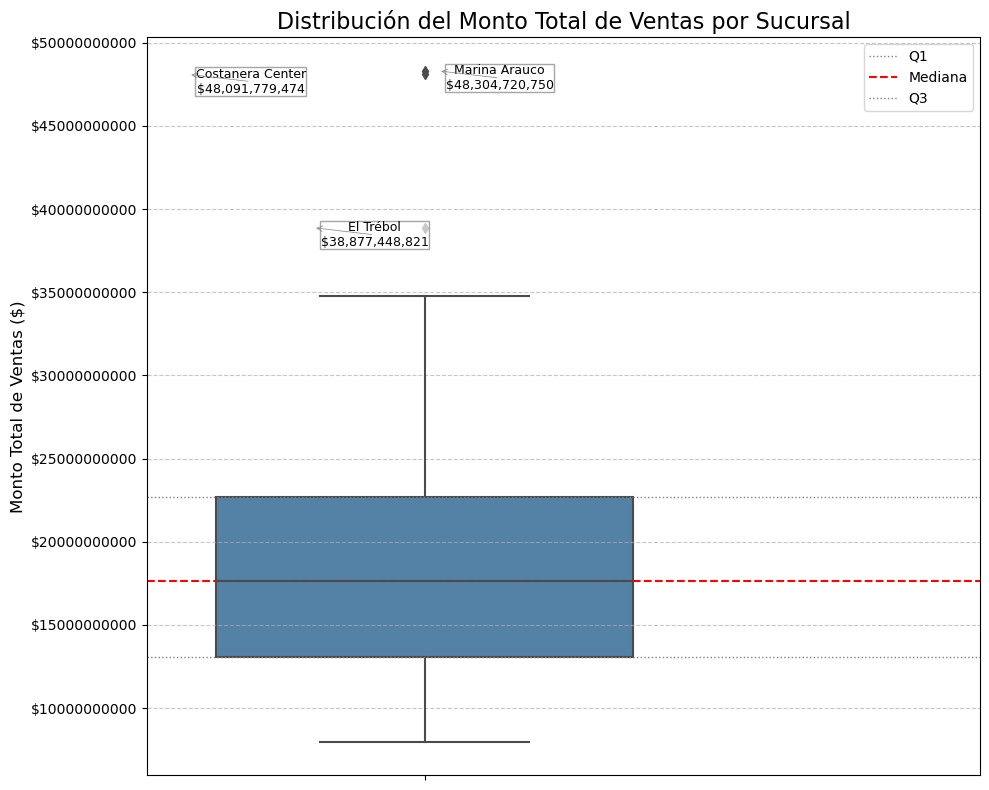

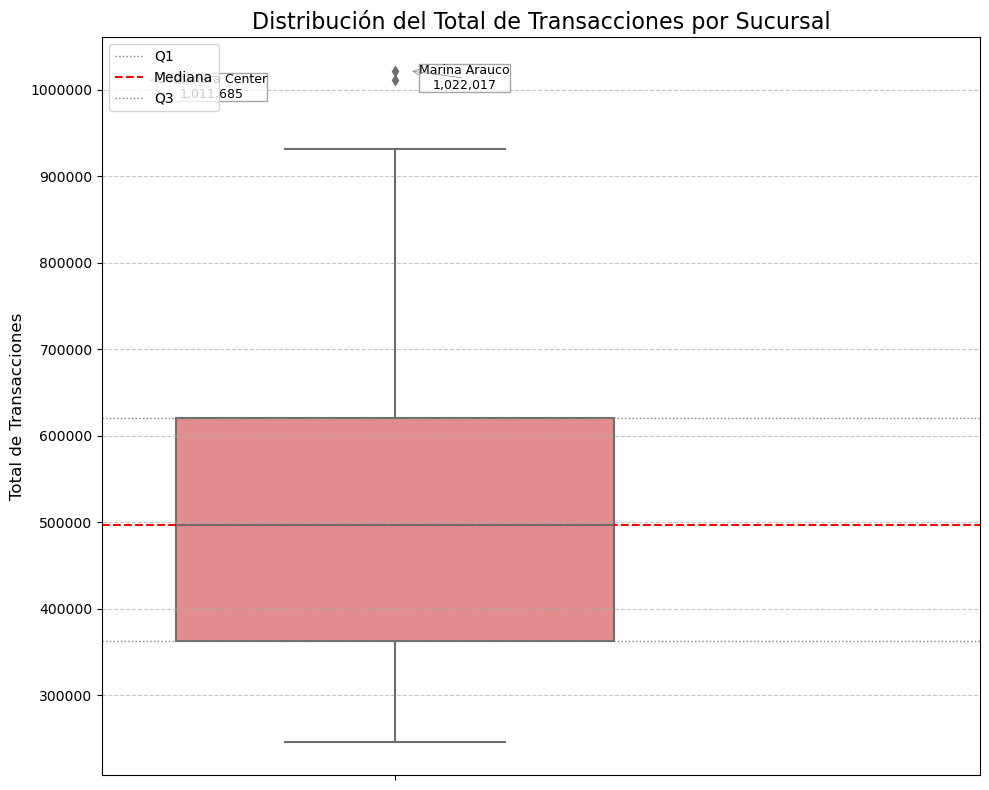

In [4]:

try:
    df = pd.read_excel('Ventas_y_Transacciones_por_Sucursal - copia.xlsx')        

    print("Datos cargados exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'Ventas_y_Transacciones_por_Sucursal - copia.xlsx - Sheet1.csv' no se encontró.")
    print("Asegúrate de que el archivo esté en el directorio correcto o verifica la ruta.")
    exit() # Sale del script si el archivo no se encuentra

# --- 2. Limpieza de datos: Manejo de filas vacías ---
df_cleaned = df.dropna(subset=['Nombre_Sucursal']).copy()
print(f"\nFilas originales: {len(df)} | Filas después de la limpieza inicial: {len(df_cleaned)}")

# Convertir las columnas numéricas a tipo numérico
df_cleaned['total_monto_trx'] = pd.to_numeric(df_cleaned['total_monto_trx'], errors='coerce')
df_cleaned['total_transacciones'] = pd.to_numeric(df_cleaned['total_transacciones'], errors='coerce')
df_cleaned.dropna(subset=['total_monto_trx', 'total_transacciones'], inplace=True)
print(f"Filas después de convertir a numérico y limpiar NaNs: {len(df_cleaned)}")

# --- Modificacion para mejor visualizacion de datos numericos ---
def format_numeric_columns_for_display(df_to_format):
    df_formatted = df_to_format.copy() 
    if 'total_monto_trx' in df_formatted.columns:
        df_formatted['total_monto_trx'] = df_formatted['total_monto_trx'].apply(lambda x: f"${x:,.0f}")
    if 'total_transacciones' in df_formatted.columns:
        df_formatted['total_transacciones'] = df_formatted['total_transacciones'].apply(lambda x: f"{x:,.0f}")
    if 'valor_promedio_por_transaccion' in df_formatted.columns:
        df_formatted['valor_promedio_por_transaccion'] = df_formatted['valor_promedio_por_transaccion'].apply(lambda x: f"${x:,.2f}")
    return df_formatted

# --- 3. Análisis Descriptivo de Ventas (total_monto_trx) ---
print("\n--- Análisis Descriptivo de Ventas (total_monto_trx) ---")
desc_monto = df_cleaned['total_monto_trx'].describe()
print(f"Count: {desc_monto['count']:.0f}")
print(f"Mean: ${desc_monto['mean']:,.2f}")
print(f"Std: ${desc_monto['std']:,.2f}")
print(f"Min: ${desc_monto['min']:,.2f}")
print(f"25%: ${desc_monto['25%']:,.2f}")
print(f"50% (Median): ${desc_monto['50%']:,.2f}")
print(f"75%: ${desc_monto['75%']:,.2f}")
print(f"Max: ${desc_monto['max']:,.2f}")

#  5 sucursales con mayores montos de ventas
print("\nTop 5 Sucursales por Monto Total de Ventas:")
top_monto = df_cleaned.nlargest(5, 'total_monto_trx')
print(format_numeric_columns_for_display(top_monto))

# 5 sucursales con menores montos de ventas
print("\nBottom 5 Sucursales por Monto Total de Ventas:")
bottom_monto = df_cleaned.nsmallest(5, 'total_monto_trx')
print(format_numeric_columns_for_display(bottom_monto))


# --- 4. Análisis Descriptivo de Transacciones (total_transacciones) ---
print("\n--- Análisis Descriptivo de Transacciones (total_transacciones) ---")
desc_trans = df_cleaned['total_transacciones'].describe()
print(f"Count: {desc_trans['count']:.0f}")
print(f"Mean: {desc_trans['mean']:,.0f}")
print(f"Std: {desc_trans['std']:,.0f}")
print(f"Min: {desc_trans['min']:,.0f}")
print(f"25%: {desc_trans['25%']:,.0f}")
print(f"50% (Median): {desc_trans['50%']:,.0f}")
print(f"75%: {desc_trans['75%']:,.0f}")
print(f"Max: {desc_trans['max']:,.0f}")

# 5 sucursales con mayores volúmenes de transacciones
print("\nTop 5 Sucursales por Volumen Total de Transacciones:")
top_trans = df_cleaned.nlargest(5, 'total_transacciones')
print(format_numeric_columns_for_display(top_trans))

# 5 sucursales con menores volúmenes de transacciones
print("\nBottom 5 Sucursales por Volumen Total de Transacciones:")
bottom_trans = df_cleaned.nsmallest(5, 'total_transacciones')
print(format_numeric_columns_for_display(bottom_trans))


# --- 5. (Opcional) Relación entre Ventas y Transacciones: Valor Promedio por Transacción ---
print("\n--- Análisis de la Relación: Valor Promedio por Transacción ---")
df_cleaned.loc[:, 'valor_promedio_por_transaccion'] = df_cleaned['total_monto_trx'] / df_cleaned['total_transacciones']

print("\nEstadísticas Descriptivas del Valor Promedio por Transacción:")
desc_avg_trx = df_cleaned['valor_promedio_por_transaccion'].describe()
print(f"Count: {desc_avg_trx['count']:.0f}")
print(f"Mean: ${desc_avg_trx['mean']:,.2f}")
print(f"Std: ${desc_avg_trx['std']:,.2f}")
print(f"Min: ${desc_avg_trx['min']:,.2f}")
print(f"25%: ${desc_avg_trx['25%']:,.2f}")
print(f"50% (Median): ${desc_avg_trx['50%']:,.2f}")
print(f"75%: ${desc_avg_trx['75%']:,.2f}")
print(f"Max: ${desc_avg_trx['max']:,.2f}")

# Sucursales con el valor promedio por transacción más alto (indicando ventas de alto valor)
print("\nTop 5 Sucursales por Valor Promedio por Transacción:")
top_avg_trx = df_cleaned.nlargest(5, 'valor_promedio_por_transaccion')
print(format_numeric_columns_for_display(top_avg_trx))

# Sucursales con el valor promedio por transacción más bajo (indicando ventas de bajo valor y alto volumen)
print("\nBottom 5 Sucursales por Valor Promedio por Transacción:")
bottom_avg_trx = df_cleaned.nsmallest(5, 'valor_promedio_por_transaccion')
print(format_numeric_columns_for_display(bottom_avg_trx))

## ---6. Detección de Outliers y IQR ---
print("\n--- Detección de Outliers (Valores Atípicos) ---")

variables_to_check = ['total_monto_trx', 'total_transacciones', 'valor_promedio_por_transaccion']

for var in variables_to_check:
    Q1 = df_cleaned[var].quantile(0.25)
    Q3 = df_cleaned[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_cleaned[(df_cleaned[var] < lower_bound) | (df_cleaned[var] > upper_bound)]
    
    print(f"\nVariable: {var}")
    print(f"  Q1: {Q1:,.2f}")
    print(f"  Q3: {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Límite Inferior (Outlier): {lower_bound:,.2f}")
    print(f"  Límite Superior (Outlier): {upper_bound:,.2f}")
    
    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        outliers_formatted = format_numeric_columns_for_display(outliers)
        print(outliers_formatted)
    else:
        print("  No se detectaron outliers para esta variable.")

# --- 7. BoxPlot paraa visualizacion de Dispersion de Datos ---
# Boxplot para Ventas
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(y=df_cleaned['total_monto_trx'], color='steelblue', width=0.3, ax=ax)
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.0f'))
ax.set_title('Distribución del Monto Total de Ventas por Sucursal', fontsize=16)
ax.set_ylabel('Monto Total de Ventas ($)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Líneas de referencia
ax.axhline(desc_monto['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax.axhline(desc_monto['50%'], color='red',  linestyle='--', linewidth=1.5, label='Mediana')
ax.axhline(desc_monto['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')

# Detectar outliers superiores
Q1_m, Q3_m = desc_monto['25%'], desc_monto['75%']
upper_m = Q3_m + 1.5 * (Q3_m - Q1_m)
outliers_m = df_cleaned[df_cleaned['total_monto_trx'] > upper_m]

# Ajustar espacio X para etiquetas
ax.set_xlim(-0.2, 0.4)
x_min, x_max = ax.get_xlim()
fracs = np.linspace(0.05, 0.35, len(outliers_m))

texts = []
for frac, (_, row) in zip(fracs, outliers_m.iterrows()):
    y = row['total_monto_trx']
    x_data = x_min + frac * (x_max - x_min)
    label = f"{row['Nombre_Sucursal']}\n${y:,.0f}"
    txt = ax.text(
        x_data, y, label,
        ha='left', va='center',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, pad=0.3, edgecolor='gray')
    )
    texts.append(txt)

adjust_text(
    texts, ax=ax,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_text=(1.1, 1.2),
    expand_points=(1.1, 1.2)
)

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

# --- 8. BoxPlot Total de Transacciones (con adjustText) ---
fig, ax2 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=df_cleaned['total_transacciones'], color='lightcoral', width=0.3, ax=ax2)
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax2.set_title('Distribución del Total de Transacciones por Sucursal', fontsize=16)
ax2.set_ylabel('Total de Transacciones', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Líneas de referencia
ax2.axhline(desc_trans['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax2.axhline(desc_trans['50%'], color='red',  linestyle='--', linewidth=1.5, label='Mediana')
ax2.axhline(desc_trans['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')

# Detectar outliers superiores
Q1_t, Q3_t = desc_trans['25%'], desc_trans['75%']
upper_t = Q3_t + 1.5 * (Q3_t - Q1_t)
outliers_t = df_cleaned[df_cleaned['total_transacciones'] > upper_t]

ax2.set_xlim(-0.2, 0.4)
x_min2, x_max2 = ax2.get_xlim()
fracs2 = np.linspace(0.05, 0.35, len(outliers_t))

texts2 = []
for frac, (_, row) in zip(fracs2, outliers_t.iterrows()):
    y = row['total_transacciones']
    x_data = x_min2 + frac * (x_max2 - x_min2)
    label = f"{row['Nombre_Sucursal']}\n{y:,.0f}"
    txt = ax2.text(
        x_data, y, label,
        ha='left', va='center',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, pad=0.3, edgecolor='gray')
    )
    texts2.append(txt)

adjust_text(
    texts2, ax=ax2,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_text=(1.1, 1.2),
    expand_points=(1.1, 1.2)
)

ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 📊 Interpretación de Resultados para el Clustering K-Means 

### 🎯 Estadisticas Claves de Ventas por Sucursal

Para poder obtener informacion sobre el perfil de las sucursales para agruparlas de manera efectiva necesitaremos estadisticas claves para su interpretacion taales como **Media = $19,971,948,494.17 y Mediana = $17,666,571,842.50**; que podemos concluir? -> La media es ligeramente superior a la mediana lo que sugiere una asimetria positiva, es decir, algunas sucursales con ventas exepcionalmente altas impulsan el promedio a un monto mayor del cual estan el 50% de los datos. 
Por otro lado tenemos una tenemos una **Desviación Estándar = $9,905,241,398.59** un valor muy alto en relcion a la media lo que nos da a un entender una gran disperson en relacion a los montos de venta por sucursal; lo que sugiere **Utilidad en el clustering ya que implicaa que las sucursales no son todas iguales en terminos de ingresos lo que le permitira al k-means identificar grupos de sucursales "Alto Valor", "Valor Medio", "Bajo Valor"**. 
Para añadir tenemos el rango tales como **Min -> $7,986,650,719.00 y Max -> $48.304,720,750.00** lo que supone **un rango de 5 veces de diferencia** lo que confirma lo heterogenio de las sucursales

---

## ✅ Sucursales con mayor generacion de Ingresos

Top 5 Sucursales con mayores ventas:

| Nombre Sucursal                    |Monto_trx          |
| ---------------------------------- | -----------          |
| **Marina Arauco**                  | 48.304.720.750    |
| **Costanera Center**               | 48.091.779.474    |
| **Parque Arauco**                  | 34.781.890.665    |
| **Portal Temuco**                  | 33.472.059.392    |
| **Plaza Oeste**                    | 30.811.601.149    |

---

### 🎯 Estadisticas Claves de Transacciones por Sucursal

Para poder realizar una correlacion entre el numero de transacciones y las ventas por sucursal debemos analizar a su vez la variable de transacciones tales como **Media = 516,708 y Mediana = 496,847**; que podemos concluir? -> La media es ligeramente superior a la mediana lo que sugiere una asimetria positiva, es decir, algunas sucursales poseen un volumen de transaccion mas alto de lo normal. 
Tenemos una tenemos una **Desviación Estándar = 198,893** lo que sugiere una **Variabilidad Considerable"**. 
Tenemos el rango tales como **Min -> 246,099 y Max -> 1.022.017** lo que supone **un rango de 4 veces de diferencia** lo que confirma lo heterogenio de las sucursales y perfiles operativos muy distintos. 

**¿Por qué funciona bien aquí?**
Estas sucursales por su alto impacto en su volumen relacionado con las ventas representan un riesgo inherentemente mayor influyendo en clusters de alto volumen.

---

## ✅ Sucursales con mayor numero de Transacciones

Top 5 Sucursales con mayor volumen de Transacciones:

| Nombre Sucursal                    |Numero_transacciones |
| ---------------------------------- | --------  |
| **Marina Arauco**                  | 1,022,017 |
| **Costanera Center**               | 1,011,685 |
| **El Trébol**                      | 931,839   |
| **Portal Temuco**                  | 803,446   | 
| **Plaza Vespucio**                 | 799,720   |

---

### 🧐 Interpretacion de Outliers en Ventas  

* **Q1 : $13,093,727,912.50**
* **Q3 : $22,697,740,485.75**
* **IQR: $9,604,012,573.25**
* **Limite Superior (Outlier): $37,103,759,345.62**

**Outliers Detectados**
* Costanera Center: $48,091,779,474

* El Trébol: $38,877,448,821

* Marina Arauco: $48,304,720,750

**¿Cuales son las implicancias?**
Estas sucursales por son claramente atipicas en termino de sus montos de ventas totales, siendo que sus ingresos superan significativamente el limite superior calculado por el metodo IQR, generando ventas mal altas que las demas 39 sucursales, teniendo una magnitud mucho mayor que otras tiendas lo que producira una determinacion en los clusters.

---

### 🧐 Interpretacion de Outliers en Transacciones  

* **Q1 : 362,469.25**
* **Q3 : 620,581.25**
* **IQR: 258,112.00**
* **Limite Superior (Outlier):  1,007,749.25**

**Outliers Detectados**
* Costanera Center: 1,011,685

* Marina Arauco: 1,022,017

**¿Cuales son las implicancias?**
Costanera Center y Marina Arauco también son atípicas en términos de volumen de transacciones. Superan el límite superior, indicando que procesan un número de operaciones significativamente mayor que la vasta mayoría de las otras sucursales. Esto es consistente con su estatus de alto monto de ventas. lo que supongra en una probable agrupacion en un cluster de alto impacto

---



 ## Analisis Descriptivo Merma De Destruccion

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


⚠️ Se detectaron 588 filas duplicadas. Serán eliminadas.
Filas después de convertir a numérico y limpiar NaNs: 42

--- Análisis Descriptivo de Ventas (Costo_Merma) ---
Count: 42
Mean: $-62,496,698.66
Std: $33,790,508.59
Min: $-165,529,347.53
25%: $-78,096,273.53
50% (Median): $-55,375,417.05
75%: $-37,029,729.22
Max: $-21,308,935.21

Top 5 Sucursales por Costo de Merma:
           Tienda Unidades_Merma   Costo_Merma
2           Arica         -2,103  $-21,308,935
15  Los Dominicos         -2,778  $-21,492,751
5        Coquimbo         -1,977  $-22,934,521
32   Puerto Montt         -3,920  $-31,997,052
35   San Fernando         -3,073  $-33,211,604

Bottom 5 Sucursales por Costo de Merma:
              Tienda Unidades_Merma    Costo_Merma
18     Marina Arauco        -12,731  $-165,529,348
9          El Trébol        -10,216  $-142,680,502
29    Plaza Vespucio        -12,989  $-139,034,497
6   Costanera Center        -10,667  $-119,279,177
36             Talca         -7,776   $-99,975,95

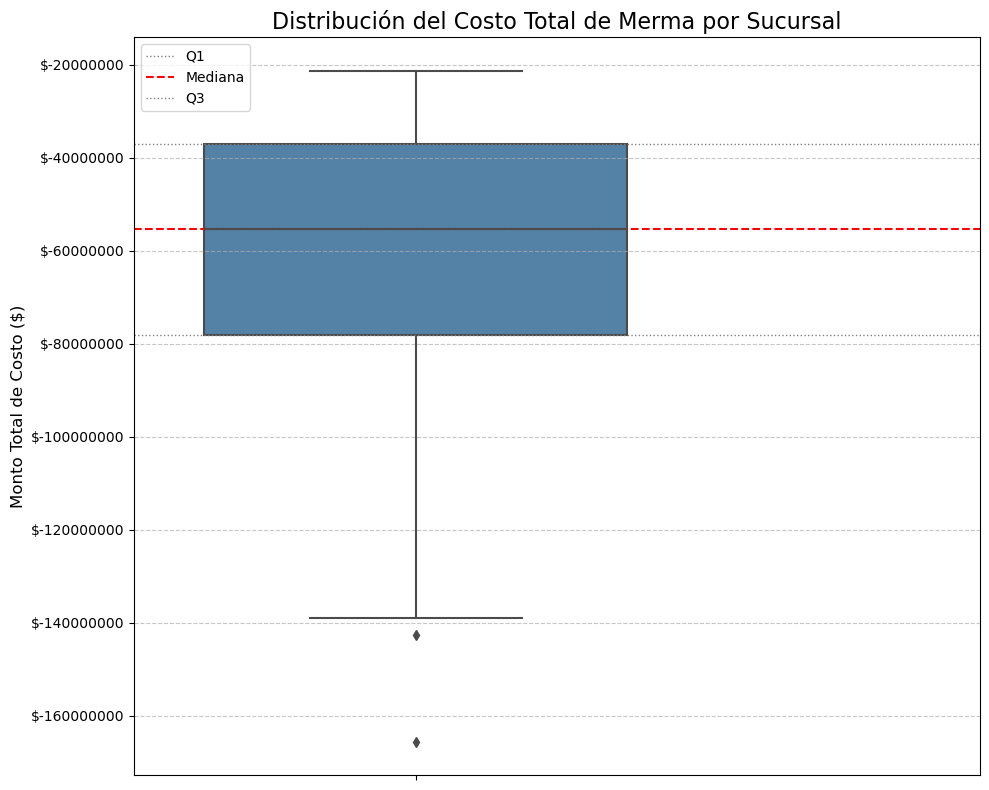

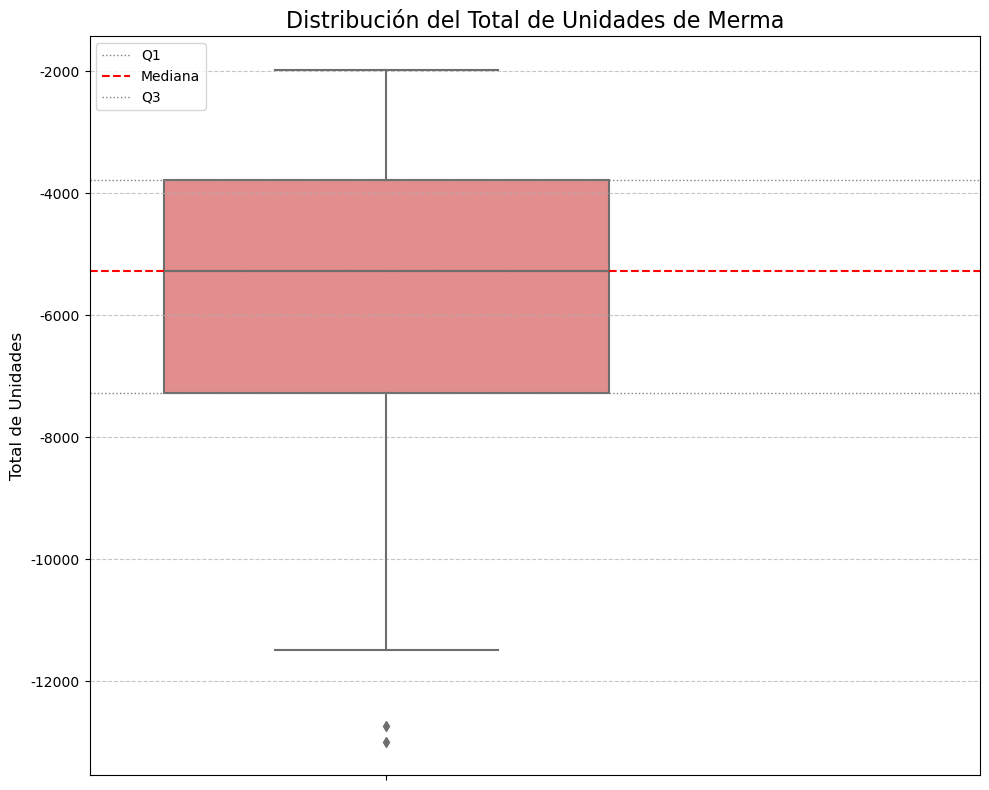

In [5]:
##Merma de Destruccion


import re

merma_de_destruccion = pd.read_excel("Detalle merma (12).xlsx")

# 2) Función que extrae los dos últimos dígitos numéricos
def last_two_digits(code):
    """
    Dado un código (numérico o alfanumérico), extrae todos los dígitos
    y devuelve sólo los dos últimos.
    Si hay menos de 2 dígitos, devuelve los que existan.
    """
    digits = re.findall(r'\d', str(code))
    if len(digits) >= 2:
        return ''.join(digits[-2:])
    elif digits:
        return ''.join(digits)
    else:
        return None

# 3) Crear la nueva columna sólo con los dos últimos dígitos
merma_de_destruccion['Nº Suc.'] = merma_de_destruccion['Sucursal'].apply(last_two_digits)

##Cargamos la base de datos sucursales para realizar las uniones correspondientes
sucursales = pd.read_excel("Detalle sucursales (1).xlsx")

#Unificamos el formato de las columnas 'Nº Suc.' en ambas tablas para asegurar una unión correcta
merma_de_destruccion['Nº Suc.'] = merma_de_destruccion['Nº Suc.'].astype(str).str.strip()
sucursales['Nº Suc.']  = sucursales['Nº Suc.'].astype(str).str.strip()

merma_de_destruccion['Nº Suc.']   = merma_de_destruccion['Nº Suc.'].str.zfill(2)
sucursales['Nº Suc.']     = sucursales['Nº Suc.'].str.zfill(2)

merged = merma_de_destruccion.merge(
    sucursales,
    left_on='Nº Suc.',
    right_on='Nº Suc.',
    how='left',
    suffixes=('', '_sucursal')
)
merged_clean = merged[
    merged['Tienda'].notna() &               
    merged['Tienda'].astype(str).str.strip().ne('')  
]

merged_clean = merged_clean.copy()

##NOTA: Realizamos las uniones Tiendas con Outlet para unificar los nombres de las tiendas
merged_clean['Tienda'] = merged_clean['Tienda'].replace('Outlet Crillon', 'Crillón')
merged_clean['Tienda'] = merged_clean['Tienda'].replace('Outlet Iquique', 'Iquique')
merged_clean['Tienda'] = merged_clean['Tienda'].replace('Outlet Parque Arauco', 'Parque Arauco')
merged_clean['Tienda'] = merged_clean['Tienda'].replace('Outlet Puente', 'Puente')
merged_clean['Tienda'] = merged_clean['Tienda'].replace('Outlet Puerto Montt Costanera', 'Costanera Pto Montt')

##Ahora realizmos el mismo procedimiento pero con la segunda base de datos de Merma de destruccion, eso debido a que no pudimos extarer la totalidad de los datos por medio de RedShift
##Limpieza de datos con la segunda parte de la base de datos
merma_de_destruccion_2 = pd.read_excel("Detalle merma (16).xlsx")

# 2) Función que extrae los dos últimos dígitos numéricos
def last_two_digits(code):
    """
    Dado un código (numérico o alfanumérico), extrae todos los dígitos
    y devuelve sólo los dos últimos.
    Si hay menos de 2 dígitos, devuelve los que existan.
    """
    digits = re.findall(r'\d', str(code))
    if len(digits) >= 2:
        return ''.join(digits[-2:])
    elif digits:
        return ''.join(digits)
    else:
        return None

# 3) Crear la nueva columna sólo con los dos últimos dígitos
merma_de_destruccion_2['Nº Suc.'] = merma_de_destruccion_2['Sucursal'].apply(last_two_digits)

#Limpieza de la base de datos
merma_de_destruccion_2['Nº Suc.'] = merma_de_destruccion_2['Nº Suc.'].astype(str).str.strip()
sucursales['Nº Suc.']  = sucursales['Nº Suc.'].astype(str).str.strip()

merma_de_destruccion_2['Nº Suc.']   = merma_de_destruccion_2['Nº Suc.'].str.zfill(2)
sucursales['Nº Suc.']     = sucursales['Nº Suc.'].str.zfill(2)

merged_2 = merma_de_destruccion_2.merge(
    sucursales,
    left_on='Nº Suc.',
    right_on='Nº Suc.',
    how='left',
    suffixes=('', '_sucursal')
)
merged_clean_2 = merged_2[
    merged_2['Tienda'].notna() &               
    merged_2['Tienda'].astype(str).str.strip().ne('')  
]

merged_clean_2 = merged_clean_2.copy()


merged_clean_2['Tienda'] = merged_clean_2['Tienda'].replace('Outlet Crillon', 'Crillón')
merged_clean_2['Tienda'] = merged_clean_2['Tienda'].replace('Outlet Iquique', 'Iquique')
merged_clean_2['Tienda'] = merged_clean_2['Tienda'].replace('Outlet Parque Arauco', 'Parque Arauco')
merged_clean_2['Tienda'] = merged_clean_2['Tienda'].replace('Outlet Puente', 'Puente')
merged_clean_2['Tienda'] = merged_clean_2['Tienda'].replace('Outlet Puerto Montt Costanera', 'Costanera Pto Montt')

# Realizamos la union de las dos bases de datos
merged_2024 = pd.concat([merged_clean, merged_clean_2], ignore_index=True)
dup_mask = merged_2024.duplicated()
num_dup = dup_mask.sum()

# 3) Avisar si hay duplicados
if num_dup > 0:
    print(f"⚠️ Se detectaron {num_dup} filas duplicadas. Serán eliminadas.")
else:
    print("✅ No se detectaron filas duplicadas.")

# 4) Eliminar duplicados
merged_2024 = merged_2024.drop_duplicates()

## Realizamos el calculo de unidades y costo de merma de destruccion por sucursal
merged_2024 = (
    merged_2024
    .groupby('Tienda', as_index=False)
    .agg({
        'Unidades_Merma': 'sum',
        'Costo_Merma': 'sum'
    })
)

## Analisis Descriptivo de la Merma por Sucursal
merged_2024['Costo_Merma'] = pd.to_numeric(merged_2024['Costo_Merma'], errors='coerce')
merged_2024['Unidades_Merma'] = pd.to_numeric(merged_2024['Unidades_Merma'], errors='coerce')
merged_2024.dropna(subset=['Costo_Merma', 'Unidades_Merma'], inplace=True)
print(f"Filas después de convertir a numérico y limpiar NaNs: {len(merged_2024)}")

# --- Modificacion para mejor visualizacion de datos numericos ---
def format_numeric_columns_for_display(df_to_format):
    df_formatted = df_to_format.copy() 
    if 'Costo_Merma' in df_formatted.columns:
        df_formatted['Costo_Merma'] = df_formatted['Costo_Merma'].apply(lambda x: f"${x:,.0f}")
    if 'Unidades_Merma' in df_formatted.columns:
        df_formatted['Unidades_Merma'] = df_formatted['Unidades_Merma'].apply(lambda x: f"{x:,.0f}")
    return df_formatted

# --- 3. Análisis Descriptivo de Costo Merma de Destruccion (Costo_Merma) ---
print("\n--- Análisis Descriptivo de Ventas (Costo_Merma) ---")
descrive_merma_costo = merged_2024['Costo_Merma'].describe()
print(f"Count: {descrive_merma_costo['count']:.0f}")
print(f"Mean: ${descrive_merma_costo['mean']:,.2f}")
print(f"Std: ${descrive_merma_costo['std']:,.2f}")
print(f"Min: ${descrive_merma_costo['min']:,.2f}")
print(f"25%: ${descrive_merma_costo['25%']:,.2f}")
print(f"50% (Median): ${descrive_merma_costo['50%']:,.2f}")
print(f"75%: ${descrive_merma_costo['75%']:,.2f}")
print(f"Max: ${descrive_merma_costo['max']:,.2f}")

#  5 sucursales con mayores costo de merma de destruccion 
print("\nTop 5 Sucursales por Costo de Merma:")
top_monto_costo_merma = merged_2024.nlargest(5, 'Costo_Merma')
print(format_numeric_columns_for_display(top_monto_costo_merma))

# 5 sucursales con menores costo de merma de destruccion
print("\nBottom 5 Sucursales por Costo de Merma:")
bottom_monto_costo_merma = merged_2024.nsmallest(5, 'Costo_Merma')
print(format_numeric_columns_for_display(bottom_monto_costo_merma))


# --- 4. Análisis Descriptivo de Transacciones (Unidades_Merma) ---
print("\n--- Análisis Descriptivo de Unidades de Merma (Unidades_Merma) ---")
descrive_merma_unidades = merged_2024['Unidades_Merma'].describe()
print(f"Count: {descrive_merma_unidades['count']:.0f}")
print(f"Mean: {descrive_merma_unidades['mean']:,.0f}")
print(f"Std: {descrive_merma_unidades['std']:,.0f}")
print(f"Min: {descrive_merma_unidades['min']:,.0f}")
print(f"25%: {descrive_merma_unidades['25%']:,.0f}")
print(f"50% (Median): {descrive_merma_unidades['50%']:,.0f}")
print(f"75%: {descrive_merma_unidades['75%']:,.0f}")
print(f"Max: {descrive_merma_unidades['max']:,.0f}")

# 5 sucursales con mayores Unidades de Merma
print("\nTop 5 Sucursales por Unidades de Merma:")
top_monto_unidad_merma = merged_2024.nlargest(5, 'Unidades_Merma')
print(format_numeric_columns_for_display(top_monto_unidad_merma))

# 5 sucursales con menores Unidades de Merma
print("\nBottom 5 Sucursales por Unidad de Merma:")
bottom_monto_unidad_merma = merged_2024.nsmallest(5, 'Unidades_Merma')
print(format_numeric_columns_for_display(bottom_monto_unidad_merma))

## ---6. Detección de Outliers y IQR ---
print("\n--- Detección de Outliers (Merma de Destruccion) ---")

variables_to_check_merma = ['Unidades_Merma', 'Costo_Merma']

for var_merma in variables_to_check_merma:
    Q1_merma = merged_2024[var_merma].quantile(0.25)
    Q3_merma = merged_2024[var_merma].quantile(0.75)
    IQR_merma = Q3_merma - Q1_merma
    
    lower_bound_merma = Q1_merma - 1.5 * IQR_merma
    upper_bound_merma = Q3_merma + 1.5 * IQR_merma
    
    outliers_merma = merged_2024[(merged_2024[var_merma] < lower_bound_merma) | (merged_2024[var_merma] > upper_bound_merma)]
    
    print(f"\nVariable: {var_merma}")
    print(f"  Q1: {Q1_merma:,.2f}")
    print(f"  Q3: {Q3_merma:,.2f}")
    print(f"  IQR: {IQR_merma:,.2f}")
    print(f"  Límite Inferior (Outlier): {lower_bound_merma:,.2f}")
    print(f"  Límite Superior (Outlier): {upper_bound_merma:,.2f}")
    
    if not outliers_merma.empty:
        print(f"  Outliers detectados ({len(outliers_merma)}):")
        outliers_formatted_merma = format_numeric_columns_for_display(outliers_merma)
        print(outliers_formatted_merma)
    else:
        print("  No se detectaron outliers para esta variable.")

# --- 7. BoxPlot paraa visualizacion de Dispersion de Datos ---
# Boxplot para Costo de Merma
fig, ax_merma = plt.subplots(figsize=(10, 8))

# ① El argumento correcto es y= (no y_merma=)
sns.boxplot(
    y=merged_2024['Costo_Merma'],
    color='steelblue',
    width=0.3,
    ax=ax_merma
)

ax_merma.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.0f'))
ax_merma.set_title('Distribución del Costo Total de Merma por Sucursal', fontsize=16)
ax_merma.set_ylabel('Monto Total de Costo ($)', fontsize=12)
ax_merma.grid(axis='y', linestyle='--', alpha=0.7)

# Líneas de referencia (medidas de dispersión)
ax_merma.axhline(descrive_merma_costo['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax_merma.axhline(descrive_merma_costo['50%'], color='red',  linestyle='--', linewidth=1.5, label='Mediana')
ax_merma.axhline(descrive_merma_costo['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')

# Detectar outliers superiores
Q1_costo, Q3_costo = descrive_merma_costo['25%'], descrive_merma_costo['75%']
upper_costo = Q3_costo + 1.5 * (Q3_costo - Q1_costo)
outliers_costo = merged_2024[merged_2024['Costo_Merma'] > upper_costo]

# Etiquetar los outliers
ax_merma.set_xlim(-0.2, 0.4)                              # espacio horizontal
x_min, x_max = ax_merma.get_xlim()
frac = np.linspace(0.05, 0.35, len(outliers_costo))       # posiciones X

texts = []
for f, (_, row) in zip(frac, outliers_costo.iterrows()):
    y_val = row['Costo_Merma']
    x_val = x_min + f * (x_max - x_min)
    label = f"{row['Tienda']}\n${y_val:,.0f}"
    txt = ax_merma.text(
        x_val, y_val, label,
        ha='left', va='center',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, pad=0.3, edgecolor='gray')
    )
    texts.append(txt)

# Ajuste para evitar superposiciones
adjust_text(
    texts, ax=ax_merma,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_text=(1.1, 1.2),
    expand_points=(1.1, 1.2)
)

ax_merma.legend(loc='upper left')
plt.tight_layout()
plt.show()

## --- BOX PLOT UNIDADES_DE_MERMA ---------------------------------------------
fig, ax_unid = plt.subplots(figsize=(10, 8))

# ② Ahora usamos la variable correcta y= y el eje definido ax_unid
sns.boxplot(
    y=merged_2024['Unidades_Merma'],
    color='lightcoral',
    width=0.3,
    ax=ax_unid
)

ax_unid.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax_unid.set_title('Distribución del Total de Unidades de Merma', fontsize=16)
ax_unid.set_ylabel('Total de Unidades', fontsize=12)
ax_unid.grid(axis='y', linestyle='--', alpha=0.7)

ax_unid.axhline(descrive_merma_unidades['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax_unid.axhline(descrive_merma_unidades['50%'], color='red',  linestyle='--', linewidth=1.5, label='Mediana')
ax_unid.axhline(descrive_merma_unidades['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')

# Outliers superiores en unidades
Q1_uni, Q3_uni = descrive_merma_unidades['25%'], descrive_merma_unidades['75%']
upper_uni = Q3_uni + 1.5 * (Q3_uni - Q1_uni)
outliers_uni = merged_2024[merged_2024['Unidades_Merma'] > upper_uni]

ax_unid.set_xlim(-0.2, 0.4)
x_min_u, x_max_u = ax_unid.get_xlim()
frac_u = np.linspace(0.05, 0.35, len(outliers_uni))

texts_u = []
for f, (_, row) in zip(frac_u, outliers_uni.iterrows()):
    y_val = row['Unidades_Merma']
    x_val = x_min_u + f * (x_max_u - x_min_u)
    label = f"{row['Tienda']}\n{y_val:,.0f}"
    txt = ax_unid.text(
        x_val, y_val, label,
        ha='left', va='center',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, pad=0.3, edgecolor='gray')
    )
    texts_u.append(txt)

adjust_text(
    texts_u, ax=ax_unid,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_text=(1.1, 1.2),
    expand_points=(1.1, 1.2)
)

ax_unid.legend(loc='upper left')
plt.tight_layout()
plt.show()






In [6]:
# Guardar el DataFrame 'merged' en un archivo Excel
merged_2024.to_excel('merma_destruccion_sucursal_2024.xlsx', index=False)
print("Archivo 'merged_clean_output_2.xlsx' guardado exitosamente.")

Archivo 'merged_clean_output_2.xlsx' guardado exitosamente.


## Ahora vamos con Notas de Credito


In [7]:
Notas_credito = pd.read_csv("Notas_Credito_csv.csv")

Notas_credito['sucursal'] = Notas_credito['sucursal'].astype(str).str.strip()
sucursales['Nº Suc.']  = sucursales['Nº Suc.'].astype(str).str.strip()

Notas_credito['sucursal']   = Notas_credito['sucursal'].str.zfill(2)
sucursales['Nº Suc.']     = sucursales['Nº Suc.'].str.zfill(2)

Notas_credito = Notas_credito.merge(
    sucursales,
    left_on='sucursal',
    right_on='Nº Suc.',
    how='left',
    suffixes=('', '_sucursal')
)
Notas_credito = Notas_credito[
    Notas_credito['Tienda'].notna() &               
    Notas_credito['Tienda'].astype(str).str.strip().ne('')  
]

Notas_credito = Notas_credito.copy()


# 1. Unificar nombres de tiendas
reemplazos = {
    'Outlet Crillon': 'Crillón',
    'Outlet Iquique': 'Iquique',
    'Outlet Parque Arauco': 'Parque Arauco',
    'Outlet Puente': 'Puente',
    'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
    "Outlet La Serena": "La Serena",
}

Notas_credito['Tienda'] = Notas_credito['Tienda'].replace(reemplazos)

# 2. Agrupar por tienda y sumar los valores
Notas_Credito = (
    Notas_credito
    .groupby('Tienda', as_index=False)
    .agg({
        'total_monto_trx': 'sum',
        'total_transacciones': 'sum'
    })
)

# 3. Calcular de nuevo el promedio
Notas_Credito['monto_promedio_nc'] = (
    Notas_Credito['total_monto_trx'] / Notas_Credito['total_transacciones']
).round(0)

# Confirmar cantidad final
print("Total de tiendas únicas:", Notas_Credito['Tienda'].nunique())



Total de tiendas únicas: 42


Filas después de convertir a numérico y limpiar NaNs: 42

--- Análisis Descriptivo del Monto de Notas ---
Count: 42
Mean: $617,105,722.71
Std: $347,770,819.67
Min: $207,191,897.00
25%: $345,377,317.25
50% (Median): $560,859,250.00
75%: $780,877,920.50
Max: $1,472,085,882.00

Top 5 Sucursales por Monto de Nota:
              Tienda  total_monto_trx  total_transacciones  monto_promedio_nc  \
18     Marina Arauco       1472085882                22975            64073.0   
6   Costanera Center       1424989889                29355            48543.0   
9          El Trébol       1381710663                24823            55663.0   
19     Parque Arauco       1342042845                20410            65754.0   
29    Plaza Vespucio       1078030839                21919            49182.0   

        Monto_Nota Cantidad_Notas  
18  $1,472,085,882         22,975  
6   $1,424,989,889         29,355  
9   $1,381,710,663         24,823  
19  $1,342,042,845         20,410  
29  $1,078,030,839   

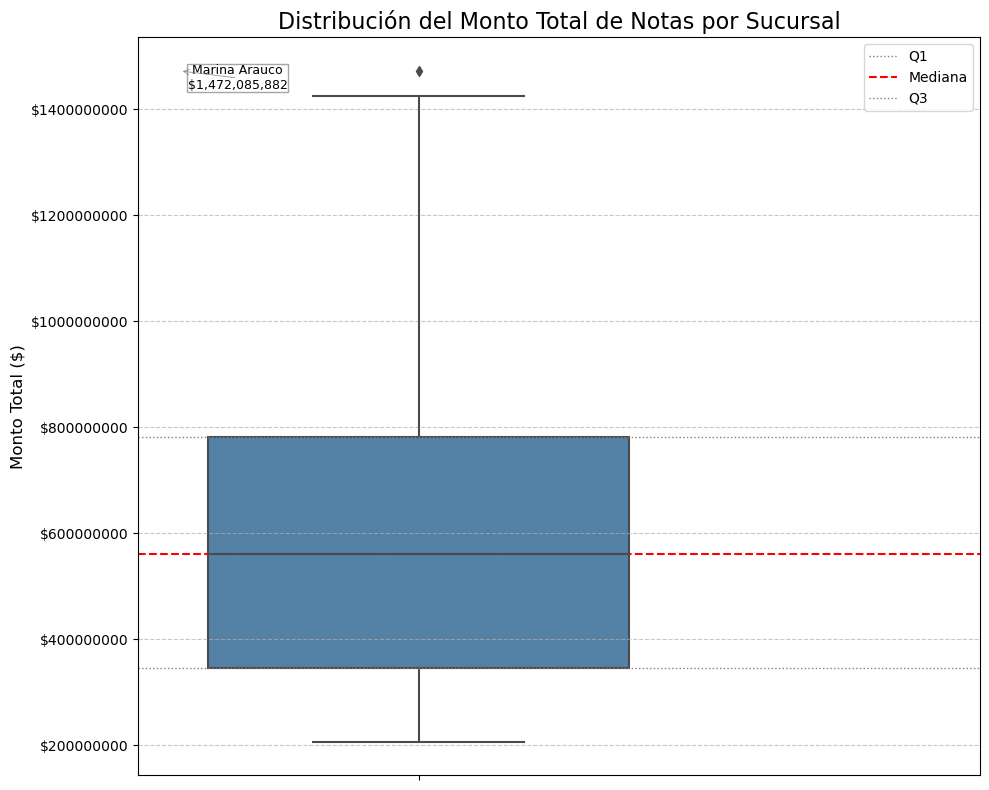

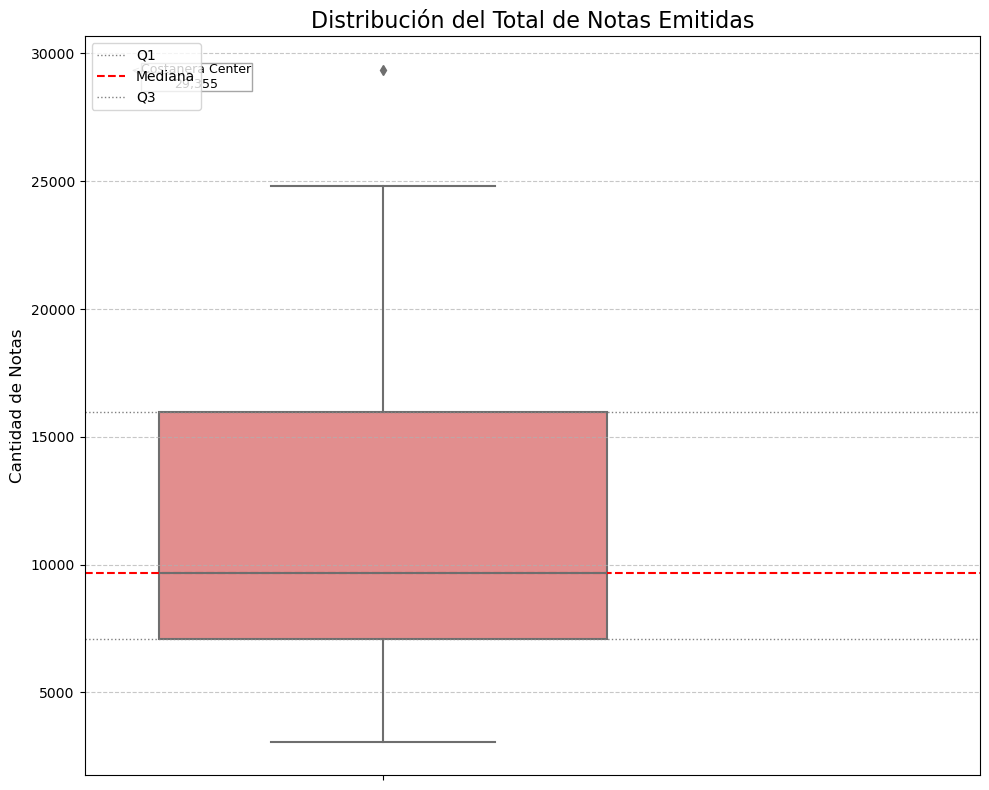

In [8]:
import matplotlib.ticker as mticker
from adjustText import adjust_text

notas_credito_2024 = Notas_Credito.copy()

# --- 1. Conversión a numérico y limpieza ---
notas_credito_2024['Monto_Nota'] = pd.to_numeric(notas_credito_2024['total_monto_trx'], errors='coerce')
notas_credito_2024['Cantidad_Notas'] = pd.to_numeric(notas_credito_2024['total_transacciones'], errors='coerce')
notas_credito_2024.dropna(subset=['Monto_Nota', 'Cantidad_Notas'], inplace=True)
print(f"Filas después de convertir a numérico y limpiar NaNs: {len(notas_credito_2024)}")

# --- 2. Función de formateo para imprimir ---
def format_numeric_columns_for_display(df_to_format):
    df_formatted = df_to_format.copy()
    if 'Monto_Nota' in df_formatted.columns:
        df_formatted['Monto_Nota'] = df_formatted['Monto_Nota'].apply(lambda x: f"${x:,.0f}")
    if 'Cantidad_Notas' in df_formatted.columns:
        df_formatted['Cantidad_Notas'] = df_formatted['Cantidad_Notas'].apply(lambda x: f"{x:,.0f}")
    return df_formatted

# --- 3. Análisis Descriptivo: Monto_Nota ---
print("\n--- Análisis Descriptivo del Monto de Notas ---")
desc_monto_nota = notas_credito_2024['Monto_Nota'].describe()
print(f"Count: {desc_monto_nota['count']:.0f}")
print(f"Mean: ${desc_monto_nota['mean']:,.2f}")
print(f"Std: ${desc_monto_nota['std']:,.2f}")
print(f"Min: ${desc_monto_nota['min']:,.2f}")
print(f"25%: ${desc_monto_nota['25%']:,.2f}")
print(f"50% (Median): ${desc_monto_nota['50%']:,.2f}")
print(f"75%: ${desc_monto_nota['75%']:,.2f}")
print(f"Max: ${desc_monto_nota['max']:,.2f}")

print("\nTop 5 Sucursales por Monto de Nota:")
print(format_numeric_columns_for_display(notas_credito_2024.nlargest(5, 'Monto_Nota')))

print("\nBottom 5 Sucursales por Monto de Nota:")
print(format_numeric_columns_for_display(notas_credito_2024.nsmallest(5, 'Monto_Nota')))

# --- 4. Análisis Descriptivo: Cantidad_Notas ---
print("\n--- Análisis Descriptivo de Cantidad de Notas ---")
desc_cant_nota = notas_credito_2024['Cantidad_Notas'].describe()
print(f"Count: {desc_cant_nota['count']:.0f}")
print(f"Mean: {desc_cant_nota['mean']:,.0f}")
print(f"Std: {desc_cant_nota['std']:,.0f}")
print(f"Min: {desc_cant_nota['min']:,.0f}")
print(f"25%: {desc_cant_nota['25%']:,.0f}")
print(f"50% (Median): {desc_cant_nota['50%']:,.0f}")
print(f"75%: {desc_cant_nota['75%']:,.0f}")
print(f"Max: {desc_cant_nota['max']:,.0f}")

print("\nTop 5 Sucursales por Cantidad de Notas:")
print(format_numeric_columns_for_display(notas_credito_2024.nlargest(5, 'Cantidad_Notas')))

print("\nBottom 5 Sucursales por Cantidad de Notas:")
print(format_numeric_columns_for_display(notas_credito_2024.nsmallest(5, 'Cantidad_Notas')))

# --- 5. Outliers ---
print("\n--- Detección de Outliers (Notas de Crédito) ---")
variables_to_check_nota = ['Monto_Nota', 'Cantidad_Notas']
for var in variables_to_check_nota:
    Q1 = notas_credito_2024[var].quantile(0.25)
    Q3 = notas_credito_2024[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = notas_credito_2024[(notas_credito_2024[var] < lower) | (notas_credito_2024[var] > upper)]
    
    print(f"\nVariable: {var}")
    print(f"  Q1: {Q1:,.2f}")
    print(f"  Q3: {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Límite Inferior: {lower:,.2f}")
    print(f"  Límite Superior: {upper:,.2f}")
    
    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        print(format_numeric_columns_for_display(outliers))
    else:
        print("  No se detectaron outliers.")

# --- 6. BoxPlot Monto_Nota ---
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=notas_credito_2024['Monto_Nota'], color='steelblue', width=0.3, ax=ax1)
ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.0f'))
ax1.set_title('Distribución del Monto Total de Notas por Sucursal', fontsize=16)
ax1.set_ylabel('Monto Total ($)', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.axhline(desc_monto_nota['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax1.axhline(desc_monto_nota['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax1.axhline(desc_monto_nota['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')

Q1_m, Q3_m = desc_monto_nota['25%'], desc_monto_nota['75%']
upper_m = Q3_m + 1.5 * (Q3_m - Q1_m)
outliers_m = notas_credito_2024[notas_credito_2024['Monto_Nota'] > upper_m]
ax1.set_xlim(-0.2, 0.4)
x_min, x_max = ax1.get_xlim()
fracs = np.linspace(0.05, 0.35, len(outliers_m))

texts = []
for f, (_, row) in zip(fracs, outliers_m.iterrows()):
    y = row['Monto_Nota']
    x = x_min + f * (x_max - x_min)
    label = f"{row['Tienda']}\n${y:,.0f}"
    texts.append(ax1.text(x, y, label, ha='left', va='center',
                          fontsize=9, bbox=dict(facecolor='white', alpha=0.7, pad=0.3, edgecolor='gray')))
adjust_text(texts, ax=ax1, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_text=(1.1, 1.2), expand_points=(1.1, 1.2))
ax1.legend(loc='upper right')
plt.tight_layout()
plt.show()

# --- 7. BoxPlot Cantidad_Notas ---
fig, ax2 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=notas_credito_2024['Cantidad_Notas'], color='lightcoral', width=0.3, ax=ax2)
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax2.set_title('Distribución del Total de Notas Emitidas', fontsize=16)
ax2.set_ylabel('Cantidad de Notas', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.axhline(desc_cant_nota['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax2.axhline(desc_cant_nota['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax2.axhline(desc_cant_nota['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')

Q1_c, Q3_c = desc_cant_nota['25%'], desc_cant_nota['75%']
upper_c = Q3_c + 1.5 * (Q3_c - Q1_c)
outliers_c = notas_credito_2024[notas_credito_2024['Cantidad_Notas'] > upper_c]
ax2.set_xlim(-0.2, 0.4)
x_min2, x_max2 = ax2.get_xlim()
fracs2 = np.linspace(0.05, 0.35, len(outliers_c))

texts2 = []
for f, (_, row) in zip(fracs2, outliers_c.iterrows()):
    y = row['Cantidad_Notas']
    x = x_min2 + f * (x_max2 - x_min2)
    label = f"{row['Tienda']}\n{y:,.0f}"
    texts2.append(ax2.text(x, y, label, ha='left', va='center',
                           fontsize=9, bbox=dict(facecolor='white', alpha=0.7, pad=0.3, edgecolor='gray')))
adjust_text(texts2, ax=ax2, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_text=(1.1, 1.2), expand_points=(1.1, 1.2))
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [9]:
# Guardar el DataFrame 'merged' en un archivo Excel
notas_credito_2024.to_excel('notas_credito_sucursal_2024.xlsx', index=False)
print("Archivo 'merged_clean_output_2.xlsx' guardado exitosamente.")

Archivo 'merged_clean_output_2.xlsx' guardado exitosamente.



# 📊 Interpretación de Resultados para el Clustering K-Means

### 🎯 Estadísticas Claves de Notas de Crédito por Sucursal

Para poder obtener información sobre el perfil de las sucursales y agruparlas de manera efectiva, necesitamos estadísticas claves para su interpretación, tales como:

- **Media = \$617.100.000**
- **Mediana = \$560.900.000**

📌 ¿Qué podemos concluir?  
La media es ligeramente superior a la mediana, lo que sugiere una **asimetría positiva**: algunas sucursales con montos de notas de crédito excepcionalmente altos están impulsando el promedio hacia arriba. 

Por otro lado, tenemos una **Desviación Estándar = \$347.800.000**, un valor bastante alto en relación con la media, lo que indica una **gran dispersión** en los montos de notas de crédito por sucursal. Esto sugiere **utilidad en el clustering**, ya que implica que las sucursales no son homogéneas en términos de devoluciones o ajustes, permitiendo al algoritmo K-Means identificar grupos como: **"Alto Valor de NC", "Valor Medio", "Bajo Valor"**.

Además, el rango de valores es amplio:

- **Mínimo → \$207.200.000**
- **Máximo → \$1.472.000.000**

Esto representa una diferencia de más de **7 veces**, lo que confirma la **heterogeneidad** entre las sucursales.

---

## ✅ Sucursales con Mayor Generación de Notas de Crédito

Top 5 sucursales con mayores montos de notas de crédito:

| Nombre Sucursal       | Monto NC           |
|------------------------|--------------------|
| **Marina Arauco**      | \$1.472.085.882    |
| **Costanera Center**   | \$1.424.989.889    |
| **El Trébol**          | \$1.381.710.663    |
| **Parque Arauco**      | \$1.342.042.845    |
| **Plaza Vespucio**     | \$1.078.030.839    |

---

### 🎯 Estadísticas Claves de Transacciones por Sucursal

Para correlacionar el número de transacciones con los montos de notas de crédito, analizamos también esta variable:

- **Media = 11.840**
- **Mediana = 9.680**

📌 ¿Qué podemos concluir?  
La media es superior a la mediana, lo que indica nuevamente una **asimetría positiva**: algunas sucursales tienen un volumen de transacciones más alto de lo normal.

La **Desviación Estándar = 6.584**, lo que sugiere una **variabilidad considerable**.

- **Mínimo → 3.076**
- **Máximo → 29.355**

Esto representa una diferencia de casi **10 veces**, lo que confirma perfiles operativos muy distintos entre sucursales.

---

## ✅ Sucursales con Mayor Número de Transacciones

Top 5 sucursales con mayor volumen de transacciones:

| Nombre Sucursal       | Nº Transacciones |
|------------------------|------------------|
| **Costanera Center**   | 29.355           |
| **Marina Arauco**      | 22.975           |
| **El Trébol**          | 24.823           |
| **Plaza Vespucio**     | 21.919           |
| **Parque Arauco**      | 20.410           |

---

### 🧐 Interpretación de Outliers en Montos de Notas de Crédito

- **Q1 : \$345.400.000**
- **Q3 : \$780.900.000**
- **IQR: \$435.500.000**
- **Límite Superior (Outlier): \$1.433.150.000**

**Outliers Detectados:**
- **Marina Arauco**: \$1.472.085.882

📌 **¿Cuáles son las implicancias?**  
Esta sucursal es claramente atípica en términos de montos de notas de crédito, superando el límite superior calculado por el método IQR. Esto indica que su volumen de devoluciones o ajustes es significativamente mayor que el resto, lo que influirá en la formación de un cluster de alto impacto.

---

### 🧐 Interpretación de Outliers en Transacciones

- **Q1 : 7.080**
- **Q3 : 15.950**
- **IQR: 8.870**
- **Límite Superior (Outlier): 29.255**

**Outliers Detectados:**
- **Costanera Center**: 29.355

📌 **¿Cuáles son las implicancias?**  
Costanera Center también es atípica en términos de volumen de transacciones, superando el límite superior. Esto refuerza su perfil de sucursal de alto impacto, tanto en volumen como en valor, y probablemente será agrupada en un cluster de alto volumen.

---



## Ahora vamos con la variable de Cambios (Entra y Sale)

In [10]:
Cambios_Entra_Sale = pd.read_csv("Cambios_Entra_Sale.csv")


Cambios_Entra_Sale['sucursal'] = Cambios_Entra_Sale['sucursal'].astype(str).str.strip()
sucursales['Nº Suc.']  = sucursales['Nº Suc.'].astype(str).str.strip()

Cambios_Entra_Sale['sucursal']   = Cambios_Entra_Sale['sucursal'].str.zfill(2)
sucursales['Nº Suc.']     = sucursales['Nº Suc.'].str.zfill(2)

Cambios_Entra_Sale = Cambios_Entra_Sale.merge(
    sucursales,
    left_on='sucursal',
    right_on='Nº Suc.',
    how='left',
    suffixes=('', '_sucursal')
)
Cambios_Entra_Sale = Cambios_Entra_Sale[
    Cambios_Entra_Sale['Tienda'].notna() &               
    Cambios_Entra_Sale['Tienda'].astype(str).str.strip().ne('')  
]

Cambios_Entra_Sale = Cambios_Entra_Sale.copy()


# 1. Unificar nombres de tiendas
reemplazos = {
    'Outlet Crillon': 'Crillón',
    'Outlet Iquique': 'Iquique',
    'Outlet Parque Arauco': 'Parque Arauco',
    'Outlet Puente': 'Puente',
    'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
    "Outlet La Serena": "La Serena",
}

Cambios_Entra_Sale['Tienda'] = Cambios_Entra_Sale['Tienda'].replace(reemplazos)

# 2. Agrupar por tienda y sumar los valores
Cambios_Entra_Sale = (
    Cambios_Entra_Sale
    .groupby('Tienda', as_index=False)
    .agg({
        'total_monto_trx': 'sum',
        'total_transacciones': 'sum'
    })
)

# 3. Calcular de nuevo el promedio
Cambios_Entra_Sale['monto_promedio_nc'] = (
    Cambios_Entra_Sale['total_monto_trx'] / Cambios_Entra_Sale['total_transacciones']
).round(0)

# Confirmar cantidad final
print("Total de tiendas únicas:", Cambios_Entra_Sale['Tienda'].nunique())



Total de tiendas únicas: 42


Filas después de convertir a numérico y limpiar NaNs: 42

--- Análisis Descriptivo del Monto de Cambios ---
Count: 42
Mean: $338,350,127.60
Std: $175,145,055.39
Min: $100,988,312.00
25%: $216,842,564.25
50% (Median): $274,962,548.00
75%: $445,755,989.00
Max: $728,344,226.00

Top 5 Sucursales por Monto de Cambio:
              Tienda  total_monto_trx  total_transacciones  monto_promedio_nc  \
9          El Trébol        728344226                86891             8382.0   
18     Marina Arauco        691348693                77093             8968.0   
6   Costanera Center        679695629                75491             9004.0   
26       Plaza Oeste        654301487                72204             9062.0   
29    Plaza Vespucio        642061140                83524             7687.0   

    Monto_Cambio Cantidad_Cambios  
9   $728,344,226           86,891  
18  $691,348,693           77,093  
6   $679,695,629           75,491  
26  $654,301,487           72,204  
29  $642,061,140   

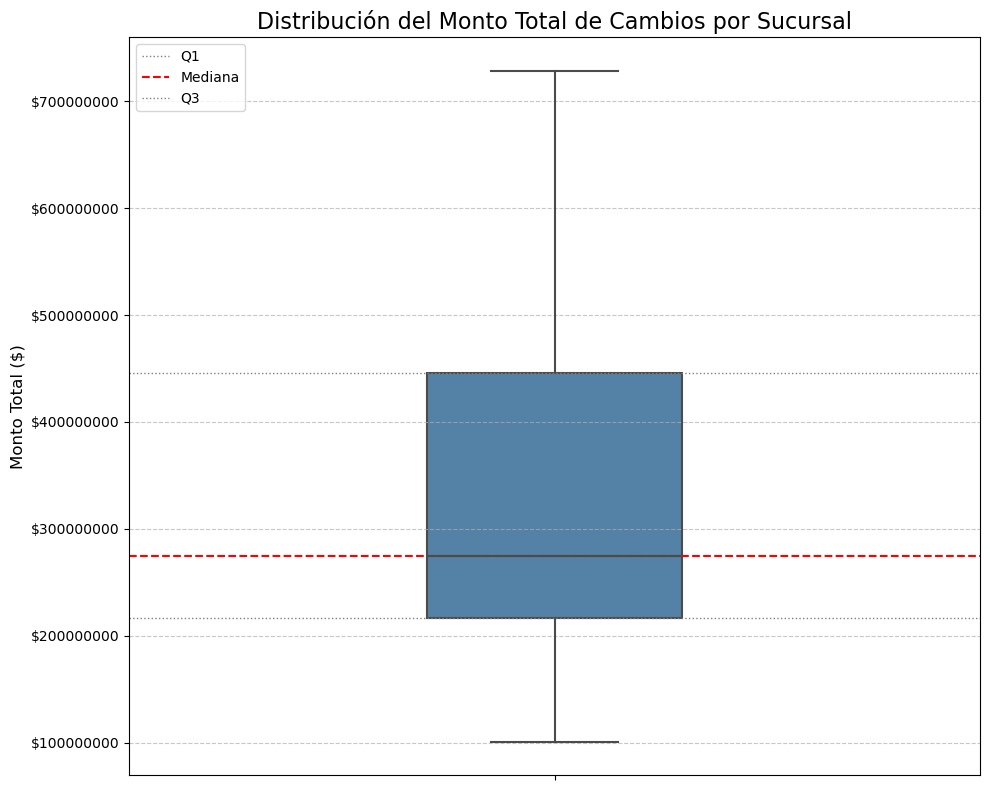

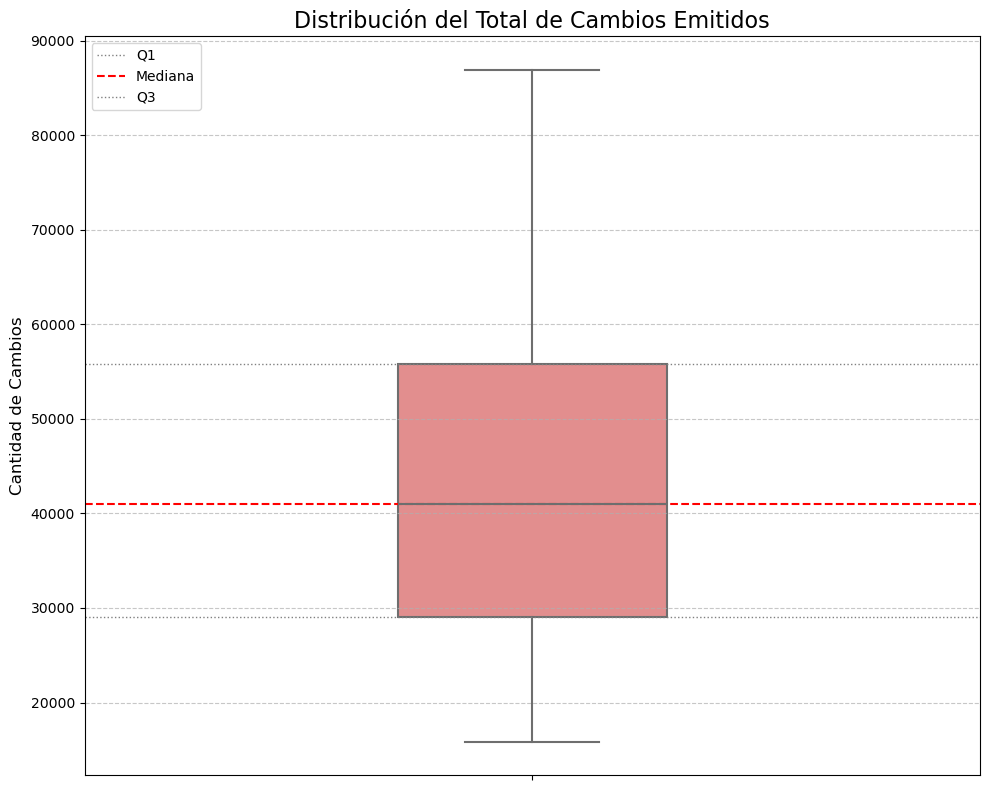

In [11]:


Cambios_Entra_Sale = Cambios_Entra_Sale.copy()

# --- 1. Conversión a numérico y limpieza ---
Cambios_Entra_Sale['Monto_Cambio'] = pd.to_numeric(Cambios_Entra_Sale['total_monto_trx'], errors='coerce')
Cambios_Entra_Sale['Cantidad_Cambios'] = pd.to_numeric(Cambios_Entra_Sale['total_transacciones'], errors='coerce')
Cambios_Entra_Sale.dropna(subset=['Monto_Cambio', 'Cantidad_Cambios'], inplace=True)
print(f"Filas después de convertir a numérico y limpiar NaNs: {len(Cambios_Entra_Sale)}")

# --- 2. Función de formateo para imprimir ---
def format_numeric_columns_for_display(df_to_format):
    df_formatted = df_to_format.copy()
    if 'Monto_Cambio' in df_formatted.columns:
        df_formatted['Monto_Cambio'] = df_formatted['Monto_Cambio'].apply(lambda x: f"${x:,.0f}")
    if 'Cantidad_Cambios' in df_formatted.columns:
        df_formatted['Cantidad_Cambios'] = df_formatted['Cantidad_Cambios'].apply(lambda x: f"{x:,.0f}")
    return df_formatted

# --- 3. Análisis Descriptivo: Monto_Cambio ---
print("\n--- Análisis Descriptivo del Monto de Cambios ---")
desc_monto_cambio = Cambios_Entra_Sale['Monto_Cambio'].describe()
print(f"Count: {desc_monto_cambio['count']:.0f}")
print(f"Mean: ${desc_monto_cambio['mean']:,.2f}")
print(f"Std: ${desc_monto_cambio['std']:,.2f}")
print(f"Min: ${desc_monto_cambio['min']:,.2f}")
print(f"25%: ${desc_monto_cambio['25%']:,.2f}")
print(f"50% (Median): ${desc_monto_cambio['50%']:,.2f}")
print(f"75%: ${desc_monto_cambio['75%']:,.2f}")
print(f"Max: ${desc_monto_cambio['max']:,.2f}")

print("\nTop 5 Sucursales por Monto de Cambio:")
print(format_numeric_columns_for_display(Cambios_Entra_Sale.nlargest(5, 'Monto_Cambio')))

print("\nBottom 5 Sucursales por Monto de Cambio:")
print(format_numeric_columns_for_display(Cambios_Entra_Sale.nsmallest(5, 'Monto_Cambio')))

# --- 4. Análisis Descriptivo: Cantidad_Cambios ---
print("\n--- Análisis Descriptivo de Cantidad de Cambios ---")
desc_cant_cambio = Cambios_Entra_Sale['Cantidad_Cambios'].describe()
print(f"Count: {desc_cant_cambio['count']:.0f}")
print(f"Mean: {desc_cant_cambio['mean']:,.0f}")
print(f"Std: {desc_cant_cambio['std']:,.0f}")
print(f"Min: {desc_cant_cambio['min']:,.0f}")
print(f"25%: {desc_cant_cambio['25%']:,.0f}")
print(f"50% (Median): {desc_cant_cambio['50%']:,.0f}")
print(f"75%: {desc_cant_cambio['75%']:,.0f}")
print(f"Max: {desc_cant_cambio['max']:,.0f}")

print("\nTop 5 Sucursales por Cantidad de Cambios:")
print(format_numeric_columns_for_display(Cambios_Entra_Sale.nlargest(5, 'Cantidad_Cambios')))

print("\nBottom 5 Sucursales por Cantidad de Cambios:")
print(format_numeric_columns_for_display(Cambios_Entra_Sale.nsmallest(5, 'Cantidad_Cambios')))

# --- 5. Outliers ---
print("\n--- Detección de Outliers (Cambios) ---")
variables_to_check = ['Monto_Cambio', 'Cantidad_Cambios']
for var in variables_to_check:
    Q1 = Cambios_Entra_Sale[var].quantile(0.25)
    Q3 = Cambios_Entra_Sale[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = Cambios_Entra_Sale[(Cambios_Entra_Sale[var] < lower) | (Cambios_Entra_Sale[var] > upper)]

    print(f"\nVariable: {var}")
    print(f"  Q1: {Q1:,.2f}")
    print(f"  Q3: {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Límite Inferior: {lower:,.2f}")
    print(f"  Límite Superior: {upper:,.2f}")

    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        print(format_numeric_columns_for_display(outliers))
    else:
        print("  No se detectaron outliers.")

# --- 6. BoxPlot Monto_Cambio ---
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=Cambios_Entra_Sale['Monto_Cambio'], color='steelblue', width=0.3, ax=ax1)
ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.0f'))
ax1.set_title('Distribución del Monto Total de Cambios por Sucursal', fontsize=16)
ax1.set_ylabel('Monto Total ($)', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.axhline(desc_monto_cambio['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax1.axhline(desc_monto_cambio['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax1.axhline(desc_monto_cambio['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')
ax1.legend(loc='upper left')
plt.tight_layout()
plt.show()

# --- 7. BoxPlot Cantidad_Cambios ---
fig, ax2 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=Cambios_Entra_Sale['Cantidad_Cambios'], color='lightcoral', width=0.3, ax=ax2)
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax2.set_title('Distribución del Total de Cambios Emitidos', fontsize=16)
ax2.set_ylabel('Cantidad de Cambios', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.axhline(desc_cant_cambio['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax2.axhline(desc_cant_cambio['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax2.axhline(desc_cant_cambio['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
Cambios_Entra_Sale.to_excel('Cambios_Entra_Sale_2024.xlsx', index=False)
print("Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.")

Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.


## Seguimos con numero de reclamos...

Filas después de limpiar NaNs: 42

--- Análisis Descriptivo de Cantidad de Reclamos ---
Count: 42
Mean: 18
Std: 17
Min: 1
25%: 6
50% (Median): 14
75%: 26
Max: 78

Top 5 Sucursales por Cantidad de Reclamos:
            Tienda  Total_Reclamos Cantidad_Reclamos
37          Temuco              78                78
39      Valparaiso              66                66
36           Talca              55                55
40   Vivo Rancagua              39                39
10  Florida Center              35                35

Bottom 5 Sucursales por Cantidad de Reclamos:
                 Tienda  Total_Reclamos Cantidad_Reclamos
7   Costanera Pto Montt               1                 1
33         Punta Arenas               1                 1
3             Castellón               2                 2
32       Puerto Montt 1               2                 2
14            Los Andes               3                 3

--- Detección de Outliers (Reclamos) ---
  Q1: 6.25
  Q3: 26.00
  IQR: 19.75
  L

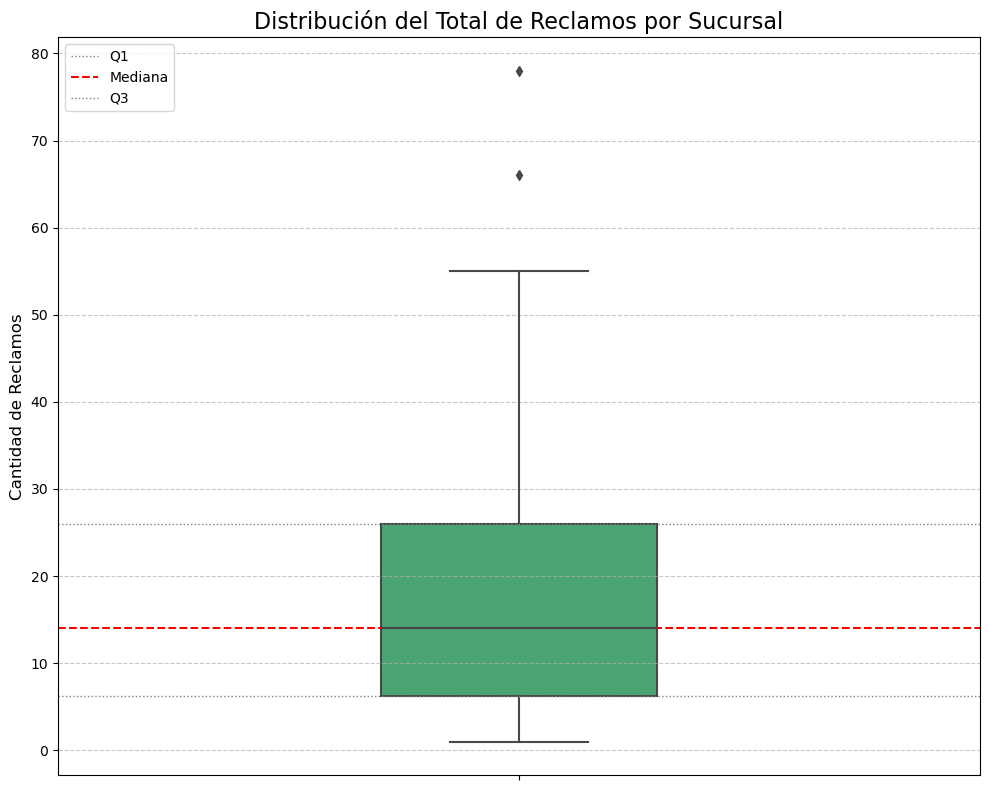

In [13]:
reclamos_2024 = pd.read_excel("Reclamos-Mala-Atencion-Tienda-2024-(el_bueno).xlsx")
reclamos_tiendas_2024 = reclamos_2024.groupby(["Tienda"]).agg(
    Total_Reclamos=("Ticket", "count")
).reset_index()


# --- 1. Cargar y preparar el DataFrame ---
reclamos_df = reclamos_tiendas_2024.copy()  # Asegúrate de haberlo cargado antes

# Conversión a numérico y limpieza
reclamos_df['Cantidad_Reclamos'] = pd.to_numeric(reclamos_df['Total_Reclamos'], errors='coerce')
reclamos_df.dropna(subset=['Cantidad_Reclamos'], inplace=True)
print(f"Filas después de limpiar NaNs: {len(reclamos_df)}")

# --- 2. Formato para visualización de columnas numéricas ---
def format_numeric_columns_for_display(df_to_format):
    df_formatted = df_to_format.copy()
    if 'Cantidad_Reclamos' in df_formatted.columns:
        df_formatted['Cantidad_Reclamos'] = df_formatted['Cantidad_Reclamos'].apply(lambda x: f"{x:,.0f}")
    return df_formatted

# --- 3. Estadísticas descriptivas ---
print("\n--- Análisis Descriptivo de Cantidad de Reclamos ---")
desc_reclamos = reclamos_df['Cantidad_Reclamos'].describe()
print(f"Count: {desc_reclamos['count']:.0f}")
print(f"Mean: {desc_reclamos['mean']:,.0f}")
print(f"Std: {desc_reclamos['std']:,.0f}")
print(f"Min: {desc_reclamos['min']:,.0f}")
print(f"25%: {desc_reclamos['25%']:,.0f}")
print(f"50% (Median): {desc_reclamos['50%']:,.0f}")
print(f"75%: {desc_reclamos['75%']:,.0f}")
print(f"Max: {desc_reclamos['max']:,.0f}")

print("\nTop 5 Sucursales por Cantidad de Reclamos:")
print(format_numeric_columns_for_display(reclamos_df.nlargest(5, 'Cantidad_Reclamos')))

print("\nBottom 5 Sucursales por Cantidad de Reclamos:")
print(format_numeric_columns_for_display(reclamos_df.nsmallest(5, 'Cantidad_Reclamos')))

# --- 4. Detección de Outliers ---
print("\n--- Detección de Outliers (Reclamos) ---")
Q1 = desc_reclamos['25%']
Q3 = desc_reclamos['75%']
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = reclamos_df[(reclamos_df['Cantidad_Reclamos'] < lower) | (reclamos_df['Cantidad_Reclamos'] > upper)]

print(f"  Q1: {Q1:,.2f}")
print(f"  Q3: {Q3:,.2f}")
print(f"  IQR: {IQR:,.2f}")
print(f"  Límite Inferior: {lower:,.2f}")
print(f"  Límite Superior: {upper:,.2f}")

if not outliers.empty:
    print(f"  Outliers detectados ({len(outliers)}):")
    print(format_numeric_columns_for_display(outliers))
else:
    print("  No se detectaron outliers.")

# --- 5. Boxplot ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(y=reclamos_df['Cantidad_Reclamos'], color='mediumseagreen', width=0.3, ax=ax)
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax.set_title('Distribución del Total de Reclamos por Sucursal', fontsize=16)
ax.set_ylabel('Cantidad de Reclamos', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.axhline(Q1, color='gray', linestyle=':', linewidth=1, label='Q1')
ax.axhline(desc_reclamos['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax.axhline(Q3, color='gray', linestyle=':', linewidth=1, label='Q3')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()




In [14]:
reclamos_df.to_excel('Reclamos_sucursal_2024.xlsx', index=False)
print("Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.")

Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.


## Ahora Procedemos con productos Dañados Vendidos

Filas después de limpiar NaNs: 42

--- Análisis Descriptivo de Unidades Dañadas ---
count: 42.00
mean: 1,889.57
std: 1,653.07
min: 5.00
25%: 595.50
50%: 1,588.00
75%: 2,557.00
max: 7,112.00

Top 5 Sucursales por Unidades Dañadas:
        Código Sucursal Unidades_Dañadas Descuento_total  Descuento_promedio
7   Costanera Pto Montt            7,112    $137,072,714        19273.441226
34              Quilpué            6,252    $109,269,654        17477.551823
35             Rancagua            5,222    $132,642,940        25400.792800
31               Puente            3,731    $158,491,580        42479.651568
15        Los Dominicos            3,632     $60,705,228        16713.994493

Bottom 5 Sucursales por Unidades Dañadas:
   Código Sucursal Unidades_Dañadas Descuento_total  Descuento_promedio
36    San Fernando                5        $731,000       146200.000000
26     Plaza Oeste               16      $4,042,763       252672.687500
33    Punta Arenas              104      $7,480,5

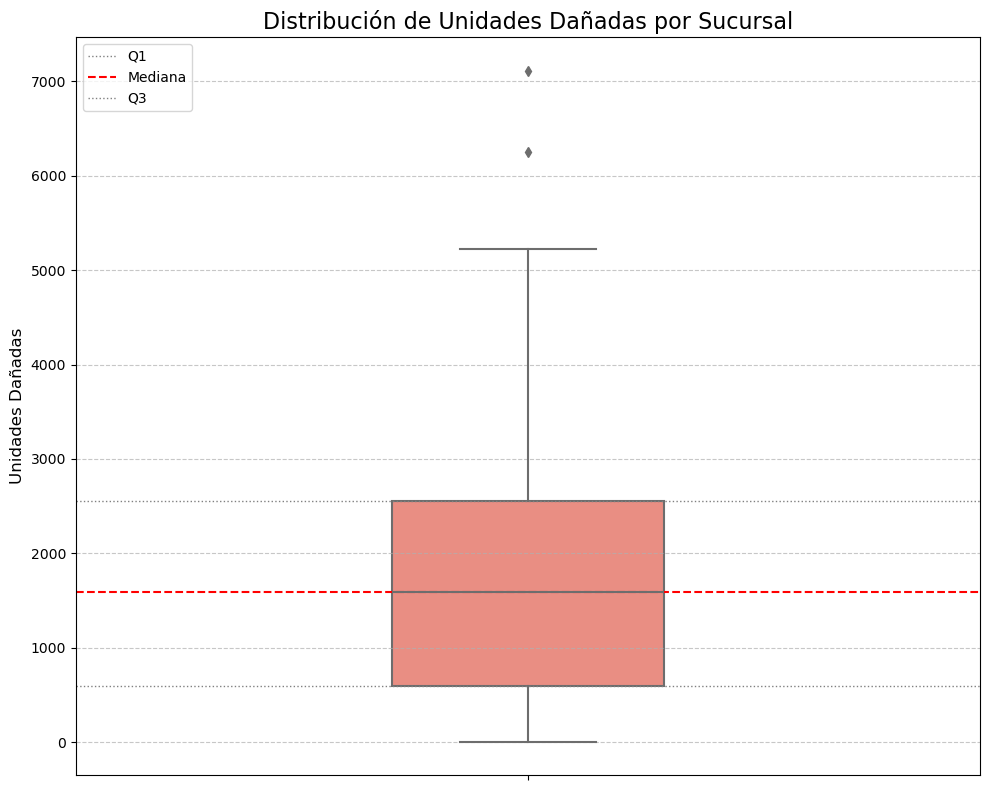


--- Análisis Descriptivo del Descuento Total ---
count: $42.00
mean: $58,981,000.83
std: $46,462,256.44
min: $731,000.00
25%: $26,476,247.25
50%: $46,381,081.50
75%: $80,603,156.50
max: $182,907,944.00

Top 5 Sucursales por Descuento Total:
        Código Sucursal Unidades_Dañadas Descuento_total  Descuento_promedio
29       Plaza Vespucio            3,575    $182,907,944        51163.061259
31               Puente            3,731    $158,491,580        42479.651568
18        Marina Arauco            1,804    $143,861,354        79745.761641
7   Costanera Pto Montt            7,112    $137,072,714        19273.441226
35             Rancagua            5,222    $132,642,940        25400.792800

Bottom 5 Sucursales por Descuento Total:
   Código Sucursal Unidades_Dañadas Descuento_total  Descuento_promedio
36    San Fernando                5        $731,000       146200.000000
14       Los Andes              157      $1,657,150        10555.095541
26     Plaza Oeste               16   

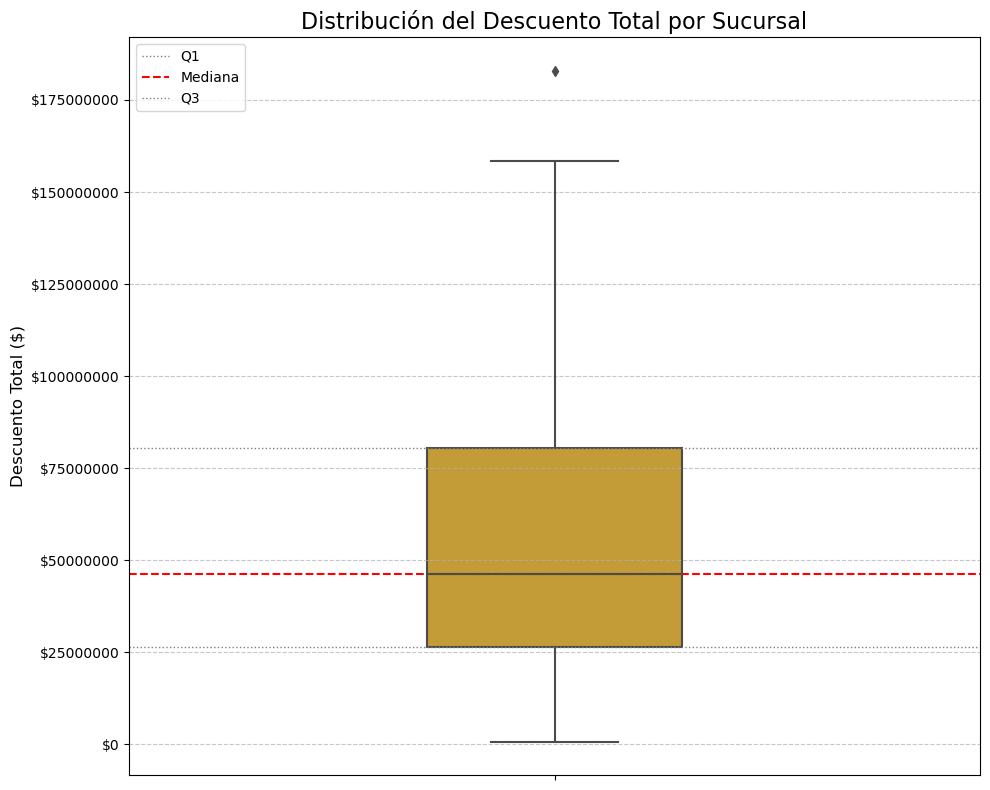

In [15]:
Productos_dañados_2024 = pd.read_excel("Venta de APRE 2024 (1).xlsx")
Productos_dañados_2024["Código Sucursal"] = (Productos_dañados_2024["Código Sucursal"]
                                                  .astype(str)
                                                  .str.strip()
                                                  .str.title()
)
Productos_dañados_2024 = (
    Productos_dañados_2024.groupby("Código Sucursal")
    .agg(
        Unidades_Dañadas = ("Descto", "count"),
        Descuento_total = ("Descto", "sum"),
        Descuento_promedio = ("Descto", "mean"),

    )
    .reset_index()
)

# --- 1. Copia y limpieza ---
Productos_dañados_2024 = Productos_dañados_2024.copy()

# Conversión a numérico
Productos_dañados_2024['Unidades_Dañadas'] = pd.to_numeric(Productos_dañados_2024['Unidades_Dañadas'], errors='coerce')
Productos_dañados_2024['Descuento_total'] = pd.to_numeric(Productos_dañados_2024['Descuento_total'], errors='coerce')
Productos_dañados_2024.dropna(subset=['Unidades_Dañadas', 'Descuento_total'], inplace=True)
print(f"Filas después de limpiar NaNs: {len(Productos_dañados_2024)}")

# --- 2. Formato visual ---
def format_numeric_columns_for_display(df_to_format):
    df_formatted = df_to_format.copy()
    if 'Unidades_Dañadas' in df_formatted.columns:
        df_formatted['Unidades_Dañadas'] = df_formatted['Unidades_Dañadas'].apply(lambda x: f"{x:,.0f}")
    if 'Descuento_total' in df_formatted.columns:
        df_formatted['Descuento_total'] = df_formatted['Descuento_total'].apply(lambda x: f"${x:,.0f}")
    return df_formatted

# --- 3. Análisis descriptivo: Unidades Dañadas ---
print("\n--- Análisis Descriptivo de Unidades Dañadas ---")
desc_u = Productos_dañados_2024['Unidades_Dañadas'].describe()
for stat in desc_u.items():
    print(f"{stat[0]}: {stat[1]:,.2f}")

print("\nTop 5 Sucursales por Unidades Dañadas:")
print(format_numeric_columns_for_display(Productos_dañados_2024.nlargest(5, 'Unidades_Dañadas')))

print("\nBottom 5 Sucursales por Unidades Dañadas:")
print(format_numeric_columns_for_display(Productos_dañados_2024.nsmallest(5, 'Unidades_Dañadas')))


# --- 4. Outliers: Unidades Dañadas ---
print("\n--- Detección de Outliers: Unidades Dañadas ---")
Q1_u = desc_u['25%']
Q3_u = desc_u['75%']
IQR_u = Q3_u - Q1_u
lower_u = Q1_u - 1.5 * IQR_u
upper_u = Q3_u + 1.5 * IQR_u
outliers_u = Productos_dañados_2024[(Productos_dañados_2024['Unidades_Dañadas'] < lower_u) | 
                                    (Productos_dañados_2024['Unidades_Dañadas'] > upper_u)]

print(f"  Q1: {Q1_u:,.2f}")
print(f"  Q3: {Q3_u:,.2f}")
print(f"  IQR: {IQR_u:,.2f}")
print(f"  Límite Inferior: {lower_u:,.2f}")
print(f"  Límite Superior: {upper_u:,.2f}")
print(f"  Outliers detectados ({len(outliers_u)}):")
print(format_numeric_columns_for_display(outliers_u))

# --- 5. BoxPlot: Unidades Dañadas ---
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=Productos_dañados_2024['Unidades_Dañadas'], color='salmon', width=0.3, ax=ax1)
ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax1.set_title('Distribución de Unidades Dañadas por Sucursal', fontsize=16)
ax1.set_ylabel('Unidades Dañadas', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.axhline(Q1_u, color='gray', linestyle=':', linewidth=1, label='Q1')
ax1.axhline(desc_u['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax1.axhline(Q3_u, color='gray', linestyle=':', linewidth=1, label='Q3')
ax1.legend(loc='upper left')
plt.tight_layout()
plt.show()

# --- 6. Análisis descriptivo: Descuento Total ---
print("\n--- Análisis Descriptivo del Descuento Total ---")
desc_d = Productos_dañados_2024['Descuento_total'].describe()
for stat in desc_d.items():
    print(f"{stat[0]}: ${stat[1]:,.2f}")

print("\nTop 5 Sucursales por Descuento Total:")
print(format_numeric_columns_for_display(Productos_dañados_2024.nlargest(5, 'Descuento_total')))

print("\nBottom 5 Sucursales por Descuento Total:")
print(format_numeric_columns_for_display(Productos_dañados_2024.nsmallest(5, 'Descuento_total')))

# --- 7. Outliers: Descuento Total ---
print("\n--- Detección de Outliers: Descuento Total ---")
Q1_d = desc_d['25%']
Q3_d = desc_d['75%']
IQR_d = Q3_d - Q1_d
lower_d = Q1_d - 1.5 * IQR_d
upper_d = Q3_d + 1.5 * IQR_d
outliers_d = Productos_dañados_2024[(Productos_dañados_2024['Descuento_total'] < lower_d) | 
                                    (Productos_dañados_2024['Descuento_total'] > upper_d)]

print(f"  Q1: ${Q1_d:,.2f}")
print(f"  Q3: ${Q3_d:,.2f}")
print(f"  IQR: ${IQR_d:,.2f}")
print(f"  Límite Inferior: ${lower_d:,.2f}")
print(f"  Límite Superior: ${upper_d:,.2f}")
print(f"  Outliers detectados ({len(outliers_d)}):")
print(format_numeric_columns_for_display(outliers_d))

# --- 8. BoxPlot: Descuento Total ---
fig, ax2 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=Productos_dañados_2024['Descuento_total'], color='goldenrod', width=0.3, ax=ax2)
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.0f'))
ax2.set_title('Distribución del Descuento Total por Sucursal', fontsize=16)
ax2.set_ylabel('Descuento Total ($)', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.axhline(Q1_d, color='gray', linestyle=':', linewidth=1, label='Q1')
ax2.axhline(desc_d['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax2.axhline(Q3_d, color='gray', linestyle=':', linewidth=1, label='Q3')
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()


Filas después de convertir a numérico y limpiar NaNs: 42

--- Análisis Descriptivo de Unidades Dañadas ---
Count: 42
Mean: 1,889.57
Std: 1,653.07
Min: 5.00
25%: 595.50
50% (Median): 1,588.00
75%: 2,557.00
Max: 7,112.00

Top 5 Sucursales por Unidades Dañadas:
        Código Sucursal Unidades_Dañadas Descuento_total  Descuento_promedio
7   Costanera Pto Montt            7,112    $137,072,714        19273.441226
34              Quilpué            6,252    $109,269,654        17477.551823
35             Rancagua            5,222    $132,642,940        25400.792800
31               Puente            3,731    $158,491,580        42479.651568
15        Los Dominicos            3,632     $60,705,228        16713.994493

Bottom 5 Sucursales por Unidades Dañadas:
   Código Sucursal Unidades_Dañadas Descuento_total  Descuento_promedio
36    San Fernando                5        $731,000       146200.000000
26     Plaza Oeste               16      $4,042,763       252672.687500
33    Punta Arenas  

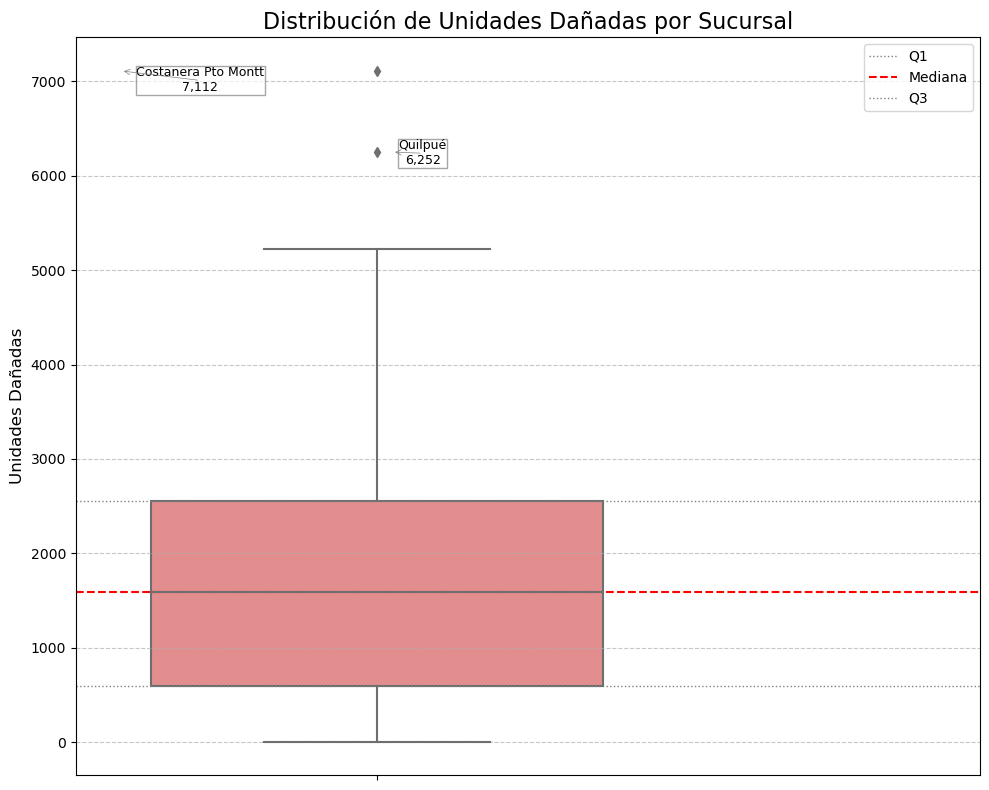

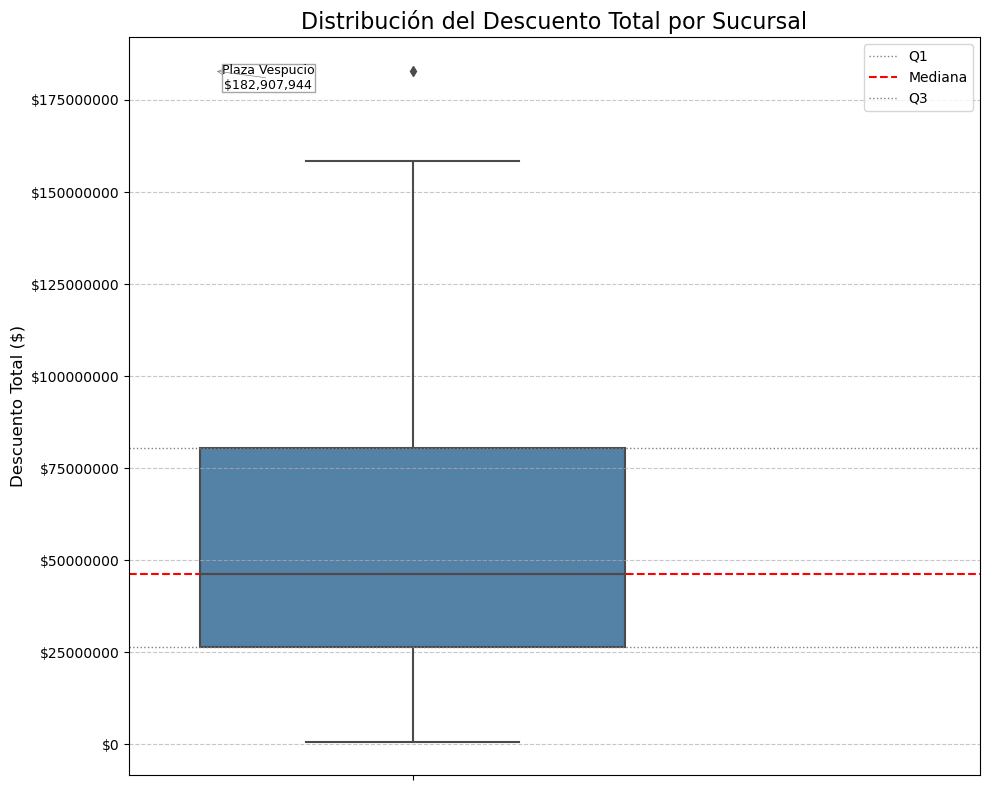

In [16]:
# Trabajamos con el DataFrame ya existente: Productos_dañados_2024
productos_dañados_2024 = Productos_dañados_2024.copy()

# --- 1. Conversión a numérico y limpieza ---
productos_dañados_2024['Unidades_Dañadas'] = pd.to_numeric(productos_dañados_2024['Unidades_Dañadas'], errors='coerce')
productos_dañados_2024['Descuento_total'] = pd.to_numeric(productos_dañados_2024['Descuento_total'], errors='coerce')
productos_dañados_2024.dropna(subset=['Unidades_Dañadas', 'Descuento_total'], inplace=True)
print(f"Filas después de convertir a numérico y limpiar NaNs: {len(productos_dañados_2024)}")

# --- 2. Función de formateo para imprimir ---
def format_numeric_columns_for_display(df_to_format):
    df_formatted = df_to_format.copy()
    if 'Unidades_Dañadas' in df_formatted.columns:
        df_formatted['Unidades_Dañadas'] = df_formatted['Unidades_Dañadas'].apply(lambda x: f"{x:,.0f}")
    if 'Descuento_total' in df_formatted.columns:
        df_formatted['Descuento_total'] = df_formatted['Descuento_total'].apply(lambda x: f"${x:,.0f}")
    return df_formatted

# --- 3. Análisis Descriptivo: Unidades_Dañadas ---
print("\n--- Análisis Descriptivo de Unidades Dañadas ---")
desc_unidades = productos_dañados_2024['Unidades_Dañadas'].describe()
print(f"Count: {desc_unidades['count']:.0f}")
print(f"Mean: {desc_unidades['mean']:,.2f}")
print(f"Std: {desc_unidades['std']:,.2f}")
print(f"Min: {desc_unidades['min']:,.2f}")
print(f"25%: {desc_unidades['25%']:,.2f}")
print(f"50% (Median): {desc_unidades['50%']:,.2f}")
print(f"75%: {desc_unidades['75%']:,.2f}")
print(f"Max: {desc_unidades['max']:,.2f}")

print("\nTop 5 Sucursales por Unidades Dañadas:")
print(format_numeric_columns_for_display(productos_dañados_2024.nlargest(5, 'Unidades_Dañadas')))

print("\nBottom 5 Sucursales por Unidades Dañadas:")
print(format_numeric_columns_for_display(productos_dañados_2024.nsmallest(5, 'Unidades_Dañadas')))

# --- 4. Análisis Descriptivo: Descuento_total ---
print("\n--- Análisis Descriptivo del Descuento Total ---")
desc_descuento = productos_dañados_2024['Descuento_total'].describe()
print(f"Count: {desc_descuento['count']:.0f}")
print(f"Mean: ${desc_descuento['mean']:,.2f}")
print(f"Std: ${desc_descuento['std']:,.2f}")
print(f"Min: ${desc_descuento['min']:,.2f}")
print(f"25%: ${desc_descuento['25%']:,.2f}")
print(f"50% (Median): ${desc_descuento['50%']:,.2f}")
print(f"75%: ${desc_descuento['75%']:,.2f}")
print(f"Max: ${desc_descuento['max']:,.2f}")

print("\nTop 5 Sucursales por Descuento Total:")
print(format_numeric_columns_for_display(productos_dañados_2024.nlargest(5, 'Descuento_total')))

print("\nBottom 5 Sucursales por Descuento Total:")
print(format_numeric_columns_for_display(productos_dañados_2024.nsmallest(5, 'Descuento_total')))

# --- 5. Detección de Outliers ---
print("\n--- Detección de Outliers ---")
variables_to_check = ['Unidades_Dañadas', 'Descuento_total']
for var in variables_to_check:
    Q1 = productos_dañados_2024[var].quantile(0.25)
    Q3 = productos_dañados_2024[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = productos_dañados_2024[(productos_dañados_2024[var] < lower) | (productos_dañados_2024[var] > upper)]
    
    print(f"\nVariable: {var}")
    print(f"  Q1: {Q1:,.2f}")
    print(f"  Q3: {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Límite Inferior: {lower:,.2f}")
    print(f"  Límite Superior: {upper:,.2f}")
    
    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        print(format_numeric_columns_for_display(outliers))
    else:
        print("  No se detectaron outliers.")

# --- 6. BoxPlot Unidades_Dañadas ---
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=productos_dañados_2024['Unidades_Dañadas'], color='lightcoral', width=0.3, ax=ax1)
ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax1.set_title('Distribución de Unidades Dañadas por Sucursal', fontsize=16)
ax1.set_ylabel('Unidades Dañadas', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.axhline(desc_unidades['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax1.axhline(desc_unidades['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax1.axhline(desc_unidades['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')

Q1_u, Q3_u = desc_unidades['25%'], desc_unidades['75%']
upper_u = Q3_u + 1.5 * (Q3_u - Q1_u)
outliers_u = productos_dañados_2024[productos_dañados_2024['Unidades_Dañadas'] > upper_u]
ax1.set_xlim(-0.2, 0.4)
x_min, x_max = ax1.get_xlim()
fracs = np.linspace(0.05, 0.35, len(outliers_u))

texts = []
for f, (_, row) in zip(fracs, outliers_u.iterrows()):
    y = row['Unidades_Dañadas']
    x = x_min + f * (x_max - x_min)
    label = f"{row['Código Sucursal']}\n{y:,.0f}"
    texts.append(ax1.text(x, y, label, ha='left', va='center',
                          fontsize=9, bbox=dict(facecolor='white', alpha=0.7, pad=0.3, edgecolor='gray')))
adjust_text(texts, ax=ax1, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_text=(1.1, 1.2), expand_points=(1.1, 1.2))
ax1.legend(loc='upper right')
plt.tight_layout()
plt.show()

# --- 7. BoxPlot Descuento_total ---
fig, ax2 = plt.subplots(figsize=(10, 8))
sns.boxplot(y=productos_dañados_2024['Descuento_total'], color='steelblue', width=0.3, ax=ax2)
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.0f'))
ax2.set_title('Distribución del Descuento Total por Sucursal', fontsize=16)
ax2.set_ylabel('Descuento Total ($)', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.axhline(desc_descuento['25%'], color='gray', linestyle=':', linewidth=1, label='Q1')
ax2.axhline(desc_descuento['50%'], color='red', linestyle='--', linewidth=1.5, label='Mediana')
ax2.axhline(desc_descuento['75%'], color='gray', linestyle=':', linewidth=1, label='Q3')

Q1_d, Q3_d = desc_descuento['25%'], desc_descuento['75%']
upper_d = Q3_d + 1.5 * (Q3_d - Q1_d)
outliers_d = productos_dañados_2024[productos_dañados_2024['Descuento_total'] > upper_d]
ax2.set_xlim(-0.2, 0.4)
x_min2, x_max2 = ax2.get_xlim()
fracs2 = np.linspace(0.1, 0.45, len(outliers_d))

texts2 = []
for f, (_, row) in zip(fracs2, outliers_d.iterrows()):
    y = row['Descuento_total']
    x = x_min2 + f * (x_max2 - x_min2)
    label = f"{row['Código Sucursal']}\n${y:,.0f}"
    texts2.append(ax2.text(x, y, label, ha='left', va='center',
                           fontsize=9, bbox=dict(facecolor='white', alpha=0.7, pad=0.3, edgecolor='gray')))
adjust_text(texts2, ax=ax2, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_text=(1.1, 1.2), expand_points=(1.1, 1.2))
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()



In [17]:
productos_dañados_2024.to_excel('Productos_Dañados_sucursal_2024.xlsx', index=False)
print("Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.")

Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.


## Ahora vamos por la Merma del Inventario

In [18]:


# Cargar saltando las primeras dos filas
merma_inventario = pd.read_excel("Merma e Índice de Merma por TIENDA.xlsx", skiprows=2)

# Renombrar columna de sucursal
merma_inventario.rename(columns={merma_inventario.columns[0]: "Sucursal"}, inplace=True)

# Formato: primera letra en mayúscula, resto en minúscula
merma_inventario["Sucursal"] = merma_inventario["Sucursal"].str.title()

# Verifica resultados
print(merma_inventario.head())


                     Sucursal  Suma de Merma  Índice de Merma
0  Outlet M.Costanera P.Montt     12680987.0         0.075271
1                 Antofagasta    406188781.0         0.016142
2               Nueva Alameda    148909418.0         0.015686
3              Plaza Vespucio    353267178.0         0.013499
4              Plaza Tobalaba    236957946.0         0.013487


Filas después de limpiar NaNs: 42

--- Análisis Descriptivo de la Desviación de Merma vs Meta ---
Count: 42
Mean: 0.14%
Std: 0.22%
Min: -0.51%
25%: 0.06%
50% (Median): 0.12%
75%: 0.27%
Max: 0.59%

Top 5 Sucursales (Mejor Desempeño vs Meta):
           Tienda    Meta  Indice Desviacion_Meta_Merma  ¿Cumple?  \
39   Puerto Montt  0.0091  0.0032                 0.59%       1.0   
48  Vivo Rancagua  0.0115  0.0060                 0.55%       1.0   
42   San Fernando  0.0084  0.0035                 0.49%       1.0   
4         Chillán  0.0088  0.0045                 0.43%       1.0   
13      La Serena  0.0091  0.0050                 0.41%       1.0   

   Clasificacion_riesgo  
39          Riesgo bajo  
48          Riesgo bajo  
42          Riesgo bajo  
4           Riesgo bajo  
13          Riesgo bajo  

Bottom 5 Sucursales (Peor Desempeño vs Meta):
         Tienda    Meta  Indice Desviacion_Meta_Merma  ¿Cumple?  \
0   Antofagasta  0.0102  0.0153                -0.51%       0.0   
3     C

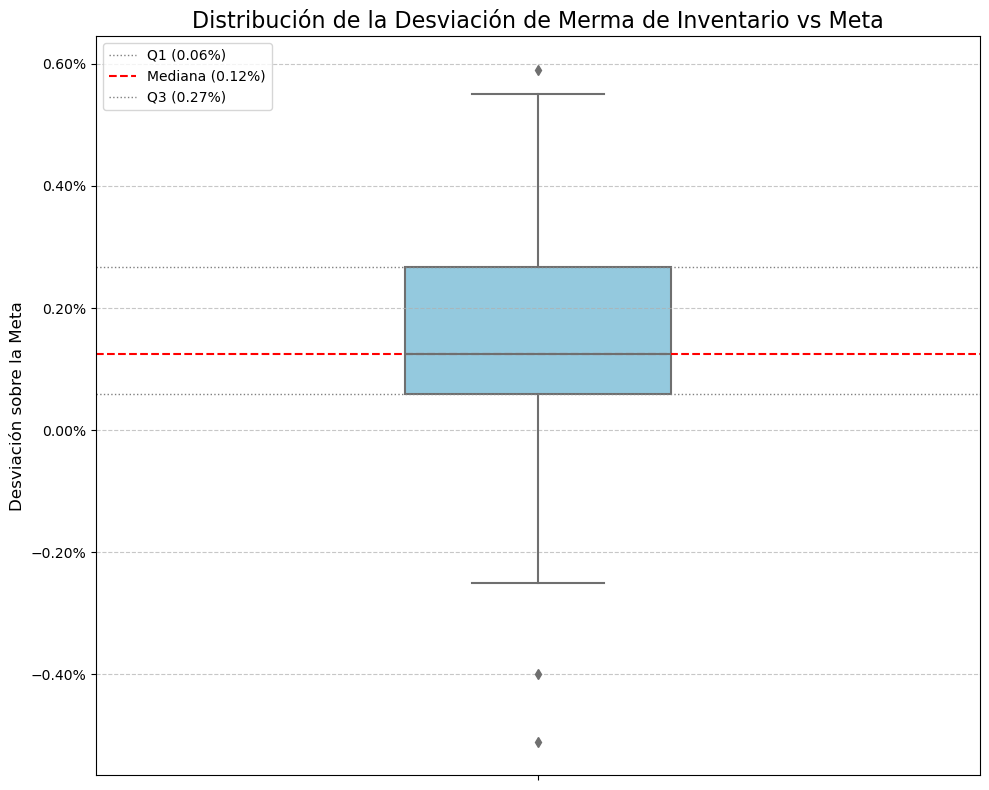

In [19]:
# --- ANÁLISIS DESCRIPTIVO DE MERMA DE INVENTARIO 2024 ---

# Carga la data de merma de inventario.
# ¡IMPORTANTE!: Asegúrate de que el nombre del archivo sea el correcto.
try:
    merma_inventario_df = pd.read_excel("Indice_Meta_Merma_Inventario_2024.xlsx")

    # --- 1. Preparar el DataFrame ---
    # La columna clave es 'Desviacion_Meta_Merma'. No necesitamos agrupar.

    # Conversión a numérico y limpieza de posibles valores no válidos
    merma_inventario_df['Desviacion_Meta_Merma'] = pd.to_numeric(merma_inventario_df['Desviacion_Meta_Merma'], errors='coerce')
    merma_inventario_df.dropna(subset=['Desviacion_Meta_Merma'], inplace=True)
    print(f"Filas después de limpiar NaNs: {len(merma_inventario_df)}")

    # --- 2. Formato para visualización de columnas numéricas ---
    # Esta función ahora formatea la desviación como un porcentaje.
    def format_numeric_columns_for_display_merma(df_to_format):
        df_formatted = df_to_format.copy()
        if 'Desviacion_Meta_Merma' in df_formatted.columns:
            df_formatted['Desviacion_Meta_Merma'] = df_formatted['Desviacion_Meta_Merma'].apply(lambda x: f"{x:.2%}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print("\n--- Análisis Descriptivo de la Desviación de Merma vs Meta ---")
    desc_merma = merma_inventario_df['Desviacion_Meta_Merma'].describe()
    print(f"Count: {desc_merma['count']:.0f}")
    # Mostramos los resultados como porcentajes para mayor claridad
    print(f"Mean: {desc_merma['mean']:.2%}")
    print(f"Std: {desc_merma['std']:.2%}")
    print(f"Min: {desc_merma['min']:.2%}")
    print(f"25%: {desc_merma['25%']:.2%}")
    print(f"50% (Median): {desc_merma['50%']:.2%}")
    print(f"75%: {desc_merma['75%']:.2%}")
    print(f"Max: {desc_merma['max']:.2%}")

    # Para Desviacion_Meta_Merma, un valor más alto es MEJOR (cumplió la meta por más)
    # y un valor más bajo es PEOR (no cumplió la meta por más).
    print("\nTop 5 Sucursales (Mejor Desempeño vs Meta):")
    print(format_numeric_columns_for_display_merma(merma_inventario_df.nlargest(5, 'Desviacion_Meta_Merma')))

    print("\nBottom 5 Sucursales (Peor Desempeño vs Meta):")
    print(format_numeric_columns_for_display_merma(merma_inventario_df.nsmallest(5, 'Desviacion_Meta_Merma')))

    # --- 4. Detección de Outliers ---
    print("\n--- Detección de Outliers (Desviación de Merma) ---")
    Q1_merma = desc_merma['25%']
    Q3_merma = desc_merma['75%']
    IQR_merma = Q3_merma - Q1_merma
    lower_merma = Q1_merma - 1.5 * IQR_merma
    upper_merma = Q3_merma + 1.5 * IQR_merma
    outliers_merma = merma_inventario_df[(merma_inventario_df['Desviacion_Meta_Merma'] < lower_merma) | (merma_inventario_df['Desviacion_Meta_Merma'] > upper_merma)]

    print(f"  Q1: {Q1_merma:.2%}")
    print(f"  Q3: {Q3_merma:.2%}")
    print(f"  IQR: {IQR_merma:.2%}")
    print(f"  Límite Inferior: {lower_merma:.2%}")
    print(f"  Límite Superior: {upper_merma:.2%}")

    if not outliers_merma.empty:
        print(f"  Outliers detectados ({len(outliers_merma)}):")
        print(format_numeric_columns_for_display_merma(outliers_merma))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=merma_inventario_df['Desviacion_Meta_Merma'], color='skyblue', width=0.3, ax=ax)
    # Formatear el eje Y como porcentaje
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax.set_title('Distribución de la Desviación de Merma de Inventario vs Meta', fontsize=16)
    ax.set_ylabel('Desviación sobre la Meta', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.axhline(Q1_merma, color='gray', linestyle=':', linewidth=1, label=f'Q1 ({Q1_merma:.2%})')
    ax.axhline(desc_merma['50%'], color='red', linestyle='--', linewidth=1.5, label=f"Mediana ({desc_merma['50%']:.2%})")
    ax.axhline(Q3_merma, color='gray', linestyle=':', linewidth=1, label=f'Q3 ({Q3_merma:.2%})')
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'Indice_Meta_Merma_Inventario_2024.xlsx - Hoja1.csv'.")
    print("Por favor, asegúrate de que el nombre del archivo sea el correcto y esté en la misma carpeta que tu notebook.")
except KeyError:
    print("Error: No se encontró la columna 'Desviacion_Meta_Merma' en el archivo. Asegúrate de que el nombre de la columna sea el correcto.")




In [20]:
merma_inventario_df.to_excel('Merma_inventario_sucursal_2024.xlsx', index=False)
print("Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.")

Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.


## Ahora Analizamos el numero de accidentes por Sucursal del 2024

Filas después de limpiar NaNs: 42

--- Análisis Descriptivo de Cantidad de Accidentes ---
Count: 42.0
Mean: 30.5
Std: 13.9
Min: 10.0
25%: 21.2
50% (Median): 26.0
75%: 38.8
Max: 73.0

Top 5 Sucursales por Cantidad de Accidentes:
                         Tienda N° Accidentes
9                     El Trébol          73.0
37  Portal Temuco (Mall Temuco)          69.0
18                Marina Arauco          52.0
0                   Antofagasta          49.0
47                 Viña del Mar          46.0

Bottom 5 Sucursales por Cantidad de Accidentes:
           Tienda N° Accidentes
4         Chillán          10.0
28   Plaza Calama          13.0
2           Arica          14.0
15  Los Dominicos          14.0
3       Castellón          17.0

--- Detección de Outliers (Accidentes) ---
  Q1: 21.25
  Q3: 38.75
  IQR: 17.50
  Límite Inferior: -5.00
  Límite Superior: 65.00
  Outliers detectados (2):
                         Tienda N° Accidentes
9                     El Trébol          73.0
37  P

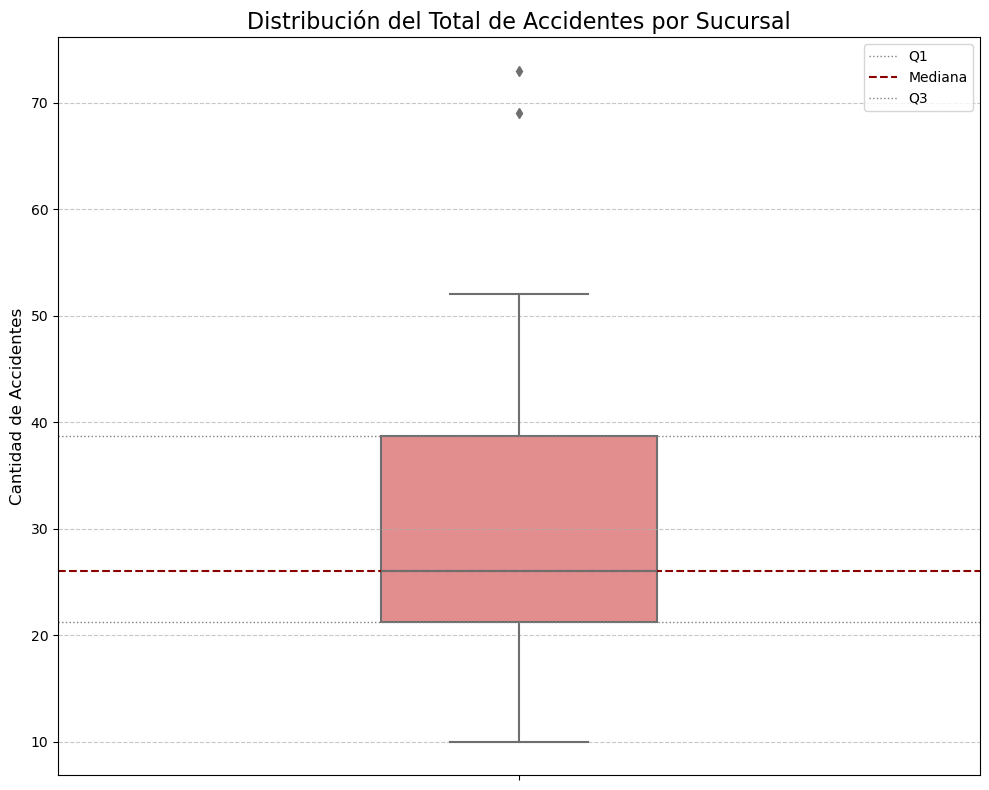

In [21]:

# --- ANÁLISIS DESCRIPTIVO DE ACCIDENTES 2024 ---

try:
    accidentes_2024 = pd.read_excel("Accidentes_Sucursal_2024.xlsx")
    
    # --- 1. Cargar y preparar el DataFrame ---
    accidentes_df = accidentes_2024.copy()

    # Conversión a numérico y limpieza
    accidentes_df['N° Accidentes'] = pd.to_numeric(accidentes_df['N° Accidentes'], errors='coerce')
    accidentes_df.dropna(subset=['N° Accidentes'], inplace=True)
    print(f"Filas después de limpiar NaNs: {len(accidentes_df)}")

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_accidentes(df_to_format):
        df_formatted = df_to_format.copy()
        if 'N° Accidentes' in df_formatted.columns:
            df_formatted['N° Accidentes'] = df_formatted['N° Accidentes'].apply(lambda x: f"{x:,.1f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print("\n--- Análisis Descriptivo de Cantidad de Accidentes ---")
    desc_accidentes = accidentes_df['N° Accidentes'].describe()
    print(f"Count: {desc_accidentes['count']:.1f}")
    print(f"Mean: {desc_accidentes['mean']:,.1f}")
    print(f"Std: {desc_accidentes['std']:,.1f}")
    print(f"Min: {desc_accidentes['min']:,.1f}")
    print(f"25%: {desc_accidentes['25%']:,.1f}")
    print(f"50% (Median): {desc_accidentes['50%']:,.1f}")
    print(f"75%: {desc_accidentes['75%']:,.1f}")
    print(f"Max: {desc_accidentes['max']:,.1f}")

    print("\nTop 5 Sucursales por Cantidad de Accidentes:")
    print(format_numeric_columns_for_display_accidentes(accidentes_df.nlargest(5, 'N° Accidentes')))

    print("\nBottom 5 Sucursales por Cantidad de Accidentes:")
    print(format_numeric_columns_for_display_accidentes(accidentes_df.nsmallest(5, 'N° Accidentes')))

    # --- 4. Detección de Outliers ---
    print("\n--- Detección de Outliers (Accidentes) ---")
    Q1_acc = desc_accidentes['25%']
    Q3_acc = desc_accidentes['75%']
    IQR_acc = Q3_acc - Q1_acc
    lower_acc = Q1_acc - 1.5 * IQR_acc
    upper_acc = Q3_acc + 1.5 * IQR_acc
    outliers_acc = accidentes_df[(accidentes_df['N° Accidentes'] < lower_acc) | (accidentes_df['N° Accidentes'] > upper_acc)]

    print(f"  Q1: {Q1_acc:,.2f}")
    print(f"  Q3: {Q3_acc:,.2f}")
    print(f"  IQR: {IQR_acc:,.2f}")
    print(f"  Límite Inferior: {lower_acc:,.2f}")
    print(f"  Límite Superior: {upper_acc:,.2f}")

    if not outliers_acc.empty:
        print(f"  Outliers detectados ({len(outliers_acc)}):")
        print(format_numeric_columns_for_display_accidentes(outliers_acc))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=accidentes_df['N° Accidentes'], color='lightcoral', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.set_title('Distribución del Total de Accidentes por Sucursal', fontsize=16)
    ax.set_ylabel('Cantidad de Accidentes', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.axhline(Q1_acc, color='gray', linestyle=':', linewidth=1, label='Q1')
    ax.axhline(desc_accidentes['50%'], color='darkred', linestyle='--', linewidth=1.5, label='Mediana')
    ax.axhline(Q3_acc, color='gray', linestyle=':', linewidth=1, label='Q3')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'Accidentes_2024.xlsx'.")
    print("Por favor, asegúrate de que el nombre del archivo sea el correcto y esté en la misma carpeta que tu notebook.")


In [22]:
df_cleaned.rename(columns={'Nombre Sucursal': 'Nombre_Sucursal'}, inplace=True)
merged_2024.rename(columns={'Tienda': 'Nombre_Sucursal'}, inplace=True)
notas_credito_2024.rename(columns={'Tienda': 'Nombre_Sucursal'}, inplace=True)
Cambios_Entra_Sale.rename(columns={'Tienda': 'Nombre_Sucursal'}, inplace=True)
reclamos_df.rename(columns={'Tienda': 'Nombre_Sucursal'}, inplace=True)
productos_dañados_2024.rename(columns={'Código Sucursal': 'Nombre_Sucursal'}, inplace=True)
merma_inventario_df.rename(columns={'Tienda': 'Nombre_Sucursal'}, inplace=True)
accidentes_df.rename(columns={'Tienda': 'Nombre_Sucursal'}, inplace=True)

## Estandarizamos el texto de Merma

In [23]:


# --- 1. Función de limpieza y normalización ---
def normalizar(texto):
    texto = str(texto).lower().strip()
    texto = re.sub(r'[^\w\s]', '', texto)  # Quitar caracteres especiales (; , etc.)
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join(c for c in texto if not unicodedata.combining(c))  # Eliminar acentos
    texto = re.sub(r'\s+', ' ', texto)  # Quitar espacios dobles
    return texto

# --- 2. Cargar diccionario desde CSV ---
correcciones_df = pd.read_csv("Correcci_n_de_nombres_de_sucursales.csv", encoding="latin1")
correcciones_df.columns = ['Sucursal_Original', 'Sucursal_Estandar']
correcciones_df['Sucursal_Original_Normalizada'] = correcciones_df['Sucursal_Original'].apply(normalizar)

# Crear diccionario de correcciones
diccionario_correcciones = dict(zip(correcciones_df['Sucursal_Original_Normalizada'],
                                    correcciones_df['Sucursal_Estandar'].str.strip()))

# --- 3. Aplicar correcciones a tu DataFrame principal ---
# Asegúrate de haber cargado previamente Merma_inventario antes de esto

merma_inventario_df['Nombre_Sucursal_Normalizada'] = merma_inventario_df['Nombre_Sucursal'].apply(normalizar)
merma_inventario_df['Nombre_Sucursal_Corregida'] = merma_inventario_df['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazamos sólo donde exista una corrección
merma_inventario_df['Nombre_Sucursal'] = merma_inventario_df['Nombre_Sucursal_Corregida'].fillna(merma_inventario_df['Nombre_Sucursal'])

# --- 4. Eliminar columnas auxiliares ---
merma_inventario_df.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 5. eliminar comas ; resultado ---
merma_inventario_df['Nombre_Sucursal'] = merma_inventario_df['Nombre_Sucursal'].str.lstrip(' ,;')

## Agrupar columnas Outlet
columnas_a_agrupar = [col for col in merma_inventario_df.columns if col != 'Nombre_Sucursal']
merma_inventario_df = merma_inventario_df.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()
merma_inventario_df['Nombre_Sucursal'] = merma_inventario_df['Nombre_Sucursal'].replace('Viña', 'Viña Del Mar')

merma_inventario_df['Nombre_Sucursal'] = merma_inventario_df['Nombre_Sucursal'].apply(normalizar)






/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_11163/1670715925.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merma_inventario_df = merma_inventario_df.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()


In [24]:
merma_inventario_df["Nombre_Sucursal"]

0                   antofagasta
1                  arauco maipu
2                         arica
3                     castellon
4                       chillan
5                      coquimbo
6              costanera center
7           costanera pto montt
8                       crillon
9                     el trebol
10               florida center
11                      iquique
12                    la calera
13                    la serena
14                    los andes
15                los dominicos
16              mall concepcion
17                  mall curico
18                marina arauco
19                parque arauco
20                plaza alameda
21                 plaza calama
22                plaza copiapo
23                  plaza egana
24            plaza los angeles
25                  plaza norte
26                  plaza oeste
27                    plaza sur
28               plaza tobalaba
29               plaza vespucio
30    portal temuco mall temuco
31      

Ahora lo hacemos con ventas

In [25]:

# --- 1. Función de limpieza y normalización ---
def normalizar(texto):
    texto = str(texto).lower().strip()
    texto = re.sub(r'[^\w\s]', '', texto)  # Quitar caracteres especiales (; , etc.)
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join(c for c in texto if not unicodedata.combining(c))  # Eliminar acentos
    texto = re.sub(r'\s+', ' ', texto)  # Quitar espacios dobles
    return texto

# --- 2. Cargar diccionario desde CSV ---
correcciones_df = pd.read_csv("Correcci_n_de_nombres_de_sucursales.csv", encoding="latin1")
correcciones_df.columns = ['Sucursal_Original', 'Sucursal_Estandar']
correcciones_df['Sucursal_Original_Normalizada'] = correcciones_df['Sucursal_Original'].apply(normalizar)

# Crear diccionario de correcciones
diccionario_correcciones = dict(zip(correcciones_df['Sucursal_Original_Normalizada'],
                                    correcciones_df['Sucursal_Estandar'].str.strip()))

# --- 3. Aplicar correcciones a tu DataFrame principal ---
# Asegúrate de haber cargado previamente Merma_inventario antes de esto

df_cleaned['Nombre_Sucursal_Normalizada'] = df_cleaned['Nombre_Sucursal'].apply(normalizar)
df_cleaned['Nombre_Sucursal_Corregida'] = df_cleaned['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazamos sólo donde exista una corrección
df_cleaned['Nombre_Sucursal'] = df_cleaned['Nombre_Sucursal_Corregida'].fillna(df_cleaned['Nombre_Sucursal'])

# --- 4. Eliminar columnas auxiliares ---
df_cleaned.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 5. Unir Outlets resultado ---
columnas_a_agrupar = [col for col in df_cleaned.columns if col != 'Nombre_Sucursal']
df_cleaned = df_cleaned.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()

df_cleaned['Nombre_Sucursal'] = df_cleaned['Nombre_Sucursal'].str.lstrip(' ,;')

df_cleaned['Nombre_Sucursal'] = df_cleaned['Nombre_Sucursal'].apply(normalizar)




In [26]:
df_cleaned["Nombre_Sucursal"]

0                       chillan
1                       crillon
2               mall concepcion
3     portal temuco mall temuco
4                       quilpue
5                    valparaiso
6                   antofagasta
7                  arauco maipu
8                         arica
9                     castellon
10                     coquimbo
11             costanera center
12          costanera pto montt
13                    el trebol
14               florida center
15                      iquique
16                    la calera
17                    la serena
18                    los andes
19                los dominicos
20                  mall curico
21                marina arauco
22                parque arauco
23                plaza alameda
24                 plaza calama
25                plaza copiapo
26                  plaza egana
27            plaza los angeles
28                  plaza norte
29                  plaza oeste
30                    plaza sur
31      

### Ahora procedemos con Merma de Destruccion

In [27]:


# --- 1. Función de limpieza y normalización robusta ---
def normalizar(texto):
    if pd.isna(texto):
        return ''
    texto = str(texto).lower().strip()
    texto = re.sub(r'[^\w\s]', '', texto)  # elimina ; , . etc.
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join(c for c in texto if not unicodedata.combining(c))  # elimina tildes
    texto = re.sub(r'\s+', ' ', texto)  # quita espacios dobles
    return texto

# --- 2. Leer el diccionario de correcciones ---
correcciones_df = pd.read_csv("Correcci_n_de_nombres_de_sucursales.csv", encoding="latin1")
correcciones_df.columns = ['Sucursal_Original', 'Sucursal_Estandar']

# Crear columna con sucursal original normalizada
correcciones_df['Sucursal_Original_Normalizada'] = correcciones_df['Sucursal_Original'].apply(normalizar)

# Crear diccionario
diccionario_correcciones = dict(zip(
    correcciones_df['Sucursal_Original_Normalizada'],
    correcciones_df['Sucursal_Estandar'].str.strip()
))

# --- 3. Normalizar y corregir en el DataFrame principal ---
merged_2024['Nombre_Sucursal_Normalizada'] = merged_2024['Nombre_Sucursal'].apply(normalizar)
merged_2024['Nombre_Sucursal_Corregida'] = merged_2024['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazo final
merged_2024['Nombre_Sucursal'] = merged_2024['Nombre_Sucursal_Corregida'].fillna(merged_2024['Nombre_Sucursal'])

# --- 4. Limpieza de residuos de signos y espacios ---
merged_2024['Nombre_Sucursal'] = merged_2024['Nombre_Sucursal'].str.strip().str.lstrip(' ,;')

# --- 5. Eliminar columnas auxiliares ---
merged_2024.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 6. Agrupar y unir filas duplicadas ---
columnas_a_agrupar = [col for col in merged_2024.columns if col != 'Nombre_Sucursal']
merged_2024 = merged_2024.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()

merged_2024['Nombre_Sucursal'] = merged_2024['Nombre_Sucursal'].apply(normalizar)


# Verifica nombres únicos corregidos
print(merged_2024['Nombre_Sucursal'].drop_duplicates().sort_values())




0                   antofagasta
1                  arauco maipu
2                         arica
3                     castellon
4                       chillan
5                      coquimbo
6              costanera center
7           costanera pto montt
8                       crillon
9                     el trebol
10               florida center
11                      iquique
12                    la calera
13                    la serena
14                    los andes
15                los dominicos
16              mall concepcion
17                  mall curico
18                marina arauco
19                parque arauco
20                plaza alameda
21                 plaza calama
22                plaza copiapo
23                  plaza egana
24            plaza los angeles
25                  plaza norte
26                  plaza oeste
27                    plaza sur
28               plaza tobalaba
29               plaza vespucio
30    portal temuco mall temuco
31      

In [28]:
merged_2024["Nombre_Sucursal"]

0                   antofagasta
1                  arauco maipu
2                         arica
3                     castellon
4                       chillan
5                      coquimbo
6              costanera center
7           costanera pto montt
8                       crillon
9                     el trebol
10               florida center
11                      iquique
12                    la calera
13                    la serena
14                    los andes
15                los dominicos
16              mall concepcion
17                  mall curico
18                marina arauco
19                parque arauco
20                plaza alameda
21                 plaza calama
22                plaza copiapo
23                  plaza egana
24            plaza los angeles
25                  plaza norte
26                  plaza oeste
27                    plaza sur
28               plaza tobalaba
29               plaza vespucio
30    portal temuco mall temuco
31      

### Ahora vamos con las Notas de Credito

In [29]:
# --- 3. Aplicar correcciones a tu DataFrame principal ---
# Asegúrate de haber cargado previamente Merma_inventario antes de esto

notas_credito_2024['Nombre_Sucursal_Normalizada'] = notas_credito_2024["Nombre_Sucursal"].apply(normalizar)
notas_credito_2024['Nombre_Sucursal_Corregida'] = notas_credito_2024['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazamos sólo donde exista una corrección
notas_credito_2024['Nombre_Sucursal'] = notas_credito_2024['Nombre_Sucursal_Corregida'].fillna(notas_credito_2024['Nombre_Sucursal'])

# --- 4. Eliminar columnas auxiliares ---
notas_credito_2024.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 5. Unir Outlets resultado ---
columnas_a_agrupar = [col for col in notas_credito_2024.columns if col != 'Nombre_Sucursal']
notas_credito_2024 = notas_credito_2024.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()

notas_credito_2024['Nombre_Sucursal'] = notas_credito_2024['Nombre_Sucursal'].str.lstrip(' ,;')
notas_credito_2024['Nombre_Sucursal'] = notas_credito_2024['Nombre_Sucursal'].apply(normalizar)


### Cambiamos los nombres de Cambios Entra y Sale

In [30]:
# --- 3. Aplicar correcciones a tu DataFrame principal ---

Cambios_Entra_Sale['Nombre_Sucursal_Normalizada'] = Cambios_Entra_Sale["Nombre_Sucursal"].apply(normalizar)
Cambios_Entra_Sale['Nombre_Sucursal_Corregida'] = Cambios_Entra_Sale['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazamos sólo donde exista una corrección
Cambios_Entra_Sale['Nombre_Sucursal'] = Cambios_Entra_Sale['Nombre_Sucursal_Corregida'].fillna(Cambios_Entra_Sale['Nombre_Sucursal'])

# --- 4. Eliminar columnas auxiliares ---
Cambios_Entra_Sale.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 5. Unir Outlets resultado ---
columnas_a_agrupar = [col for col in Cambios_Entra_Sale.columns if col != 'Nombre_Sucursal']
Cambios_Entra_Sale = Cambios_Entra_Sale.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()

Cambios_Entra_Sale['Nombre_Sucursal'] = Cambios_Entra_Sale['Nombre_Sucursal'].str.lstrip(' ,;')
Cambios_Entra_Sale['Nombre_Sucursal'] = Cambios_Entra_Sale['Nombre_Sucursal'].apply(normalizar)


### Realizamos los cambios en Reclamos

In [31]:
reclamos_df["Nombre_Sucursal"]

0             Antofagasta
1            Arauco Maipu
2                   Arica
3               Castellón
4                 Chillan
5                Coquimbo
6        Costanera Center
7     Costanera Pto Montt
8                 Crillón
9               El Trébol
10         Florida Center
11                Iquique
12              La Calera
13              La Serena
14              Los Andes
15          Los Dominicos
16        Mall Concepcion
17            Mall Curicó
18          Marina Arauco
19          Parque Arauco
20          Plaza Alameda
21           Plaza Calama
22          Plaza Copiapó
23            Plaza Egaña
24      Plaza Los Ángeles
25            Plaza Norte
26            Plaza Oeste
27              Plaza Sur
28         Plaza Tobalaba
29         Plaza Vespucio
30          Portal Temuco
31                 Puente
32         Puerto Montt 1
33           Punta Arenas
34                Quilpue
35           San Fernando
36                  Talca
37                 Temuco
38          

In [32]:
# --- 3. Aplicar correcciones a tu DataFrame principal ---

reclamos_df['Nombre_Sucursal_Normalizada'] = reclamos_df["Nombre_Sucursal"].apply(normalizar)
reclamos_df['Nombre_Sucursal_Corregida'] = reclamos_df['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazamos sólo donde exista una corrección
reclamos_df['Nombre_Sucursal'] = reclamos_df['Nombre_Sucursal_Corregida'].fillna(reclamos_df['Nombre_Sucursal'])

# --- 4. Eliminar columnas auxiliares ---
reclamos_df.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 5. Unir Outlets resultado ---
columnas_a_agrupar = [col for col in reclamos_df.columns if col != 'Nombre_Sucursal']
reclamos_df = reclamos_df.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()

reclamos_df['Nombre_Sucursal'] = reclamos_df['Nombre_Sucursal'].str.lstrip(' ,;')
reclamos_df['Nombre_Sucursal'] = reclamos_df['Nombre_Sucursal'].apply(normalizar)
reclamos_df['Nombre_Sucursal'] = reclamos_df['Nombre_Sucursal'].replace('puerto montt 1', 'puerto montt')



### Ahora vamos a Productos Dañados

In [33]:
# --- 3. Aplicar correcciones a tu DataFrame principal ---

productos_dañados_2024['Nombre_Sucursal_Normalizada'] = productos_dañados_2024["Nombre_Sucursal"].apply(normalizar)
productos_dañados_2024['Nombre_Sucursal_Corregida'] = productos_dañados_2024['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazamos sólo donde exista una corrección
productos_dañados_2024['Nombre_Sucursal'] = productos_dañados_2024['Nombre_Sucursal_Corregida'].fillna(productos_dañados_2024['Nombre_Sucursal'])

# --- 4. Eliminar columnas auxiliares ---
productos_dañados_2024.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 5. Unir Outlets resultado ---
columnas_a_agrupar = [col for col in productos_dañados_2024.columns if col != 'Nombre_Sucursal']
productos_dañados_2024 = productos_dañados_2024.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()

productos_dañados_2024['Nombre_Sucursal'] = productos_dañados_2024['Nombre_Sucursal'].str.lstrip(' ,;')
productos_dañados_2024['Nombre_Sucursal'] = productos_dañados_2024['Nombre_Sucursal'].apply(normalizar)




In [34]:
merma_inventario_df.to_excel('Merma_inventario_sucursal_2024.xlsx', index=False)
print("Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.")

Archivo 'Cambios_Entra_Sale_output.xlsx' guardado exitosamente.


## Realizamos la estandarizacion de Nombre_Sucursal para Accidentes

In [35]:

# --- 1. Función de limpieza y normalización ---
def normalizar(texto):
    texto = str(texto).lower().strip()
    texto = re.sub(r'[^\w\s]', '', texto)  # Quitar caracteres especiales (; , etc.)
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join(c for c in texto if not unicodedata.combining(c))  # Eliminar acentos
    texto = re.sub(r'\s+', ' ', texto)  # Quitar espacios dobles
    return texto

# --- 2. Cargar diccionario desde CSV ---
correcciones_df = pd.read_csv("Correcci_n_de_nombres_de_sucursales.csv", encoding="latin1")
correcciones_df.columns = ['Sucursal_Original', 'Sucursal_Estandar']
correcciones_df['Sucursal_Original_Normalizada'] = correcciones_df['Sucursal_Original'].apply(normalizar)

# Crear diccionario de correcciones
diccionario_correcciones = dict(zip(correcciones_df['Sucursal_Original_Normalizada'],
                                    correcciones_df['Sucursal_Estandar'].str.strip()))

# --- 3. Aplicar correcciones a tu DataFrame principal ---
# Asegúrate de haber cargado previamente Merma_inventario antes de esto

accidentes_df['Nombre_Sucursal_Normalizada'] = accidentes_df['Nombre_Sucursal'].apply(normalizar)
accidentes_df['Nombre_Sucursal_Corregida'] = accidentes_df['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazamos sólo donde exista una corrección
accidentes_df['Nombre_Sucursal'] = accidentes_df['Nombre_Sucursal_Corregida'].fillna(accidentes_df['Nombre_Sucursal'])

# --- 4. Eliminar columnas auxiliares ---
accidentes_df.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 5. eliminar comas ; resultado ---
accidentes_df['Nombre_Sucursal'] = accidentes_df['Nombre_Sucursal'].str.lstrip(' ,;')

## Agrupar columnas Outlet
columnas_a_agrupar = [col for col in accidentes_df.columns if col != 'Nombre_Sucursal']
accidentes_df = accidentes_df.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()
accidentes_df['Nombre_Sucursal'] = accidentes_df['Nombre_Sucursal'].replace('Viña', 'Viña Del Mar')

accidentes_df['Nombre_Sucursal'] = accidentes_df['Nombre_Sucursal'].apply(normalizar)




In [36]:

# Unión secuencial por 'Nombre_Sucursal'
df_final = df_cleaned.merge(notas_credito_2024, on='Nombre_Sucursal', how='outer')
df_final = df_final.merge(Cambios_Entra_Sale, on='Nombre_Sucursal', how='outer')
df_final = df_final.merge(reclamos_df, on='Nombre_Sucursal', how='outer')
df_final = df_final.merge(productos_dañados_2024, on='Nombre_Sucursal', how='outer')
df_final = df_final.merge(merged_2024, on='Nombre_Sucursal', how='outer')
df_final = df_final.merge(merma_inventario_df, on='Nombre_Sucursal', how='outer')
df_final = df_final.merge(accidentes_df, on='Nombre_Sucursal', how='outer')


# Rellenar NaN con ceros
df_final.fillna(0, inplace=True)

# Reordenar columnas
columnas_ordenadas = ['Nombre_Sucursal'] + [col for col in df_final.columns if col != 'Nombre_Sucursal']
df_final = df_final[columnas_ordenadas]

# Ver resumen del DataFrame final
print(df_final.head())
print("\nNúmero total de sucursales:", df_final.shape[0])


             Nombre_Sucursal  sucursal  total_monto_trx_x  \
0                    chillan      22.0       1.754848e+10   
1                    crillon      19.0       1.318300e+10   
2            mall concepcion       2.0       2.170595e+10   
3  portal temuco mall temuco      68.0       3.347206e+10   
4                    quilpue      85.0       8.410421e+09   

   total_transacciones_x  valor_promedio_por_transaccion  total_monto_trx_y  \
0               510509.0                    34374.475141          646643543   
1               391956.0                    33633.877762          627231699   
2               692094.0                    31362.716762          641811956   
3               803446.0                    41660.621115          856797789   
4               289959.0                    29005.551285          401728015   

   total_transacciones_y  monto_promedio_nc_x  Monto_Nota  Cantidad_Notas  \
0                  13792              46885.0   646643543           13792   
1   

In [37]:
columnas_relevantes = [
    'Nombre_Sucursal', "total_monto_trx_x", "total_transacciones_x" , 'Monto_Nota', 'Cantidad_Notas', 
    'Monto_Cambio', 'Cantidad_Cambios', 
    'Cantidad_Reclamos',
    'Unidades_Dañadas', 'Descuento_total', 
    'Unidades_Merma', 'Costo_Merma', 
    'Meta', 'Indice', "Desviacion_Meta_Merma",
    "N° Accidentes"
]

df_kmeans = df_final[columnas_relevantes].copy()


In [38]:
df_kmeans.rename(columns={
    'total_monto_trx_x': 'Ventas_Totales',
    'total_transacciones_x': 'Transacciones_Totales',
    'Monto_Nota': 'Notas_credito_Monto',
    'Cantidad_Notas': 'Notas_credito_Cantidad',
    'Monto_Cambio': 'Cambios_Monto',
    'Cantidad_Cambios': 'Cambios_Cantidad',
    'Cantidad_Reclamos': 'Reclamos_Cantidad',
    'Unidades_Dañadas': 'Productos_Dañados_Unidades',
    'Descuento_total': 'Productos_Dañados_Descuento',
    'Unidades_Merma': 'Merma_Destruccion_Unidades',
    'Costo_Merma': 'Merma_Destruccion_Costo',
    'Meta': 'Meta_Merma_Inventario',
    'Indice': 'Indice_Merma_Inventario',
    "Desviacion_Meta_Merma": "Desviacion_Meta_Merma",
}, inplace=True)


In [39]:
df_kmeans.to_excel("df_kmeans_unificado_2024.xlsx", index=False)


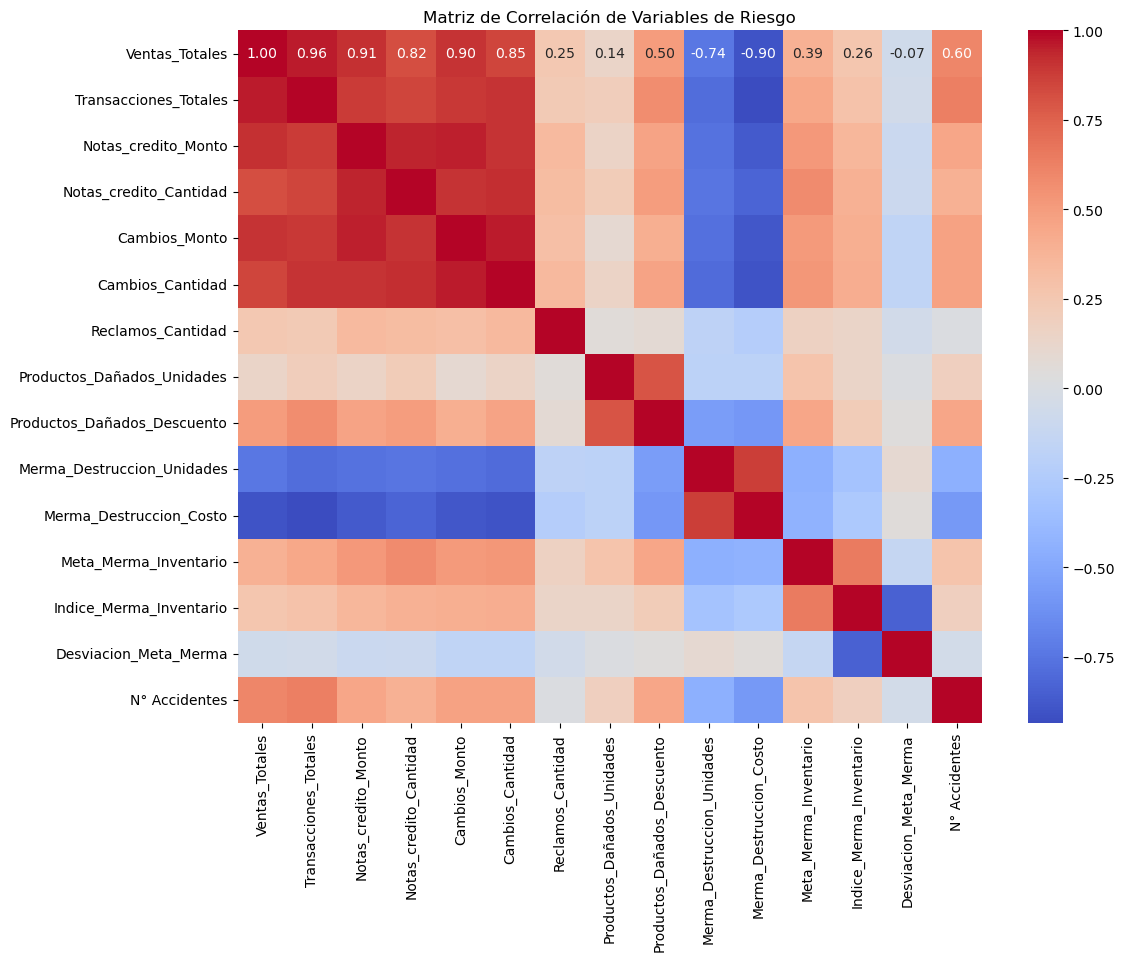

In [40]:


df_Kmeans = pd.read_excel("df_kmeans_unificado_2024.xlsx")

variables_numericas = df_Kmeans.drop(columns=['Nombre_Sucursal']) # O como se llame la columna de nombres

plt.figure(figsize=(12, 9))
matriz_correlacion = variables_numericas.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables de Riesgo')
plt.show()

#### Iniciamos con el proceso de la formulacion de Propuestas para K means

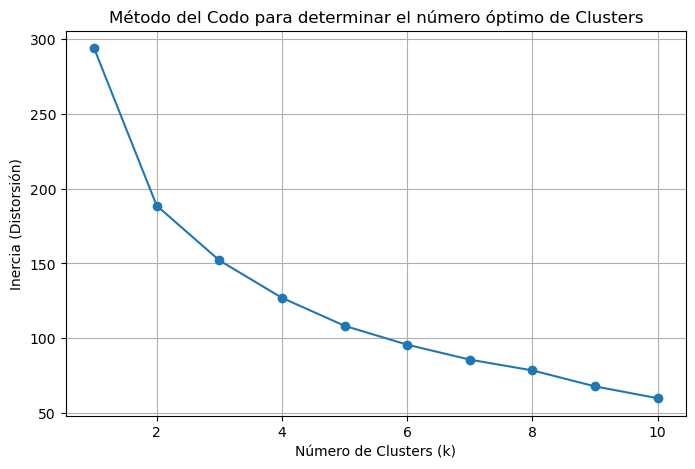

In [41]:


# Seleccionamos las variables con menor multicolinealidad (según Matriz de Correlacion) 
variables_seleccionadas = [
    'Ventas_Totales',
    'Notas_credito_Monto',
    'Reclamos_Cantidad',
    'Productos_Dañados_Descuento',
    'Merma_Destruccion_Costo',
    'Desviacion_Meta_Merma',
    'N° Accidentes'
]

X = df_Kmeans[variables_seleccionadas].copy()

#  Escalamos las variables para que tengan media 0 y desviación estándar 1 para una mejor convergencia del algoritmo KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utilizamos el metodo del codo para determinar el número óptimo de clusters
inertias = []
k_range = range(1, 11)  # Probar entre 1 y 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state= 1000, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Método del Codo para determinar el número óptimo de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (Distorsión)")
plt.grid(True)
plt.show()


Volvemos a cargar la base de datos para verificar que el DataFrame este ordenado de forma correcta para su debido trabajo

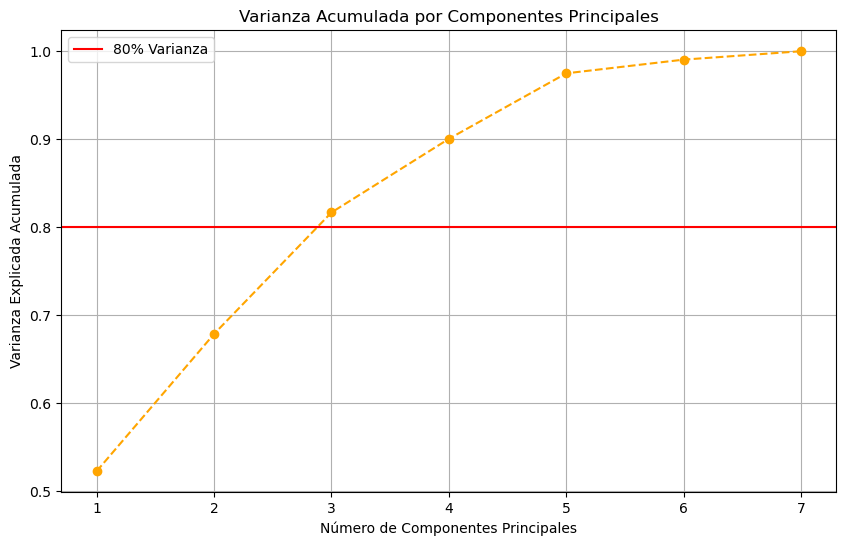

Interpretación de los Componentes (Loadings)


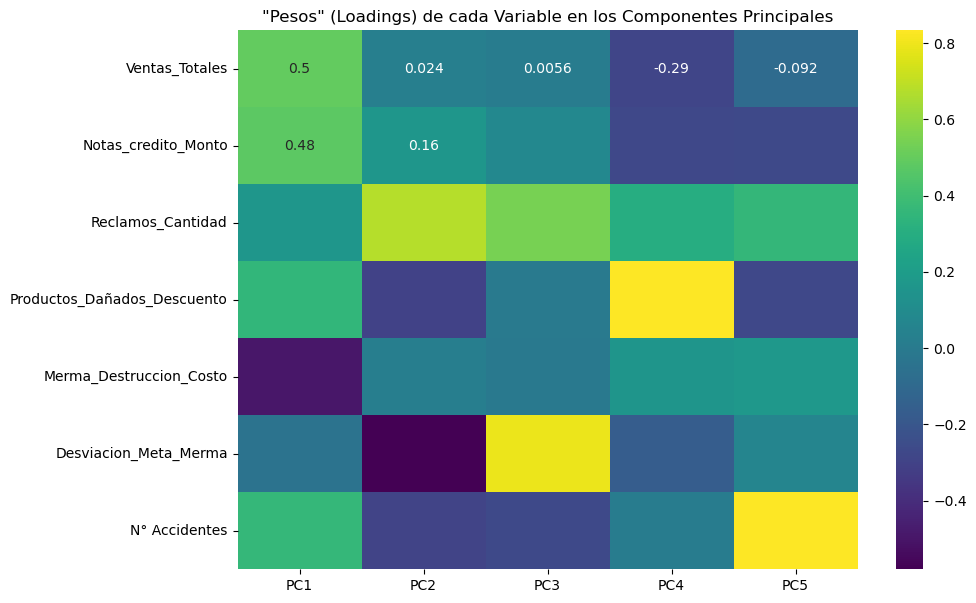


Análisis de los Loadings:
La tabla anterior muestra qué variables originales son más importantes para cada Componente Principal (PC).
Un valor alto (positivo o negativo) indica una fuerte influencia.
Ej: Si 'Ventas_Totales' tiene un valor alto en PC1, entonces PC1 representa 'Volumen de la tienda'.
Si 'Merma_Indice' tiene un valor alto en PC2, entonces PC2 representa 'Riesgo Operacional'.

Visualización del Mapa de Riesgo de Sucursales


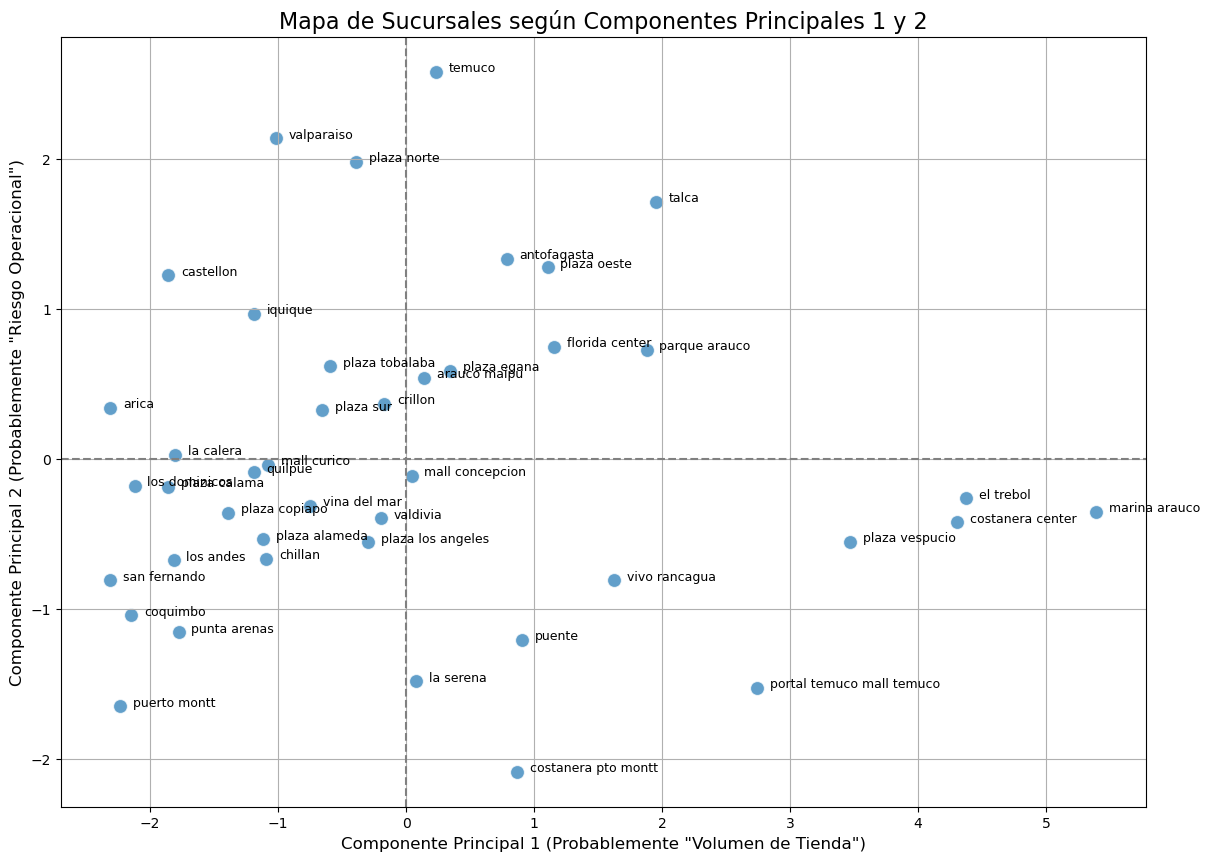


Análisis del Gráfico:
Este mapa te permite identificar visualmente grupos de tiendas y outliers.
- Tiendas en el mismo cuadrante se comportan de manera similar.
- Tiendas muy alejadas del centro (0,0) son casos atípicos y de alto interés para auditoría.


In [42]:
df_kmeans = pd.read_excel("df_kmeans_unificado_2024.xlsx") 

# Seleccionar las variables para el modelo
variables_seleccionadas = [
    'Ventas_Totales',
    'Notas_credito_Monto',
    'Reclamos_Cantidad',
    'Productos_Dañados_Descuento',
    'Merma_Destruccion_Costo',
    'Desviacion_Meta_Merma',
    'N° Accidentes'
]
df_modelo = df_kmeans[variables_seleccionadas]

# Guardar nombres de sucursales para después
nombres_sucursales = df_kmeans['Nombre_Sucursal']

# Escalar los datos (paso fundamental antes de PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_modelo)


# --- TU CÓDIGO ORIGINAL (Funcionalmente correcto) ---
# 1. PCA para determinar el número de componentes
pca_temp = PCA()
pca_temp.fit(X_scaled)
varianza_acumulada = pca_temp.explained_variance_ratio_.cumsum()

# 2. Gráfico de varianza explicada (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='orange')
plt.title('Varianza Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.xticks(range(1, len(varianza_acumulada) + 1))
# Añadimos una línea para ver el umbral común del 80% o 90%
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Varianza')
plt.legend()
plt.show()

# --- AÑADIDO 1: INTERPRETACIÓN DE LOS COMPONENTES (Loadings) ---
# Esta es la parte más importante que faltaba.
# Nos dice qué significa cada Componente Principal.

print("="*50)
print("Interpretación de los Componentes (Loadings)")
print("="*50)

# 3. PCA final con el número de componentes decidido (ej. 5)
n_componentes = 5
pca = PCA(n_components=n_componentes)
df_PCA = pca.fit_transform(X_scaled)

# Crear DataFrame con los "pesos" (loadings) de cada variable en cada componente
df_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_componentes)],
    index=variables_seleccionadas
)
# Usamos un mapa de calor para visualizar los pesos fácilmente
plt.figure(figsize=(10, 7))
sns.heatmap(df_loadings, annot=True, cmap='viridis')
plt.title('"Pesos" (Loadings) de cada Variable en los Componentes Principales')
plt.show()

print("\nAnálisis de los Loadings:")
print("La tabla anterior muestra qué variables originales son más importantes para cada Componente Principal (PC).")
print("Un valor alto (positivo o negativo) indica una fuerte influencia.")
print("Ej: Si 'Ventas_Totales' tiene un valor alto en PC1, entonces PC1 representa 'Volumen de la tienda'.")
print("Si 'Merma_Indice' tiene un valor alto en PC2, entonces PC2 representa 'Riesgo Operacional'.\n")


# --- AÑADIDO 2: VISUALIZACIÓN DE LAS SUCURSALES (Scatter Plot) ---
# Esto crea el "mapa de riesgo" de tus sucursales.

print("="*50)
print("Visualización del Mapa de Riesgo de Sucursales")
print("="*50)

# 4. Crear DataFrame final con los resultados del PCA y los nombres
df_PCA = pd.DataFrame(df_PCA, columns=[f'PC{i+1}' for i in range(n_componentes)])
df_PCA['Nombre_Sucursal'] = nombres_sucursales.values

# 5. Graficar las sucursales usando los dos componentes más importantes (PC1 vs PC2)
plt.figure(figsize=(14, 10))
sns.scatterplot(x='PC1', y='PC2', data=df_PCA, s=100, alpha=0.7)

# Añadir etiquetas a cada punto para identificar las sucursales
for i, row in df_PCA.iterrows():
    plt.text(row['PC1'] + 0.1, row['PC2'], row['Nombre_Sucursal'], fontsize=9)

plt.title('Mapa de Sucursales según Componentes Principales 1 y 2', fontsize=16)
plt.xlabel('Componente Principal 1 (Probablemente "Volumen de Tienda")', fontsize=12)
plt.ylabel('Componente Principal 2 (Probablemente "Riesgo Operacional")', fontsize=12)
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

print("\nAnálisis del Gráfico:")
print("Este mapa te permite identificar visualmente grupos de tiendas y outliers.")
print("- Tiendas en el mismo cuadrante se comportan de manera similar.")
print("- Tiendas muy alejadas del centro (0,0) son casos atípicos y de alto interés para auditoría.")

Comenzamos con los Clusters


Número de Componentes Principales a usar: 4

Se han creado 3 clústeres. Distribución de sucursales por clúster:
0    25
1    12
2     5
Name: Cluster, dtype: int64


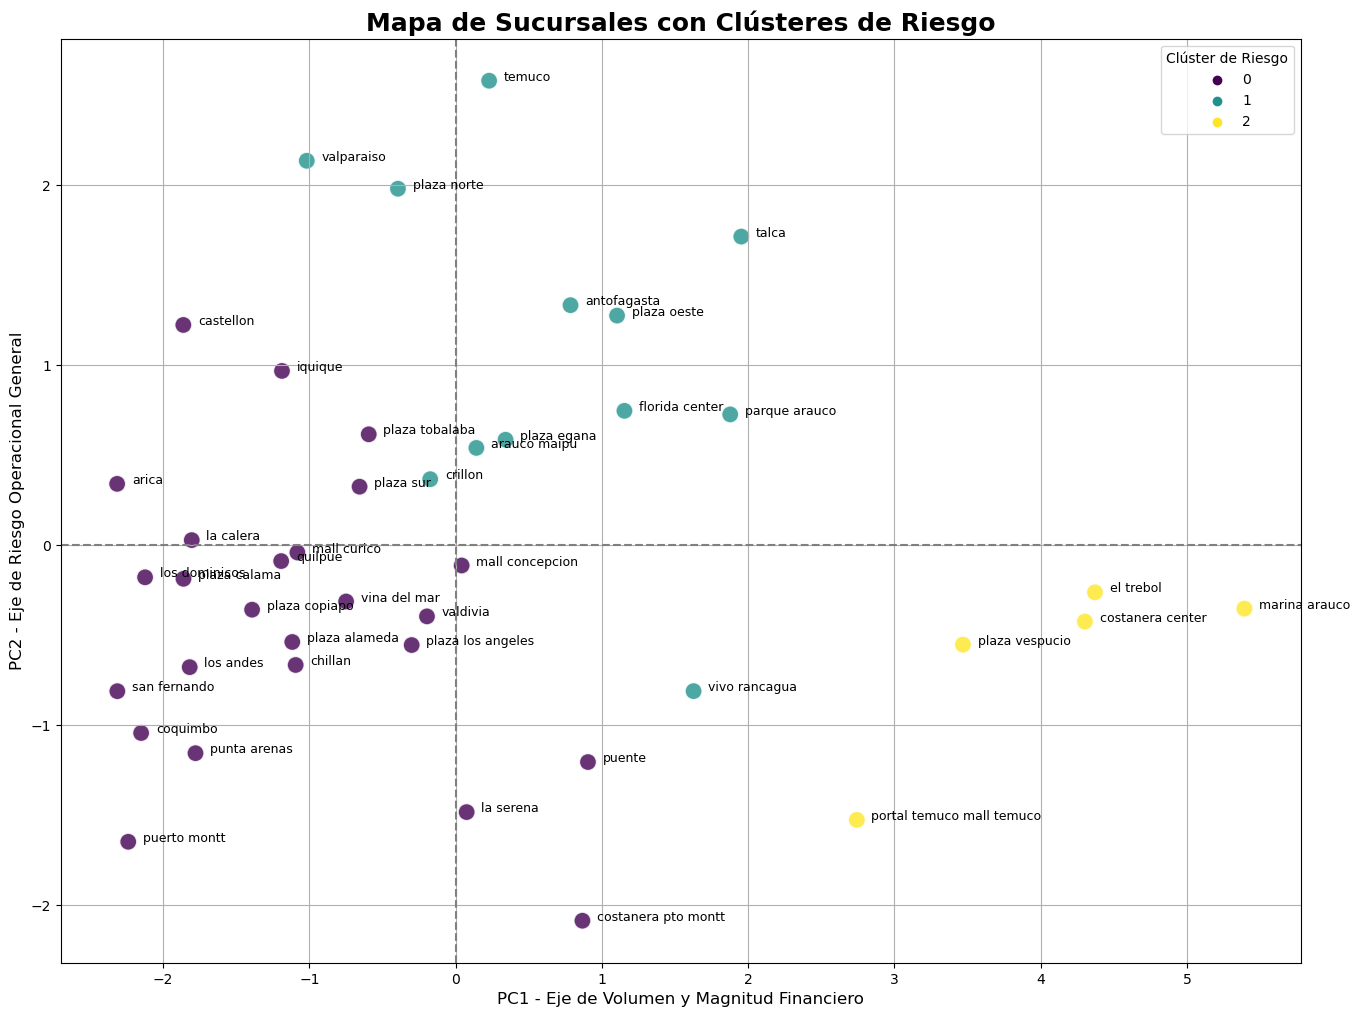


Perfilamiento de Clústeres de Riesgo

--- Clúster 0 ---
Número de Sucursales: 25
Ventas Totales Promedio: 14,622,950,891
Notas de Crédito Promedio: 401,200,267
Reclamos Promedio: 8.92
Productos Dañados Descuento Promedio: 46,259,076.28
Merma Destrucción Costo Promedio: -45,576,362.85
Desviación Meta Merma Promedio: 0.17%
N° Accidentes Promedio: 26.64

--- Clúster 1 ---
Número de Sucursales: 12
Ventas Totales Promedio: 22,825,576,321
Notas de Crédito Promedio: 806,234,885
Reclamos Promedio: 37.67
Productos Dañados Descuento Promedio: 56,986,191.42
Merma Destrucción Costo Promedio: -69,288,557.62
Desviación Meta Merma Promedio: 0.07%
N° Accidentes Promedio: 28.42

--- Clúster 2 ---
Número de Sucursales: 5
Ventas Totales Promedio: 39,868,229,723
Notas de Crédito Promedio: 1,242,723,012
Reclamos Promedio: 18.80
Productos Dañados Descuento Promedio: 127,378,166.20
Merma Destrucción Costo Promedio: -130,797,916.24
Desviación Meta Merma Promedio: 0.12%
N° Accidentes Promedio: 54.80

--- Tabl

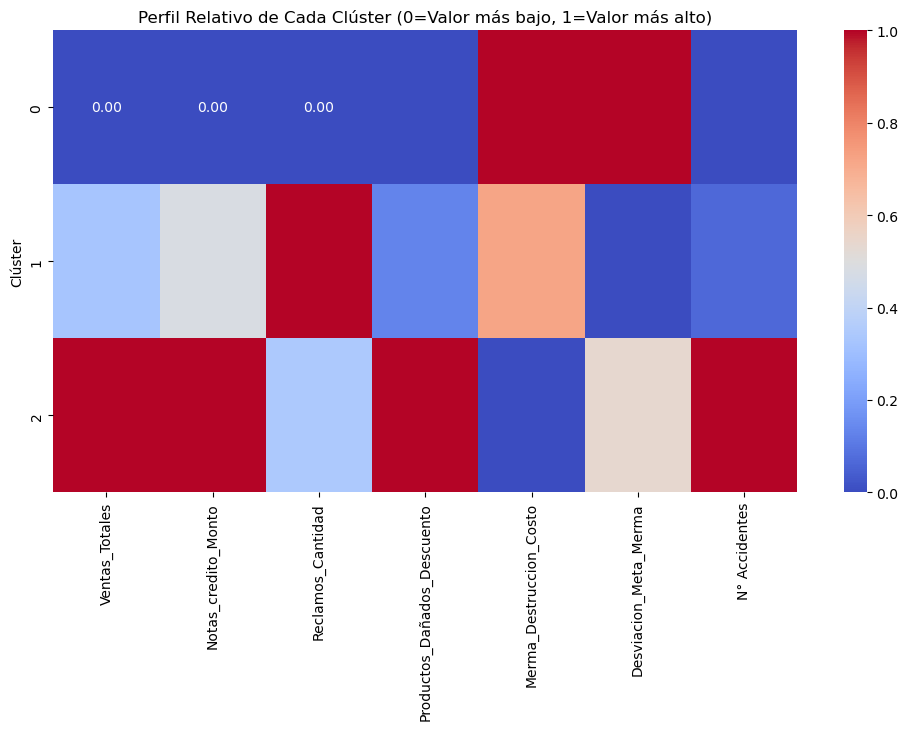


### ¿Cómo interpretar el Mapa de Calor? ###
Esta tabla es la clave para nombrar tus clústeres.
Busca las filas (clústeres) y mira las columnas (variables de riesgo).
- Un valor cercano a 1.0 (rojo) significa que ese clúster tiene el valor MÁS ALTO en esa variable de riesgo.
- Un valor cercano a 0.0 (azul) significa que ese clúster tiene el valor MÁS BAJO en esa variable.

Basado en esto, puedes asignar los nombres 'Riesgo Alto', 'Riesgo Medio' y 'Riesgo Bajo'.


In [43]:
if "Nombre_Sucursal" not in df_PCA.columns:
    df_PCA['Nombre_Sucursal'] = nombres_sucursales.values

## Dado que en el grafico de Varianza Acumulada nos muestra que con el 90% de las variables se explica utilizaremos 4 componentes principales
n_componentes_a_usar = 4
datos_para_kmeans = df_PCA[[f'PC{i+1}' for i in range(n_componentes_a_usar)]]
print(f"\nNúmero de Componentes Principales a usar: {n_componentes_a_usar}")

## Empezamos con el trabajo de K Means 
k_optimo = 3  ## Esto basado en el resultado del metodo del codo
kmeans = KMeans(n_clusters=k_optimo, random_state=100000, n_init=1000)
clusters_asiganados = kmeans.fit_predict(datos_para_kmeans) # -> Utilizamos FIt para el Entrenamiento y obtener las etiquetas de los clusters
# Añadimos los clusters al DataFrame 
df_PCA['Cluster'] = clusters_asiganados
df_kmeans['Cluster'] = clusters_asiganados
print(f"\nSe han creado {k_optimo} clústeres. Distribución de sucursales por clúster:")
print(df_kmeans['Cluster'].value_counts())
# Visualización de los clusters
plt.figure(figsize=(16, 12))
sns.scatterplot(x='PC1', y='PC2', data=df_PCA, hue='Cluster', palette='viridis', s=150, alpha=0.8, legend='full')

for i, row in df_PCA.iterrows():
    plt.text(row['PC1'] + 0.1, row['PC2'], row['Nombre_Sucursal'], fontsize=9)

plt.title('Mapa de Sucursales con Clústeres de Riesgo', fontsize=18, weight='bold')
plt.xlabel('PC1 - Eje de Volumen y Magnitud Financiero', fontsize=12)
plt.ylabel('PC2 - Eje de Riesgo Operacional General', fontsize=12)
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.legend(title="Clúster de Riesgo")
plt.show()

## Ahora procedemos con el perfilamiento de los clusters
print("\n" + "="*60)
print("Perfilamiento de Clústeres de Riesgo")
print("="*60)
for cluster in range(k_optimo):
    print(f"\n--- Clúster {cluster} ---")
    cluster_data = df_kmeans[df_kmeans['Cluster'] == cluster]
    print(f"Número de Sucursales: {len(cluster_data)}")
    print(f"Ventas Totales Promedio: {cluster_data['Ventas_Totales'].mean():,.0f}")
    print(f"Notas de Crédito Promedio: {cluster_data['Notas_credito_Monto'].mean():,.0f}")
    print(f"Reclamos Promedio: {cluster_data['Reclamos_Cantidad'].mean():.2f}")
    print(f"Productos Dañados Descuento Promedio: {cluster_data['Productos_Dañados_Descuento'].mean():,.2f}")
    print(f"Merma Destrucción Costo Promedio: {cluster_data['Merma_Destruccion_Costo'].mean():,.2f}")
    print(f"Desviación Meta Merma Promedio: {cluster_data['Desviacion_Meta_Merma'].mean():.2%}")
    print(f"N° Accidentes Promedio: {cluster_data['N° Accidentes'].mean():.2f}")

perfiles_clusters = df_kmeans.groupby('Cluster')[variables_seleccionadas].mean()
print("\n--- Tabla de Perfiles de Clústeres ---")
print(perfiles_clusters.round(2))

## Para facilitar la interpretación, escalamos los resultados de los perfiles de clústeres
scaler_perfil = MinMaxScaler()
perfil_clusters_scaled = pd.DataFrame(scaler_perfil.fit_transform(perfiles_clusters), 
                                        columns=perfiles_clusters.columns, 
                                        index=perfiles_clusters.index)

print("\n--- Mapa de Calor de Perfiles (0=Bajo, 1=Alto) ---")
plt.figure(figsize=(12, 6))
sns.heatmap(perfil_clusters_scaled, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Perfil Relativo de Cada Clúster (0=Valor más bajo, 1=Valor más alto)')
plt.ylabel('Clúster')
plt.show()

print("\n### ¿Cómo interpretar el Mapa de Calor? ###")
print("Esta tabla es la clave para nombrar tus clústeres.")
print("Busca las filas (clústeres) y mira las columnas (variables de riesgo).")
print("- Un valor cercano a 1.0 (rojo) significa que ese clúster tiene el valor MÁS ALTO en esa variable de riesgo.")
print("- Un valor cercano a 0.0 (azul) significa que ese clúster tiene el valor MÁS BAJO en esa variable.")
print("\nBasado en esto, puedes asignar los nombres 'Riesgo Alto', 'Riesgo Medio' y 'Riesgo Bajo'.")




In [44]:
# --- PASO 5: CREACIÓN DEL ENTREGABLE FINAL ---

# Mapear los números de clúster a los nombres de riesgo que definimos
mapa_riesgo = {
    1: 'Riesgo Alto',
    0: 'Riesgo Medio',
    2: 'Riesgo Bajo'
}

# Crear la columna final con los nombres
df_kmeans['Nivel_de_Riesgo'] = df_kmeans['Cluster'].map(mapa_riesgo)

# Seleccionar y ordenar las columnas para el reporte final
columnas_finales = [
    'Nombre_Sucursal',
    'Nivel_de_Riesgo',
    'Cluster'
] + variables_seleccionadas # Añadir las variables de riesgo originales

reporte_final = df_kmeans[columnas_finales]

# Guardar el resultado en un archivo de Excel
nombre_archivo_final = 'Reporte_Final_Clusters_de_Riesgo.xlsx'
reporte_final.to_excel(nombre_archivo_final, index=False)

print(f"\n✅ ¡Entregable final generado con éxito!")
print(f"Se ha guardado el archivo '{nombre_archivo_final}' con la clasificación de riesgo para cada sucursal.")

# Mostrar una vista previa del reporte final
print("\n--- Vista Previa del Reporte Final ---")
print(reporte_final.head().to_string())


✅ ¡Entregable final generado con éxito!
Se ha guardado el archivo 'Reporte_Final_Clusters_de_Riesgo.xlsx' con la clasificación de riesgo para cada sucursal.

--- Vista Previa del Reporte Final ---
             Nombre_Sucursal Nivel_de_Riesgo  Cluster  Ventas_Totales  Notas_credito_Monto  Reclamos_Cantidad  Productos_Dañados_Descuento  Merma_Destruccion_Costo  Desviacion_Meta_Merma  N° Accidentes
0                    chillan    Riesgo Medio        0     17548478930            646643543                  4                     25963440            -6.068431e+07                 0.0043             10
1                    crillon     Riesgo Alto        1     13183000192            627231699                 29                     84859829            -4.941517e+07                 0.0008             32
2            mall concepcion    Riesgo Medio        0     21705948095            641811956                  5                     33412392            -8.605101e+07                 0.0008          

### Generamos una Propuesta 2 donde integraremos un modelo k means sin el uso 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler


INICIANDO PROPUESTA 2: MODELO K-MEANS SIN ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
Usando las 7 variables de riesgo originales (escaladas) para el clustering.

Se han creado 3 clústeres (sin PCA). Distribución de sucursales por clúster:
0    25
1    12
2     5
Name: Cluster_sin_PCA, dtype: int64

PERFILAMIENTO DE CLÚSTERES (SIN PCA)

--- Tabla de Perfiles (Valores Promedio por Clúster - Sin PCA) ---
                 Ventas_Totales  Notas_credito_Monto  Reclamos_Cantidad  \
Cluster_sin_PCA                                                           
0                  1.462295e+10         4.012003e+08               8.92   
1                  2.282558e+10         8.062349e+08              37.67   
2                  3.986823e+10         1.242723e+09              18.80   

                 Productos_Dañados_Descuento  Merma_Destruccion_Costo  \
Cluster_sin_PCA                                                         
0                               4.625908e+07            -4.557636e+07   


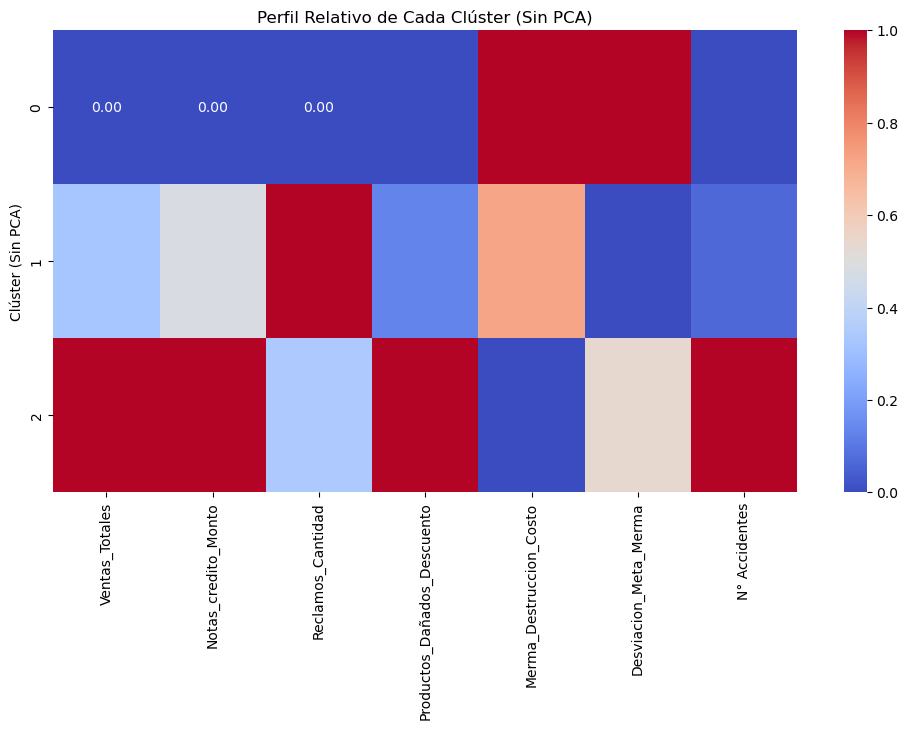


### Análisis Comparativo ###
Ahora tienes dos resultados de clustering:
1. El clustering original basado en los Componentes Principales (columna 'Cluster').
2. Este nuevo clustering basado en las variables directas (columna 'Cluster_sin_PCA').

Compara los mapas de calor de ambos modelos. ¿Cuál de los dos crea perfiles más distintos y fáciles de interpretar para el negocio?
Esta comparación será una parte muy valiosa de la discusión de tu tesis.


In [46]:

print("\n" + "="*80)
print("INICIANDO PROPUESTA 2: MODELO K-MEANS SIN ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")
print("="*80)
print("Usando las 7 variables de riesgo originales (escaladas) para el clustering.")


# Inicializar y entrenar el modelo K-Means sobre los datos escalados originales
kmeans_sin_pca = KMeans(n_clusters=k_optimo, random_state=100, n_init=10)
clusters_asignados_sin_pca = kmeans_sin_pca.fit_predict(X_scaled) 

df_kmeans['Cluster_sin_PCA'] = clusters_asignados_sin_pca
print(f"\nSe han creado {k_optimo} clústeres (sin PCA). Distribución de sucursales por clúster:")
print(df_kmeans['Cluster_sin_PCA'].value_counts())
print("\n" + "="*60)
print("PERFILAMIENTO DE CLÚSTERES (SIN PCA)")
print("="*60)

# Agrupar por la nueva columna de clúster y calcular la media
perfil_clusters_sin_pca = df_kmeans.groupby('Cluster_sin_PCA')[variables_seleccionadas].mean()

print("\n--- Tabla de Perfiles (Valores Promedio por Clúster - Sin PCA) ---")
print(perfil_clusters_sin_pca.round(2))

# Escalar los resultados para la visualización del mapa de calor
scaler_perfil_sin_pca = MinMaxScaler()
perfil_clusters_scaled_sin_pca = pd.DataFrame(
    scaler_perfil_sin_pca.fit_transform(perfil_clusters_sin_pca),
    columns=perfil_clusters_sin_pca.columns,
    index=perfil_clusters_sin_pca.index
)

print("\n--- Mapa de Calor de Perfiles (0=Bajo, 1=Alto) - Sin PCA ---")
plt.figure(figsize=(12, 6))
sns.heatmap(perfil_clusters_scaled_sin_pca, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Perfil Relativo de Cada Clúster (Sin PCA)')
plt.ylabel('Clúster (Sin PCA)')
plt.show()

print("\n### Análisis Comparativo ###")
print("Ahora tienes dos resultados de clustering:")
print("1. El clustering original basado en los Componentes Principales (columna 'Cluster').")
print("2. Este nuevo clustering basado en las variables directas (columna 'Cluster_sin_PCA').")
print("\nCompara los mapas de calor de ambos modelos. ¿Cuál de los dos crea perfiles más distintos y fáciles de interpretar para el negocio?")
print("Esta comparación será una parte muy valiosa de la discusión de tu tesis.")


### Ahora haremos la propuesat 3 Clustering K-Means Ponderado por Juicio Experto


INICIANDO PROPUESTA 3: MODELO K-MEANS PONDERADO POR JUICIO EXPERTO
Pesos a aplicar a cada variable:
- Ventas_Totales: 10%
- Notas_credito_Monto: 5%
- Desviacion_Meta_Merma: 25%
- Productos_Dañados_Descuento: 15%
- Merma_Destruccion_Costo: 20%
- N° Accidentes: 15%
- Reclamos_Cantidad: 10%

Se han aplicado los pesos a los datos escalados.

Se han creado 3 clústeres (con Pesos). Distribución de sucursales:
1    17
0    16
2     9
Name: Cluster_con_Pesos, dtype: int64

PERFILAMIENTO DE CLÚSTERES (CON PESOS DE EXPERTO)

--- Tabla de Perfiles (Valores Promedio por Clúster - Con Pesos) ---
                   Ventas_Totales  Notas_credito_Monto  Reclamos_Cantidad  \
Cluster_con_Pesos                                                           
0                    1.805226e+10         5.585004e+08              22.38   
1                    1.531205e+10         4.721376e+08              12.76   
2                    3.218676e+10         9.951216e+08              21.56   

                   Prod

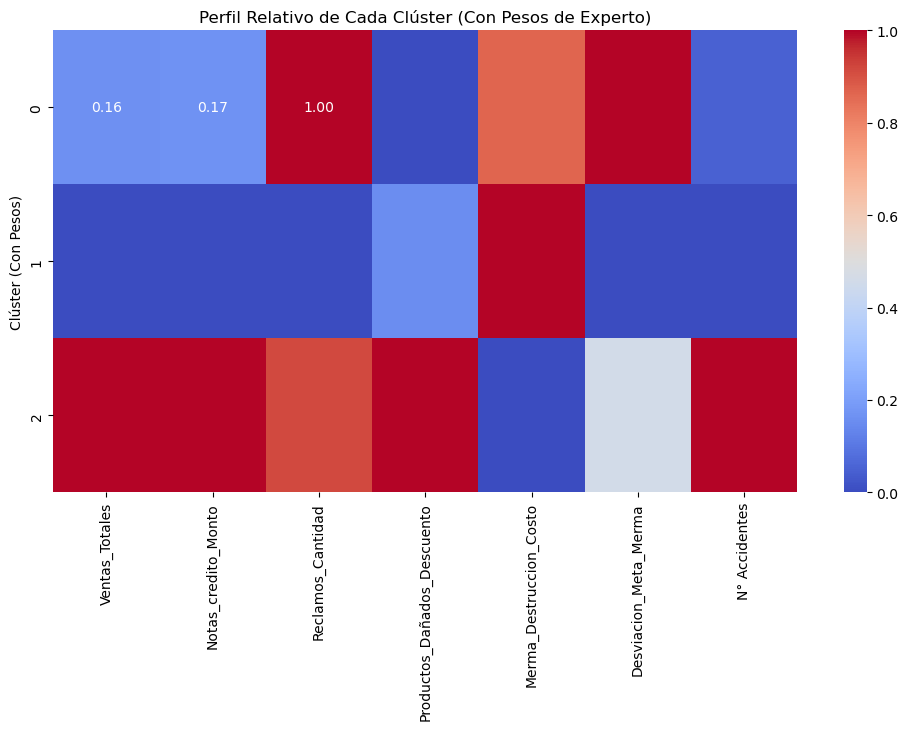


### Análisis Comparativo Final ###
Ahora tienes TRES resultados de clustering en tu DataFrame:
1. 'Cluster': Basado en PCA.
2. 'Cluster_sin_PCA': Basado en variables directas.
3. 'Cluster_con_Pesos': Basado en el juicio experto de Auditoría.

Puedes presentar las tres propuestas, explicando las ventajas de cada una.
Es muy probable que este último modelo sea el más alineado con las necesidades estratégicas del negocio.


In [47]:
# --- PROPUESTA 3: MODELO K-MEANS PONDERADO POR JUICIO EXPERTO ---
# El objetivo es incorporar los pesos definidos por la Gerencia de Auditoría.

print("\n" + "="*80)
print("INICIANDO PROPUESTA 3: MODELO K-MEANS PONDERADO POR JUICIO EXPERTO")
print("="*80)


pesos_experto = {
    'Ventas_Totales': 0.10,
    'Notas_credito_Monto': 0.05,
    'Desviacion_Meta_Merma': 0.25, 
    'Productos_Dañados_Descuento': 0.15, 
    'Merma_Destruccion_Costo': 0.20, 
    'N° Accidentes': 0.15,
    'Reclamos_Cantidad': 0.10
}

try:
    pesos_array = np.array([pesos_experto[var] for var in variables_seleccionadas])
    print("Pesos a aplicar a cada variable:")
    for var, peso in pesos_experto.items():
        print(f"- {var}: {peso:.0%}")

    X_weighted = X_scaled * pesos_array
    print("\nSe han aplicado los pesos a los datos escalados.")


    kmeans_con_pesos = KMeans(n_clusters=k_optimo, random_state=100, n_init=10)
    clusters_asignados_con_pesos = kmeans_con_pesos.fit_predict(X_weighted)

    # --- PASO 4: ASIGNAR ETIQUETAS Y ANALIZAR ---
    df_kmeans['Cluster_con_Pesos'] = clusters_asignados_con_pesos

    print(f"\nSe han creado {k_optimo} clústeres (con Pesos). Distribución de sucursales:")
    print(df_kmeans['Cluster_con_Pesos'].value_counts())

    # --- PASO 5: PERFILAMIENTO DE LOS NUEVOS CLÚSTERES PONDERADOS ---
    print("\n" + "="*60)
    print("PERFILAMIENTO DE CLÚSTERES (CON PESOS DE EXPERTO)")
    print("="*60)

    perfil_clusters_con_pesos = df_kmeans.groupby('Cluster_con_Pesos')[variables_seleccionadas].mean()

    print("\n--- Tabla de Perfiles (Valores Promedio por Clúster - Con Pesos) ---")
    print(perfil_clusters_con_pesos.round(2))

    # Escalar los resultados para la visualización del mapa de calor
    scaler_perfil_con_pesos = MinMaxScaler()
    perfil_clusters_scaled_con_pesos = pd.DataFrame(
        scaler_perfil_con_pesos.fit_transform(perfil_clusters_con_pesos),
        columns=perfil_clusters_con_pesos.columns,
        index=perfil_clusters_con_pesos.index
    )

    print("\n--- Mapa de Calor de Perfiles (0=Bajo, 1=Alto) - Con Pesos de Experto ---")
    plt.figure(figsize=(12, 6))
    sns.heatmap(perfil_clusters_scaled_con_pesos, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Perfil Relativo de Cada Clúster (Con Pesos de Experto)')
    plt.ylabel('Clúster (Con Pesos)')
    plt.show()

    print("\n### Análisis Comparativo Final ###")
    print("Ahora tienes TRES resultados de clustering en tu DataFrame:")
    print("1. 'Cluster': Basado en PCA.")
    print("2. 'Cluster_sin_PCA': Basado en variables directas.")
    print("3. 'Cluster_con_Pesos': Basado en el juicio experto de Auditoría.")
    print("\nPuedes presentar las tres propuestas, explicando las ventajas de cada una.")
    print("Es muy probable que este último modelo sea el más alineado con las necesidades estratégicas del negocio.")

except KeyError as e:
    print(f"\nERROR: La variable '{e.args[0]}' de la lista de pesos no se encontró en 'variables_seleccionadas'.")
    print("Por favor, asegúrate de que los nombres coincidan exactamente.")


In [48]:
##Consolidacion y comparativa de los resultados de los tres modelos
print("\n" + "="*80)
print("COMPARATIVA DE CLASIFICACIÓN DE SUCURSALES POR MODELO")
print("="*80)

# Mapear los números de clúster a nombres de riesgo para cada propuesta
# Es posible que necesites ajustar los números (0, 1, 2) a los nombres correctos
# basándote en los mapas de calor de cada modelo.

# Ejemplo de mapeo (¡AJUSTAR SEGÚN TUS ANÁLISIS PREVIOS!)
mapa_riesgo_pca = {1: 'Riesgo Alto', 0: 'Riesgo Medio', 2: 'Riesgo Bajo'}
mapa_riesgo_sin_pca = {2: 'Riesgo Alto', 1: 'Riesgo Medio', 0: 'Riesgo Bajo'}
mapa_riesgo_con_pesos = {2: 'Riesgo Alto', 1: 'Riesgo Medio', 0: 'Riesgo Bajo'}

df_kmeans['Riesgo_con_PCA'] = df_kmeans['Cluster'].map(mapa_riesgo_pca)
df_kmeans['Riesgo_sin_PCA'] = df_kmeans['Cluster_sin_PCA'].map(mapa_riesgo_sin_pca)
df_kmeans['Riesgo_con_Pesos'] = df_kmeans['Cluster_con_Pesos'].map(mapa_riesgo_con_pesos)

# Crear la tabla comparativa final
tabla_comparativa = df_kmeans[[
    'Nombre_Sucursal',
    'Riesgo_con_PCA',
    'Riesgo_sin_PCA',
    'Riesgo_con_Pesos'
]]

print("\n--- Tabla Comparativa de Clasificación de Riesgo por Sucursal ---")
print(tabla_comparativa.to_string())

# (Opcional) Ver cuántas sucursales cambian de categoría entre el modelo sin PCA y el ponderado
cambios = (tabla_comparativa['Riesgo_sin_PCA'] != tabla_comparativa['Riesgo_con_Pesos']).sum()
print(f"\nNúmero de sucursales que cambiaron de categoría entre el Modelo 2 y 3: {cambios}")

# --- PASO 3: GENERACIÓN DEL ENTREGABLE FINAL PARA AUDITORÍA ---

print("\n" + "="*80)
print("GENERANDO REPORTE FINAL PARA EL EQUIPO DE AUDITORÍA")
print("="*80)

# Seleccionar y ordenar las columnas para el reporte final, usando el modelo ponderado
columnas_reporte = [
    'Nombre_Sucursal',
    'Riesgo_con_Pesos' # Esta es la clasificación recomendada
] + variables_seleccionadas

reporte_final_auditoria = df_kmeans[columnas_reporte].rename(columns={'Riesgo_con_Pesos': 'Nivel_de_Riesgo_Recomendado'})

# Ordenar el reporte por nivel de riesgo para que sea más fácil de leer
reporte_final_auditoria['Nivel_de_Riesgo_Recomendado'] = pd.Categorical(reporte_final_auditoria['Nivel_de_Riesgo_Recomendado'], categories=['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo'], ordered=True)
reporte_final_auditoria = reporte_final_auditoria.sort_values('Nivel_de_Riesgo_Recomendado')

# Guardar el resultado en un archivo de Excel
nombre_archivo_reporte = 'Reporte_Final_Clasificacion_Riesgo_Auditoria.xlsx'
reporte_final_auditoria.to_excel(nombre_archivo_reporte, index=False)

print(f"✅ ¡Entregable final generado con éxito!")
print(f"Se ha guardado el archivo '{nombre_archivo_reporte}' con la clasificación de riesgo recomendada para cada sucursal.")

print("\n--- Vista Previa del Reporte Final ---")
print(reporte_final_auditoria.head().to_string())


COMPARATIVA DE CLASIFICACIÓN DE SUCURSALES POR MODELO

--- Tabla Comparativa de Clasificación de Riesgo por Sucursal ---
              Nombre_Sucursal Riesgo_con_PCA Riesgo_sin_PCA Riesgo_con_Pesos
0                     chillan   Riesgo Medio    Riesgo Bajo      Riesgo Bajo
1                     crillon    Riesgo Alto   Riesgo Medio     Riesgo Medio
2             mall concepcion   Riesgo Medio    Riesgo Bajo     Riesgo Medio
3   portal temuco mall temuco    Riesgo Bajo    Riesgo Alto      Riesgo Alto
4                     quilpue   Riesgo Medio    Riesgo Bajo     Riesgo Medio
5                  valparaiso    Riesgo Alto   Riesgo Medio      Riesgo Bajo
6                 antofagasta    Riesgo Alto   Riesgo Medio     Riesgo Medio
7                arauco maipu    Riesgo Alto   Riesgo Medio      Riesgo Bajo
8                       arica   Riesgo Medio    Riesgo Bajo     Riesgo Medio
9                   castellon   Riesgo Medio    Riesgo Bajo     Riesgo Medio
10                   coquimbo  

In [49]:
print("\n" + "="*80)
print("COMPARATIVA DE CLASIFICACIÓN DE SUCURSALES POR MODELO")
print("="*80)

# Este código asume que el DataFrame 'df_kmeans' ya contiene las columnas:
# - 'Cluster': Resultado del Modelo 1 (con PCA)
# - 'Cluster_sin_PCA': Resultado del Modelo 2 (sin PCA)
# - 'Cluster_con_Pesos': Resultado del Modelo 3 (Ponderado)

# --- Mapeo de Clústeres a Nombres de Riesgo ---
# ¡IMPORTANTE! Debes ajustar los números (0, 1, 2) a los nombres correctos
# basándote en los mapas de calor que generaste para CADA modelo.
# A continuación, un ejemplo basado en nuestros análisis previos:

# Mapeo para el Modelo 1 (con PCA)
mapa_riesgo_pca = {
    1: 'Riesgo Alto',    # El clúster de los "Gigantes"
    0: 'Riesgo Medio',   # El clúster con problemas operativos mixtos
    2: 'Riesgo Bajo'     # El clúster grande y estable
}

# Mapeo para el Modelo 2 (sin PCA)
mapa_riesgo_sin_pca = {
    2: 'Riesgo Alto',    # El clúster de los "Gigantes"
    1: 'Riesgo Medio',   # El clúster con alto n° de reclamos
    0: 'Riesgo Bajo'     # El clúster grande y estable
}

# Mapeo para el Modelo 3 (Ponderado)
mapa_riesgo_con_pesos = {
    2: 'Riesgo Alto',    # El clúster de los "Gigantes"
    1: 'Riesgo Medio',   # El clúster con alto n° de reclamos
    0: 'Riesgo Bajo'     # El clúster grande y estable
}

# Aplicar los mapeos para crear columnas de texto legibles
df_kmeans['Riesgo_con_PCA'] = df_kmeans['Cluster'].map(mapa_riesgo_pca)
df_kmeans['Riesgo_sin_PCA'] = df_kmeans['Cluster_sin_PCA'].map(mapa_riesgo_sin_pca)
df_kmeans['Riesgo_con_Pesos'] = df_kmeans['Cluster_con_Pesos'].map(mapa_riesgo_con_pesos)

# Crear la tabla comparativa final
tabla_comparativa = df_kmeans[[
    'Nombre_Sucursal',
    'Riesgo_con_PCA',
    'Riesgo_sin_PCA',
    'Riesgo_con_Pesos'
]]

print("\n--- Tabla Comparativa de Clasificación de Riesgo por Sucursal ---")
print(tabla_comparativa.to_string())

# (Opcional) Ver cuántas sucursales cambian de categoría entre el modelo sin PCA y el ponderado
cambios = (tabla_comparativa['Riesgo_sin_PCA'] != tabla_comparativa['Riesgo_con_Pesos']).sum()
print(f"\nNúmero de sucursales que cambiaron de categoría entre el Modelo 2 y 3: {cambios}")





COMPARATIVA DE CLASIFICACIÓN DE SUCURSALES POR MODELO

--- Tabla Comparativa de Clasificación de Riesgo por Sucursal ---
              Nombre_Sucursal Riesgo_con_PCA Riesgo_sin_PCA Riesgo_con_Pesos
0                     chillan   Riesgo Medio    Riesgo Bajo      Riesgo Bajo
1                     crillon    Riesgo Alto   Riesgo Medio     Riesgo Medio
2             mall concepcion   Riesgo Medio    Riesgo Bajo     Riesgo Medio
3   portal temuco mall temuco    Riesgo Bajo    Riesgo Alto      Riesgo Alto
4                     quilpue   Riesgo Medio    Riesgo Bajo     Riesgo Medio
5                  valparaiso    Riesgo Alto   Riesgo Medio      Riesgo Bajo
6                 antofagasta    Riesgo Alto   Riesgo Medio     Riesgo Medio
7                arauco maipu    Riesgo Alto   Riesgo Medio      Riesgo Bajo
8                       arica   Riesgo Medio    Riesgo Bajo     Riesgo Medio
9                   castellon   Riesgo Medio    Riesgo Bajo     Riesgo Medio
10                   coquimbo  

In [50]:
print("\n" + "="*80)
print("GENERANDO REPORTE FINAL PARA LA PROPUESTA 3 (MODELO PONDERADO)")
print("="*80)

# Este código asume que el DataFrame 'df_kmeans' ya contiene la columna:
# - 'Cluster_con_Pesos': Resultado del Modelo 3 (Ponderado)

# --- Mapeo de Clústeres a Nombres de Riesgo para el Modelo Ponderado ---
# ¡IMPORTANTE! Este mapeo se basa en nuestro último análisis del mapa de calor de la Propuesta 3.
# Clúster 2 -> Gigantes -> Riesgo Alto
# Clúster 1 -> Problemas con Clientes -> Riesgo Medio
# Clúster 0 -> Estables -> Riesgo Bajo
mapa_riesgo_ponderado = {
    2: 'Riesgo Alto',
    1: 'Riesgo Medio',
    0: 'Riesgo Bajo'
}

# --- AÑADIDO: PERFILAMIENTO DESCRIPTIVO DE CADA CLÚSTER ---
print("\n" + "="*60)
print("DESCRIPCIÓN DE PERFILES DE RIESGO (PROPUESTA 3)")
print("="*60)

# Perfil del Clúster de Riesgo Alto
print("\n--- PERFIL: RIESGO ALTO (Clúster 2) ---")
print("Este clúster agrupa a las sucursales 'Gigantes'. Se caracterizan por tener el mayor volumen de ventas,")
print("notas de crédito y descuentos por productos dañados. Crucialmente, también presentan el número más alto")
print("de accidentes. El impacto financiero y de seguridad de cualquier incidente en estas tiendas es máximo.")

# Perfil del Clúster de Riesgo Medio
print("\n--- PERFIL: RIESGO MEDIO (Clúster 1) ---")
print("Este clúster representa a las sucursales con un riesgo operativo enfocado en la experiencia del cliente.")
print("Su característica principal es tener, por lejos, la mayor cantidad de reclamos. Aunque no son las más")
print("grandes, su riesgo es reputacional y de eficiencia en procesos de cara al cliente.")

# Perfil del Clúster de Riesgo Bajo
print("\n--- PERFIL: RIESGO BAJO (Clúster 0) ---")
print("Este es el grupo más grande y estable. Se caracteriza por tener los indicadores más bajos en casi todas")
print("las variables de riesgo, incluyendo ventas, notas de crédito y, notablemente, reclamos y merma.")
print("Sirven como el punto de referencia del comportamiento esperado.")
print("\n" + "="*60 + "\n")


# Crear la columna final con los nombres de riesgo para este modelo específico
df_kmeans['Nivel_Riesgo_Ponderado'] = df_kmeans['Cluster_con_Pesos'].map(mapa_riesgo_ponderado)

# Seleccionar y ordenar las columnas para el reporte final de la Propuesta 3
columnas_finales_propuesta3 = [
    'Nombre_Sucursal',
    'Nivel_Riesgo_Ponderado', # Usamos la nueva columna específica
    'Cluster_con_Pesos'       # Incluimos el número de clúster para referencia
] + variables_seleccionadas # Añadir las variables de riesgo originales

reporte_final_propuesta3 = df_kmeans[columnas_finales_propuesta3]

# Renombrar la columna de riesgo para que sea clara en el reporte
reporte_final_propuesta3 = reporte_final_propuesta3.rename(columns={
    'Nivel_Riesgo_Ponderado': 'Nivel_de_Riesgo_Recomendado',
    'Cluster_con_Pesos': 'Cluster_Asignado'
})

# Ordenar el reporte por nivel de riesgo para que sea más fácil de leer y priorizar
reporte_final_propuesta3['Nivel_de_Riesgo_Recomendado'] = pd.Categorical(
    reporte_final_propuesta3['Nivel_de_Riesgo_Recomendado'],
    categories=['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo'],
    ordered=True
)
reporte_final_propuesta3 = reporte_final_propuesta3.sort_values('Nivel_de_Riesgo_Recomendado')


# Guardar el resultado en un nuevo archivo de Excel específico para esta propuesta
nombre_archivo_final_propuesta3 = 'Reporte_Final_Clusters_Propuesta3_Ponderado.xlsx'
reporte_final_propuesta3.to_excel(nombre_archivo_final_propuesta3, index=False)

print(f"\n✅ ¡Entregable final para la Propuesta 3 generado con éxito!")
print(f"Se ha guardado el archivo '{nombre_archivo_final_propuesta3}' con la clasificación de riesgo para cada sucursal.")

# Mostrar una vista previa del reporte final
print("\n--- Vista Previa del Reporte Final (Propuesta 3) ---")
print(reporte_final_propuesta3.head().to_string())



GENERANDO REPORTE FINAL PARA LA PROPUESTA 3 (MODELO PONDERADO)

DESCRIPCIÓN DE PERFILES DE RIESGO (PROPUESTA 3)

--- PERFIL: RIESGO ALTO (Clúster 2) ---
Este clúster agrupa a las sucursales 'Gigantes'. Se caracterizan por tener el mayor volumen de ventas,
notas de crédito y descuentos por productos dañados. Crucialmente, también presentan el número más alto
de accidentes. El impacto financiero y de seguridad de cualquier incidente en estas tiendas es máximo.

--- PERFIL: RIESGO MEDIO (Clúster 1) ---
Este clúster representa a las sucursales con un riesgo operativo enfocado en la experiencia del cliente.
Su característica principal es tener, por lejos, la mayor cantidad de reclamos. Aunque no son las más
grandes, su riesgo es reputacional y de eficiencia en procesos de cara al cliente.

--- PERFIL: RIESGO BAJO (Clúster 0) ---
Este es el grupo más grande y estable. Se caracteriza por tener los indicadores más bajos en casi todas
las variables de riesgo, incluyendo ventas, notas de crédit


GENERANDO GRÁFICOS DE PERFILES COMPARATIVOS POR VARIABLE


/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_11163/2907952616.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_11163/2907952616.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_11163/2907952616.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_11163/2907952616.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_11163/2907952616.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_11163/2907952616.py:49: FutureWarning: Passing `palette` without assigning `hue` 

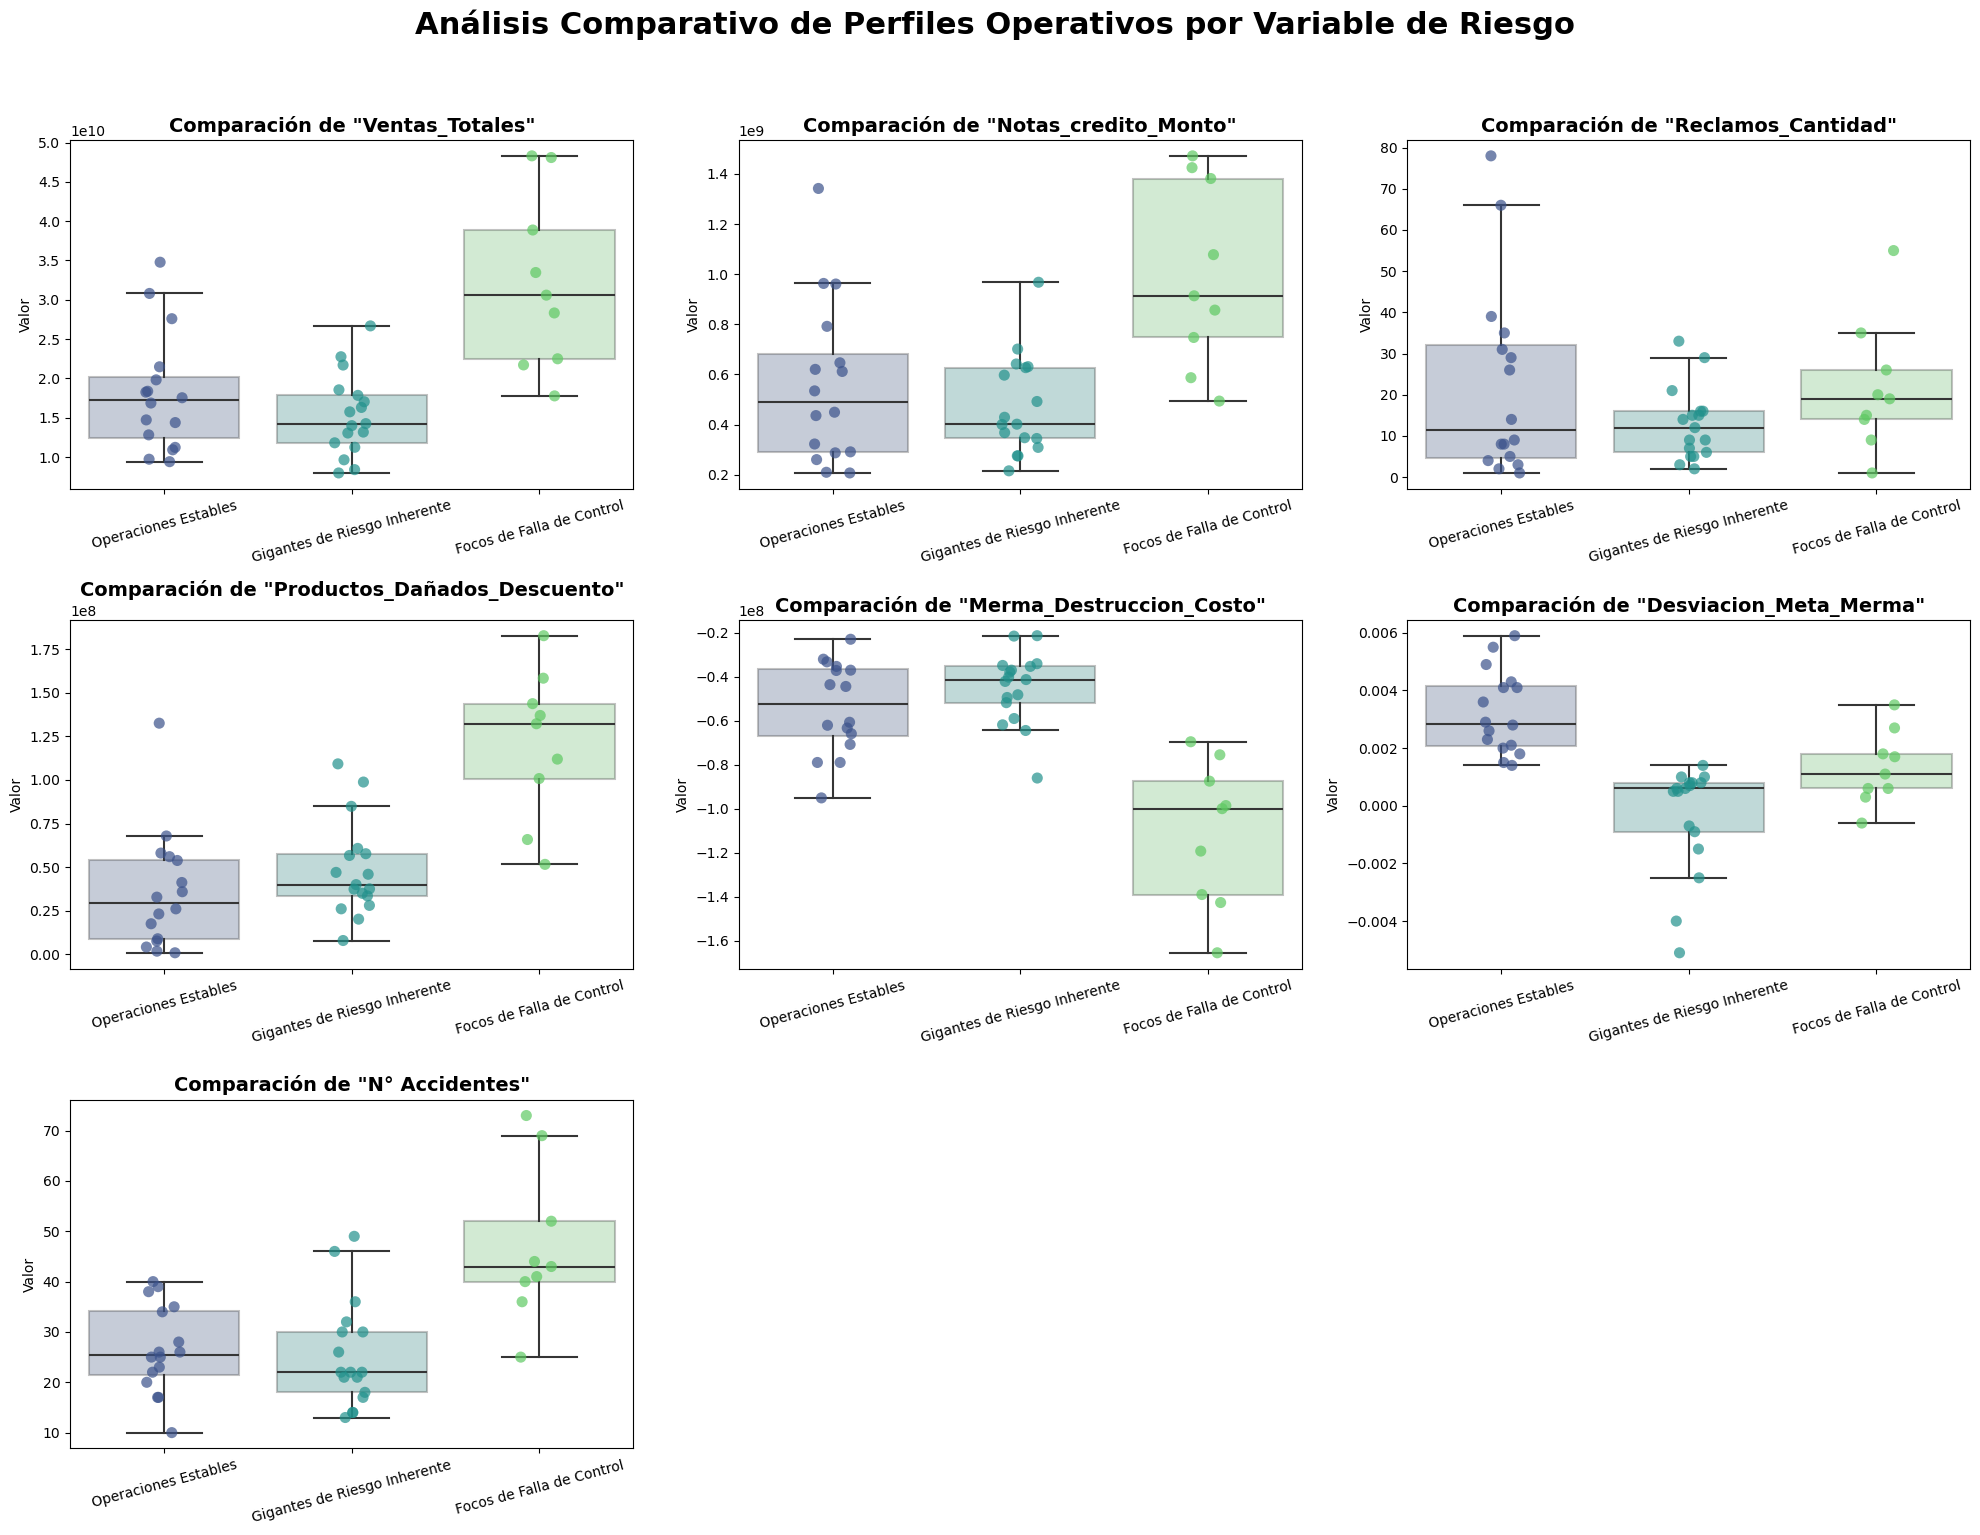

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- VISUALIZACIÓN DE PERFILES COMPARATIVOS POR VARIABLE ---
# Esta visualización es ideal para una audiencia de negocio, ya que no
# utiliza los ejes abstractos del PCA y se enfoca en las variables originales.

# Este código asume que ya has ejecutado los pasos anteriores y tienes
# el DataFrame 'df_kmeans' con las variables originales y la columna
# del modelo que quieres visualizar ('Cluster_con_Pesos').

print("\n" + "="*80)
print("GENERANDO GRÁFICOS DE PERFILES COMPARATIVOS POR VARIABLE")
print("="*80)

# --- PASO 1: PREPARAR DATOS Y NOMBRES DE PERFILES ---
columna_cluster = 'Cluster_con_Pesos'
mapa_perfiles = {
    2: 'Focos de Falla de Control',
    1: 'Gigantes de Riesgo Inherente',
    0: 'Operaciones Estables'
}
if 'Perfil_Operativo' not in df_kmeans.columns:
    df_kmeans['Perfil_Operativo'] = df_kmeans[columna_cluster].map(mapa_perfiles)

# Ordenar los perfiles para que los gráficos se muestren consistentemente
perfil_order = ['Operaciones Estables', 'Gigantes de Riesgo Inherente', 'Focos de Falla de Control']
df_kmeans['Perfil_Operativo'] = pd.Categorical(df_kmeans['Perfil_Operativo'], categories=perfil_order, ordered=True)


# --- PASO 2: CREAR LOS GRÁFICOS COMPARATIVOS ---
# Crearemos una figura con varios subplots, uno para cada variable de riesgo.
# Ajusta el número de filas y columnas según tus preferencias.
n_vars = len(variables_seleccionadas)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Aplanar el array de ejes para iterar fácilmente

colores = sns.color_palette('viridis', n_colors=df_kmeans['Perfil_Operativo'].nunique())
color_map = dict(zip(perfil_order, colores))

for i, var in enumerate(variables_seleccionadas):
    ax = axes[i]
    # Usamos un stripplot para ver la posición de cada sucursal individual
    sns.stripplot(
        x='Perfil_Operativo',
        y=var,
        data=df_kmeans,
        ax=ax,
        palette=colores,
        s=8, # Tamaño de los puntos
        jitter=True,
        alpha=0.7
    )
    # Superponemos un boxplot para ver la distribución general (mediana, cuartiles)
    sns.boxplot(
        x='Perfil_Operativo',
        y=var,
        data=df_kmeans,
        ax=ax,
        palette=colores,
        showfliers=False, # Ocultar outliers del boxplot (ya los vemos con stripplot)
        boxprops=dict(alpha=0.3)
    )
    
    ax.set_title(f'Comparación de "{var}"', fontsize=14, weight='bold')
    ax.set_xlabel('') # Limpiar etiqueta del eje X para no ser redundante
    ax.set_ylabel('Valor', fontsize=10)
    ax.tick_params(axis='x', rotation=15) # Rotar etiquetas para mejor lectura

# Ocultar los ejes de los subplots que no se usen
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Análisis Comparativo de Perfiles Operativos por Variable de Riesgo', fontsize=22, weight='bold', y=1.02)
plt.tight_layout()
plt.show()


#### Realizamos la formulacion nuevamente de las propuestas pero con los codigos del 2025

In [52]:
df_Kmeans['Ventas_Totales'] = df_Kmeans['Ventas_Totales'].apply(lambda x: round(x, 2))
df_Kmeans['Merma_Destruccion_Costo'] = df_Kmeans['Merma_Destruccion_Costo'].apply(lambda x: round(x, 2))


In [53]:
Variables_Modelo = [
    "Ventas_Totales", "Notas_credito_Monto",
    "Reclamos_Cantidad", "Desviacion_Meta_Merma",
    "Merma_Destruccion_Costo", "N° Accidentes",
    "Productos_Dañados_Descuento"
]
X = df_Kmeans[Variables_Modelo].copy()

In [54]:
Scaler_Standar = StandardScaler()
X_scaled = Scaler_Standar.fit_transform(X)

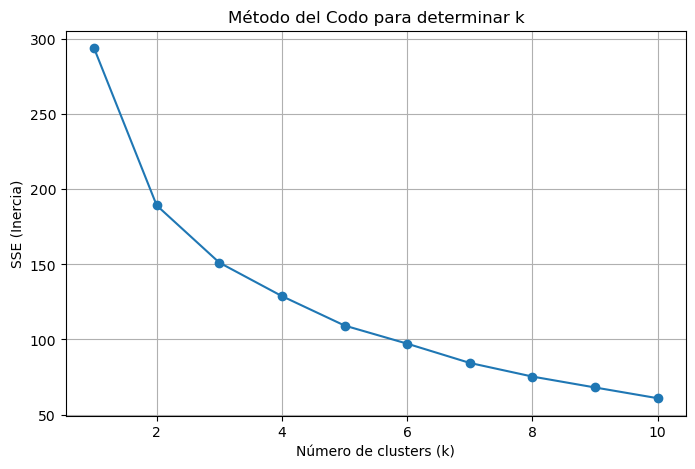

In [55]:
# Calcular SSE para varios valores de K
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state= 100, n_init= 17)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Inercia)')
plt.title('Método del Codo para determinar k')
plt.grid(True)
plt.show()


--- Perfil promedio de cada cluster (Propuesta 1 - Standard) ---
                 Ventas_Totales  Notas_credito_Monto  Reclamos_Cantidad  \
Cluster_Sin_PCA                                                           
0                  3.309748e+10         1.053121e+09              33.36   
1                  1.425320e+10         4.169343e+08              12.22   
2                  1.836575e+10         5.930775e+08              15.12   

                 Desviacion_Meta_Merma  Merma_Destruccion_Costo  \
Cluster_Sin_PCA                                                   
0                                  0.0            -1.053999e+08   
1                                  0.0            -4.394510e+07   
2                                 -0.0            -5.684068e+07   

                 N° Accidentes  Productos_Dañados_Descuento  
Cluster_Sin_PCA                                              
0                        40.18                  94150501.18  
1                        25.04      

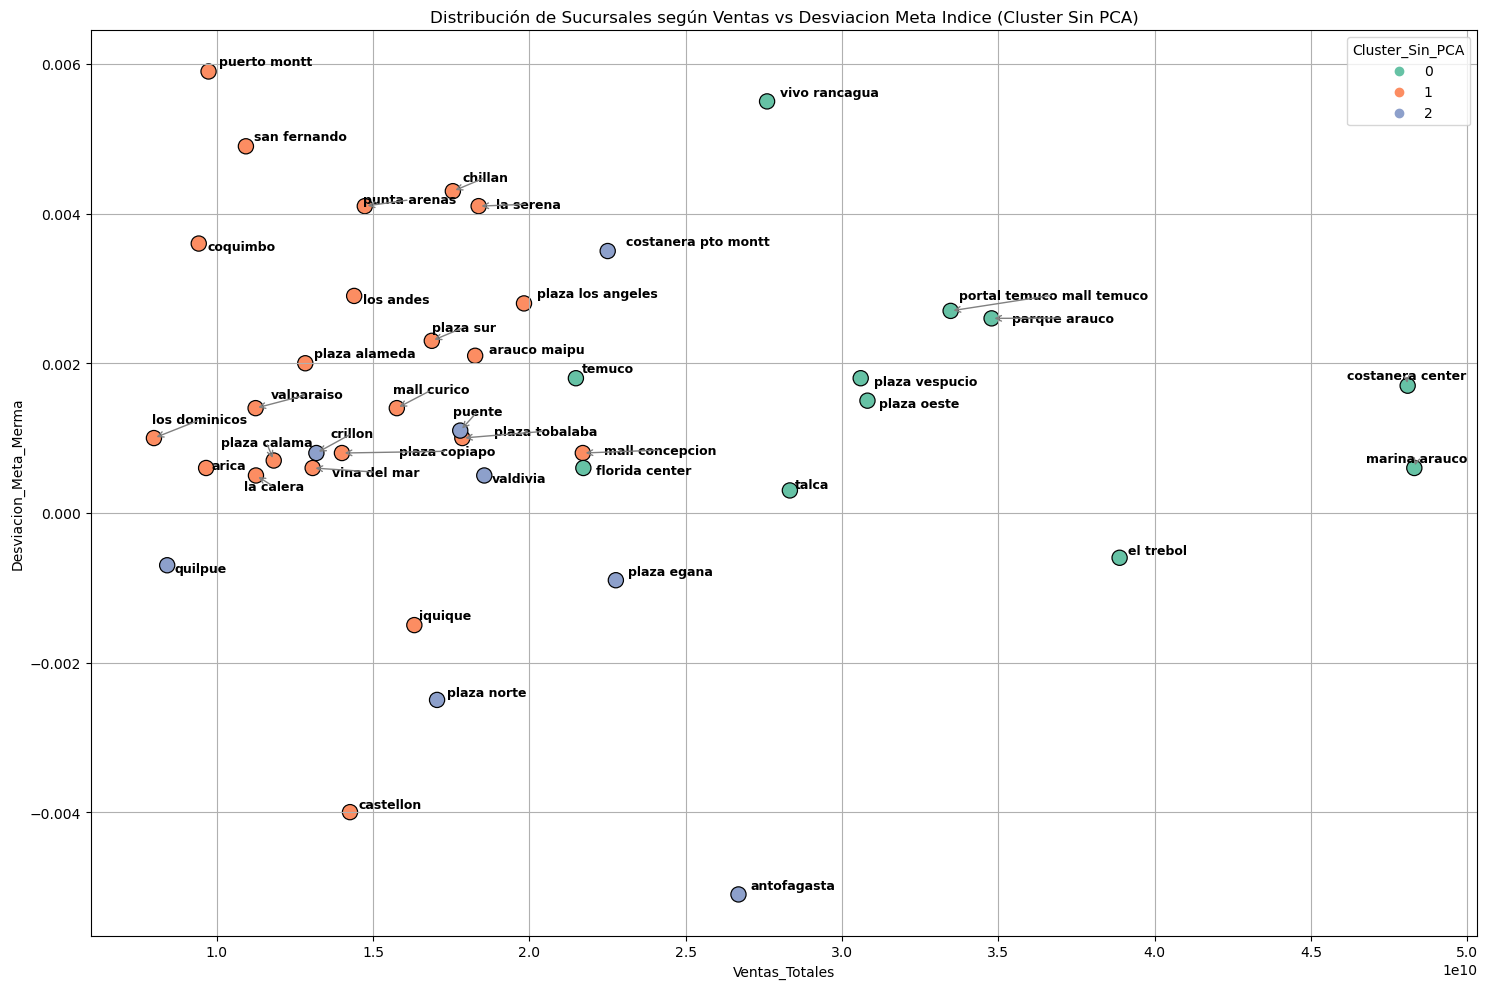

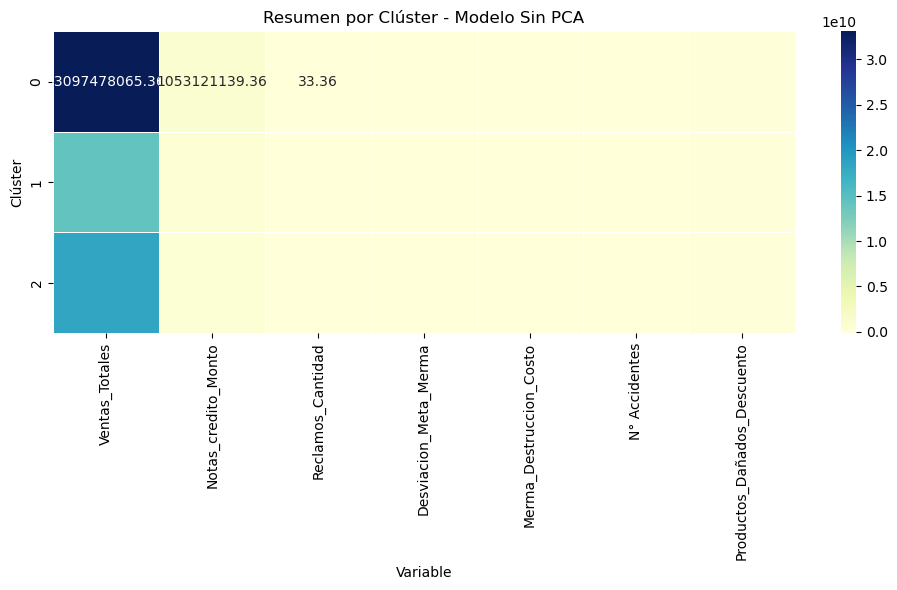


✅ Resumen de clústeres exportado correctamente con redondeo ajustado.


Ventas_Totales  Notas_credito_Monto  Reclamos_Cantidad  \
Cluster_Sin_PCA                                                           
0                  3.309748e+10         1.053121e+09              33.36   
1                  1.425320e+10         4.169343e+08              12.22   
2                  1.836575e+10         5.930775e+08              15.12   

                 Desviacion_Meta_Merma  Merma_Destruccion_Costo  \
Cluster_Sin_PCA                                                   
0                                  0.0            -1.053999e+08   
1                                  0.0            -4.394510e+07   
2                                 -0.0            -5.684068e+07   

                 N° Accidentes  Productos_Dañados_Descuento  
Cluster_Sin_PCA                                              
0                        40.18                  94150501.18  
1                        25.04                  30807192.70  
2                        32.88                  91622636.25

In [56]:
### Ejecutamos K Means con un Clustering Simple 
K_optimo = 3
Modelo_KMeans = KMeans(n_clusters=K_optimo, random_state=100)
Clusters = Modelo_KMeans.fit_predict(X_scaled)
## Añadimos Columna al DataFrame Original
df_Kmeans['Cluster_Sin_PCA'] = Clusters
### Generamos un resumen por Cluster segun las variables de Interes
Resumen_Cluster_Sin_PCA = df_Kmeans.groupby('Cluster_Sin_PCA')[Variables_Modelo].mean().round(2)
print("\n--- Perfil promedio de cada cluster (Propuesta 1 - Standard) ---")
print(Resumen_Cluster_Sin_PCA)

### Generamos un grafico de comparacion de Clusters guiandonos en las ventas junto a la desviacion Meta Indice
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df_Kmeans,
    x='Ventas_Totales',
    y='Desviacion_Meta_Merma',
    hue="Cluster_Sin_PCA",
    palette='Set2',
    s=120,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            df_Kmeans['Ventas_Totales'].iloc[i], 
            df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Cluster Sin PCA)')
plt.xlabel('Ventas_Totales')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualización del Heatmap por clusters segun variables de Interes
plt.figure(figsize=(10, 6))
sns.heatmap(Resumen_Cluster_Sin_PCA, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Resumen por Clúster - Modelo Sin PCA')
plt.ylabel('Clúster')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()

for col in Resumen_Cluster_Sin_PCA.columns:
    if col == 'Desviacion_Meta_Merma':
        Resumen_Cluster_Sin_PCA[col] = Resumen_Cluster_Sin_PCA[col].round(5)  # más precisión para variables pequeñas
    else:
        Resumen_Cluster_Sin_PCA[col] = Resumen_Cluster_Sin_PCA[col].round(2)

# Confirmación visual
print("\n✅ Resumen de clústeres exportado correctamente con redondeo ajustado.")
display(Resumen_Cluster_Sin_PCA)


In [57]:

pd.options.display.float_format = '{:,.5f}'.format
Resumen_Cluster_Sin_PCA


Ventas_Totales  Notas_credito_Monto  Reclamos_Cantidad  \
Cluster_Sin_PCA                                                                
0               33,097,478,065.36000  1,053,121,139.36000           33.36000   
1               14,253,199,399.09000    416,934,254.26000           12.22000   
2               18,365,748,982.12000    593,077,496.62000           15.12000   

                 Desviacion_Meta_Merma  Merma_Destruccion_Costo  \
Cluster_Sin_PCA                                                   
0                              0.00000       -105,399,882.69000   
1                              0.00000        -43,945,096.10000   
2                             -0.00000        -56,840,678.00000   

                 N° Accidentes  Productos_Dañados_Descuento  
Cluster_Sin_PCA                                              
0                     40.18000             94,150,501.18000  
1                     25.04000             30,807,192.70000  
2                     32.88000             91,622,636.25000

In [58]:
mapping_riesgo_Propuesta_1 = {
    0: "Riesgo Bajo",
    1: "Riesgo Medio",
    2: "Riesgo Alto"
}
df_Kmeans["Riesgo_Propuesta_1"] = df_Kmeans["Cluster_Sin_PCA"].map(mapping_riesgo_Propuesta_1)


In [59]:
df_Kmeans.to_excel("Df_Kmeans_2024.xlsx")

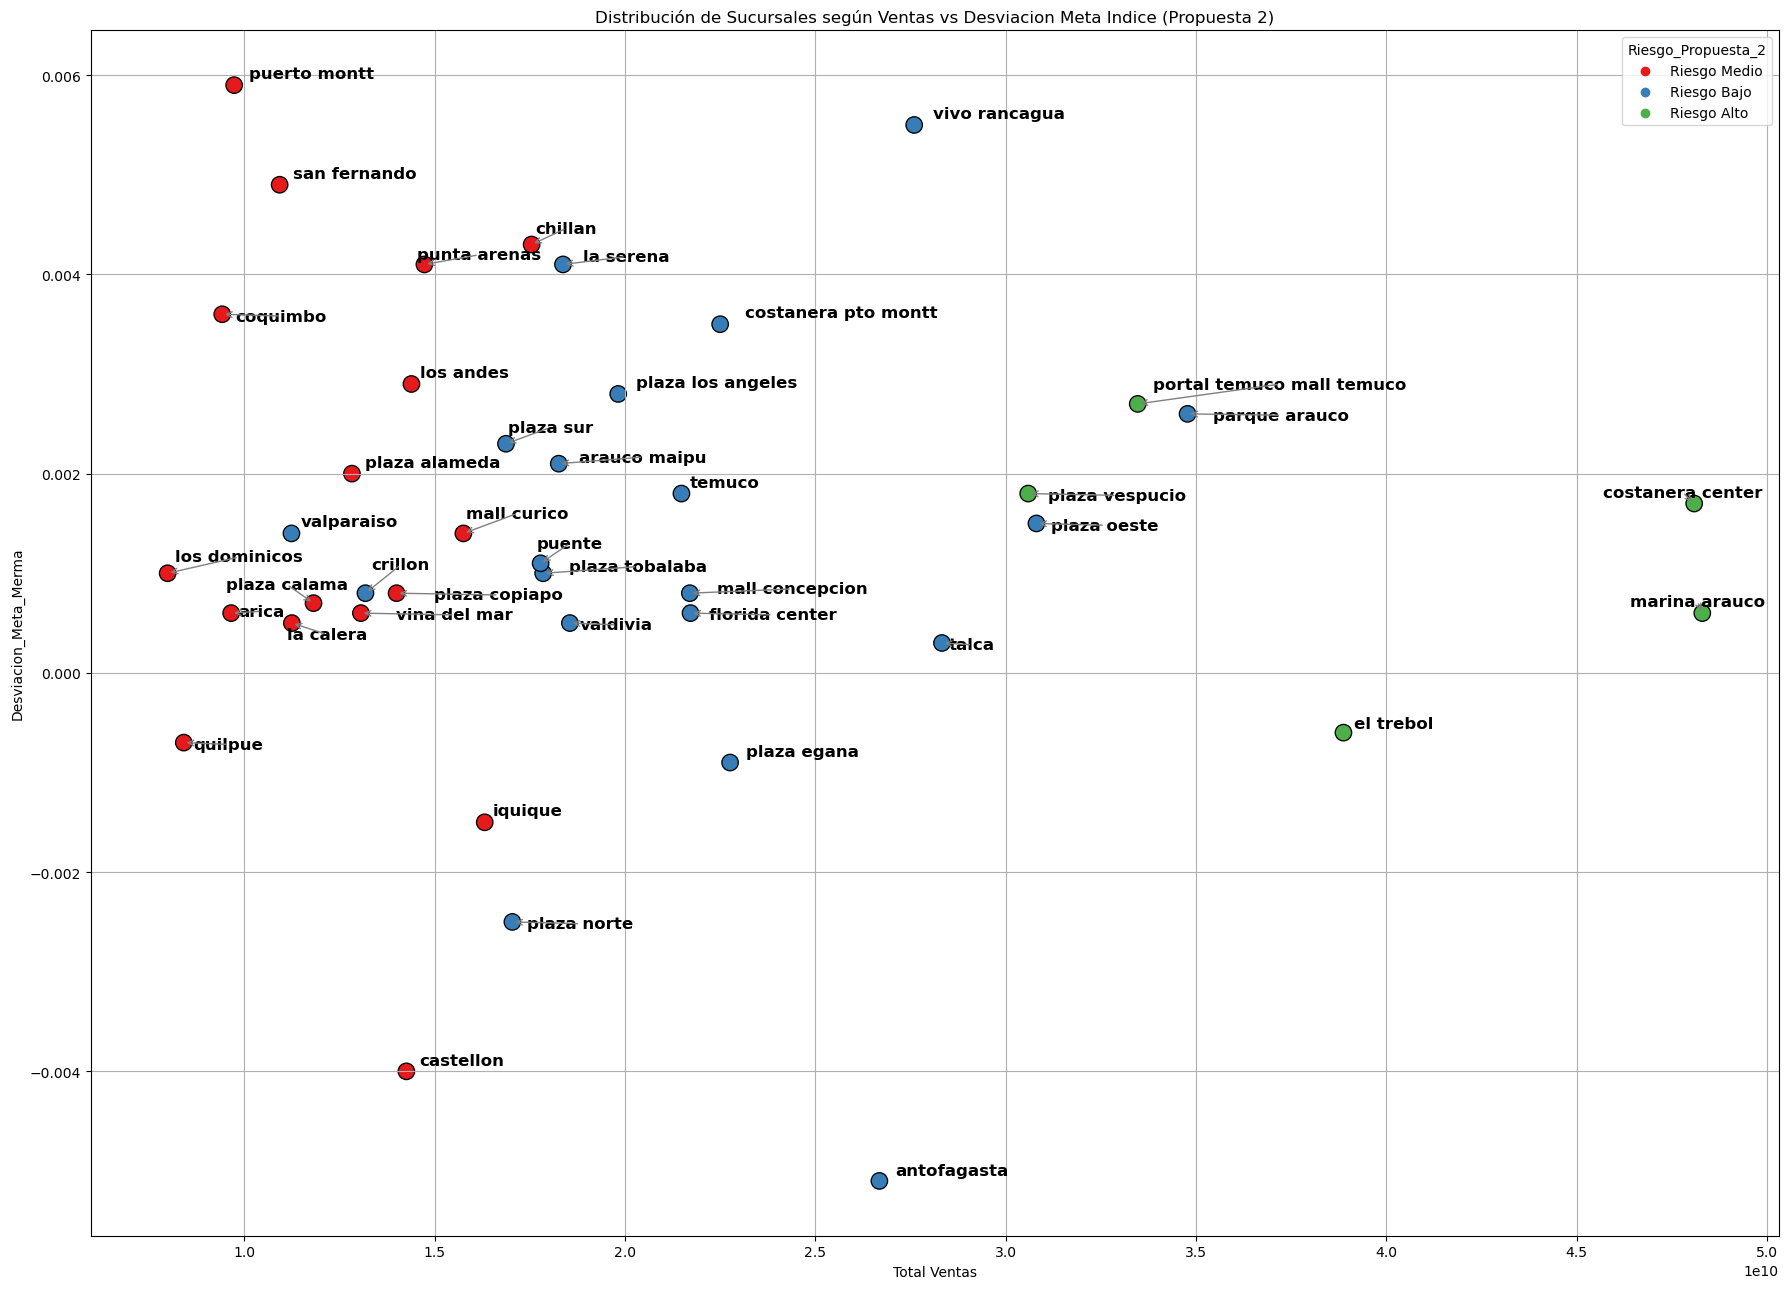


✅ Resultados del Test de Medias para Propuesta 2 : Clústeres con PCA Aplicado a todas las variables:


Variable  p-valor  Significativo
0               Ventas_Totales  0.00000           True
1          Notas_credito_Monto  0.00000           True
2            Reclamos_Cantidad  0.00090           True
3        Desviacion_Meta_Merma  0.87190          False
4      Merma_Destruccion_Costo  0.00000           True
5                N° Accidentes  0.00000           True
6  Productos_Dañados_Descuento  0.00000           True

In [60]:
from sklearn.decomposition import PCA
from scipy.stats import f_oneway


MinMax_Scaler = MinMaxScaler()
X_Scaled_MinMax = MinMax_Scaler.fit_transform(X)

PCA = PCA(n_components=4, random_state=100)
X_PCA = PCA.fit_transform(X_Scaled_MinMax)

X_PCA_Df = pd.DataFrame(X_PCA, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

Kmeans_PCA_Parcial = KMeans(n_clusters=K_optimo, random_state=100, n_init= 50)
Clusters_PCA_Parcial = Kmeans_PCA_Parcial.fit_predict(X_PCA_Df)

df_Kmeans['Propuesta_2'] = Clusters_PCA_Parcial

mapping_riesgo_Propuesta_2 = {
    0: "Riesgo Bajo",
    1: "Riesgo Medio",
    2: "Riesgo Alto"
}
df_Kmeans["Riesgo_Propuesta_2"] = df_Kmeans["Propuesta_2"].map(mapping_riesgo_Propuesta_2)




plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=df_Kmeans,
    x='Ventas_Totales',
    y='Desviacion_Meta_Merma',
    hue="Riesgo_Propuesta_2",
    palette='Set1',
    s=140,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            df_Kmeans['Ventas_Totales'].iloc[i], 
            df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=12, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.35)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Propuesta 2)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()
Resumen_Cluster_PCA_Total = df_Kmeans.groupby('Riesgo_Propuesta_2')[Variables_Modelo].mean()

Resultados_Anova_Propuesta_2 = {}
for var in Variables_Modelo:
    grupos = [grupo[var].values for _, grupo in df_Kmeans.groupby('Riesgo_Propuesta_2')]
    stat, p_value = f_oneway(*grupos)
    Resultados_Anova_Propuesta_2[var] = round(p_value, 4)

Df_Anova_PCA_Total = pd.DataFrame.from_dict(Resultados_Anova_Propuesta_2, orient='index', columns=['p-valor'])
Df_Anova_PCA_Total['Significativo'] = Df_Anova_PCA_Total['p-valor'] < 0.05
Df_Anova_PCA_Total.index.name = 'Variable'
Df_Anova_PCA_Total.reset_index(inplace=True)

print("\n✅ Resultados del Test de Medias para Propuesta 2 : Clústeres con PCA Aplicado a todas las variables:")
display(Df_Anova_PCA_Total)

In [61]:
from sklearn.metrics import silhouette_score

Score_Propuesta_2 = silhouette_score(X_PCA_Df, Clusters_PCA_Parcial)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_2:.4f}")

Silhouette Score para Clusters_Weighted: 0.2722


##### Procedemos con la Propuesta 3 : PCA de Ventas y NC en conjunto a Variables Externas

--- Comenzamos con el escalamiento de las variables por separado tanto PCA como externas ---
--- Aplicamos K-Means al modelo hibrido ---

--- Perfil promedio de cada cluster (Propuesta 3 - Modelo Hibrido con Ventas / NC junto a Variables Externas) ---
                           Ventas_Totales  Notas_credito_Monto  \
Clusters_Propuesta_3                                             
0                    21,368,966,399.55000    699,390,601.30000   
1                    12,476,550,597.00000    336,294,898.00000   
2                    39,868,229,723.00000  1,242,723,012.40000   

                      Reclamos_Cantidad  Desviacion_Meta_Merma  \
Clusters_Propuesta_3                                             
0                              27.45000                0.00121   
1                               7.41176                0.00159   
2                              18.80000                0.00124   

                      Merma_Destruccion_Costo  N° Accidentes  \
Clusters_Propuesta_3  

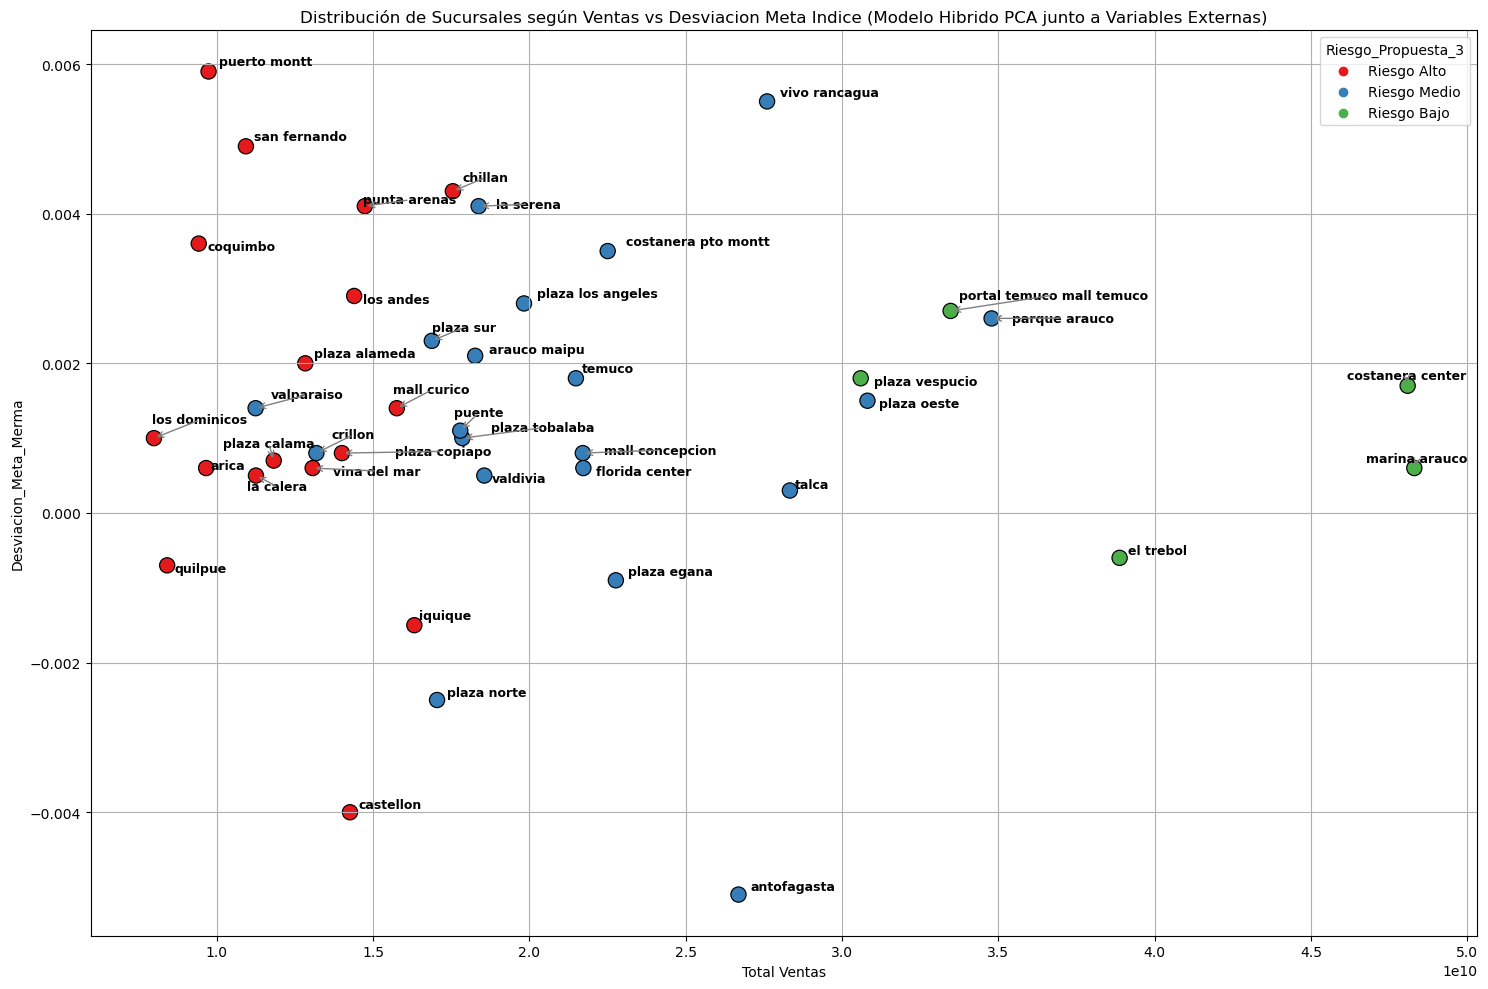

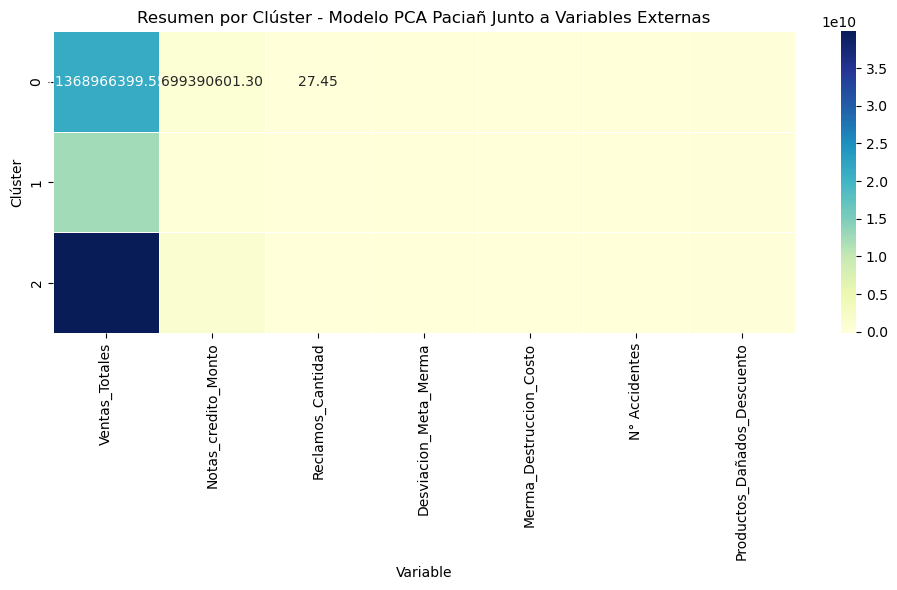


✅ Resumen de clústeres exportado correctamente con redondeo ajustado.


Ventas_Totales  Notas_credito_Monto  \
Clusters_Propuesta_3                                             
0                    21,368,966,399.55000    699,390,601.30000   
1                    12,476,550,597.00000    336,294,898.00000   
2                    39,868,229,723.00000  1,242,723,012.40000   

                      Reclamos_Cantidad  Desviacion_Meta_Merma  \
Clusters_Propuesta_3                                             
0                              27.45000                0.00121   
1                               7.41000                0.00159   
2                              18.80000                0.00124   

                      Merma_Destruccion_Costo  N° Accidentes  \
Clusters_Propuesta_3                                           
0                           -67,948,411.06000       30.25000   
1                           -35,994,325.97000       23.65000   
2                          -130,797,916.24000       54.80000   

                      Productos_Dañados_Descuento  
Clusters_Propuesta_3                               
0                                64,142,325.95000  
1                                32,792,040.29000  
2                               127,378,166.20000

In [62]:
from sklearn.decomposition import PCA

Variables_PCA_correlacionadas = ["Ventas_Totales", 'Notas_credito_Monto']
Variables_externas = ["Reclamos_Cantidad", "Desviacion_Meta_Merma", "Merma_Destruccion_Costo", "N° Accidentes", "Productos_Dañados_Descuento"]

print("--- Comenzamos con el escalamiento de las variables por separado tanto PCA como externas ---")
X_PCA_Variables_Correlaciones = MinMax_Scaler.fit_transform(df_Kmeans[Variables_PCA_correlacionadas])
X_Variables_Externas = MinMax_Scaler.fit_transform(df_Kmeans[Variables_externas])
PCA_Variables_Correlaciones = PCA(n_components=1, random_state=100)

X_PCA_Ventas_NC = PCA_Variables_Correlaciones.fit_transform(X_PCA_Variables_Correlaciones)
Df_PCA_NC = pd.DataFrame(X_PCA_Ventas_NC, columns=['PCA_Ventas_Notas_Credito'])

Df_Kmeans_Hibrido = pd.concat([Df_PCA_NC, pd.DataFrame(X_Variables_Externas, columns=Variables_externas)], axis=1)

print("--- Aplicamos K-Means al modelo hibrido ---")
Clusters_PCA_Hibrido = KMeans(n_clusters=K_optimo, random_state=100, n_init=34)
Clusters_PCA_Hibrido = Clusters_PCA_Hibrido.fit_predict(Df_Kmeans_Hibrido)          
df_Kmeans['Clusters_Propuesta_3'] = Clusters_PCA_Hibrido 

mapping_riesgo_Propuesta_3 = {
    0: "Riesgo Medio",
    1: "Riesgo Alto",
    2: "Riesgo Bajo"
}
df_Kmeans["Riesgo_Propuesta_3"] = df_Kmeans["Clusters_Propuesta_3"].map(mapping_riesgo_Propuesta_3)

Resumen_Cluster_PCA_Hibrido = df_Kmeans.groupby('Clusters_Propuesta_3')[Variables_Modelo].mean()

print("\n--- Perfil promedio de cada cluster (Propuesta 3 - Modelo Hibrido con Ventas / NC junto a Variables Externas) ---")
print(Resumen_Cluster_PCA_Hibrido)

### Generamos un grafico de comparacion de Clusters guiandonos en las ventas junto a la desviacion Meta Indice
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df_Kmeans,
    x='Ventas_Totales',
    y='Desviacion_Meta_Merma',
    hue="Riesgo_Propuesta_3",
    palette='Set1',
    s=120,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            df_Kmeans['Ventas_Totales'].iloc[i], 
            df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Modelo Hibrido PCA junto a Variables Externas)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualización del Heatmap por clusters segun variables de Interes
plt.figure(figsize=(10, 6))
sns.heatmap(Resumen_Cluster_PCA_Hibrido, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Resumen por Clúster - Modelo PCA Paciañ Junto a Variables Externas')
plt.ylabel('Clúster')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()

for col in Resumen_Cluster_PCA_Hibrido.columns:
    if col == 'Desviacion_Meta_Merma':
        Resumen_Cluster_PCA_Hibrido[col] = Resumen_Cluster_PCA_Hibrido[col].round(5)  # más precisión para variables pequeñas
    else:
        Resumen_Cluster_PCA_Hibrido[col] = Resumen_Cluster_PCA_Hibrido[col].round(2)

# Confirmación visual
print("\n✅ Resumen de clústeres exportado correctamente con redondeo ajustado.")
display(Resumen_Cluster_PCA_Hibrido)


In [63]:
Score_Propuesta_3 = silhouette_score(Df_Kmeans_Hibrido, Clusters_PCA_Hibrido)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_3:.4f}")

Silhouette Score para Clusters_Weighted: 0.2337


##### Avanzamos con la Propuesta 4 que trabajariamos con Pesos establecidos


--- Perfil promedio de cada cluster (Propuesta 4 - MinMax+Pesos) ---
                         Ventas_Totales  Notas_credito_Monto  \
Riesgo_Propuesta_4                                             
Riesgo Alto        41,467,272,305.75000  1,339,204,318.25000   
Riesgo Bajo        12,903,400,409.05000    366,610,419.10000   
Riesgo Medio       23,049,152,186.17000    734,967,483.28000   

                    Desviacion_Meta_Merma  Productos_Dañados_Descuento  \
Riesgo_Propuesta_4                                                       
Riesgo Alto                       0.00000            131,223,001.00000   
Riesgo Bajo                       0.00000             31,293,736.65000   
Riesgo Medio                      0.00000             73,690,849.89000   

                    Merma_Destruccion_Costo  N° Accidentes  Reclamos_Cantidad  
Riesgo_Propuesta_4                                                             
Riesgo Alto              -141,630,881.04000       51.25000           19.75000 

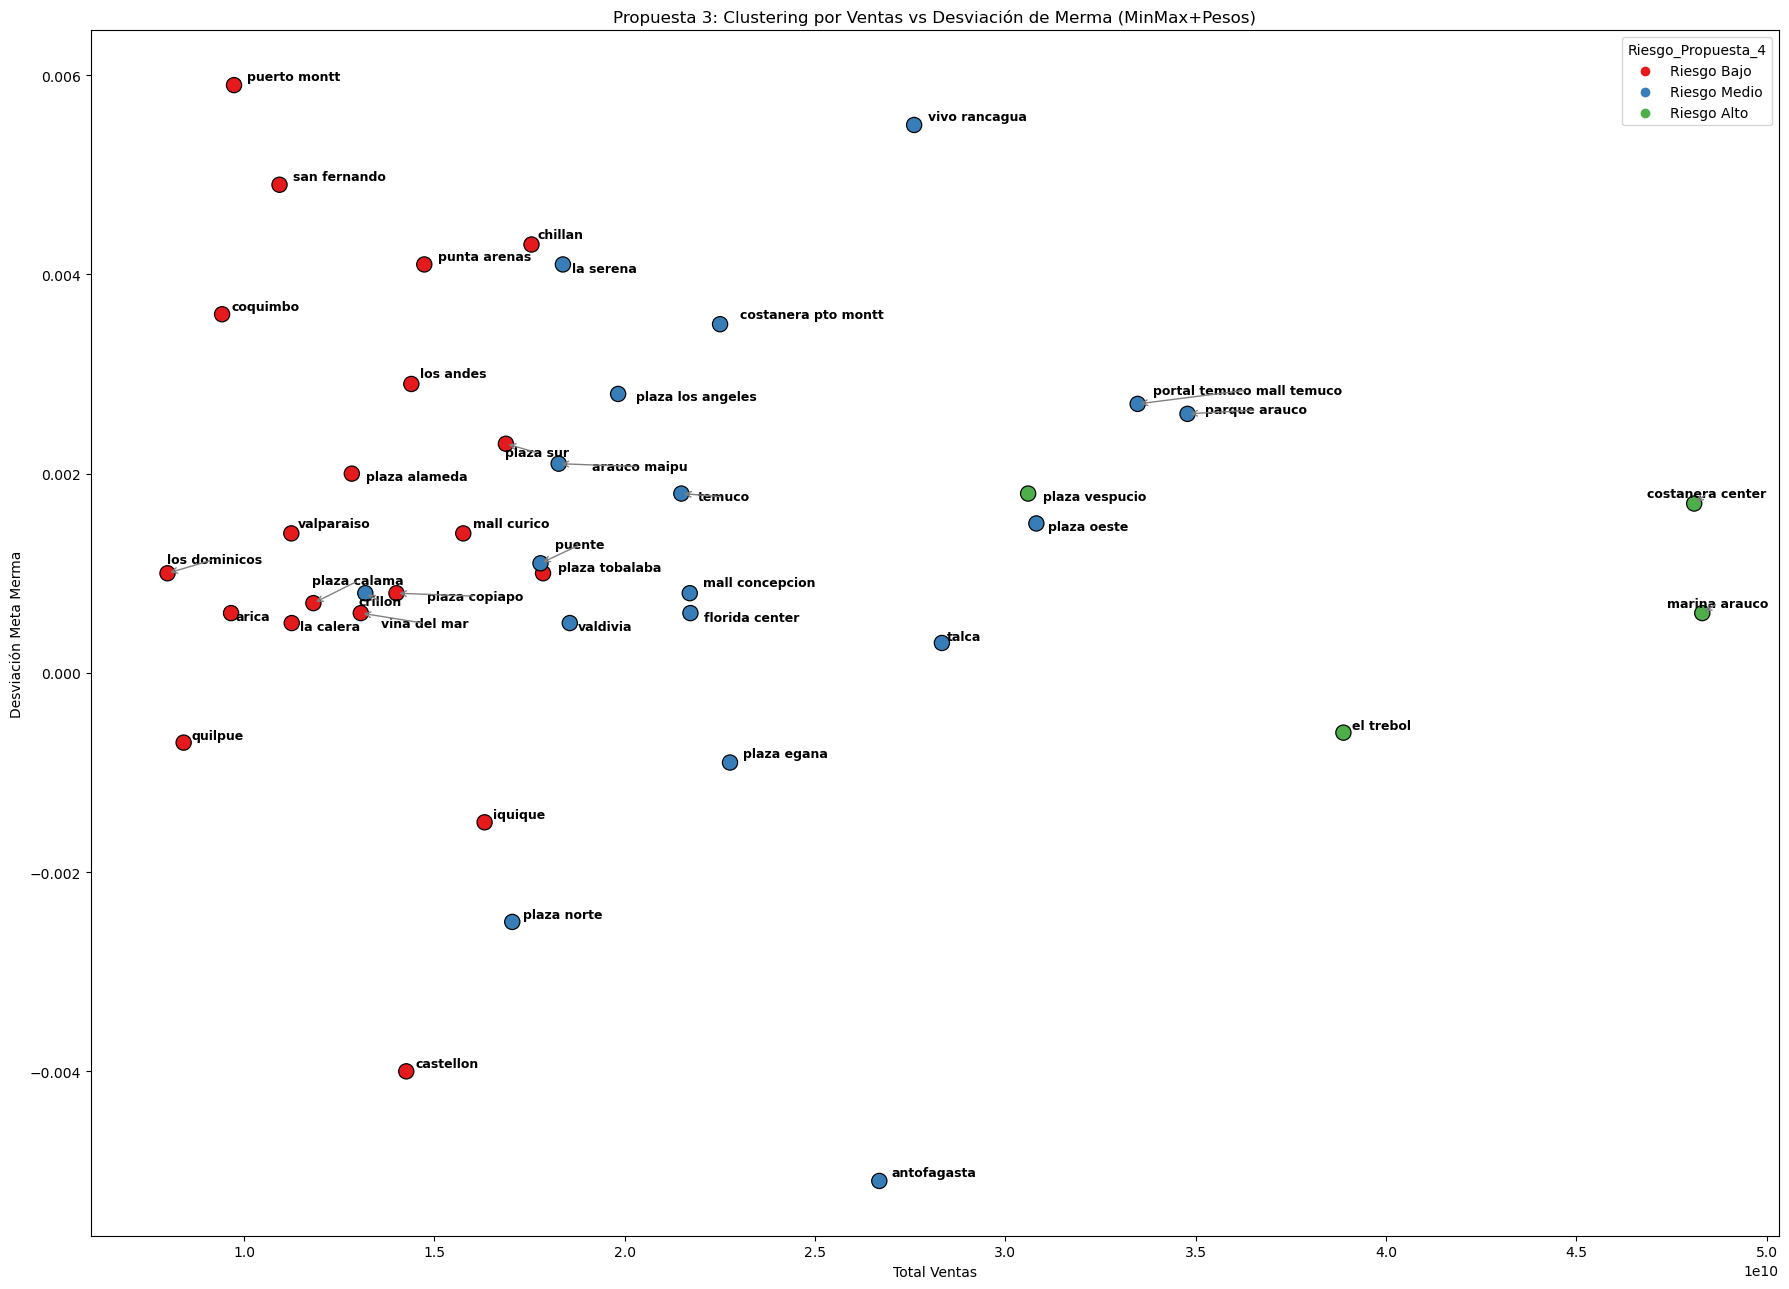


Sucursales en Cluster Riesgo Alto:
['costanera center', 'el trebol', 'marina arauco', 'plaza vespucio']

Sucursales en Cluster Riesgo Bajo:
['chillan', 'quilpue', 'valparaiso', 'arica', 'castellon', 'coquimbo', 'iquique', 'la calera', 'los andes', 'los dominicos', 'mall curico', 'plaza alameda', 'plaza calama', 'plaza copiapo', 'plaza sur', 'plaza tobalaba', 'puerto montt', 'punta arenas', 'san fernando', 'vina del mar']

Sucursales en Cluster Riesgo Medio:
['crillon', 'mall concepcion', 'portal temuco mall temuco', 'antofagasta', 'arauco maipu', 'costanera pto montt', 'florida center', 'la serena', 'parque arauco', 'plaza egana', 'plaza los angeles', 'plaza norte', 'plaza oeste', 'puente', 'talca', 'temuco', 'valdivia', 'vivo rancagua']


In [64]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score

Weights = {
    'Ventas_Totales': 0.15,
    'Notas_credito_Monto': 0.15,
    'Desviacion_Meta_Merma': 0.16,
    'Productos_Dañados_Descuento': 0.16,
    'Merma_Destruccion_Costo': 0.16,
    'N° Accidentes': 0.10,
    'Reclamos_Cantidad': 0.10,
}

Variables_Modelo_Weights = list(Weights.keys())

# --- 3. Limpiar posibles columnas duplicadas ---
df_Kmeans = df_Kmeans.loc[:, ~df_Kmeans.columns.duplicated()]
if 'Cluster_MixMax_Weighted' in df_Kmeans.columns:
    df_Kmeans = df_Kmeans.drop(columns=['Cluster_MixMax_Weighted'])

# --- 4. Escalamiento MinMax y aplicación de pesos ---
X_Scaled_MinMax = MinMax_Scaler.fit_transform(df_Kmeans[Variables_Modelo_Weights])

# Aplicar los pesos a cada columna
X_Weighted_MinMax = X_Scaled_MinMax * [Weights[col] for col in Variables_Modelo_Weights]

# --- 5. KMeans Clustering ---
kmeans_Weighted = KMeans(n_clusters=K_optimo, init = "k-means++",  n_init= 50 , tol= 0.00002,  random_state=100, max_iter= 500, algorithm= "lloyd")
Clusters_Weighted = kmeans_Weighted.fit_predict(X_Weighted_MinMax)

# --- 6. Añadir columna de cluster  ---
df_Kmeans['Cluster_MixMax_Weighted'] = Clusters_Weighted

mapping_riesgo_Propuesta_4 = {
    0: "Riesgo Medio",
    1: "Riesgo Alto",
    2: "Riesgo Bajo"
}
df_Kmeans["Riesgo_Propuesta_4"] = df_Kmeans["Cluster_MixMax_Weighted"].map(mapping_riesgo_Propuesta_4)

# --- 7. Resumen de clústeres ---
Resumen_Cluster_Propuesta_4 = df_Kmeans.groupby('Riesgo_Propuesta_4')[Variables_Modelo_Weights].mean().round(2)
print("\n--- Perfil promedio de cada cluster (Propuesta 4 - MinMax+Pesos) ---")
print(Resumen_Cluster_Propuesta_4)

# --- 8. Visualización básica (ventas vs desviación de merma, por cluster) ---
plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=df_Kmeans,
    x='Ventas_Totales',
    y='Desviacion_Meta_Merma',
    hue='Riesgo_Propuesta_4',
    palette='Set1',
    s=120,
    edgecolor='black'
)

# Crear una lista para ajustar etiquetas automáticamente
texts_MinMax = []
for i, txt in enumerate(df_Kmeans['Nombre_Sucursal']):
    texts_MinMax.append(
        plt.text(
            df_Kmeans['Ventas_Totales'].iloc[i], 
            df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
# Ajuste automático de etiquetas
adjust_text(texts_MinMax, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Propuesta 3: Clustering por Ventas vs Desviación de Merma (MinMax+Pesos)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviación Meta Merma')
plt.tight_layout()
plt.show()

# --- 9. Mostrar sucursales de cada cluster ---
for c in sorted(df_Kmeans['Riesgo_Propuesta_4'].unique()):
    nombres = df_Kmeans[df_Kmeans['Riesgo_Propuesta_4'] == c]['Nombre_Sucursal'].tolist()
    print(f"\nSucursales en Cluster {c}:")
    print(nombres)

In [65]:
from sklearn.metrics import silhouette_score
Score_Propuesta_4 = silhouette_score(X_Weighted_MinMax, Clusters_Weighted)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_4:.4f}")

Silhouette Score para Clusters_Weighted: 0.2614


In [66]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                     chillan     17548478930                 510509   
1                     crillon     13183000192                 391956   
2             mall concepcion     21705948095                 692094   
3   portal temuco mall temuco     33472059392                 803446   
4                     quilpue      8410420645                 289959   
5                  valparaiso     11238928228                 367348   
6                 antofagasta     26685302686                 611376   
7                arauco maipu     18262253560                 483185   
8                       arica      9655889254                 277512   
9                   castellon     14258476937                 399290   
10                   coquimbo      9420251442                 292207   
11           costanera center     48091779474                1011685   
12        costanera pto montt     22502193354                 621773   
13                  el trebol     38877448821                 931839   
14             florida center     21723377628                 597386   
15                    iquique     16316783574                 411142   
16                  la calera     11250025215                 314852   
17                  la serena     18373455631                 520530   
18                  los andes     14391622615                 329641   
19              los dominicos      7986650719                 246099   
20                mall curico     15756063963                 413895   
21              marina arauco     48304720750                1022017   
22              parque arauco     34781890665                 617006   
23              plaza alameda     12828386308                 352526   
24               plaza calama     11818817394                 290263   
25              plaza copiapo     14000893323                 360843   
26                plaza egana     22762922863                 658353   
27          plaza los angeles     19824341357                 532744   
28                plaza norte     17043398221                 423736   
29                plaza oeste     30811601149                 703810   
30                  plaza sur     16875471132                 450201   
31             plaza tobalaba     17852248672                 516994   
32             plaza vespucio     30595140178                 799720   
33                     puente     17784664755                 574435   
34               puerto montt      9733844233                 311605   
35               punta arenas     14732074775                 373852   
36               san fernando     10928710336                 340069   
37                      talca     28329446719                 670734   
38                     temuco     21484650822                 550079   
39                   valdivia     18554089141                 514829   
40              vivo rancagua     27600143121                 702384   
41               vina del mar     13063970486                 417791   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             646643543                   13792      308563708   
1             627231699                   14860      258047668   
2             641811956                   16564      374142871   
3             856797789                   16127      446830375   
4             401728015                    9492      200788281   
5             449454783                    9000      207117945   
6             597361902                    7424      442532831   
7             960838296                   17986      439701548   
8             215637357                    3913      121973949   
9             275485230                    7592      240748388   
10            209846633                    4410      154910741   
11           1424989889                   29355      679695629   
12            493876936                    8584      253715

##### Realizamos una prueba con Escalado Standar solo para verificar


--- Perfil promedio de cada cluster (Propuesta 4 - Standard + Pesos) ---
                                  Ventas_Totales  Notas_credito_Monto  \
Riesgo_Propuesta_4_Standard                                             
Riesgo Alto                 39,868,229,723.00000  1,242,723,012.40000   
Riesgo Bajo                 12,642,934,711.00000    352,685,958.89000   
Riesgo Medio                22,181,384,923.94000    722,432,892.94000   

                             Desviacion_Meta_Merma  \
Riesgo_Propuesta_4_Standard                          
Riesgo Alto                                0.00000   
Riesgo Bajo                                0.00000   
Riesgo Medio                               0.00000   

                             Productos_Dañados_Descuento  \
Riesgo_Propuesta_4_Standard                                
Riesgo Alto                            127,378,166.20000   
Riesgo Bajo                             31,469,618.37000   
Riesgo Medio                            69,021,58

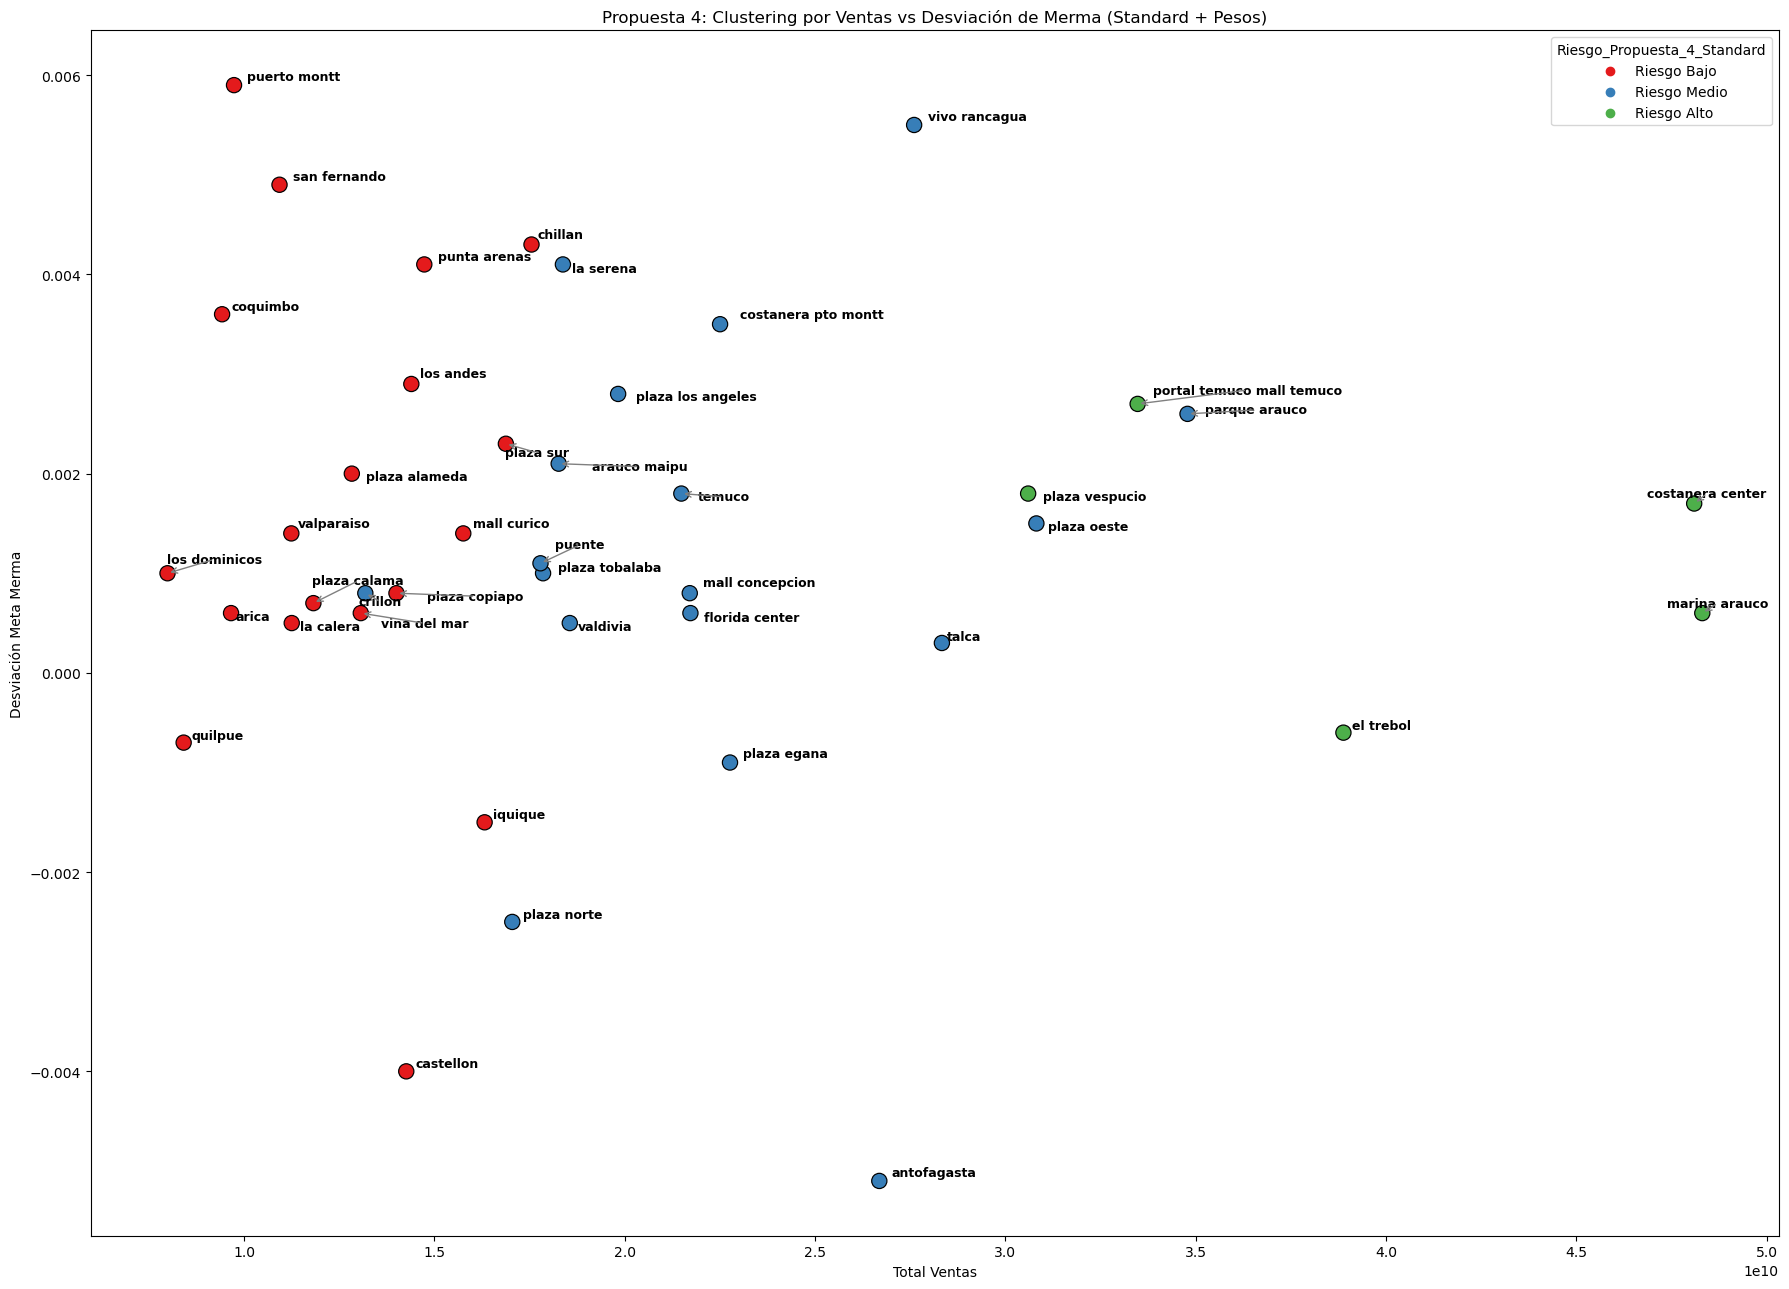


Sucursales en Cluster Riesgo Alto:
['portal temuco mall temuco', 'costanera center', 'el trebol', 'marina arauco', 'plaza vespucio']

Sucursales en Cluster Riesgo Bajo:
['chillan', 'quilpue', 'valparaiso', 'arica', 'castellon', 'coquimbo', 'iquique', 'la calera', 'los andes', 'los dominicos', 'mall curico', 'plaza alameda', 'plaza calama', 'plaza copiapo', 'plaza sur', 'puerto montt', 'punta arenas', 'san fernando', 'vina del mar']

Sucursales en Cluster Riesgo Medio:
['crillon', 'mall concepcion', 'antofagasta', 'arauco maipu', 'costanera pto montt', 'florida center', 'la serena', 'parque arauco', 'plaza egana', 'plaza los angeles', 'plaza norte', 'plaza oeste', 'plaza tobalaba', 'puente', 'talca', 'temuco', 'valdivia', 'vivo rancagua']


In [67]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score

Weights = {
    'Ventas_Totales': 0.16,
    'Notas_credito_Monto': 0.16,
    'Desviacion_Meta_Merma': 0.16,
    'Productos_Dañados_Descuento': 0.16,
    'Merma_Destruccion_Costo': 0.16,
    'N° Accidentes': 0.10,
    'Reclamos_Cantidad': 0.10,
}

Variables_Modelo_Weights = list(Weights.keys())

# --- 3. Limpiar posibles columnas duplicadas ---
df_Kmeans = df_Kmeans.loc[:, ~df_Kmeans.columns.duplicated()]
if 'Cluster_Standard_Weighted' in df_Kmeans.columns:
    df_Kmeans = df_Kmeans.drop(columns=['Cluster_Standard_Weighted'])

# --- 4. Escalamiento MinMax y aplicación de pesos ---
Standard_Scaler = StandardScaler()
X_Scaled_Standard = Standard_Scaler.fit_transform(df_Kmeans[Variables_Modelo_Weights])

# Aplicar los pesos a cada columna
X_Weighted_Standard = X_Scaled_Standard * [Weights[col] for col in Variables_Modelo_Weights]

# --- 5. KMeans Clustering ---
kmeans_Weighted_Standard = KMeans(n_clusters=3, random_state=100, n_init=50)
Clusters_Weighted_Standard = kmeans_Weighted_Standard.fit_predict(X_Weighted_Standard)

# --- 6. Añadir columna de cluster  ---
df_Kmeans['Cluster_Standard_Weighted'] = Clusters_Weighted_Standard

mapping_riesgo_Propuesta_4 = {
    0: "Riesgo Alto",
    1: "Riesgo Medio",
    2: "Riesgo Bajo",
    3: "Rieso Analizar"
}
df_Kmeans["Riesgo_Propuesta_4_Standard"] = df_Kmeans["Cluster_Standard_Weighted"].map(mapping_riesgo_Propuesta_4)

# --- 7. Resumen de clústeres ---
Resumen_Cluster_Propuesta_4_Standard = df_Kmeans.groupby('Riesgo_Propuesta_4_Standard')[Variables_Modelo_Weights].mean().round(2)
print("\n--- Perfil promedio de cada cluster (Propuesta 4 - Standard + Pesos) ---")
print(Resumen_Cluster_Propuesta_4_Standard)

# --- 8. Visualización básica (ventas vs desviación de merma, por cluster) ---
plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=df_Kmeans,
    x='Ventas_Totales',
    y='Desviacion_Meta_Merma',
    hue='Riesgo_Propuesta_4_Standard',
    palette='Set1',
    s=120,
    edgecolor='black'
)

# Crear una lista para ajustar etiquetas automáticamente
texts_Standard = []
for i, txt in enumerate(df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            df_Kmeans['Ventas_Totales'].iloc[i], 
            df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
# Ajuste automático de etiquetas
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Propuesta 4: Clustering por Ventas vs Desviación de Merma (Standard + Pesos)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviación Meta Merma')
plt.tight_layout()
plt.show()

# --- 9. Mostrar sucursales de cada cluster ---
for c in sorted(df_Kmeans['Riesgo_Propuesta_4_Standard'].unique()):
    nombres = df_Kmeans[df_Kmeans['Riesgo_Propuesta_4_Standard'] == c]['Nombre_Sucursal'].tolist()
    print(f"\nSucursales en Cluster {c}:")
    print(nombres)

In [68]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                     chillan     17548478930                 510509   
1                     crillon     13183000192                 391956   
2             mall concepcion     21705948095                 692094   
3   portal temuco mall temuco     33472059392                 803446   
4                     quilpue      8410420645                 289959   
5                  valparaiso     11238928228                 367348   
6                 antofagasta     26685302686                 611376   
7                arauco maipu     18262253560                 483185   
8                       arica      9655889254                 277512   
9                   castellon     14258476937                 399290   
10                   coquimbo      9420251442                 292207   
11           costanera center     48091779474                1011685   
12        costanera pto montt     22502193354                 621773   
13                  el trebol     38877448821                 931839   
14             florida center     21723377628                 597386   
15                    iquique     16316783574                 411142   
16                  la calera     11250025215                 314852   
17                  la serena     18373455631                 520530   
18                  los andes     14391622615                 329641   
19              los dominicos      7986650719                 246099   
20                mall curico     15756063963                 413895   
21              marina arauco     48304720750                1022017   
22              parque arauco     34781890665                 617006   
23              plaza alameda     12828386308                 352526   
24               plaza calama     11818817394                 290263   
25              plaza copiapo     14000893323                 360843   
26                plaza egana     22762922863                 658353   
27          plaza los angeles     19824341357                 532744   
28                plaza norte     17043398221                 423736   
29                plaza oeste     30811601149                 703810   
30                  plaza sur     16875471132                 450201   
31             plaza tobalaba     17852248672                 516994   
32             plaza vespucio     30595140178                 799720   
33                     puente     17784664755                 574435   
34               puerto montt      9733844233                 311605   
35               punta arenas     14732074775                 373852   
36               san fernando     10928710336                 340069   
37                      talca     28329446719                 670734   
38                     temuco     21484650822                 550079   
39                   valdivia     18554089141                 514829   
40              vivo rancagua     27600143121                 702384   
41               vina del mar     13063970486                 417791   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             646643543                   13792      308563708   
1             627231699                   14860      258047668   
2             641811956                   16564      374142871   
3             856797789                   16127      446830375   
4             401728015                    9492      200788281   
5             449454783                    9000      207117945   
6             597361902                    7424      442532831   
7             960838296                   17986      439701548   
8             215637357                    3913      121973949   
9             275485230                    7592      240748388   
10            209846633                    4410      154910741   
11           1424989889                   29355      679695629   
12            493876936                    8584      253715

#### Realizamos una Propuesta 5 para las pruebas


📌 Varianza Explicada por el PCA:
[0.95631835]

✅ Dataset listo para aplicar K-Means:
   PCA_Ventas_Notas  Reclamos_Cantidad  Desviacion_Meta_Merma  \
0          -0.00669            0.00390                0.12818   
1          -0.03166            0.03636                0.08045   
2           0.01294            0.00519                0.08045   
3           0.10912            0.01818                0.10636   
4          -0.09525            0.01039                0.06000   

   Merma_Destruccion_Costo  N° Accidentes  Productos_Dañados_Descuento  
0                  0.10905        0.00000                      0.02078  
1                  0.12077        0.02794                      0.06927  
2                  0.08266        0.02032                      0.02691  
3                  0.08119        0.07492                      0.09162  
4                  0.13675        0.01524                      0.08937  

✅ Silhouette Score Propuesta 5: 0.3692

✅ Resultados del Test de Medias para Propues

Variable  p-valor  Significativo
0               Ventas_Totales  0.00000           True
1          Notas_credito_Monto  0.00000           True
2            Reclamos_Cantidad  0.11310          False
3        Desviacion_Meta_Merma  0.91470          False
4      Merma_Destruccion_Costo  0.00000           True
5                N° Accidentes  0.02020           True
6  Productos_Dañados_Descuento  0.00130           True

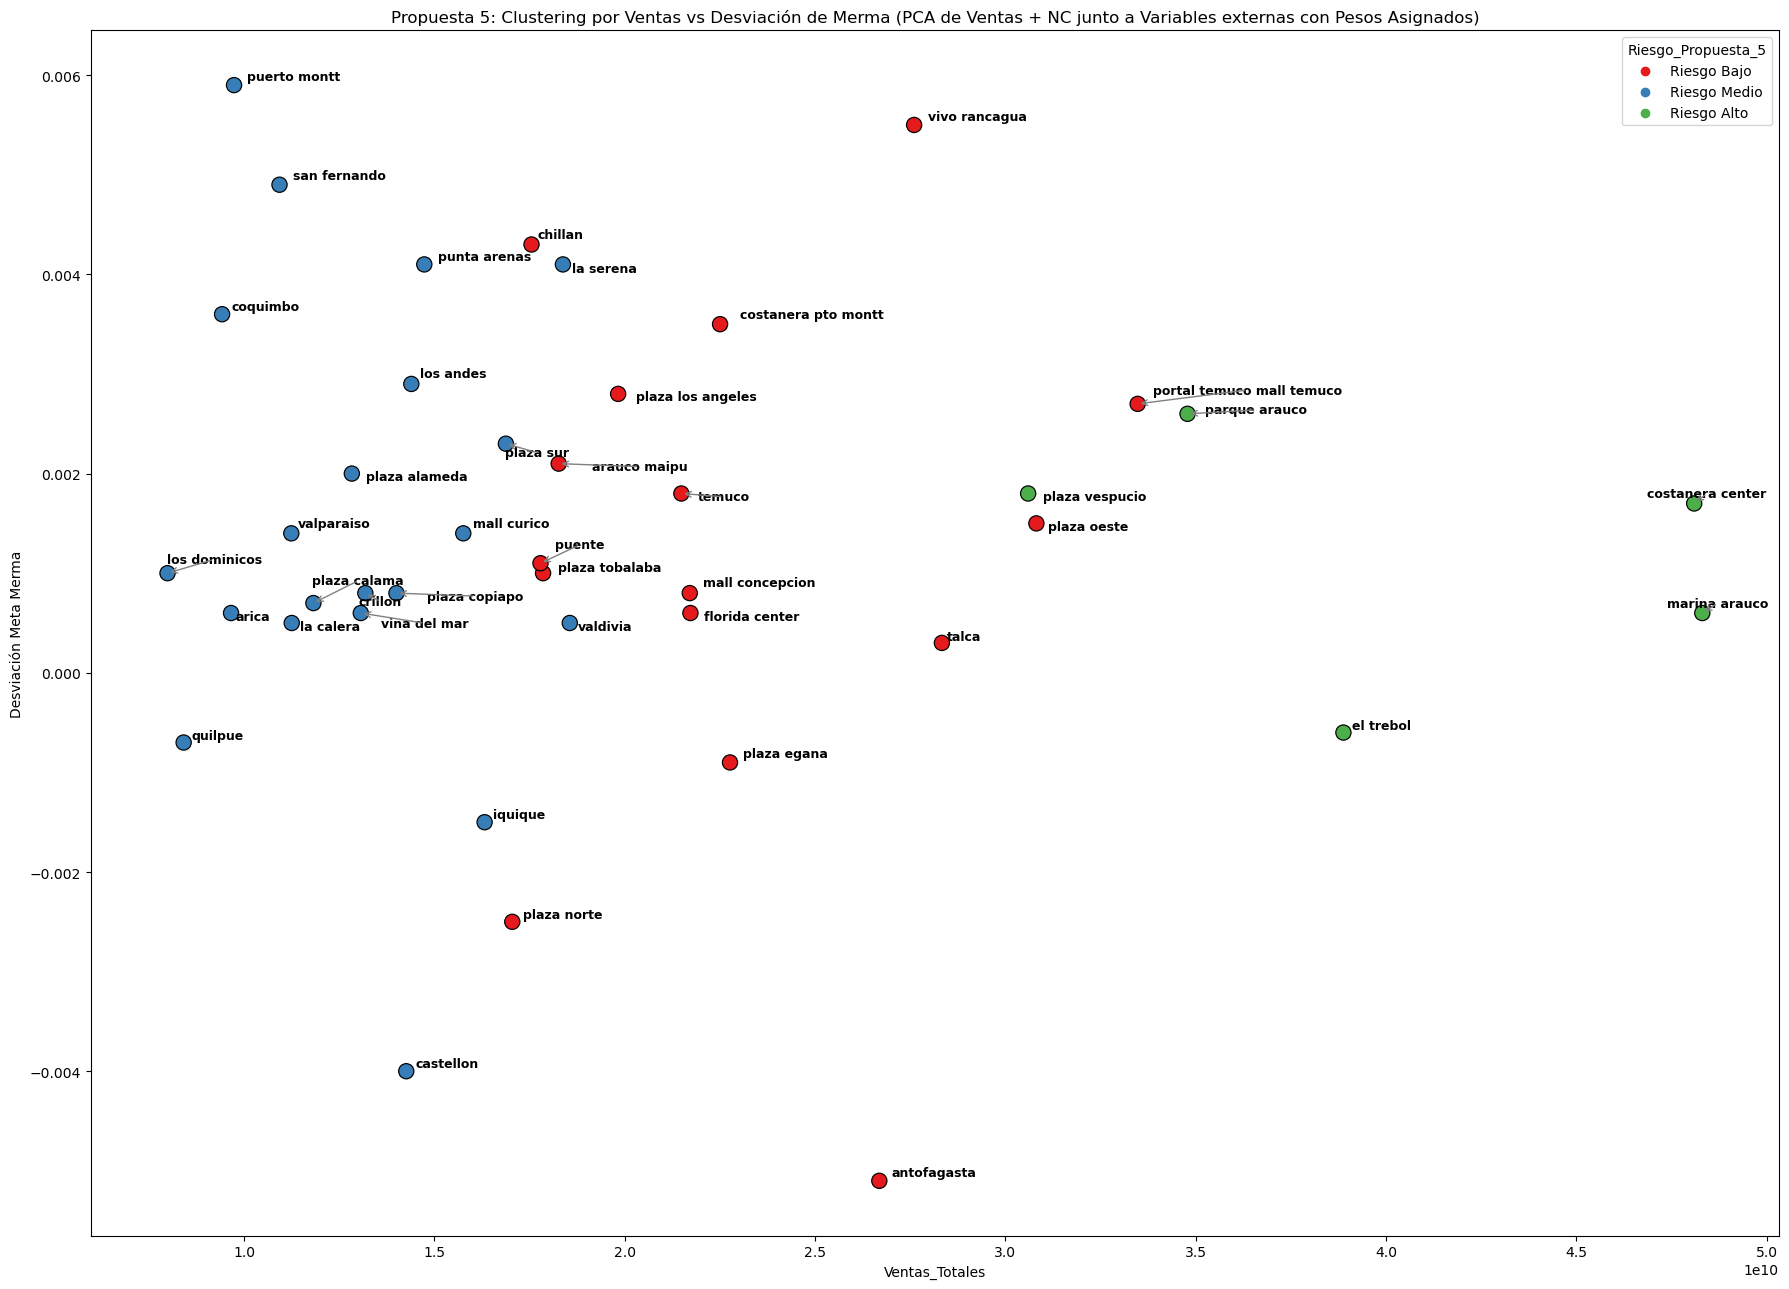


Sucursales en Cluster Riesgo Alto:
['costanera center', 'el trebol', 'marina arauco', 'parque arauco', 'plaza vespucio']

Sucursales en Cluster Riesgo Bajo:
['chillan', 'mall concepcion', 'portal temuco mall temuco', 'antofagasta', 'arauco maipu', 'costanera pto montt', 'florida center', 'plaza egana', 'plaza los angeles', 'plaza norte', 'plaza oeste', 'plaza tobalaba', 'puente', 'talca', 'temuco', 'vivo rancagua']

Sucursales en Cluster Riesgo Medio:
['crillon', 'quilpue', 'valparaiso', 'arica', 'castellon', 'coquimbo', 'iquique', 'la calera', 'la serena', 'los andes', 'los dominicos', 'mall curico', 'plaza alameda', 'plaza calama', 'plaza copiapo', 'plaza sur', 'puerto montt', 'punta arenas', 'san fernando', 'valdivia', 'vina del mar']


In [69]:
from sklearn.decomposition import PCA

Variables_PCA_correlacionadas = ["Ventas_Totales", 'Notas_credito_Monto']



Variables_externas = ["Reclamos_Cantidad", "Desviacion_Meta_Merma", "Merma_Destruccion_Costo", "N° Accidentes", "Productos_Dañados_Descuento"]
Weights_P5 = {
    "PCA_Ventas_Notas": 0.30,
    "Reclamos_Cantidad": 0.10,
    "Desviacion_Meta_Merma": 0.15,
    "Merma_Destruccion_Costo": 0.15,
    "N° Accidentes": 0.08,
    "Productos_Dañados_Descuento": 0.15,
}
Scaler_Min_Max = MinMaxScaler()
Ventas_NC_Scaled = Scaler_Min_Max.fit_transform(df_Kmeans[Variables_PCA_correlacionadas])

## --- Aplicamos PCA 1 sobre Ventas y Notas de Credito ---
PCA_Ventas_NC = PCA(n_components=1, random_state=100)
X_PCA_Ventas_NC = PCA_Ventas_NC.fit_transform(Ventas_NC_Scaled)

## --- Agregamos PC Ventas y NC al DataFrame --- ##
Df_Modelo_PCA_Weights = pd.DataFrame()
Df_Modelo_PCA_Weights["PCA_Ventas_Notas"] = X_PCA_Ventas_NC.flatten()

## ---  Ahora procedemos a escalar las variables externas --- ##
Variables_Externas_Scaled = Scaler_Min_Max.fit_transform(df_Kmeans[Variables_externas])
Df_Variables_Externas_Scaled = pd.DataFrame(Variables_Externas_Scaled, columns=Variables_externas)


for col in Df_Variables_Externas_Scaled.columns:
    Df_Variables_Externas_Scaled[col] *= Weights_P5[col]

Df_Modelo_PCA_Weights['PCA_Ventas_Notas'] *= Weights_P5['PCA_Ventas_Notas']
Df_Modelo_PCA_Weights = pd.concat([Df_Modelo_PCA_Weights, Df_Variables_Externas_Scaled], axis=1)

# --- 4. Verificación previa ---
print("\n📌 Varianza Explicada por el PCA:")
print(PCA_Ventas_NC.explained_variance_ratio_)
print("\n✅ Dataset listo para aplicar K-Means:")
print(Df_Modelo_PCA_Weights.head())

## --- 5. Aplicar K-Means ---
kmeans_p5 = KMeans(n_clusters=K_optimo, random_state=100, n_init= 50, max_iter= 500, algorithm= "lloyd", init= "k-means++")
Clusters_p5 = kmeans_p5.fit_predict(Df_Modelo_PCA_Weights)
df_Kmeans['Cluster_Propuesta_5'] = Clusters_p5

mapping_riesgo_Propuesta_5 = {
    0: "Riesgo Alto",
    1: "Riesgo Medio",
    2: "Riesgo Bajo"
}
df_Kmeans["Riesgo_Propuesta_5"] = df_Kmeans["Cluster_Propuesta_5"].map(mapping_riesgo_Propuesta_5)

Resumen_Cluster_Propuesta_5 = df_Kmeans.groupby('Cluster_Propuesta_5')[Variables_Modelo].mean()

### --- Aplicamos silhouette_score para validar la propuesta 5 ---
score_p5 = silhouette_score(Df_Modelo_PCA_Weights, Clusters_p5)
print(f"\n✅ Silhouette Score Propuesta 5: {score_p5:.4f}")

### --- Aplicamos Test de Medias ANOVA --- ###
resultados_anova_p5 = {}
for var in Variables_Modelo:
    grupos = [grupo[var].values for _, grupo in df_Kmeans.groupby('Cluster_Propuesta_5')]
    stat, p_value = f_oneway(*grupos)
    resultados_anova_p5[var] = round(p_value, 4)
df_anova_p5 = pd.DataFrame.from_dict(resultados_anova_p5, orient='index', columns=['p-valor'])
df_anova_p5['Significativo'] = df_anova_p5['p-valor'] < 0.05
df_anova_p5.index.name = 'Variable'
df_anova_p5.reset_index(inplace=True)
print("\n✅ Resultados del Test de Medias para Propuesta 5 : Clústeres con PCA y Pesos:")
display(df_anova_p5)

# === Visualización básica (ventas vs desviación de merma, por cluster) --- #
plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=df_Kmeans,
    x='Ventas_Totales',
    y='Desviacion_Meta_Merma',
    hue='Riesgo_Propuesta_5',
    palette='Set1',
    s=120,
    edgecolor='black'
)

# Crear una lista para ajustar etiquetas automáticamente
texts_MinMax = []
for i, txt in enumerate(df_Kmeans['Nombre_Sucursal']):
    texts_MinMax.append(
        plt.text(
            df_Kmeans['Ventas_Totales'].iloc[i], 
            df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
# Ajuste automático de etiquetas
adjust_text(texts_MinMax, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Propuesta 5: Clustering por Ventas vs Desviación de Merma (PCA de Ventas + NC junto a Variables externas con Pesos Asignados)')
plt.xlabel('Ventas_Totales')
plt.ylabel('Desviación Meta Merma')
plt.tight_layout()
plt.show()

# --- 9. Mostrar sucursales de cada cluster ---
for c in sorted(df_Kmeans['Riesgo_Propuesta_5'].unique()):
    nombres = df_Kmeans[df_Kmeans['Riesgo_Propuesta_5'] == c]['Nombre_Sucursal'].tolist()
    print(f"\nSucursales en Cluster {c}:")
    print(nombres)



In [70]:
# ==================== PROPUESTA 3 (MinMax + Pesos) — Codigo Generado con Chat GPT Modelo 5 Thinking ====================

# -------- 0) Configuración --------

variables_2024_v8 = [
    "Ventas_Totales", "Notas_credito_Monto",
    "Reclamos_Cantidad", "Desviacion_Meta_Merma",
    "Merma_Destruccion_Costo", "N° Accidentes",
    "Productos_Dañados_Descuento"
]

# Pesos finales (ajusta aquí si Auditoría confirma otra ponderación)
weights_final_v8 = {
    "Ventas_Totales": 0.15,
    "Notas_credito_Monto": 0.15,
    "Desviacion_Meta_Merma": 0.16,
    "Productos_Dañados_Descuento": 0.16,
    "Merma_Destruccion_Costo": 0.16,
    "N° Accidentes": 0.10,
    "Reclamos_Cantidad": 0.10,
}

# Búsqueda de k en el mismo espacio (MinMax + pesos)
k_grid_v8 = [3, 4, 5, 6]
rs_v8 = 42  # unificar semilla

# Columna de sucursal (detección flexible)
cand_cols_v8 = [c for c in df_Kmeans.columns if c.lower() in
                ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
col_sucursal_v8 = cand_cols_v8[0] if cand_cols_v8 else None

# -------- 1) Subset y MinMax --------
X_base_v8 = df_Kmeans[variables_2024_v8].astype(float).copy()

mmx_v8 = MinMaxScaler()
X_scaled_v8 = pd.DataFrame(
    mmx_v8.fit_transform(X_base_v8),
    index=df_Kmeans.index,
    columns=variables_2024_v8
)

# -------- 2) Ponderación geométrica (para K-Means) con sqrt(peso) --------
weights_vec_v8 = np.array([weights_final_v8[v] for v in variables_2024_v8], dtype=float)
weights_sqrt_v8 = np.sqrt(weights_vec_v8)  # asegura contribución ~ peso en distancia euclídea

X_weighted_v8 = X_scaled_v8.values * weights_sqrt_v8

# -------- 3) Selección de k (Silhouette en espacio ponderado) --------
sil_por_k_v8 = {}
for k in k_grid_v8:
    km_tmp_v8 = KMeans(n_clusters=k, n_init=50, random_state=100)
    labels_tmp_v8 = km_tmp_v8.fit_predict(X_weighted_v8)
    sil_tmp_v8 = silhouette_score(X_weighted_v8, labels_tmp_v8)
    sil_por_k_v8[k] = float(sil_tmp_v8)

# Mejor k por Silhouette (si empata, el menor k)
k_optimo_v8 = sorted(sil_por_k_v8.items(), key=lambda x: (-x[1], x[0]))[0][0]

# -------- 4) K-Means final --------
km_p3_v8 = KMeans(n_clusters=3, n_init=50, random_state=100)
labels_p3_v8 = km_p3_v8.fit_predict(X_weighted_v8)

# -------- 5) Risk score (ponderación lineal con pesos) --------
# Nota: aquí usamos PESO (no sqrt) para el score operativo
risk_matrix_v8 = X_scaled_v8.copy()
for col, w in weights_final_v8.items():
    risk_matrix_v8[col] = risk_matrix_v8[col] * w
risk_score_v8 = risk_matrix_v8.sum(axis=1)

# -------- 6) Etiquetado automático por riesgo --------
df_tmp_v8 = pd.DataFrame({"cluster_id": labels_p3_v8, "risk": risk_score_v8})
means_v8 = df_tmp_v8.groupby("cluster_id")["risk"].mean().sort_values()  # ascendente
rank_map_v8 = {cid: rank for rank, cid in enumerate(means_v8.index)}      # 0= bajo ... 2= alto (si k=3)
label_map_v8 = {0:"Riesgo Bajo", 1:"Riesgo Medio", 2:"Riesgo Alto", 3:"Riesgo Muy Alto"}

cluster_rank_v8 = df_tmp_v8["cluster_id"].map(rank_map_v8)
cluster_label_v8 = cluster_rank_v8.map(label_map_v8)

# -------- 7) Reporte final --------
reporte_cols_base_v8 = [col_sucursal_v8] if col_sucursal_v8 else []
reporte_p3_v8 = pd.concat([
    df_Kmeans[reporte_cols_base_v8],
    pd.DataFrame({
        "Cluster_P3_MinMax_Pesos": labels_p3_v8,
        "Riesgo_P3_MinMax_Pesos": cluster_label_v8.values,
        "RiskScore_P3": risk_score_v8.values
    }, index=df_Kmeans.index),
    X_base_v8
], axis=1)

# -------- 8) Perfil de clústeres --------
perfil_p3_v8 = (reporte_p3_v8
                .groupby("Riesgo_P3_MinMax_Pesos")[variables_2024_v8]
                .mean())

# Ajuste de redondeo (coherente con tu notebook)
perfil_p3_v8 = perfil_p3_v8.copy()
for c in perfil_p3_v8.columns:
    perfil_p3_v8[c] = perfil_p3_v8[c].round(5 if c == "Desviacion_Meta_Merma" else 2)

# -------- 9) Top sucursales a auditar (dentro del riesgo más alto) --------
if cluster_label_v8.isin(["Riesgo Alto","Riesgo Muy Alto"]).any():
    nivel_top_v8 = "Riesgo Muy Alto" if "Riesgo Muy Alto" in cluster_label_v8.values else "Riesgo Alto"
    mask_top_v8 = (cluster_label_v8.values == nivel_top_v8)
    top_rank_v8 = (reporte_p3_v8.loc[mask_top_v8]
                   .sort_values("RiskScore_P3", ascending=False)
                   .head(10))
else:
    # Si no hay etiqueta "Alto/Muy Alto" por k pequeño -> tomar el top global
    top_rank_v8 = (reporte_p3_v8
                   .sort_values("RiskScore_P3", ascending=False)
                   .head(10))

# Prints de control (conservadores, no muy verbosos)
print("\n=== Propuesta 3 — MinMax + Pesos (v8) ===")
print(f"Silhouette por k: {sil_por_k_v8}")
print(f"k óptimo: {k_optimo_v8}")
print("\n-- Perfil por nivel de riesgo --")
print(perfil_p3_v8)
if col_sucursal_v8:
    print("\n-- Top 10 sucursales para auditoría (según RiskScore_P3) --")
    print(top_rank_v8[[col_sucursal_v8, "Riesgo_P3_MinMax_Pesos", "RiskScore_P3"]].to_string(index=False))
else:
    print("\n(Nota) No se detectó columna de sucursal; se listan índices.")
    print(top_rank_v8[["Riesgo_P3_MinMax_Pesos", "RiskScore_P3"]].to_string(index=False))


=== Propuesta 3 — MinMax + Pesos (v8) ===
Silhouette por k: {3: 0.24045197918359912, 4: 0.262383158991708, 5: 0.21198638287065216, 6: 0.20447885899637538}
k óptimo: 4

-- Perfil por nivel de riesgo --
                             Ventas_Totales  Notas_credito_Monto  \
Riesgo_P3_MinMax_Pesos                                             
Riesgo Alto            39,868,229,723.00000  1,242,723,012.40000   
Riesgo Bajo            12,642,934,711.00000    352,685,958.89000   
Riesgo Medio           22,181,384,923.94000    722,432,892.94000   

                        Reclamos_Cantidad  Desviacion_Meta_Merma  \
Riesgo_P3_MinMax_Pesos                                             
Riesgo Alto                      18.80000                0.00124   
Riesgo Bajo                      11.63000                0.00162   
Riesgo Medio                     25.22000                0.00114   

                        Merma_Destruccion_Costo  N° Accidentes  \
Riesgo_P3_MinMax_Pesos                            

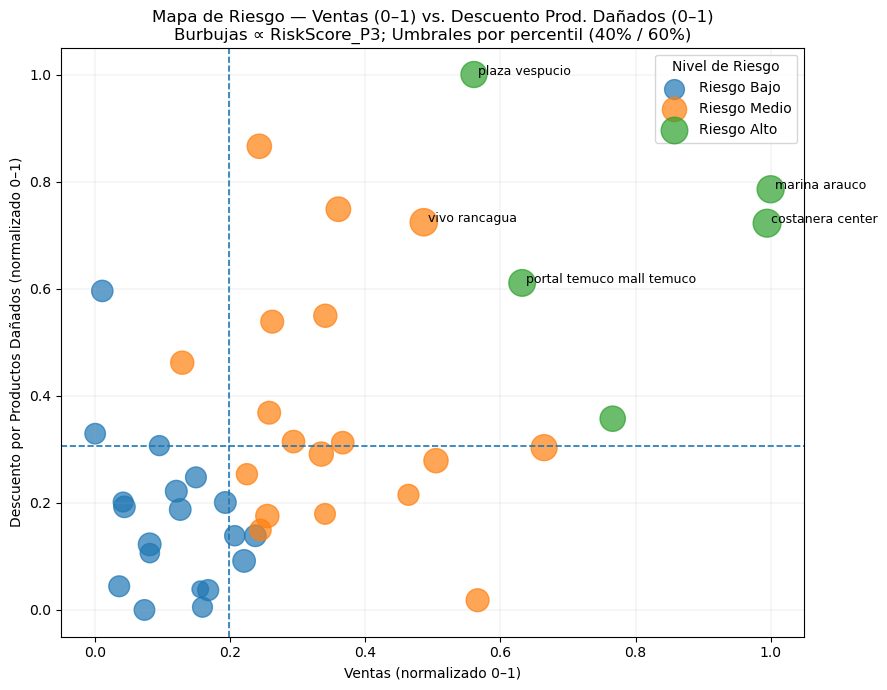

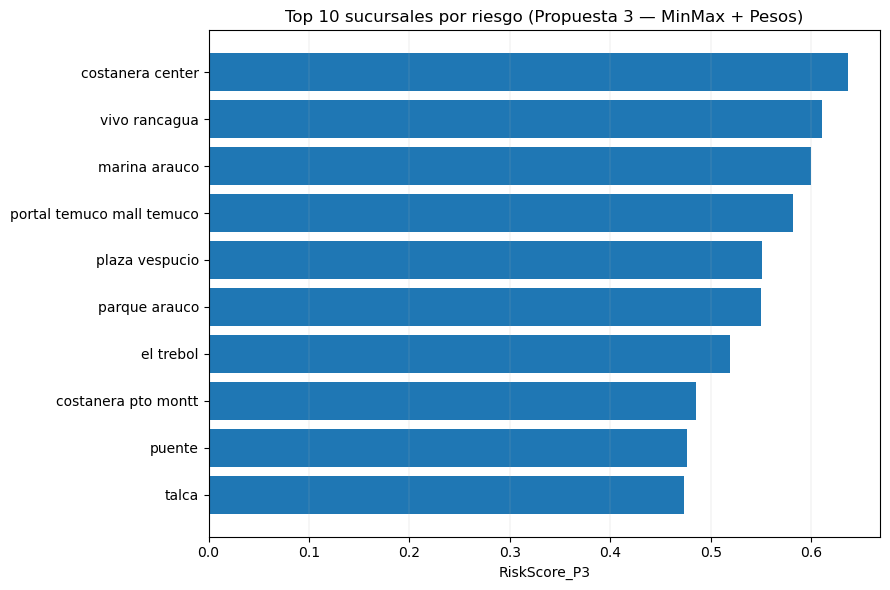

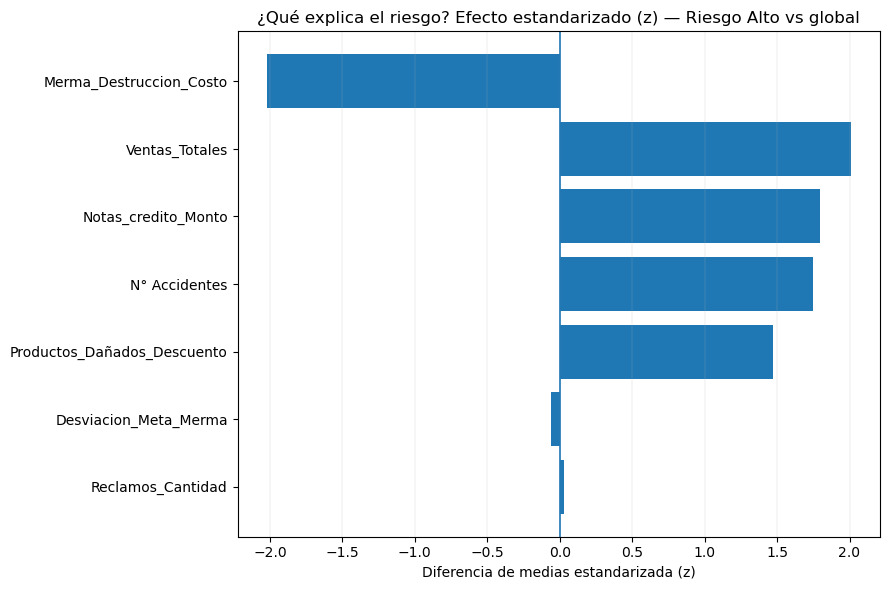


Listo. Imágenes guardadas:
  - 1_mapa_riesgo_2D_v9.png
  - 2_top10_risk_v9.png
  - 3_contribucion_variables_v9.png


In [71]:
# ==================== Visuales Gerenciales — v9 ====================
# Requisitos previos en tu entorno:

# ------- 0) Chequeos suaves -------
if 'reporte_p3_v8' not in globals():
    raise RuntimeError("No encuentro 'reporte_p3_v8'. Ejecuta primero la Propuesta 3 (v8).")

# Detectar columna de sucursal si no quedó en variable
if 'col_sucursal_v8' not in globals() or col_sucursal_v8 is None or col_sucursal_v8 not in reporte_p3_v8.columns:
    cand_cols_v9 = [c for c in reporte_p3_v8.columns if c.lower() in
                    ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_sucursal_v9 = cand_cols_v9[0] if cand_cols_v9 else None
else:
    col_sucursal_v9 = col_sucursal_v8

# ------- 1) Mapa de riesgo 2D (Ventas vs. Desc. Productos Dañados) -------
df_plot_v9 = reporte_p3_v8.copy()

# Normalización simple 0-1 local (sin repetir MinMaxScaler)
ventas_min_v9, ventas_max_v9 = df_plot_v9['Ventas_Totales'].min(), df_plot_v9['Ventas_Totales'].max()
desc_min_v9,   desc_max_v9   = df_plot_v9['Productos_Dañados_Descuento'].min(), df_plot_v9['Productos_Dañados_Descuento'].max()

df_plot_v9['Ventas_norm_v9'] = (df_plot_v9['Ventas_Totales'] - ventas_min_v9) / (ventas_max_v9 - ventas_min_v9 + 1e-12)
df_plot_v9['DescPD_norm_v9'] = (df_plot_v9['Productos_Dañados_Descuento'] - desc_min_v9) / (desc_max_v9 - desc_min_v9 + 1e-12)

# Umbrales por percentil gerencial (ajustables)
ventas_pct_v9 = df_plot_v9['Ventas_norm_v9'].quantile(0.4)  # baja venta = percentil 40
desc_pct_v9   = df_plot_v9['DescPD_norm_v9'].quantile(0.6)  # alto desc = percentil 60

# Orden deseado de riesgo en leyenda (si falta alguno, se omite automáticamente)
orden_riesgo_v9 = ["Riesgo Bajo","Riesgo Medio","Riesgo Alto","Riesgo Muy Alto"]

plt.figure(figsize=(9,7))
for nivel in orden_riesgo_v9:
    mask_nivel_v9 = (df_plot_v9['Riesgo_P3_MinMax_Pesos'] == nivel)
    if mask_nivel_v9.any():
        plt.scatter(
            df_plot_v9.loc[mask_nivel_v9,'Ventas_norm_v9'],
            df_plot_v9.loc[mask_nivel_v9,'DescPD_norm_v9'],
            s=(df_plot_v9.loc[mask_nivel_v9,'RiskScore_P3']*600 + 20),  # burbuja ~ riesgo
            alpha=0.70,
            label=nivel
        )

# Líneas de umbral (cuadrante de alerta)
plt.axvline(ventas_pct_v9, linestyle='--', linewidth=1.2)
plt.axhline(desc_pct_v9,   linestyle='--', linewidth=1.2)

# Anotar top-5 por riesgo (evita saturar)
top5_idx_v9 = df_plot_v9['RiskScore_P3'].nlargest(5).index
for i in top5_idx_v9:
    x_i, y_i = df_plot_v9.at[i,'Ventas_norm_v9'], df_plot_v9.at[i,'DescPD_norm_v9']
    etiqueta_i = str(df_plot_v9.at[i, col_sucursal_v9]) if col_sucursal_v9 else f"idx {i}"
    plt.text(x_i, y_i, f" {etiqueta_i}", fontsize=9)

plt.title("Mapa de Riesgo — Ventas (0–1) vs. Descuento Prod. Dañados (0–1)\nBurbujas ∝ RiskScore_P3; Umbrales por percentil (40% / 60%)")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("Descuento por Productos Dañados (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("1_mapa_riesgo_2D_v9.png", dpi=300, bbox_inches='tight')
plt.show()

# ------- 2) Top 10 sucursales por RiskScore_P3 (barras horizontales) -------
top10_v9 = df_plot_v9.sort_values('RiskScore_P3', ascending=False).head(10).copy()
etqs_v9 = (top10_v9[col_sucursal_v9].astype(str).values if col_sucursal_v9 else [f"idx {i}" for i in top10_v9.index])

plt.figure(figsize=(9,6))
plt.barh(range(len(top10_v9)), top10_v9['RiskScore_P3'].values)
plt.yticks(range(len(top10_v9)), etqs_v9)
plt.gca().invert_yaxis()  # mayor arriba
plt.xlabel("RiskScore_P3")
plt.title("Top 10 sucursales por riesgo (Propuesta 3 — MinMax + Pesos)")
plt.grid(True, axis='x', linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("2_top10_risk_v9.png", dpi=300, bbox_inches='tight')
plt.show()

# ------- 3) Contribución por variable (alto/muy alto vs global) -------
# Elegimos el grupo más riesgoso disponible
if (df_plot_v9['Riesgo_P3_MinMax_Pesos'] == "Riesgo Muy Alto").any():
    target_lvl_v9 = "Riesgo Muy Alto"
elif (df_plot_v9['Riesgo_P3_MinMax_Pesos'] == "Riesgo Alto").any():
    target_lvl_v9 = "Riesgo Alto"
else:
    # fallback: el mayor promedio de RiskScore_P3 por etiqueta presente
    medios_v9 = df_plot_v9.groupby('Riesgo_P3_MinMax_Pesos')['RiskScore_P3'].mean()
    target_lvl_v9 = medios_v9.idxmax()

vars_eval_v9 = [
    "Ventas_Totales","Notas_credito_Monto","Reclamos_Cantidad",
    "Desviacion_Meta_Merma","Merma_Destruccion_Costo",
    "N° Accidentes","Productos_Dañados_Descuento"
]

# Estandarizar cada variable (z-score) para comparabilidad en una sola barra
mu_v9 = df_plot_v9[vars_eval_v9].mean()
sd_v9 = df_plot_v9[vars_eval_v9].std().replace(0, 1e-12)
mu_target_v9 = df_plot_v9.loc[df_plot_v9['Riesgo_P3_MinMax_Pesos']==target_lvl_v9, vars_eval_v9].mean()

smd_v9 = ((mu_target_v9 - mu_v9) / sd_v9).sort_values(key=np.abs, ascending=True)  # orden por |efecto|
y_pos_v9 = np.arange(len(smd_v9))

plt.figure(figsize=(9,6))
plt.barh(y_pos_v9, smd_v9.values)
plt.yticks(y_pos_v9, smd_v9.index)
plt.axvline(0, linewidth=1.2)
plt.title(f"¿Qué explica el riesgo? Efecto estandarizado (z) — {target_lvl_v9} vs global")
plt.xlabel("Diferencia de medias estandarizada (z)")
plt.grid(True, axis='x', linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("3_contribucion_variables_v9.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nListo. Imágenes guardadas:")
print("  - 1_mapa_riesgo_2D_v9.png")
print("  - 2_top10_risk_v9.png")
print("  - 3_contribucion_variables_v9.png")


Cargaduras del eje Y (si PCA):
Productos_Dañados_Descuento    0.75600
Merma_Destruccion_Costo       -0.65400
Desviacion_Meta_Merma          0.00000
dtype: float64

Top consenso 'Riesgo Alto' (cuántos paneles 2×2 los clasifican como Alto):
           Sucursal  Cuenta_paneles_alto
      marina arauco                    4
              talca                    4
     plaza vespucio                    4
          la serena                    4
             puente                    4
     florida center                    4
          el trebol                    4
   costanera center                    4
costanera pto montt                    4
           valdivia                    4

Listo: tablero guardado como 'tablero_cuadrantes_PCAy_v12.png'


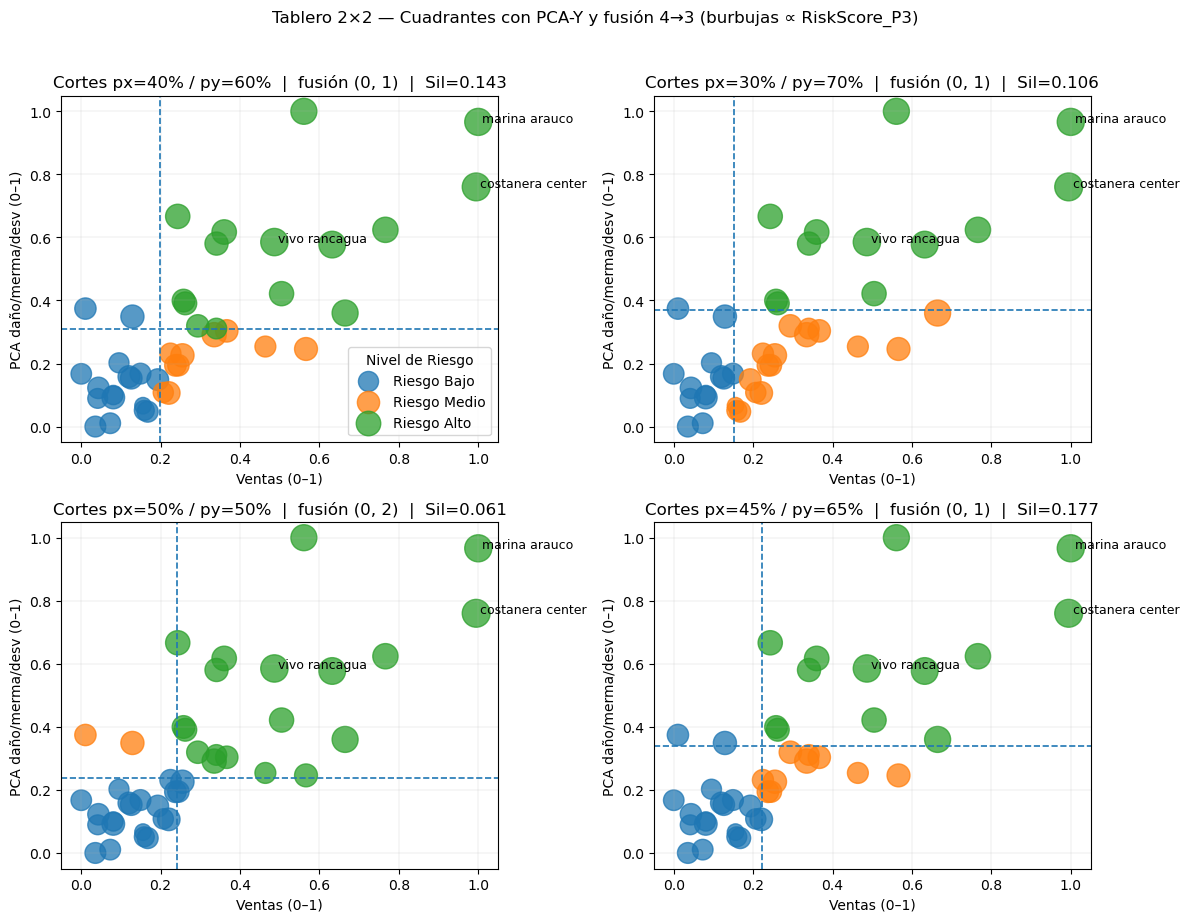

In [72]:
# ==================== Tablero 2×2 cuadrantes con PCA-Y — v12 ====================

# ---------- helpers de ejes ----------
def _build_axis01_v12(spec, X_scaled_df, reporte_df, risk_vec):
    """
    Crea un eje normalizado 0–1 a partir de:
      - {'type':'var', 'name': 'Ventas_Totales', 'label': 'Ventas'}
      - {'type':'pca', 'vars': [...], 'label': 'PCA(daño/merma/desv)'}
      - {'type':'composite', 'vars': {'col1':0.5,'col2':0.3,...}, 'label':'Mixto'}
    Devuelve: arr_01 (np.array), meta (dict con 'label' y 'loadings' si PCA)
    """
    t = spec.get('type','var')
    label = spec.get('label')
    if t == 'var':
        col = spec['name']
        s = reporte_df[col].astype(float)
        vmin, vmax = float(s.min()), float(s.max())
        arr01 = (s - vmin) / (vmax - vmin + 1e-12)
        return arr01.values, {'label': label or col, 'loadings': None}

    elif t == 'pca':
        cols = spec['vars']
        arr = X_scaled_df[cols].values
        p = PCA(n_components=1, random_state=42)
        pc1 = p.fit_transform(arr).ravel()
        # orientar al riesgo
        import numpy as _np
        if _np.corrcoef(pc1, risk_vec)[0,1] < 0:
            pc1 = -pc1
            comps = -p.components_[0]
        else:
            comps = p.components_[0]
        pc_min, pc_max = float(pc1.min()), float(pc1.max())
        pc01 = (pc1 - pc_min) / (pc_max - pc_min + 1e-12)
        return pc01, {'label': label or f"PCA({'+'.join(cols)})", 'loadings': pd.Series(comps, index=cols)}

    elif t == 'composite':
        # mezcla lineal de features escaladas MinMax
        weights = spec['vars']  # dict {col: peso}
        s = None
        for c, w in weights.items():
            v = X_scaled_df[c] * float(w)
            s = v if s is None else (s + v)
        vals = s.values
        vmin, vmax = float(vals.min()), float(vals.max())
        arr01 = (vals - vmin) / (vmax - vmin + 1e-12)
        return arr01, {'label': label or 'Composite', 'loadings': pd.Series(weights)}
    else:
        raise ValueError("spec['type'] debe ser 'var', 'pca' o 'composite'.")

def _quad_labels_v12(x01, y01, px, py):
    tx = float(pd.Series(x01).quantile(px))
    ty = float(pd.Series(y01).quantile(py))
    q = np.where((x01<=tx) & (y01<=ty), 0,
        np.where((x01<=tx) & (y01>ty), 1,
        np.where((x01>tx)  & (y01<=ty), 2, 3)))
    return q, tx, ty

def _merge_4to3_auto_v12(quads, X_weighted):  # max Silhouette en espacio P3 (MinMax + √peso)
    from itertools import combinations
    best = (-1.0, None, None)
    for a,b in combinations([0,1,2,3], 2):
        keep = [q for q in [0,1,2,3] if q not in (a,b)]
        mapping = {a:0, b:0, keep[0]:1, keep[1]:2}
        labels3 = pd.Series(quads).map(mapping).astype(int).values
        try:
            s = float(silhouette_score(X_weighted, labels3))
        except Exception:
            s = -1.0
        if s > best[0]:
            best = (s, mapping, (a,b))
    return best  # (sil, mapping, pair)

# ---------- especificación de ejes (puedes cambiarlas sin tocar el resto) ----------
x_spec_v12 = {'type':'var', 'name':'Ventas_Totales', 'label':'Ventas (0–1)'}
y_spec_v12 = {'type':'pca',
              'vars':['Productos_Dañados_Descuento','Merma_Destruccion_Costo','Desviacion_Meta_Merma'],
              'label':'PCA daño/merma/desv (0–1)'}

# ---------- construir ejes 0–1 ----------
risk_v12 = reporte_p3_v8['RiskScore_P3'].values
x01_v12, meta_x_v12 = _build_axis01_v12(x_spec_v12, X_scaled_v8, reporte_p3_v8, risk_v12)
y01_v12, meta_y_v12 = _build_axis01_v12(y_spec_v12, X_scaled_v8, reporte_p3_v8, risk_v12)

print("\nCargaduras del eje Y (si PCA):")
print(meta_y_v12['loadings'].round(3) if meta_y_v12['loadings'] is not None else "—")

# ---------- tablero 2×2 de percentiles ----------
# puedes cambiar estos cortes para replicar exactamente los “cuadritos” de la recomendación
cuts_grid_v12 = [(0.40,0.60), (0.30,0.70), (0.50,0.50), (0.45,0.65)]

# espacio para Silhouette (mismo que P3 K-Means: MinMax + √peso)
X_weighted_v12 = X_scaled_v8.values * weights_sqrt_v8

# columna de sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_suc_v12 = col_sucursal_v8
else:
    cands = [c for c in reporte_p3_v8.columns if c.lower() in
             ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v12 = cands[0] if cands else None

# tablero
import matplotlib.pyplot as plt
fig_v12, axes_v12 = plt.subplots(2, 2, figsize=(12, 9))
panel_labels_v12 = []

# para consenso de “Riesgo Alto” entre paneles
consenso_alto_v12 = pd.Series(0, index=reporte_p3_v8.index)

for idx, (px,py) in enumerate(cuts_grid_v12):
    ax = axes_v12[idx//2, idx%2]
    quads, tx, ty = _quad_labels_v12(x01_v12, y01_v12, px, py)
    sil, mapping, pair = _merge_4to3_auto_v12(quads, X_weighted_v12)
    labels3 = pd.Series(quads).map(mapping).astype(int).values

    # ordenar riesgo por media de RiskScore_P3
    means = pd.Series(risk_v12).groupby(labels3).mean().sort_values()
    name_map = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                for i, cid in enumerate(means.index)}
    riesgo = pd.Series(labels3).map(name_map).values

    # marcador de consenso
    consenso_alto_v12 += (pd.Series(riesgo)=="Riesgo Alto").astype(int)

    # scatter
    for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
        m = (riesgo == lvl)
        if m.any():
            ax.scatter(x01_v12[m], y01_v12[m],
                       s=(reporte_p3_v8.loc[m,'RiskScore_P3']*600 + 20),
                       alpha=0.75, label=lvl)
    ax.axvline(tx, linestyle='--', linewidth=1.2)
    ax.axhline(ty, linestyle='--', linewidth=1.2)
    ax.set_xlabel(meta_x_v12['label'])
    ax.set_ylabel(meta_y_v12['label'])
    ax.grid(True, linewidth=0.3, alpha=0.5)

    # Top-3 anotados
    top3_idx = reporte_p3_v8['RiskScore_P3'].nlargest(3).index
    for i in top3_idx:
        name_i = str(reporte_p3_v8.at[i,col_suc_v12]) if col_suc_v12 else f"idx {i}"
        ax.text(x01_v12[i], y01_v12[i], f" {name_i}", fontsize=9)

    # título del panel
    ax.set_title(f"Cortes px={int(px*100)}% / py={int(py*100)}%  |  fusión {pair}  |  Sil={sil:.3f}")
    if idx == 0:
        ax.legend(title="Nivel de Riesgo", frameon=True)

plt.suptitle("Tablero 2×2 — Cuadrantes con PCA-Y y fusión 4→3 (burbujas ∝ RiskScore_P3)", y=1.02, fontsize=12)
plt.tight_layout()
plt.savefig("tablero_cuadrantes_PCAy_v12.png", dpi=300, bbox_inches='tight')
# plt.show()

# -------- salidas adicionales útiles --------
# 1) Top sucursales con mayor consenso como 'Riesgo Alto' entre los cuatro paneles
top_consenso_v12 = (consenso_alto_v12.sort_values(ascending=False).head(10))
print("\nTop consenso 'Riesgo Alto' (cuántos paneles 2×2 los clasifican como Alto):")
if col_suc_v12:
    print(pd.DataFrame({
        'Sucursal': reporte_p3_v8.loc[top_consenso_v12.index, col_suc_v12].astype(str).values,
        'Cuenta_paneles_alto': top_consenso_v12.values
    }).to_string(index=False))
else:
    print(pd.DataFrame({'Index': top_consenso_v12.index.astype(str).values,
                        'Cuenta_paneles_alto': top_consenso_v12.values}).to_string(index=False))

# 2) Guardamos una tabla base con X/Y normalizados y etiquetas del primer panel (por si quieres auditar)
df_xylabels_v12 = pd.DataFrame({
    'X01_v12': x01_v12, 'Y01_v12': y01_v12
}, index=reporte_p3_v8.index)
# df_xylabels_v12.to_excel("xy_labels_panel1_v12.xlsx", index=False)  # opcional
print("\nListo: tablero guardado como 'tablero_cuadrantes_PCAy_v12.png'")


Cargaduras del eje Y (PCA orientado a riesgo):
Productos_Dañados_Descuento    0.75600
Merma_Destruccion_Costo       -0.65400
Desviacion_Meta_Merma          0.00000
dtype: float64

Fusión elegida 4→3 por Silhouette (espacio P3): pares (0, 1) → Silhouette=0.1431
Mapa cuadrante→cluster3: {0: 0, 1: 0, 2: 1, 3: 2}
Orden de riesgo: {0: 'Riesgo Bajo', 1: 'Riesgo Medio', 2: 'Riesgo Alto'}

Distribución por cuadrante (PCA-Y):
Q3 (X>tx,Y>ty)    15
Q0 (X≤tx,Y≤ty)    15
Q2 (X>tx,Y≤ty)    10
Q1 (X≤tx,Y>ty)     2

Concordancia Q3-PCA (regla) vs P3 (K-Means):
P3 (K-Means)    0   1   2
Q3-PCA (regla)           
0               0   1  16
1               0   7   3
2               5  10   0


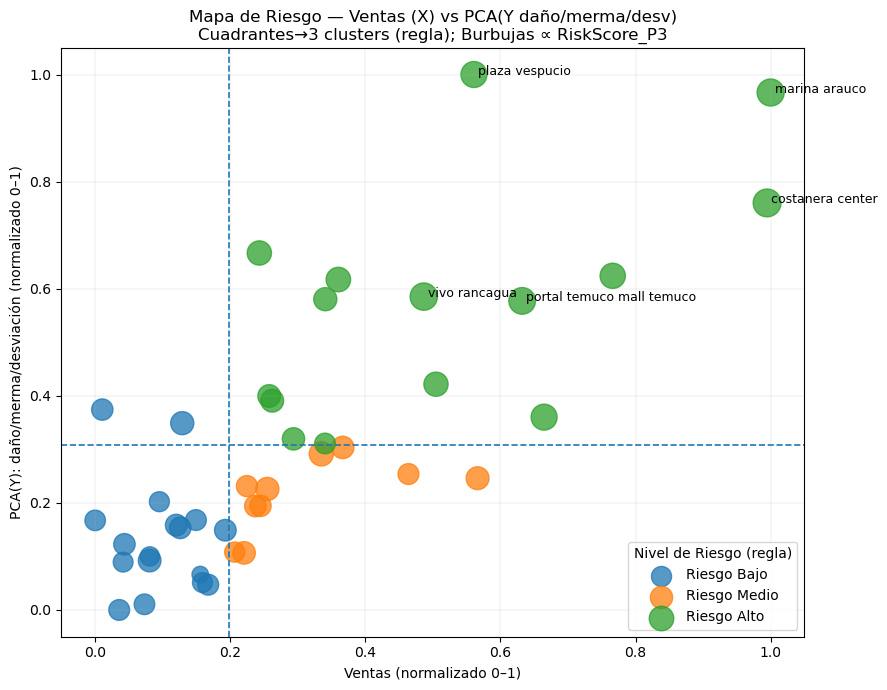

In [73]:
# ==================== Ventas vs PCA(Y) + cuadrantes→3 clusters (v11) ====================
# Requisitos previos en tu entorno (ya creados por v8/v9):
# - Df_Kmeans
# - X_scaled_v8  (MinMax de las 7 variables 2024)
# - weights_final_v8, weights_sqrt_v8
# - reporte_p3_v8 (con RiskScore_P3)
# - matplotlib.pyplot as plt, pandas as pd, numpy as np, silhouette_score disponibles
# - PCA ya importado (si no, el código lo avisará)

# -------- 0) Chequeos --------
missing_v11 = [nm for nm in ['X_scaled_v8','weights_final_v8','weights_sqrt_v8','reporte_p3_v8'] if nm not in globals()]
if missing_v11:
    raise RuntimeError(f"Faltan objetos previos: {missing_v11}. Ejecuta antes la Propuesta 3 (v8).")
if 'PCA' not in globals():
    raise RuntimeError("No encuentro PCA. Importa una vez: from sklearn.decomposition import PCA")

# Columna sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_sucursal_v11 = col_sucursal_v8
else:
    cands_v11 = [c for c in reporte_p3_v8.columns if c.lower() in
                 ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_sucursal_v11 = cands_v11[0] if cands_v11 else None

# -------- 1) Construcción del eje Y con PCA sobre 3 variables de calidad de control --------
vars_y_v11 = ["Productos_Dañados_Descuento", "Merma_Destruccion_Costo", "Desviacion_Meta_Merma"]

# Tomamos las 3 columnas ya MinMax-escaladas del X_scaled_v8
tri_scaled_v11 = X_scaled_v8[vars_y_v11].copy()

# PCA(1) para condensar daño/merma/desv
pca_y_v11 = PCA(n_components=1, random_state=42)
pc1_y_v11 = pca_y_v11.fit_transform(tri_scaled_v11.values).ravel()

# Orientación pro-riesgo: si correlaciona negativo con el RiskScore_P3, invertimos el signo
risk_v11 = reporte_p3_v8['RiskScore_P3'].values
corr_v11 = np.corrcoef(pc1_y_v11, risk_v11)[0,1]
if corr_v11 < 0:
    pc1_y_v11 = -pc1_y_v11

# Normalizar a 0–1 para trazar umbrales percentiles (igual que en Ventas)
pc1_min_v11, pc1_max_v11 = float(pc1_y_v11.min()), float(pc1_y_v11.max())
pc1_01_v11 = (pc1_y_v11 - pc1_min_v11) / (pc1_max_v11 - pc1_min_v11 + 1e-12)

# Cargaduras (para interpretar el eje Y en la slide)
loadings_y_v11 = pd.Series(pca_y_v11.components_[0], index=vars_y_v11)
if corr_v11 < 0:
    loadings_y_v11 = -loadings_y_v11
print("\nCargaduras del eje Y (PCA orientado a riesgo):")
print(loadings_y_v11.round(3))

# -------- 2) Eje X = Ventas normalizado 0–1 (como en v9) --------
ventas_abs_v11 = reporte_p3_v8['Ventas_Totales'].astype(float)
vmin_v11, vmax_v11 = float(ventas_abs_v11.min()), float(ventas_abs_v11.max())
ventas_01_v11 = (ventas_abs_v11 - vmin_v11) / (vmax_v11 - vmin_v11 + 1e-12)

# -------- 3) Umbrales de cuadrantes (ajustables) --------
# Nota: puedes mover 0.40/0.60 si gerencia pide otro corte.
pv_x_v11 = 0.40
pv_y_v11 = 0.60
tx_v11 = float(pd.Series(ventas_01_v11).quantile(pv_x_v11))
ty_v11 = float(pd.Series(pc1_01_v11).quantile(pv_y_v11))

# -------- 4) Etiquetas de cuadrante (4 clases) --------
# Q0: X<=tx & Y<=ty ; Q1: X<=tx & Y>ty ; Q2: X>tx & Y<=ty ; Q3: X>tx & Y>ty
quad_lbl_v11 = np.where((ventas_01_v11<=tx_v11) & (pc1_01_v11<=ty_v11), 0,
                 np.where((ventas_01_v11<=tx_v11) & (pc1_01_v11> ty_v11), 1,
                 np.where((ventas_01_v11> tx_v11) & (pc1_01_v11<=ty_v11), 2, 3)))

# -------- 5) Elegir la mejor fusión 4→3 según Silhouette en el espacio P3 (MinMax + √peso) --------
from itertools import combinations
X_weighted_v11 = X_scaled_v8.values * weights_sqrt_v8  # mismo espacio que K-Means P3

def _sil_4to3_v11(pair):
    # pair=(a,b) fusiona los cuadrantes a y b en un mismo cluster
    keep = [q for q in [0,1,2,3] if q not in pair]
    mapping = {pair[0]:0, pair[1]:0, keep[0]:1, keep[1]:2}
    labels3 = pd.Series(quad_lbl_v11).map(mapping).values
    try:
        from sklearn.metrics import silhouette_score
        s = float(silhouette_score(X_weighted_v11, labels3))
    except Exception:
        s = -1.0
    return s, mapping

cands_merge_v11 = list(combinations([0,1,2,3], 2))
scores_maps_v11 = [(_sil_4to3_v11(p), p) for p in cands_merge_v11]
(best_sil_v11, best_map_v11), best_pair_v11 = max(scores_maps_v11, key=lambda x: x[0][0])
labels3_v11 = pd.Series(quad_lbl_v11).map(best_map_v11).astype(int).values

# Orden de riesgo por media de RiskScore_P3
means3_v11 = pd.Series(risk_v11).groupby(labels3_v11).mean().sort_values()
rank2name_v11 = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                 for i, cid in enumerate(means3_v11.index)}
riesgo3_v11 = pd.Series(labels3_v11).map(rank2name_v11).values

print(f"\nFusión elegida 4→3 por Silhouette (espacio P3): pares {best_pair_v11} → Silhouette={best_sil_v11:.4f}")
print("Mapa cuadrante→cluster3:", best_map_v11)
print("Orden de riesgo:", rank2name_v11)

# -------- 6) DataFrame final y gráfico --------
df_plane_v11 = reporte_p3_v8.copy()
df_plane_v11['Ventas_01_v11'] = ventas_01_v11.values
df_plane_v11['PCAy_01_v11']   = pc1_01_v11
df_plane_v11['Cluster_Q3PCA_v11'] = labels3_v11
df_plane_v11['Riesgo_Q3PCA_v11']  = riesgo3_v11

# Top-5 por riesgo (para anotar en el gráfico)
top5_idx_v11 = df_plane_v11['RiskScore_P3'].nlargest(5).index

import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (df_plane_v11['Riesgo_Q3PCA_v11'] == lvl)
    if m.any():
        plt.scatter(df_plane_v11.loc[m,'Ventas_01_v11'],
                    df_plane_v11.loc[m,'PCAy_01_v11'],
                    s=(df_plane_v11.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.75, label=lvl)

# Líneas de corte
plt.axvline(tx_v11, linestyle='--', linewidth=1.2)
plt.axhline(ty_v11, linestyle='--', linewidth=1.2)

# Anotar top-5
for i in top5_idx_v11:
    x_i = df_plane_v11.at[i,'Ventas_01_v11']
    y_i = df_plane_v11.at[i,'PCAy_01_v11']
    name_i = str(df_plane_v11.at[i,col_sucursal_v11]) if col_sucursal_v11 else f"idx {i}"
    plt.text(x_i, y_i, f" {name_i}", fontsize=9)

plt.title("Mapa de Riesgo — Ventas (X) vs PCA(Y daño/merma/desv)\nCuadrantes→3 clusters (regla); Burbujas ∝ RiskScore_P3")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("PCA(Y): daño/merma/desviación (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo (regla)", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("mapa_PCAy_cuadrantes_3clusters_v11.png", dpi=300, bbox_inches='tight')
# plt.show()

# -------- 7) (Opcional) Tabla de cuadrantes y comparación con K-Means P3 --------
quad_names_v11 = {0:"Q0 (X≤tx,Y≤ty)", 1:"Q1 (X≤tx,Y>ty)", 2:"Q2 (X>tx,Y≤ty)", 3:"Q3 (X>tx,Y>ty)"}
tabla_quads_v11 = pd.Series(quad_lbl_v11).map(quad_names_v11).value_counts(dropna=False)
print("\nDistribución por cuadrante (PCA-Y):")
print(tabla_quads_v11.to_string())

if 'Cluster_P3_MinMax_Pesos' in reporte_p3_v8.columns:
    ct_v11 = pd.crosstab(df_plane_v11['Cluster_Q3PCA_v11'],
                         reporte_p3_v8['Cluster_P3_MinMax_Pesos'],
                         rownames=['Q3-PCA (regla)'], colnames=['P3 (K-Means)'])
    print("\nConcordancia Q3-PCA (regla) vs P3 (K-Means):")
    print(ct_v11)


[K-Means k=3] Silhouette (7D, MinMax+√peso): 0.2405
Orden de riesgo por media de RiskScore_P3: {1: 'Riesgo Bajo', 2: 'Riesgo Medio', 0: 'Riesgo Alto'}

Centroides (escala 0–1 MinMax):
 Ventas_Totales  Notas_credito_Monto  Reclamos_Cantidad  Desviacion_Meta_Merma  Merma_Destruccion_Costo  N° Accidentes  Productos_Dañados_Descuento Riesgo_label
        0.79100              0.81900            0.23100                0.57600                  0.24100        0.71100                      0.69500  Riesgo Bajo
        0.11500              0.11500            0.13800                0.61100                  0.89500        0.22800                      0.16900 Riesgo Medio
        0.35200              0.40700            0.31500                0.56700                  0.65500        0.32100                      0.37500  Riesgo Alto

Top-10 sucursales (K-Means k=3, Riesgo Alto):
          Nombre_Sucursal  RiskScore_P3
         costanera center       0.63676
            marina arauco       0.59996
port

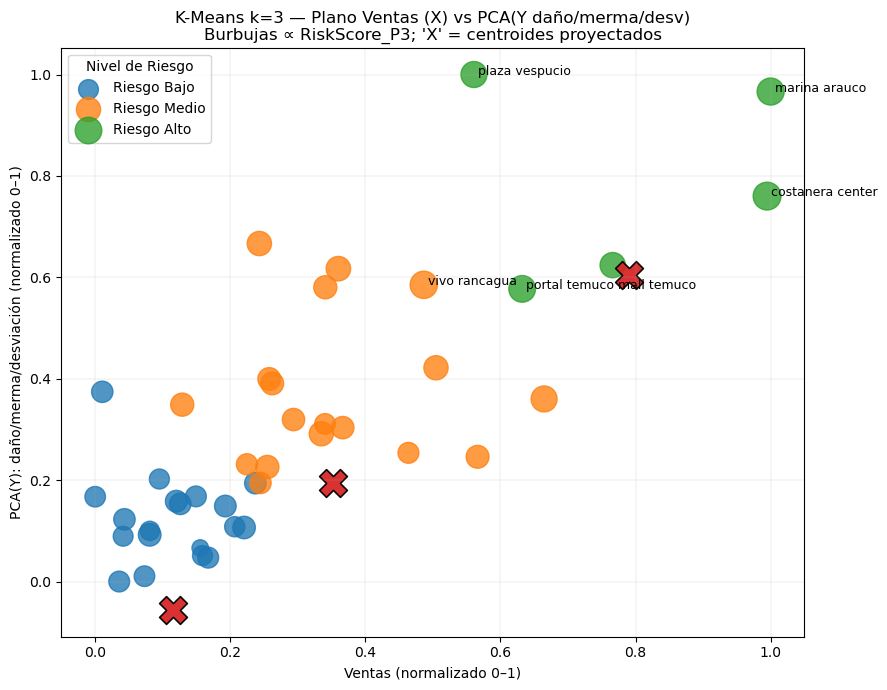

In [74]:
# ==================== K-Means k=3 + Mapa Ventas vs PCA(Y) — v13 ====================
# Requisitos previos (ya creados en v8/v9/v11):
# - X_scaled_v8  (DataFrame MinMax de las 7 variables)
# - weights_final_v8 (dict de pesos) y weights_sqrt_v8 (vector √peso en el mismo orden de X_scaled_v8)
# - reporte_p3_v8  (con columna 'RiskScore_P3')
# - Df_Kmeans y, opcionalmente, col_sucursal_v8
# - Librerías ya importadas: pandas as pd, numpy as np, matplotlib.pyplot as plt,
#   from sklearn.cluster import KMeans, from sklearn.metrics import silhouette_score, from sklearn.decomposition import PCA

# ---------- chequeos ----------
need_v13 = ['X_scaled_v8','weights_final_v8','weights_sqrt_v8','reporte_p3_v8']
missing_v13 = [n for n in need_v13 if n not in globals()]
if missing_v13:
    raise RuntimeError(f"Faltan objetos previos: {missing_v13}. Ejecuta primero la Propuesta 3 (v8).")
if 'PCA' not in globals():
    raise RuntimeError("No encuentro PCA. Importa: from sklearn.decomposition import PCA")

# columna de sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_suc_v13 = col_sucursal_v8
else:
    _cands = [c for c in reporte_p3_v8.columns if c.lower() in
              ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v13 = _cands[0] if _cands else None

# ---------- 1) K-Means k=3 en espacio completo (MinMax + √peso) ----------
X_weighted_v13 = X_scaled_v8.values * weights_sqrt_v8  # 7D ponderado
km_k3_v13 = KMeans(n_clusters=3, n_init=100, random_state=42)
labels_k3_v13 = km_k3_v13.fit_predict(X_weighted_v13)
sil_k3_v13 = float(silhouette_score(X_weighted_v13, labels_k3_v13))

# mapear clúster → nivel de riesgo por media de RiskScore_P3
risk_v13 = reporte_p3_v8['RiskScore_P3'].values
means_k3_v13 = pd.Series(risk_v13).groupby(labels_k3_v13).mean().sort_values()
rank2riskname_v13 = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                     for i, cid in enumerate(means_k3_v13.index)}
riesgo_k3_v13 = pd.Series(labels_k3_v13).map(rank2riskname_v13).values

print(f"\n[K-Means k=3] Silhouette (7D, MinMax+√peso): {sil_k3_v13:.4f}")
print("Orden de riesgo por media de RiskScore_P3:", rank2riskname_v13)

# ---------- 2) Centroides en escala 0–1 (deshacer √peso) ----------
centers_weighted_v13 = km_k3_v13.cluster_centers_
centers_scaled_v13 = centers_weighted_v13 / weights_sqrt_v8  # volver a escala MinMax 0–1
centroids_df_v13 = pd.DataFrame(centers_scaled_v13, columns=X_scaled_v8.columns)
centroids_df_v13['Riesgo_label'] = [rank2riskname_v13[cid] for cid in means_k3_v13.index]  # ordenados por riesgo
print("\nCentroides (escala 0–1 MinMax):")
print(centroids_df_v13.round(3).to_string(index=False))

# ---------- 3) Plano visual: X=Ventas(0–1), Y=PC1(daño/merma/desv) ----------
# X (ventas) 0–1 directamente desde MinMax
x01_v13 = X_scaled_v8['Ventas_Totales'].values

# Y = PCA(1) sobre variables de calidad, orientado al riesgo
vars_y_v13 = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo','Desviacion_Meta_Merma']
pca_y_v13 = PCA(n_components=1, random_state=42)
pc1_y_v13 = pca_y_v13.fit_transform(X_scaled_v8[vars_y_v13].values).ravel()

# orientar PC1 a correlación positiva con riesgo
import numpy as _np
if _np.corrcoef(pc1_y_v13, risk_v13)[0,1] < 0:
    pc1_y_v13 = -pc1_y_v13
    comps_y_v13 = -pca_y_v13.components_[0]
else:
    comps_y_v13 = pca_y_v13.components_[0]

# normalizar PC1 a 0–1 para graficar
pc1_min_v13, pc1_max_v13 = float(pc1_y_v13.min()), float(pc1_y_v13.max())
y01_v13 = (pc1_y_v13 - pc1_min_v13) / (pc1_max_v13 - pc1_min_v13 + 1e-12)

# proyectar centroides al plano:
#  - X: usar la coordenada MinMax de 'Ventas_Totales'
#  - Y: aplicar el mismo PCA a las columnas de calidad del centro (en escala 0–1) y normalizar con los mismos min/max
centers_y_pc1_v13 = (centroids_df_v13[vars_y_v13].values @ comps_y_v13.reshape(-1,1)).ravel()
centers_y01_v13 = (centers_y_pc1_v13 - pc1_min_v13) / (pc1_max_v13 - pc1_min_v13 + 1e-12)
centers_x01_v13 = centroids_df_v13['Ventas_Totales'].values

# ---------- 4) Gráfico gerencial ----------
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v13 == lvl)
    if m.any():
        plt.scatter(x01_v13[m], y01_v13[m],
                    s=(reporte_p3_v8.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.78, label=lvl)

# centroides (marcadores grandes)
plt.scatter(centers_x01_v13, centers_y01_v13,
            s=400, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95)

# anotar top-5 por riesgo
top5_idx_v13 = reporte_p3_v8['RiskScore_P3'].nlargest(5).index
for i in top5_idx_v13:
    name_i = str(reporte_p3_v8.at[i,col_suc_v13]) if col_suc_v13 else f"idx {i}"
    plt.text(x01_v13[i], y01_v13[i], f" {name_i}", fontsize=9)

# títulos y ejes
plt.title("K-Means k=3 — Plano Ventas (X) vs PCA(Y daño/merma/desv)\nBurbujas ∝ RiskScore_P3; 'X' = centroides proyectados")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("PCA(Y): daño/merma/desviación (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("mapa_kmeans_k3_v13.png", dpi=300, bbox_inches='tight')
# plt.show()

# ---------- 5) Salidas útiles ----------
# Reporte con nueva etiqueta k=3
reporte_k3_v13 = reporte_p3_v8.copy()
reporte_k3_v13['Cluster_K3_v13'] = labels_k3_v13
reporte_k3_v13['Riesgo_K3_v13']  = riesgo_k3_v13

# Top-10 para auditoría (dentro del clúster de riesgo más alto)
nivel_alto_v13 = "Riesgo Alto"
top10_k3_v13 = (reporte_k3_v13.loc[reporte_k3_v13['Riesgo_K3_v13']==nivel_alto_v13]
                .sort_values('RiskScore_P3', ascending=False)
                .head(10))
if col_suc_v13:
    print("\nTop-10 sucursales (K-Means k=3, Riesgo Alto):")
    print(top10_k3_v13[[col_suc_v13,'RiskScore_P3']].to_string(index=False))
else:
    print("\nTop-10 índices (K-Means k=3, Riesgo Alto):")
    print(top10_k3_v13[['RiskScore_P3']].to_string())

print("\nImagen guardada: 'mapa_kmeans_k3_v13.png'")


Listo:
 - grafico_PC1_danio_merma_v14.png
 - grafico_desviacion_merma_v14.png


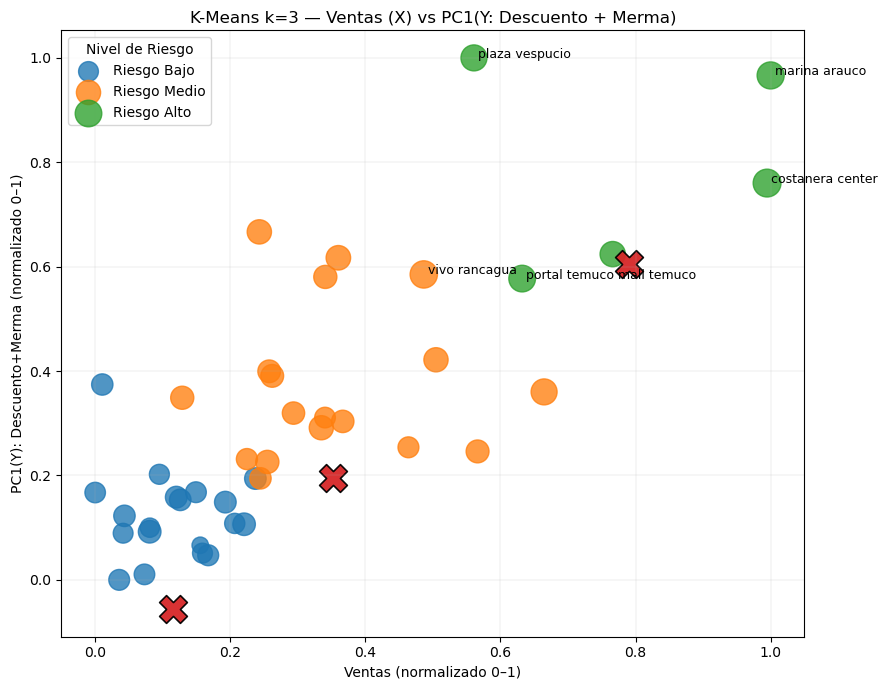

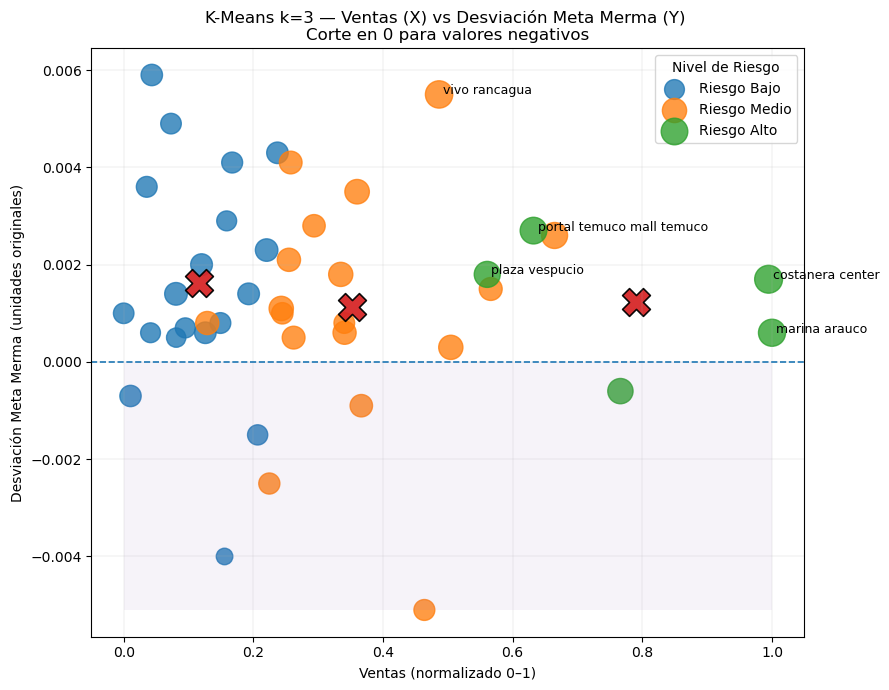

In [75]:
# ==================== K-Means k=3 + 2 gráficos solicitados — v14 ====================
# Requisitos previos en tu sesión:
# - X_scaled_v8  (DataFrame MinMax 0–1 de las 7 variables)
# - weights_final_v8 (dict) y weights_sqrt_v8 (np.array √peso en el mismo orden de X_scaled_v8)
# - reporte_p3_v8 con 'RiskScore_P3' y columnas originales (Ventas_Totales, ...).
# - PCA, KMeans, silhouette_score, pandas as pd, numpy as np, matplotlib.pyplot as plt ya importados.

# -------- chequeos básicos --------
_need_v14 = ['X_scaled_v8','weights_final_v8','weights_sqrt_v8','reporte_p3_v8']
_missing_v14 = [n for n in _need_v14 if n not in globals()]
if _missing_v14: 
    raise RuntimeError(f"Faltan objetos previos: {_missing_v14}. Ejecuta primero la Propuesta 3 (v8).")
if 'PCA' not in globals():
    raise RuntimeError("No encuentro PCA. Importa una vez: from sklearn.decomposition import PCA")

# Columna de sucursal (para anotar)
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_suc_v14 = col_sucursal_v8
else:
    _cand_v14 = [c for c in reporte_p3_v8.columns if c.lower() in
                 ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v14 = _cand_v14[0] if _cand_v14 else None

# -------- 0) Asegurar K-Means k=3 en el espacio completo (MinMax + √peso) --------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X_weighted_v14 = X_scaled_v8.values * weights_sqrt_v8

if 'labels_k3_v13' in globals() and 'riesgo_k3_v13' in globals() and 'centroids_df_v13' in globals():
    labels_k3_v14 = labels_k3_v13
    riesgo_k3_v14  = riesgo_k3_v13
    centroids_scaled_v14 = centroids_df_v13.drop(columns=['Riesgo_label']).values if 'Riesgo_label' in centroids_df_v13.columns else centroids_df_v13.values
    centroids_df_scaled_v14 = pd.DataFrame(centroids_scaled_v14, columns=X_scaled_v8.columns)
else:
    km_k3_v14 = KMeans(n_clusters=3, n_init=100, random_state=42)
    labels_k3_v14 = km_k3_v14.fit_predict(X_weighted_v14)
    sil_k3_v14 = float(silhouette_score(X_weighted_v14, labels_k3_v14))
    # ordenar clúster → nivel de riesgo por media de RiskScore_P3
    _risk_v14 = reporte_p3_v8['RiskScore_P3'].values
    _means_v14 = pd.Series(_risk_v14).groupby(labels_k3_v14).mean().sort_values()
    _rank2name_v14 = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                      for i, cid in enumerate(_means_v14.index)}
    riesgo_k3_v14 = pd.Series(labels_k3_v14).map(_rank2name_v14).values
    # centroides en escala 0–1 (deshacer √peso)
    centers_weighted_v14 = km_k3_v14.cluster_centers_
    centers_scaled_v14 = centers_weighted_v14 / weights_sqrt_v8
    centroids_df_scaled_v14 = pd.DataFrame(centers_scaled_v14, columns=X_scaled_v8.columns)
    print(f"[k=3] Silhouette (7D MinMax+√peso): {sil_k3_v14:.4f}")

# -------- 1) GRÁFICO A — X=Ventas(0–1) ; Y=PC1(Prod_Dañados + Merma_Destrucción) --------
vars_yA_v14 = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo']
pca_yA_v14 = PCA(n_components=1, random_state=42)
pc1_yA_raw_v14 = pca_yA_v14.fit_transform(X_scaled_v8[vars_yA_v14].values).ravel()

# orientar PC1 a correlación positiva con el riesgo
_riskA_v14 = reporte_p3_v8['RiskScore_P3'].values
import numpy as _np
if _np.corrcoef(pc1_yA_raw_v14, _riskA_v14)[0,1] < 0:
    pc1_yA_raw_v14 = -pc1_yA_raw_v14
    comps_yA_v14 = -pca_yA_v14.components_[0]
else:
    comps_yA_v14 = pca_yA_v14.components_[0]

# normalizar a 0–1 para graficar
yA_min, yA_max = float(pc1_yA_raw_v14.min()), float(pc1_yA_raw_v14.max())
yA_01_v14 = (pc1_yA_raw_v14 - yA_min) / (yA_max - yA_min + 1e-12)
xA_01_v14 = X_scaled_v8['Ventas_Totales'].values

# proyectar centroides a este plano
centers_yA_pc1_v14 = (centroids_df_scaled_v14[vars_yA_v14].values @ comps_yA_v14.reshape(-1,1)).ravel()
centers_yA_01_v14 = (centers_yA_pc1_v14 - yA_min) / (yA_max - yA_min + 1e-12)
centers_xA_01_v14 = centroids_df_scaled_v14['Ventas_Totales'].values

import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v14 == lvl)
    if m.any():
        plt.scatter(xA_01_v14[m], yA_01_v14[m],
                    s=(reporte_p3_v8.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.78, label=lvl)
# centroides
plt.scatter(centers_xA_01_v14, centers_yA_01_v14,
            s=400, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95)

# top-5 anotado
_top5A = reporte_p3_v8['RiskScore_P3'].nlargest(5).index
for i in _top5A:
    name_i = str(reporte_p3_v8.at[i, col_suc_v14]) if col_suc_v14 else f"idx {i}"
    plt.text(xA_01_v14[i], yA_01_v14[i], f" {name_i}", fontsize=9)

plt.title("K-Means k=3 — Ventas (X) vs PC1(Y: Descuento + Merma)")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("PC1(Y): Descuento+Merma (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_PC1_danio_merma_v14.png", dpi=300, bbox_inches='tight')
# plt.show()

# -------- 2) GRÁFICO B — X=Ventas(0–1) ; Y=Desviacion_Meta_Merma (original) con corte en 0 --------
xB_01_v14 = X_scaled_v8['Ventas_Totales'].values
yB_orig_v14 = reporte_p3_v8['Desviacion_Meta_Merma'].astype(float).values

# centroides en unidades originales para Y (invertimos MinMax con min/max del reporte)
yB_min, yB_max = float(reporte_p3_v8['Desviacion_Meta_Merma'].min()), float(reporte_p3_v8['Desviacion_Meta_Merma'].max())
centers_yB_scaled_v14 = centroids_df_scaled_v14['Desviacion_Meta_Merma'].values
centers_yB_orig_v14 = yB_min + centers_yB_scaled_v14 * (yB_max - yB_min + 1e-12)
centers_xB_01_v14 = centroids_df_scaled_v14['Ventas_Totales'].values

plt.figure(figsize=(9,7))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v14 == lvl)
    if m.any():
        plt.scatter(xB_01_v14[m], yB_orig_v14[m],
                    s=(reporte_p3_v8.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.78, label=lvl)

# centroides
plt.scatter(centers_xB_01_v14, centers_yB_orig_v14,
            s=400, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95)

# línea de corte en 0 (y sombreado si hay negativos)
plt.axhline(0, linestyle='--', linewidth=1.2)
if (yB_orig_v14 < 0).any():
    ymin_plot = min(yB_orig_v14.min(), centers_yB_orig_v14.min())
    plt.fill_between([0,1], ymin_plot, 0, alpha=0.08)  # sombrea zona negativa

# top-5 anotado
_top5B = reporte_p3_v8['RiskScore_P3'].nlargest(5).index
for i in _top5B:
    name_i = str(reporte_p3_v8.at[i, col_suc_v14]) if col_suc_v14 else f"idx {i}"
    plt.text(xB_01_v14[i], yB_orig_v14[i], f" {name_i}", fontsize=9)

plt.title("K-Means k=3 — Ventas (X) vs Desviación Meta Merma (Y) \nCorte en 0 para valores negativos")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("Desviación Meta Merma (unidades originales)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_desviacion_merma_v14.png", dpi=300, bbox_inches='tight')
# plt.show()

print("\nListo:")
print(" - grafico_PC1_danio_merma_v14.png")
print(" - grafico_desviacion_merma_v14.png")

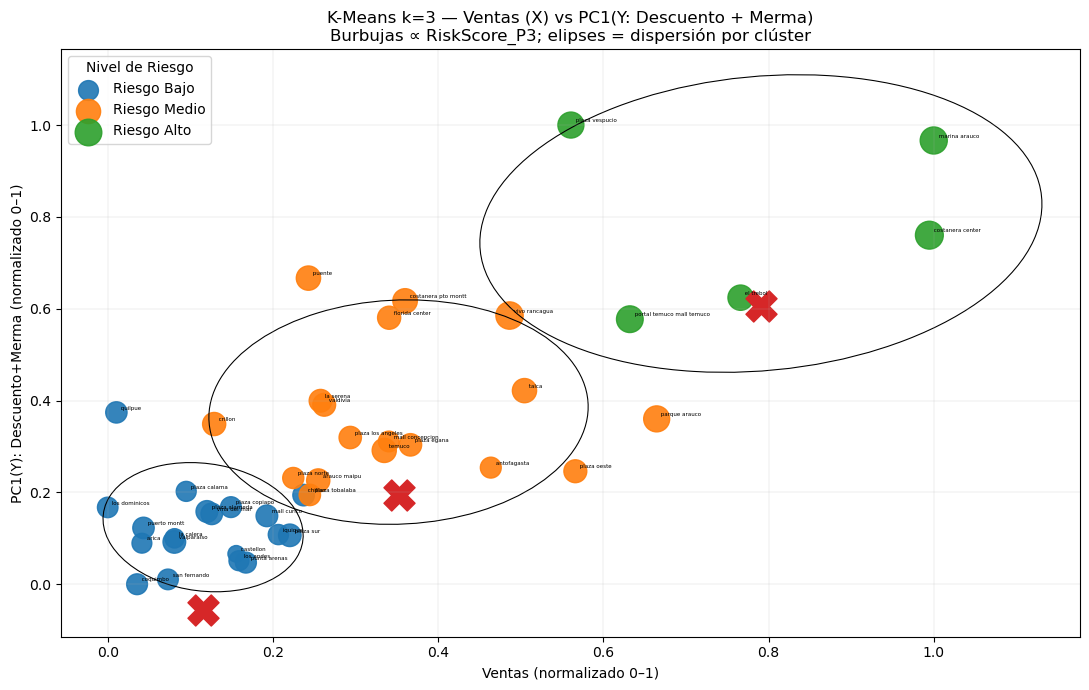

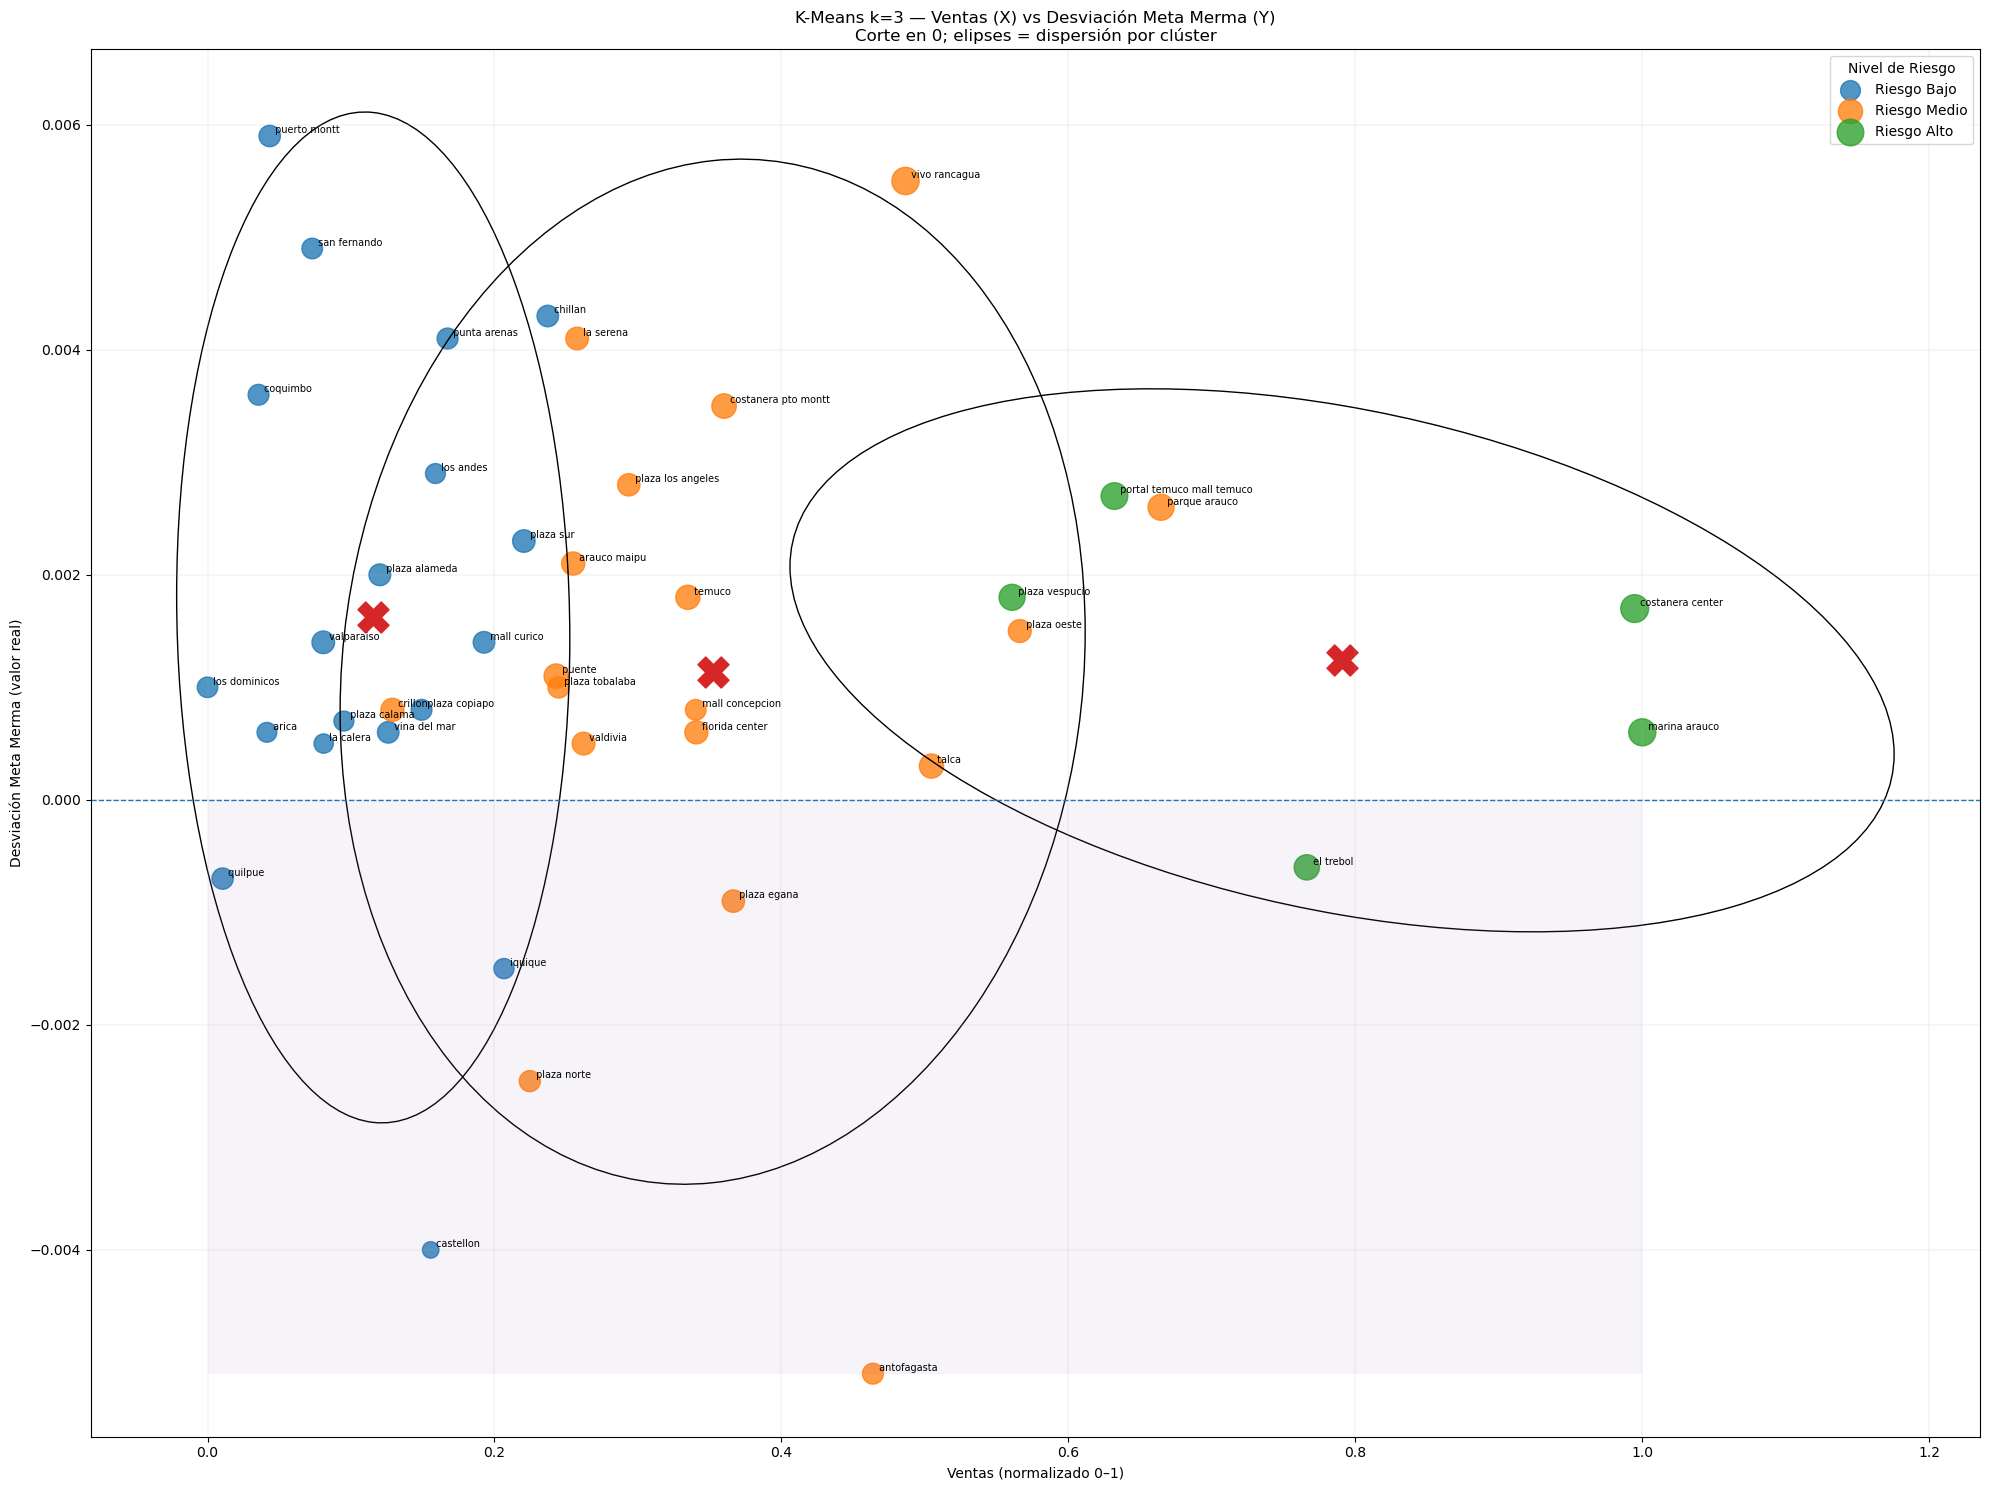


Listo:
 - grafico_A_PC1_danio_merma_v15.png
 - grafico_B_desv_meta_merma_v15.png


In [76]:
# ==================== Gráficos con elipses + etiquetas completas — v15 ====================
# Requisitos previos ya en sesión:
# - X_scaled_v8 (MinMax 0–1 de las 7 variables)
# - weights_final_v8, weights_sqrt_v8
# - reporte_p3_v8 con 'RiskScore_P3' y columnas originales (Ventas_Totales, ...)
# - (opcional) col_sucursal_v8 con el nombre de la columna de sucursal
# - K-Means k=3 ya corrido (labels_k3_v14, riesgo_k3_v14, centroids_df_scaled_v14, comps_yA_v14, etc.)
#   Si no están, este bloque los calcula.

# ---------------- chequear/derivar insumos ----------------
need_core_v15 = ['X_scaled_v8','weights_sqrt_v8','reporte_p3_v8']
missing_core_v15 = [n for n in need_core_v15 if n not in globals()]
if missing_core_v15:
    raise RuntimeError(f"Faltan objetos previos: {missing_core_v15}. Ejecuta primero la Propuesta 3 (v8).")
    
# Columna sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_suc_v15 = col_sucursal_v8
else:
    _cands_v15 = [c for c in reporte_p3_v8.columns if c.lower() in
                  ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v15 = _cands_v15[0] if _cands_v15 else None

# K-Means k=3 en el espacio completo (MinMax + √peso), si no existe
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as _np
import pandas as pd
import matplotlib.pyplot as plt

X_weighted_v15 = X_scaled_v8.values * weights_sqrt_v8

if all(v in globals() for v in ['labels_k3_v14','riesgo_k3_v14','centroids_df_scaled_v14']):
    labels_k3_v15 = labels_k3_v14
    riesgo_k3_v15  = riesgo_k3_v14
    centroids_df_scaled_v15 = centroids_df_scaled_v14.copy()
else:
    km_k3_v15 = KMeans(n_clusters=3, init="k-means++", tol= 0.00002, n_init=50, random_state=100, max_iter= 500, algorithm= "lloyd") 

    labels_k3_v15 = km_k3_v15.fit_predict(X_weighted_v15)
    sil_k3_v15 = float(silhouette_score(X_weighted_v15, labels_k3_v15))
    risk_tmp_v15 = reporte_p3_v8['RiskScore_P3'].values
    means_tmp_v15 = pd.Series(risk_tmp_v15).groupby(labels_k3_v15).mean().sort_values()
    map_riskname_v15 = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                        for i, cid in enumerate(means_tmp_v15.index)}
    riesgo_k3_v15 = pd.Series(labels_k3_v15).map(map_riskname_v15).values
    centers_weighted_v15 = km_k3_v15.cluster_centers_
    centroids_df_scaled_v15 = pd.DataFrame(centers_weighted_v15 / weights_sqrt_v8,
                                           columns=X_scaled_v8.columns)
    print(f"[k=3] Silhouette (7D MinMax+√peso): {sil_k3_v15:.4f}")

# ---------------- funciones utilitarias ----------------
def _fit_ellipse_from_points(ax, x, y, n_std=1.8, linewidth=1.2, linestyle='--'):
    """
    Dibuja una elipse de cobertura basada en media+covarianza:
    - n_std ~ "cuántas sigmas" (1.8–2.0 suele verse bien)
    - no fija color (usa el por defecto); sin relleno.
    """
    if len(x) < 3:
        return
    cov = _np.cov(x, y)
    vals, vecs = _np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = _np.degrees(_np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * n_std * _np.sqrt(vals.clip(min=1e-12))
    ell = plt.matplotlib.patches.Ellipse((x.mean(), y.mean()),
                                         width, height, angle=theta,
                                         fill=False, linestyle=linestyle,
                                         linewidth=linewidth)
    ax.add_patch(ell)

def _annotate_all_points(ax, x, y, labels, fontsize=7):
    for xi, yi, txt in zip(x, y, labels):
        ax.annotate(f" {txt}", (xi, yi), xytext=(2,2),
                    textcoords="offset points", fontsize=fontsize)

# ---------------- GRÁFICO A: X=Ventas(0–1), Y=PC1(Descuento + Merma) ----------------
from sklearn.decomposition import PCA
vars_yA_v15 = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo']
pca_yA_v15 = PCA(n_components=1, random_state=42)
pc1A_v15 = pca_yA_v15.fit_transform(X_scaled_v8[vars_yA_v15].values).ravel()

# orientar PC1 a correlación positiva con el riesgo
riskA_v15 = reporte_p3_v8['RiskScore_P3'].values
if _np.corrcoef(pc1A_v15, riskA_v15)[0,1] < 0:
    pc1A_v15 = -pc1A_v15
    compsA_v15 = -pca_yA_v15.components_[0]
else:
    compsA_v15 = pca_yA_v15.components_[0]

# normalizar a 0–1 para el eje Y; X ya está en 0–1 (MinMax)
yA_min_v15, yA_max_v15 = float(pc1A_v15.min()), float(pc1A_v15.max())
yA01_v15 = (pc1A_v15 - yA_min_v15) / (yA_max_v15 - yA_min_v15 + 1e-12)
xA01_v15 = X_scaled_v8['Ventas_Totales'].values

# centroides proyectados en este plano
centers_yA_pc1_v15 = (centroids_df_scaled_v15[vars_yA_v15].values @ compsA_v15.reshape(-1,1)).ravel()
centers_yA01_v15 = (centers_yA_pc1_v15 - yA_min_v15) / (yA_max_v15 - yA_min_v15 + 1e-12)
centers_xA01_v15 = centroids_df_scaled_v15['Ventas_Totales'].values

# plot
plt.figure(figsize=(11,7))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v15 == lvl)
    if m.any():
        plt.scatter(xA01_v15[m], yA01_v15[m],
                    s=(reporte_p3_v8.loc[m, 'RiskScore_P3']*600 + 20),
                    alpha=0.9, label=lvl)

# Elipses por clúster (usando labels_k3_v15 numéricos)
for cid in sorted(set(labels_k3_v15)):
    mask_c = (labels_k3_v15 == cid)
    _fit_ellipse_from_points(plt.gca(),
                             xA01_v15[mask_c], yA01_v15[mask_c],
                             n_std=1.68, linewidth=0.78, linestyle='-')

# Centroides como marcadores grandes (forma X)
plt.scatter(centers_xA01_v15, centers_yA01_v15,
            s=500, marker='X', linewidths=1.0)

# Etiquetas en TODOS los puntos
if col_suc_v15:
    _annotate_all_points(plt.gca(), xA01_v15, yA01_v15,
                         reporte_p3_v8[col_suc_v15].astype(str).values, fontsize=4)

plt.title("K-Means k=3 — Ventas (X) vs PC1(Y: Descuento + Merma)\nBurbujas ∝ RiskScore_P3; elipses = dispersión por clúster")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("PC1(Y): Descuento+Merma (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v15.png", dpi=300, bbox_inches='tight')
plt.show()

# ---------------- GRÁFICO B: X=Ventas(0–1), Y=Desviación Meta Merma (real) + corte 0 ----------------
xB01_v15 = X_scaled_v8['Ventas_Totales'].values
yB_real_v15 = reporte_p3_v8['Desviacion_Meta_Merma'].astype(float).values

# centroides en unidades reales para Y
yB_min_v15 = float(reporte_p3_v8['Desviacion_Meta_Merma'].min())
yB_max_v15 = float(reporte_p3_v8['Desviacion_Meta_Merma'].max())
centers_yB01_v15 = centroids_df_scaled_v15['Desviacion_Meta_Merma'].values
centers_yB_real_v15 = yB_min_v15 + centers_yB01_v15 * (yB_max_v15 - yB_min_v15 + 1e-12)
centers_xB01_v15 = centroids_df_scaled_v15['Ventas_Totales'].values

plt.figure(figsize=(20,15))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v15 == lvl)
    if m.any():
        plt.scatter(xB01_v15[m], yB_real_v15[m],
                    s=(reporte_p3_v8.loc[m, 'RiskScore_P3']*600 + 20),
                    alpha=0.78, label=lvl)

# Elipses por clúster en este plano
for cid in sorted(set(labels_k3_v15)):
    mask_c = (labels_k3_v15 == cid)
    _fit_ellipse_from_points(plt.gca(),
                             xB01_v15[mask_c], yB_real_v15[mask_c],
                             n_std=1.9, linewidth=1.0, linestyle='-')

# Centroides
plt.scatter(centers_xB01_v15, centers_yB_real_v15,
            s=500, marker='X', linewidths=1.0)

# Línea de corte en 0 y sombreado de la zona negativa (si existe)
plt.axhline(0, linestyle='--', linewidth=1.0)
if (yB_real_v15 < 0).any():
    ymin_plot = min(yB_real_v15.min(), centers_yB_real_v15.min())
    plt.fill_between([0,1], ymin_plot, 0, alpha=0.08)

# Etiquetas en TODOS los puntos
if col_suc_v15:
    _annotate_all_points(plt.gca(), xB01_v15, yB_real_v15,
                         reporte_p3_v8[col_suc_v15].astype(str).values, fontsize=7)

plt.title("K-Means k=3 — Ventas (X) vs Desviación Meta Merma (Y)\nCorte en 0; elipses = dispersión por clúster")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("Desviación Meta Merma (valor real)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_B_desv_meta_merma_v15.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nListo:")
print(" - grafico_A_PC1_danio_merma_v15.png")
print(" - grafico_B_desv_meta_merma_v15.png")


Listo:
 - grafico_A_PC1_danio_merma_v16.png
 - grafico_B_desv_meta_merma_v16.png


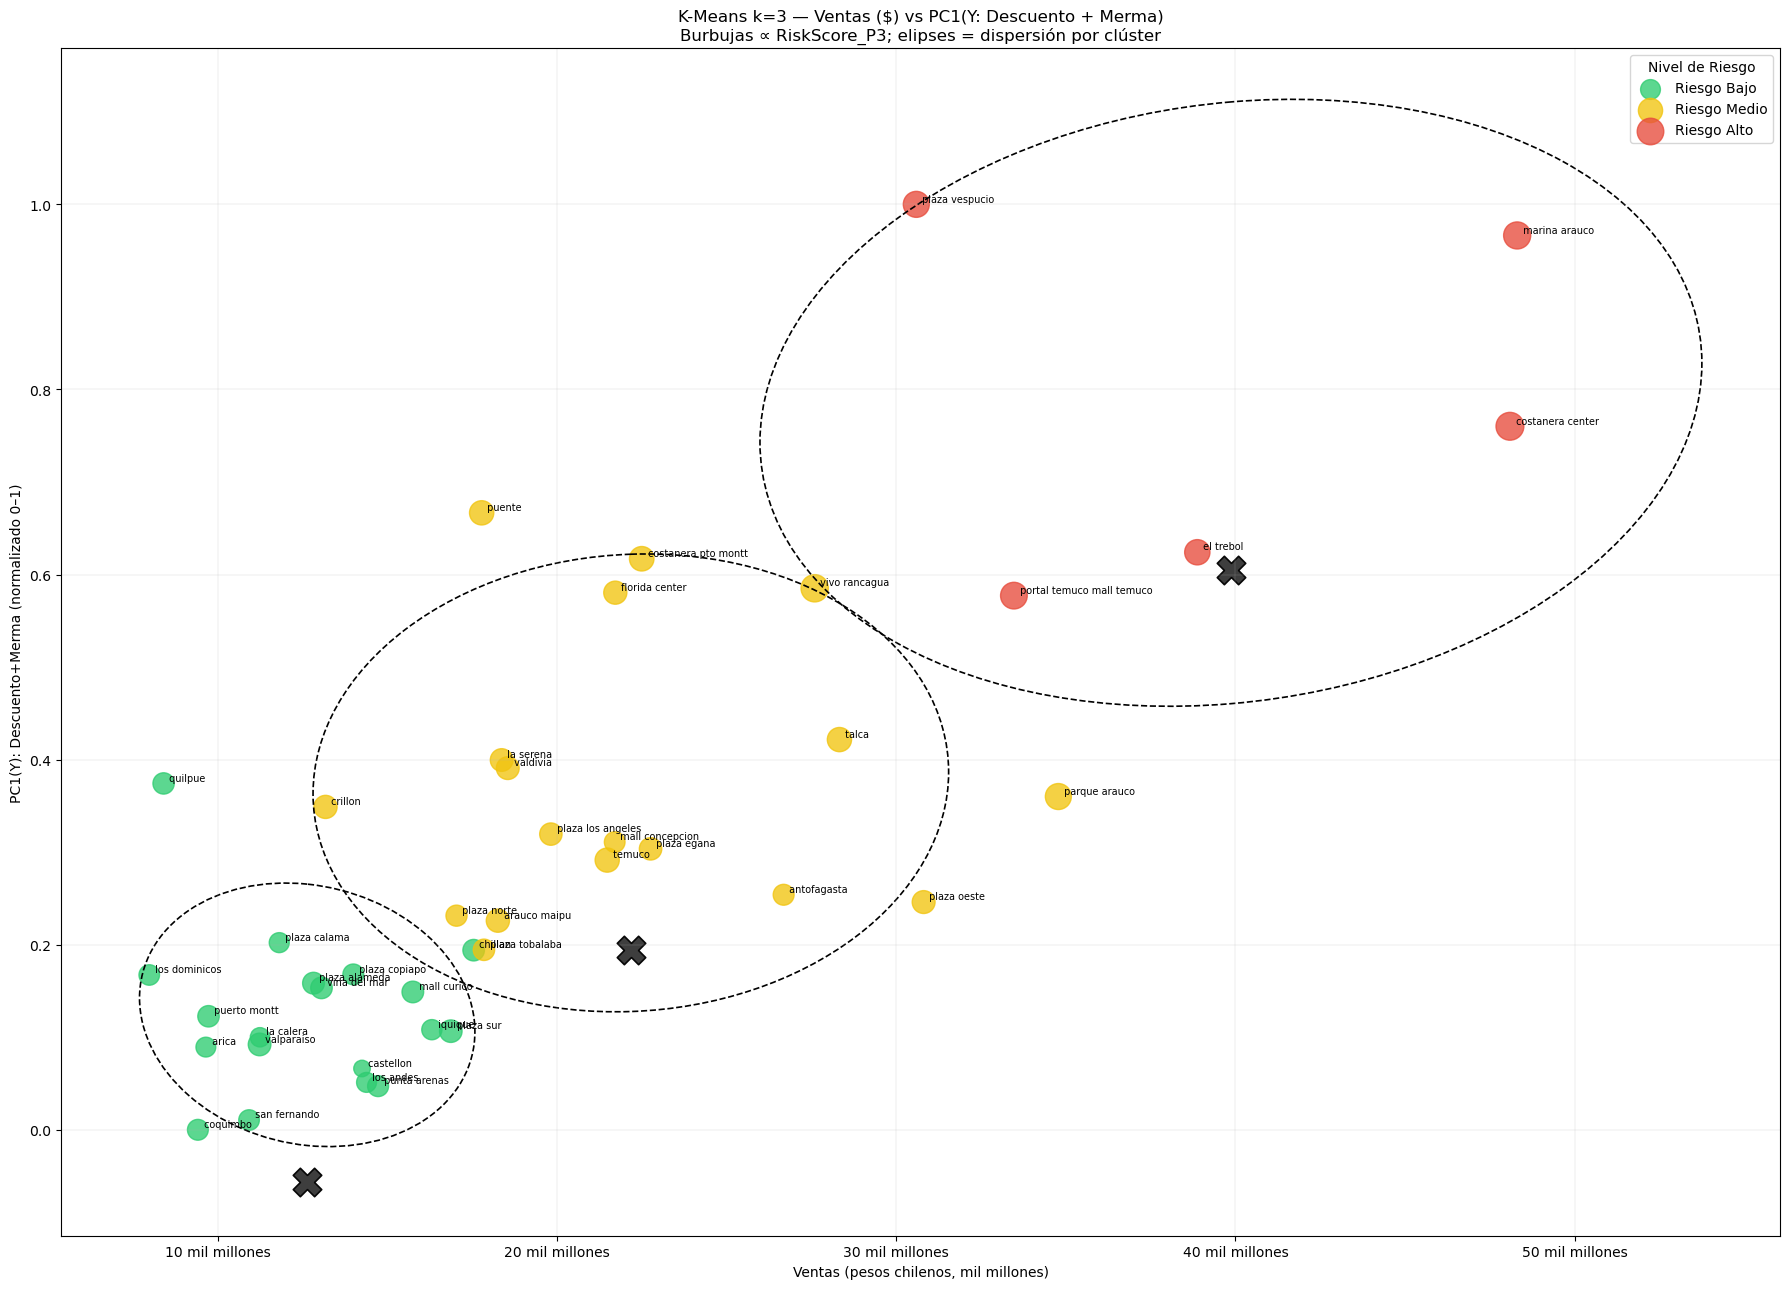

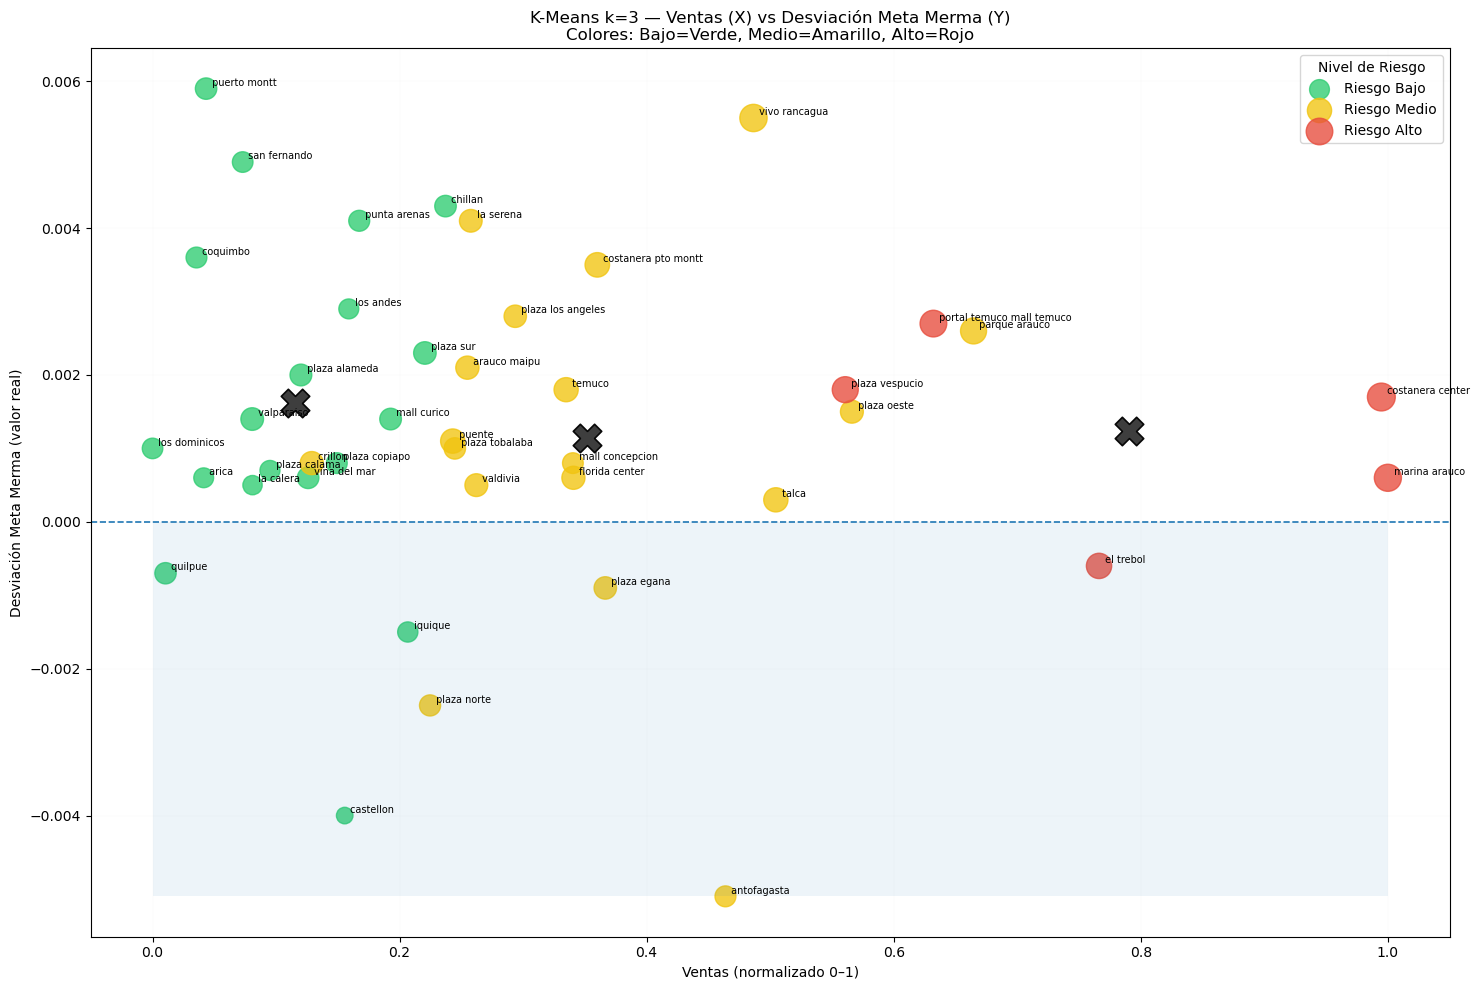

In [77]:
# ==================== Ajustes de ejes + colores — v16 ====================
# Requiere objetos de v15/v14: X_scaled_v8, reporte_p3_v8, labels_k3_v15 (o *_v14), 
# riesgo_k3_v15, centroids_df_scaled_v15, y helpers de elipse/etiquetado.

import numpy as np
import matplotlib.pyplot as plt

# Helpers (solo si no existen)
if '_fit_ellipse_from_points' not in globals():
    import numpy as _np
    def _fit_ellipse_from_points(ax, x, y, n_std=1.9, linewidth=1.0, linestyle='-'):
        if len(x) < 3: return
        cov = _np.cov(x, y)
        vals, vecs = _np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        theta = _np.degrees(_np.arctan2(*vecs[:,0][::-1]))
        width, height = 2 * n_std * _np.sqrt(vals.clip(min=1e-12))
        ell = plt.matplotlib.patches.Ellipse((x.mean(), y.mean()),
                                             width, height, angle=theta,
                                             fill=False, linestyle=linestyle,
                                             linewidth=linewidth)
        ax.add_patch(ell)

if '_annotate_all_points' not in globals():
    def _annotate_all_points(ax, x, y, labels, fontsize=7):
        for xi, yi, txt in zip(x, y, labels):
            ax.annotate(f" {txt}", (xi, yi), xytext=(2,2),
                        textcoords="offset points", fontsize=fontsize)

# Detección columna sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_suc_v16 = col_sucursal_v8
else:
    _cands_v16 = [c for c in reporte_p3_v8.columns if c.lower() in
                  ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v16 = _cands_v16[0] if _cands_v16 else None

# Asegurar labels/riesgo/centroides
labels_k3_v16 = labels_k3_v15 if 'labels_k3_v15' in globals() else labels_k3_v14
riesgo_k3_v16  = riesgo_k3_v15  if 'riesgo_k3_v15'  in globals() else riesgo_k3_v14
centroids_df_scaled_v16 = centroids_df_scaled_v15 if 'centroids_df_scaled_v15' in globals() else centroids_df_scaled_v14

# ==================== COLORES por nivel de riesgo ====================
color_map_v16 = {
    "Riesgo Bajo":   "#2ecc71",  # verde
    "Riesgo Medio":  "#f1c40f",  # amarillo
    "Riesgo Alto":   "#e74c3c",  # rojo
}

# ==================== GRÁFICO A (X en $ reales + formato 'mil millones') ====================
# X real (no 0–1)
xA_real_v16 = reporte_p3_v8["Ventas_Totales"].astype(float).values
xA_min, xA_max = float(xA_real_v16.min()), float(xA_real_v16.max())

# Y = PC1(Descuento + Merma) normalizado 0–1 (de v15); si no existe, lo recomputamos
if 'yA01_v15' in globals():
    yA01_v16 = yA01_v15
    centers_yA01_v16 = centers_yA01_v15
else:
    from sklearn.decomposition import PCA
    vars_yA = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo']
    _pca = PCA(n_components=1, random_state=42)
    _pc1 = _pca.fit_transform(X_scaled_v8[vars_yA].values).ravel()
    # orientar al riesgo
    _risk = reporte_p3_v8['RiskScore_P3'].values
    if np.corrcoef(_pc1, _risk)[0,1] < 0: _pc1 = -_pc1
    min, max = float(_pc1.min()), float(_pc1.max())
    yA01_v16 = (pc1 - _min) / (max - min + 1e-12)
    compsA = pca.components[0]
    # centroides al plano
    _cent_y = (centroids_df_scaled_v16[vars_yA].values @ compsA.reshape(-1,1)).ravel()
    centers_yA01_v16 = (cent_y - _min) / (max - min + 1e-12)

# Centroides X en $ reales (desnormalizamos Ventas_Totales)
centers_xA01 = centroids_df_scaled_v16['Ventas_Totales'].values  # 0–1
centers_xA_real_v16 = xA_min + centers_xA01 * (xA_max - xA_min + 1e-12)

plt.figure(figsize=(18,13))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v16 == lvl)
    if m.any():
        plt.scatter(xA_real_v16[m], yA01_v16[m],
                    s=(reporte_p3_v8.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.78, label=lvl, c=color_map_v16[lvl])

# Elipses por clúster en este plano (usa labels numéricos)
for cid in sorted(set(labels_k3_v16)):
    m = (labels_k3_v16 == cid)
    _fit_ellipse_from_points(plt.gca(), xA_real_v16[m], yA01_v16[m], n_std=1.7)

# Centroides (X grande)
plt.scatter(centers_xA_real_v16, centers_yA01_v16,
            s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

# Etiquetas en TODOS los puntos
if col_suc_v16:
    _annotate_all_points(plt.gca(), xA_real_v16, yA01_v16,
                         reporte_p3_v8[col_suc_v16].astype(str).values, fontsize=7)

# Formato del eje X como "mil millones"
from matplotlib.ticker import FuncFormatter, MaxNLocator
def _fmt_milmill(x, pos):
    return f"{int(round(x/1e9))} mil millones"
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))

plt.title("K-Means k=3 — Ventas ($) vs PC1(Y: Descuento + Merma)\nBurbujas ∝ RiskScore_P3; elipses = dispersión por clúster")
plt.xlabel("Ventas (pesos chilenos, mil millones)")
plt.ylabel("PC1(Y): Descuento+Merma (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v16.png", dpi=300, bbox_inches='tight')

# ==================== GRÁFICO B (mismos colores; X queda en 0–1 o en $ si prefieres) ====================
# Dejamos X en 0–1 como en v15; si prefieres también en $, descomenta el bloque indicado.
xB01_v16 = X_scaled_v8['Ventas_Totales'].values
xB_real_v16 = reporte_p3_v8["Ventas_Totales"].astype(float).values
centers_xB_real_v16 = xA_min + centroids_df_scaled_v16['Ventas_Totales'].values * (xA_max - xA_min + 1e-12)

yB_real_v16 = reporte_p3_v8['Desviacion_Meta_Merma'].astype(float).values
yB_min, yB_max = float(yB_real_v16.min()), float(yB_real_v16.max())
centers_yB01 = centroids_df_scaled_v16['Desviacion_Meta_Merma'].values
centers_yB_real_v16 = yB_min + centers_yB01 * (yB_max - yB_min + 1e-12)
centers_xB01_v16 = centroids_df_scaled_v16['Ventas_Totales'].values

plt.figure(figsize=(15,10))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v16 == lvl)
    if m.any():
        plt.scatter(xB01_v16[m], yB_real_v16[m],
                    s=(reporte_p3_v8.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.78, label=lvl, c=color_map_v16[lvl])



plt.scatter(centers_xB01_v16, centers_yB_real_v16,
            s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

plt.axhline(0, linestyle='--', linewidth=1.2)
if (yB_real_v16 < 0).any():
    plt.fill_between([0,1], min(yB_real_v16.min(), centers_yB_real_v16.min()), 0, alpha=0.08)

if col_suc_v16:
    _annotate_all_points(plt.gca(), xB01_v16, yB_real_v16,
                         reporte_p3_v8[col_suc_v16].astype(str).values, fontsize=7)

plt.title("K-Means k=3 — Ventas (X) vs Desviación Meta Merma (Y)\nColores: Bajo=Verde, Medio=Amarillo, Alto=Rojo")
plt.xlabel("Ventas (normalizado 0–1)")  # cambia a '($, mil millones)' si usas la versión en $ reales
plt.ylabel("Desviación Meta Merma (valor real)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.1, alpha=0.3)
plt.tight_layout()
plt.savefig("grafico_B_desv_meta_merma_v16.png", dpi=300, bbox_inches='tight')

print("\nListo:")
print(" - grafico_A_PC1_danio_merma_v16.png")
print(" - grafico_B_desv_meta_merma_v16.png")

In [78]:
reporte_p3_v8.to_excel("reporte_p3_v8.xlsx", index=False)

Listo: 'grafico_A_PC1_danio_merma_v19.png' con explicación del eje Y y etiquetas verdes separadas.


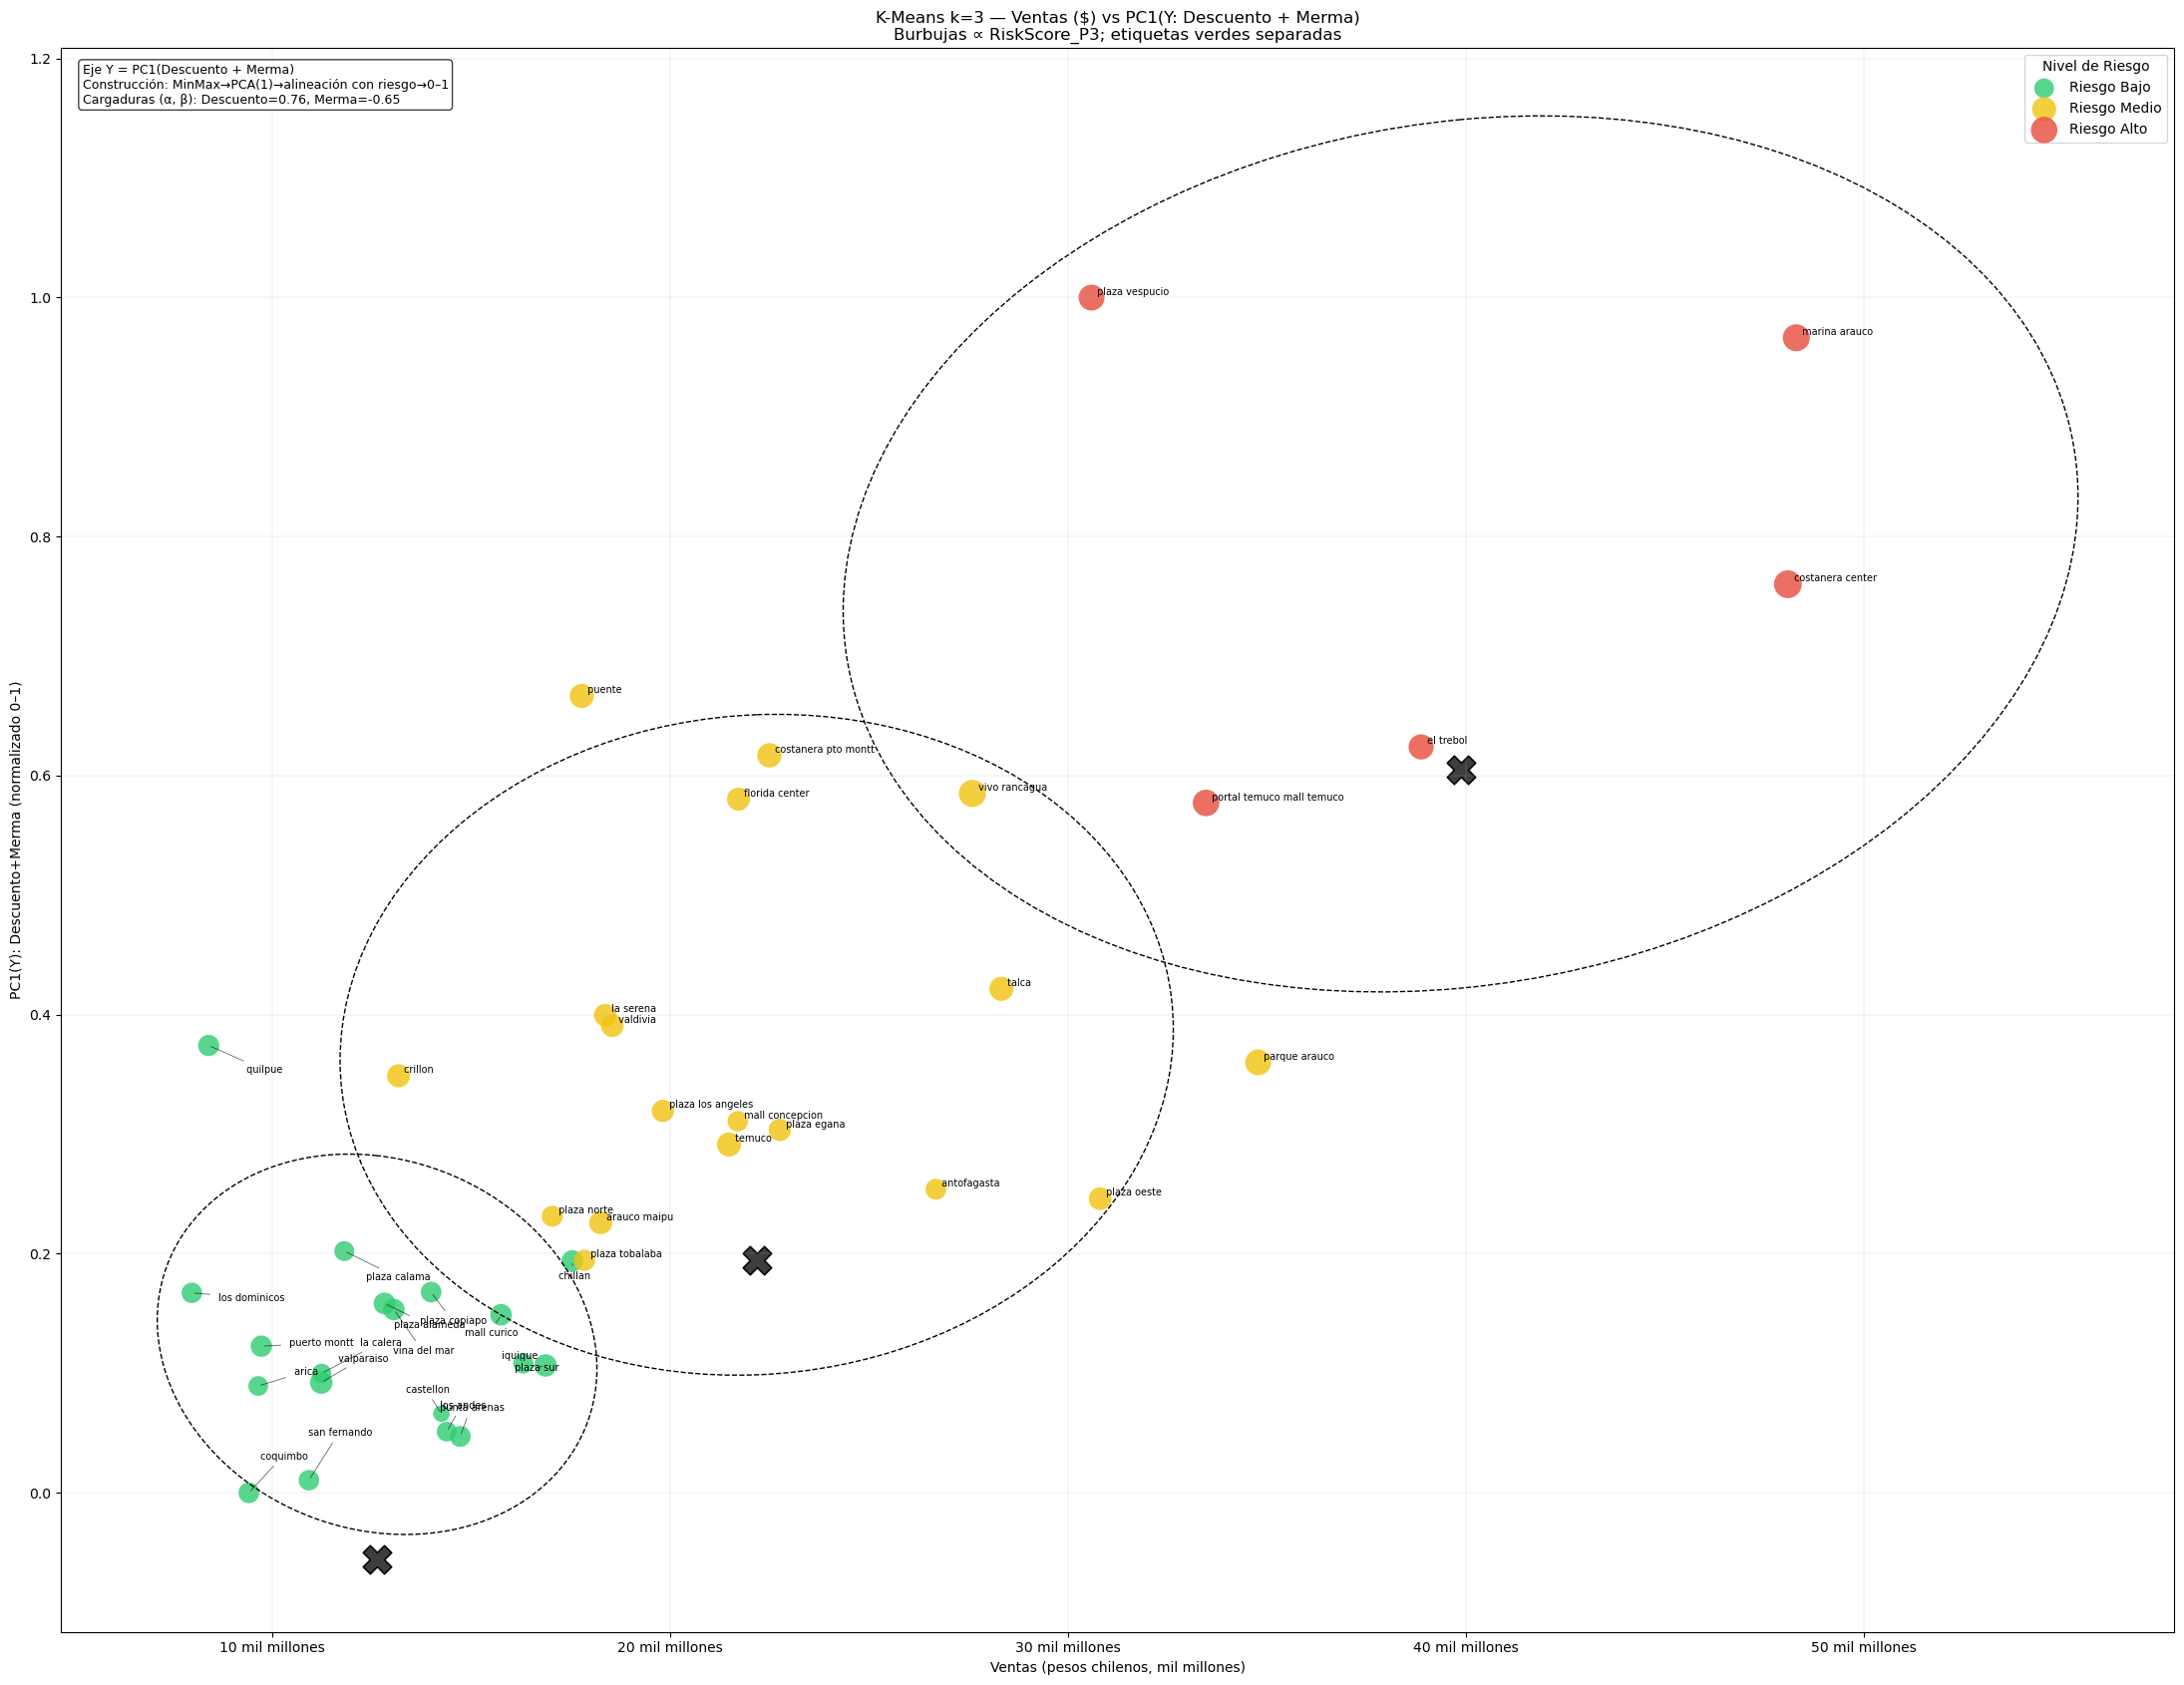

In [79]:
# ==================== Mejora visual Gráfico A: explicación eje Y + separar etiquetas verdes — v19 ====================
# Requiere que ya tengas en memoria (de v16/v15):
# - X_scaled_v8, reporte_p3_v8
# - riesgo_k3_v16 (o riesgo_k3_v15) y labels_k3_v16 (o *_v15)
# - centroids_df_scaled_v16 (o *_v15)
# - color_map_v16 con {Bajo: verde, Medio: amarillo, Alto: rojo}
# - FuncFormatter _fmt_milmill (si no, lo definimos)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.ticker import FuncFormatter, MaxNLocator
import pandas as pd

# ---------- Resolver insumos ----------
riesgo_arr_v19 = riesgo_k3_v16 if 'riesgo_k3_v16' in globals() else riesgo_k3_v15
labels_arr_v19 = labels_k3_v16 if 'labels_k3_v16' in globals() else labels_k3_v15
centroids_scaled_v19 = centroids_df_scaled_v16 if 'centroids_df_scaled_v16' in globals() else centroids_df_scaled_v15

if 'color_map_v16' in globals():
    color_map_v19 = color_map_v16
else:
    color_map_v19 = {"Riesgo Bajo":"#2ecc71","Riesgo Medio":"#f1c40f","Riesgo Alto":"#e74c3c"}

# columna de sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_suc_v19 = col_sucursal_v8
else:
    _cands = [c for c in reporte_p3_v8.columns if c.lower() in
              ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v19 = _cands[0] if _cands else None

# ---------- Ejes del plano ----------
# X en pesos reales + formateo "mil millones"
x_real_v19 = reporte_p3_v8["Ventas_Totales"].astype(float).values
x_min_v19, x_max_v19 = float(x_real_v19.min()), float(x_real_v19.max())

def _fmt_milmill(x, pos):
    return f"{int(round(x/1e9))} mil millones"

# Y = PC1(Descuento + Merma) en 0–1, con signo orientado al riesgo
vars_y_v19 = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo']
pca_y_v19 = PCA(n_components=1, random_state=100)
pc1_y_v19 = pca_y_v19.fit_transform(X_scaled_v8[vars_y_v19].values).ravel()
risk_v19 = reporte_p3_v8['RiskScore_P3'].values
if np.corrcoef(pc1_y_v19, risk_v19)[0,1] < 0:
    pc1_y_v19 = -pc1_y_v19
    loadings_v19 = -pca_y_v19.components_[0]
else:
    loadings_v19 = pca_y_v19.components_[0]

y_min_v19, y_max_v19 = float(pc1_y_v19.min()), float(pc1_y_v19.max())
y01_v19 = (pc1_y_v19 - y_min_v19) / (y_max_v19 - y_min_v19 + 1e-12)

# Centroides proyectados al plano
cent_y_raw = (centroids_scaled_v19[vars_y_v19].values @ loadings_v19.reshape(-1,1)).ravel()
cent_y01_v19 = (cent_y_raw - y_min_v19) / (y_max_v19 - y_min_v19 + 1e-12)
cent_x_real_v19 = x_min_v19 + centroids_scaled_v19['Ventas_Totales'].values * (x_max_v19 - x_min_v19 + 1e-12)

# ---------- Helpers de etiquetas ----------
def _annotate_all(ax, x, y, labels, fontsize=7, offset=(2,2)):
    for xi, yi, txt in zip(x, y, labels):
        ax.annotate(f" {txt}", (xi, yi), xytext=offset,
                    textcoords="offset points", fontsize=fontsize)

def _fan_out_labels(ax, x, y, labels, base_radius=16, extra=6, seed=42, lw=0.6):
    """
    Separa etiquetas 'en abanico' alrededor del centro del grupo y dibuja una línea guía a cada punto.
    Distancias en puntos (no en datos), para que el efecto sea uniforme.
    """
    if len(x) == 0: return
    rng = np.random.RandomState(seed)
    xc, yc = np.mean(x), np.mean(y)
    # ángulos por punto, ordenados por ángulo polar respecto al centro
    ang = np.arctan2(y - yc, x - xc)
    order = np.argsort(ang)
    x, y = x[order], y[order]
    labels = np.array(labels)[order]
    # offsets en puntos
    thetas = np.linspace(0, 2*np.pi, len(x), endpoint=False)
    for i, (xi, yi, lab, th) in enumerate(zip(x, y, labels, thetas)):
        r = base_radius + (i % 3) * extra
        dx, dy = r*np.cos(th), r*np.sin(th)
        ax.annotate(f" {lab}", (xi, yi), xytext=(dx, dy),
                    textcoords="offset points", fontsize=7,
                    arrowprops=dict(arrowstyle='-', lw=lw, alpha=0.6))

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(22,17))

# puntos por nivel (colores: Bajo=verde, Medio=amarillo, Alto=rojo)
niveles = ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]
for lvl in niveles:
    m = (riesgo_arr_v19 == lvl)
    if m.any():
        ax.scatter(x_real_v19[m], y01_v19[m],
                   s=(reporte_p3_v8.loc[m,'RiskScore_P3']*600 + 20),
                   alpha=0.8, label=lvl, c=color_map_v19[lvl], edgecolors='none')

for cid in sorted(set(labels_arr_v19)):
     mask_c = (labels_arr_v19 == cid)
     # simple elipse covarianza en este plano
     if mask_c.sum() >= 3:
         cov = np.cov(x_real_v19[mask_c], y01_v19[mask_c])
         vals, vecs = np.linalg.eigh(cov)
         order = vals.argsort()[::-1]; vals, vecs = vals[order], vecs[:,order]
         theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
         width, height = 2 * 1.9 * np.sqrt(np.clip(vals, 1e-12, None))
         ell = plt.matplotlib.patches.Ellipse((x_real_v19[mask_c].mean(), y01_v19[mask_c].mean()),
                                              width, height, angle=theta,
                                              fill=False, linestyle='--', linewidth=1.0)
         ax.add_patch(ell)

# centroides (X grande)
ax.scatter(cent_x_real_v19, cent_y01_v19,
           s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

# etiquetas: amarillo/rojo normales; VERDE con separación en abanico
if col_suc_v19:
    # verde
    mask_green = (riesgo_arr_v19 == "Riesgo Bajo")
    _fan_out_labels(ax,
                    x_real_v19[mask_green], y01_v19[mask_green],
                    reporte_p3_v8.loc[mask_green, col_suc_v19].astype(str).values,
                    base_radius=18, extra=7, seed=7, lw=0.6)
    # amarillo
    mask_yellow = (riesgo_arr_v19 == "Riesgo Medio")
    _annotate_all(ax,
                  x_real_v19[mask_yellow], y01_v19[mask_yellow],
                  reporte_p3_v8.loc[mask_yellow, col_suc_v19].astype(str).values, fontsize=7)
    # rojo
    mask_red = (riesgo_arr_v19 == "Riesgo Alto")
    _annotate_all(ax,
                  x_real_v19[mask_red], y01_v19[mask_red],
                  reporte_p3_v8.loc[mask_red, col_suc_v19].astype(str).values, fontsize=7)

# recuadro explicativo del eje Y con las cargaduras
alpha = float(loadings_v19[0]); beta = float(loadings_v19[1])
txt = (f"Eje Y = PC1(Descuento + Merma)\n"
       f"Construcción: MinMax→PCA(1)→alineación con riesgo→0–1\n"
       f"Cargaduras (α, β): Descuento={alpha:.2f}, Merma={beta:.2f}")
ax.text(0.01, 0.99, txt, transform=ax.transAxes, va='top', ha='left',
        fontsize=9, bbox=dict(facecolor='white', alpha=0.75, boxstyle='round,pad=0.3'))

# formato del eje X
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))

ax.set_title("K-Means k=3 — Ventas ($) vs PC1(Y: Descuento + Merma)\n"
             "Burbujas ∝ RiskScore_P3; etiquetas verdes separadas")
ax.set_xlabel("Ventas (pesos chilenos, mil millones)")
ax.set_ylabel("PC1(Y): Descuento+Merma (normalizado 0–1)")
ax.legend(title="Nivel de Riesgo", frameon=True)
ax.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v19.png", dpi=300, bbox_inches='tight')
# plt.show()

print("Listo: 'grafico_A_PC1_danio_merma_v19.png' con explicación del eje Y y etiquetas verdes separadas.")


Cargaduras PC1(Y):
Productos_Dañados_Descuento    0.75600
Merma_Destruccion_Costo       -0.65400
Desviacion_Meta_Merma          0.00000

Imagen guardada: 'grafico_A_PC1_trivar_v20.png'


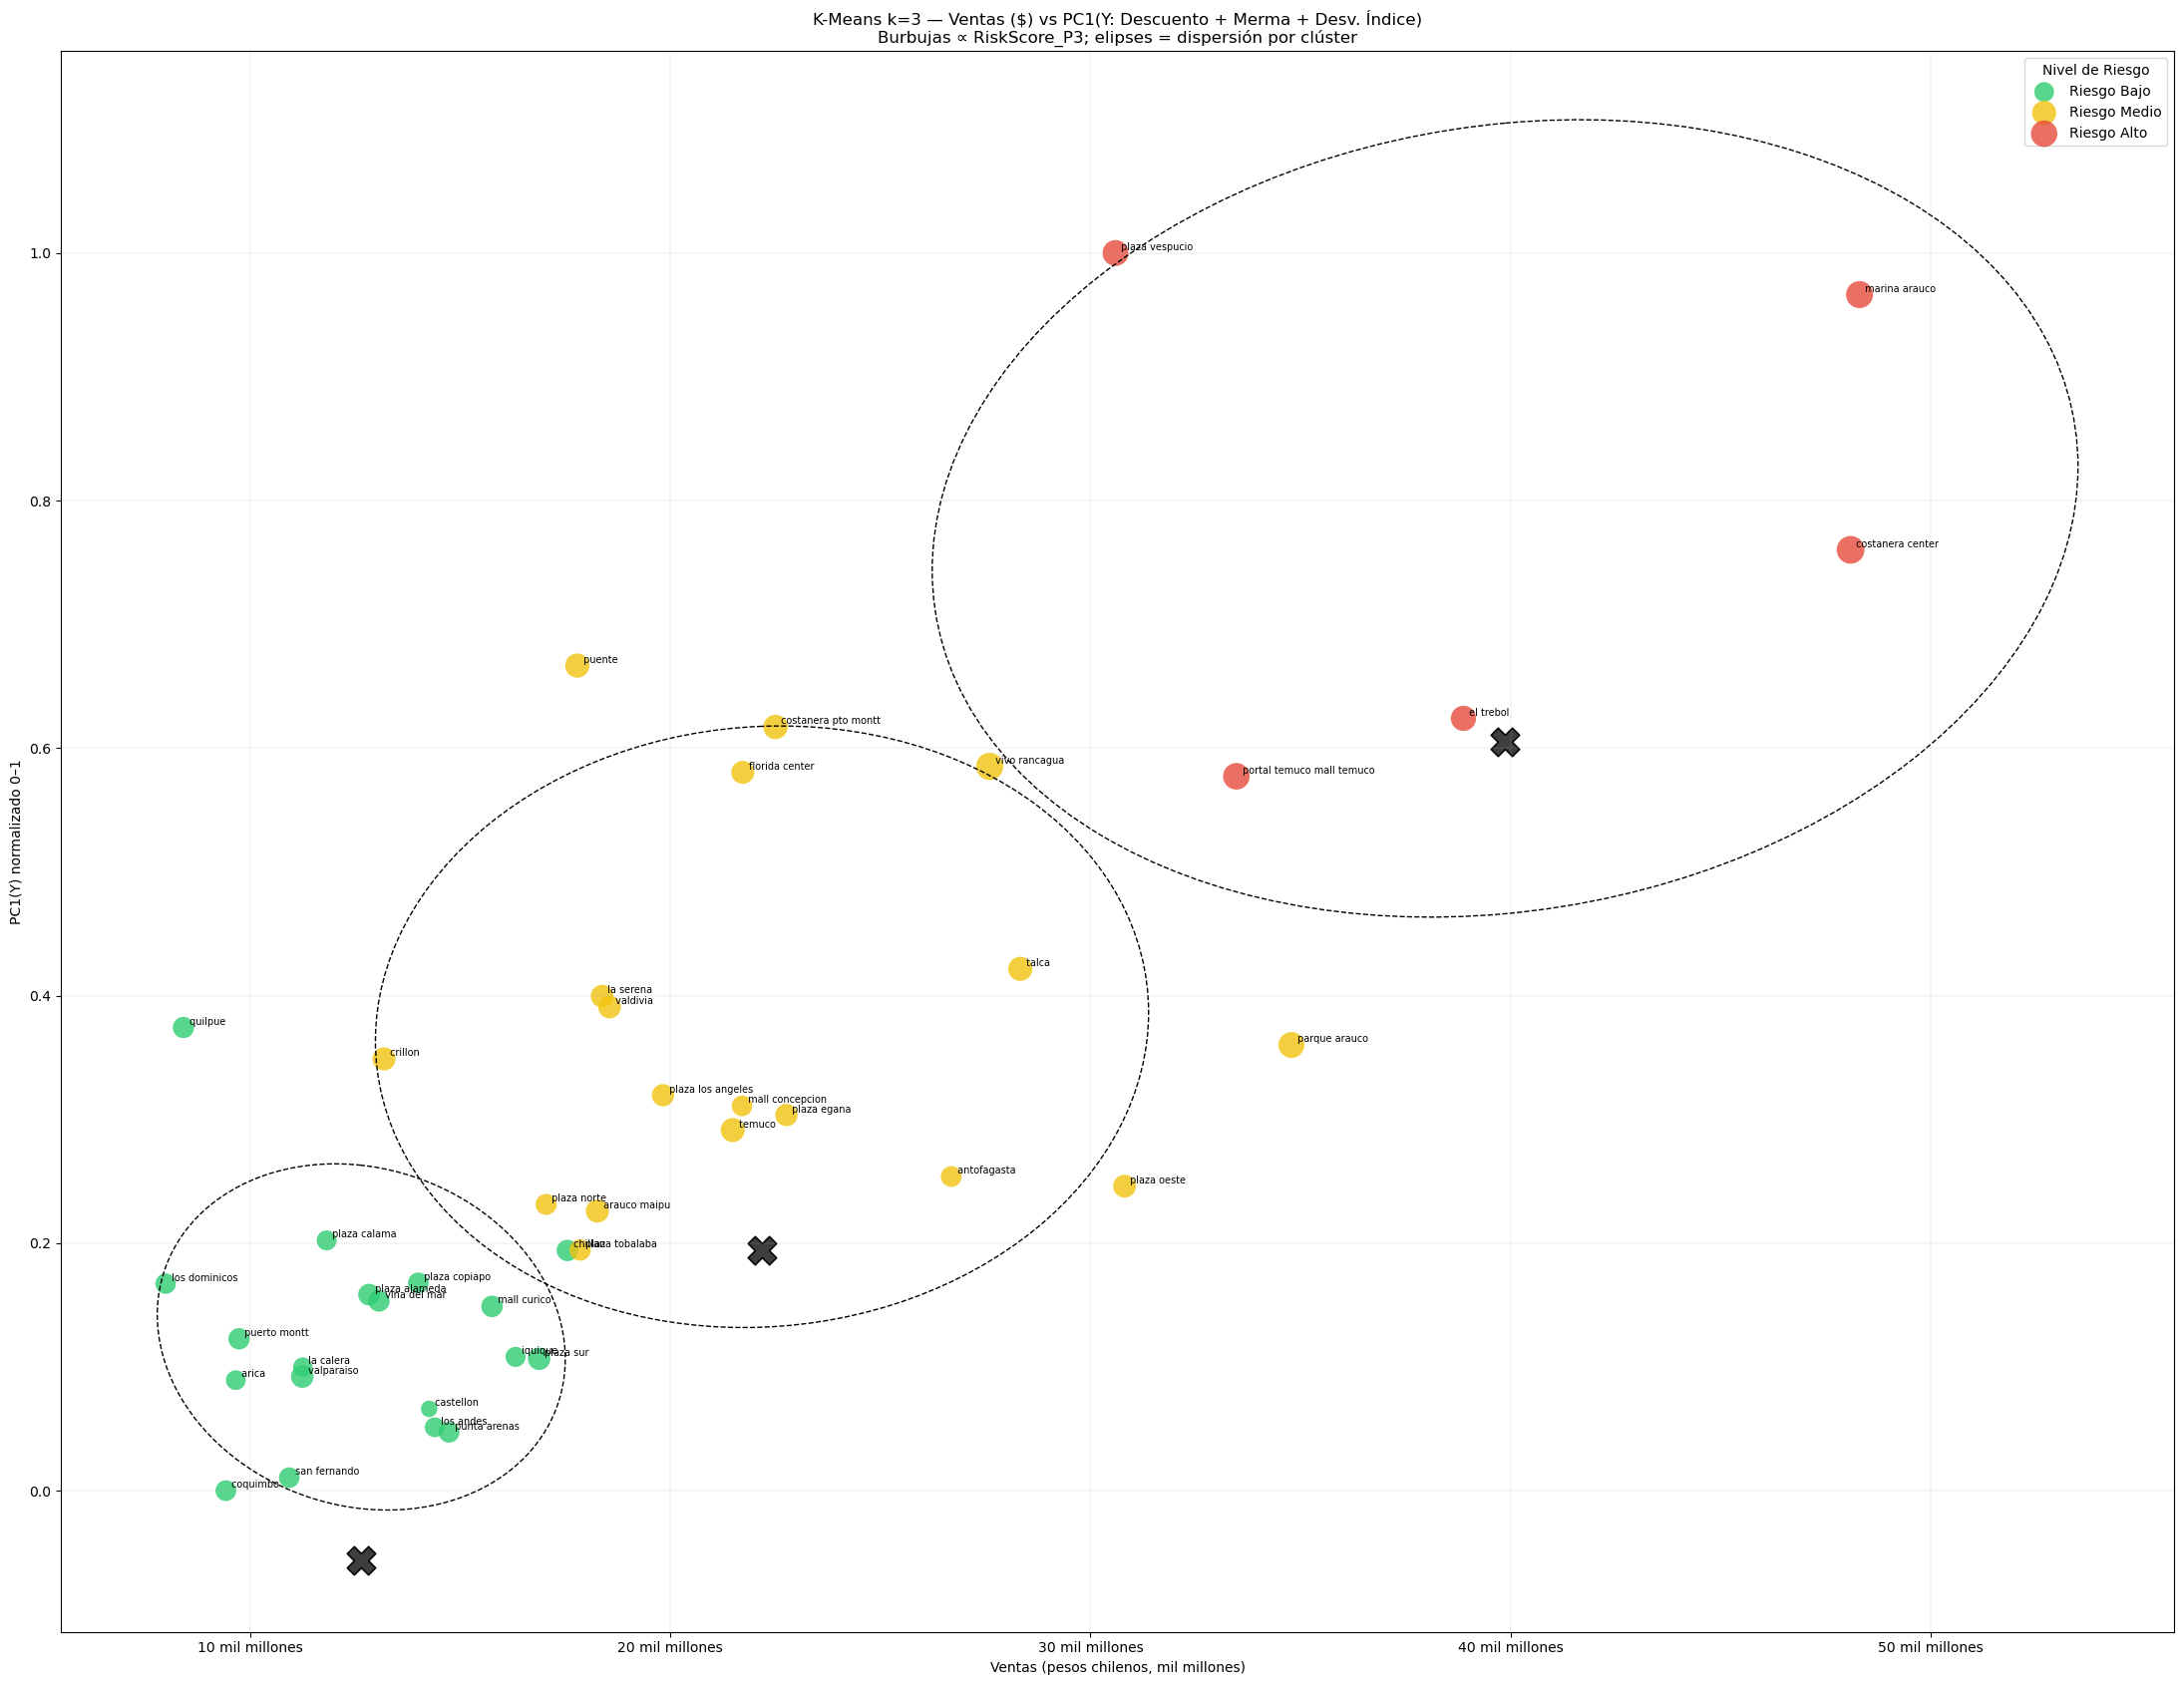

In [80]:
# ==================== Gráfico A (v20): Ventas($) vs PC1(Y: Descuento + Merma + Desv.Índice) ====================

# --- Insumos ya existentes en tu sesión ---
# X_scaled_v8: DataFrame MinMax 0–1 con las 7 variables
# reporte_p3_v8: contiene Ventas_Totales, RiskScore_P3 y columna de sucursal
# labels_k3_, riesgo_k3_, centroids_df_scaled_*: resultados de K-Means k=3
# color_map_v16 (opcional): {"Riesgo Bajo": verde, "Riesgo Medio": amarillo, "Riesgo Alto": rojo}

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---------- Resolver arrays de clúster/centroides/colores ----------
labels_k3_v20 = labels_k3_v16 if 'labels_k3_v16' in globals() else labels_k3_v15
riesgo_k3_v20  = riesgo_k3_v16  if 'riesgo_k3_v16'  in globals() else riesgo_k3_v15
centroids_df_scaled_v20 = centroids_df_scaled_v16 if 'centroids_df_scaled_v16' in globals() else centroids_df_scaled_v15
color_map_v20 = (color_map_v16 if 'color_map_v16' in globals() else
                 {"Riesgo Bajo":"#2ecc71","Riesgo Medio":"#f1c40f","Riesgo Alto":"#e74c3c"})

# Columna de sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_suc_v20 = col_sucursal_v8
else:
    _cands = [c for c in reporte_p3_v8.columns if c.lower() in
              ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v20 = _cands[0] if _cands else None

# ---------- EJE X en $ reales + formateo "mil millones" ----------
x_real_v20 = reporte_p3_v8["Ventas_Totales"].astype(float).values
x_min_v20, x_max_v20 = float(x_real_v20.min()), float(x_real_v20.max())

from matplotlib.ticker import FuncFormatter, MaxNLocator
def _fmt_milmill_v20(x, pos):
    return f"{int(round(x/1e9))} mil millones"

# ---------- EJE Y = PCA(1) de tres variables (con fallback de nombre de columna) ----------
y3_candidates_v20 = ["Desviacion_Meta_Indice", "Desviacion_Meta_Merma"]
y3_col_v20 = next((c for c in y3_candidates_v20 if c in X_scaled_v8.columns), None)
if y3_col_v20 is None:
    raise KeyError("No encuentro ni 'Desviacion_Meta_Indice' ni 'Desviacion_Meta_Merma' en X_scaled_v8.columns")

vars_y_v20 = ["Productos_Dañados_Descuento", "Merma_Destruccion_Costo", y3_col_v20]

from sklearn.decomposition import PCA
pca_y_v20 = PCA(n_components=1, random_state=100)
pc1_y_raw_v20 = pca_y_v20.fit_transform(X_scaled_v8[vars_y_v20].values).ravel()

# Orientar a riesgo (positiva con RiskScore_P3)
risk_v20 = reporte_p3_v8["RiskScore_P3"].values
if np.corrcoef(pc1_y_raw_v20, risk_v20)[0,1] < 0:
    pc1_y_raw_v20 = -pc1_y_raw_v20
    loadings_v20 = -pca_y_v20.components_[0]
else:
    loadings_v20 = pca_y_v20.components_[0]

# Normalizar PC1 a 0–1 para graficar
y_min_v20, y_max_v20 = float(pc1_y_raw_v20.min()), float(pc1_y_raw_v20.max())
y01_v20 = (pc1_y_raw_v20 - y_min_v20) / (y_max_v20 - y_min_v20 + 1e-12)

# ---------- Proyección de centroides al plano ----------
cent_y_raw_v20 = (centroids_df_scaled_v20[vars_y_v20].values @ loadings_v20.reshape(-1,1)).ravel()
cent_y01_v20 = (cent_y_raw_v20 - y_min_v20) / (y_max_v20 - y_min_v20 + 1e-12)
cent_x_real_v20 = x_min_v20 + centroids_df_scaled_v20['Ventas_Totales'].values * (x_max_v20 - x_min_v20 + 1e-12)

# ---------- Helper de elipse (si no existe) ----------
if '_fit_ellipse_from_points' not in globals():
    def _fit_ellipse_from_points(ax, x, y, n_std=1.9, linewidth=1.0, linestyle='--'):
        if len(x) < 3: return
        cov = np.cov(x, y)
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]; vals, vecs = vals[order], vecs[:,order]
        theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
        width, height = 2 * n_std * np.sqrt(np.clip(vals, 1e-12, None))
        ell = plt.matplotlib.patches.Ellipse((x.mean(), y.mean()),
                                             width, height, angle=theta,
                                             fill=False, linestyle=linestyle,
                                             linewidth=linewidth)
        ax.add_patch(ell)

# ---------- Plot ----------
plt.figure(figsize=(22,17))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v20 == lvl)
    if m.any():
        plt.scatter(x_real_v20[m], y01_v20[m],
                    s=(reporte_p3_v8.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.8, label=lvl, c=color_map_v20[lvl], edgecolors='none')

# Elipses por clúster en este plano
for cid in sorted(set(labels_k3_v20)):
    mask_c = (labels_k3_v20 == cid)
    _fit_ellipse_from_points(plt.gca(), x_real_v20[mask_c], y01_v20[mask_c], n_std=1.67, linewidth=1.0)

# Centroides (marcador X)
plt.scatter(cent_x_real_v20, cent_y01_v20,
            s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

# Etiquetas en TODOS los puntos (si tienes columna de sucursal)
if col_suc_v20:
    for xi, yi, name in zip(x_real_v20, y01_v20, reporte_p3_v8[col_suc_v20].astype(str).values):
        plt.annotate(f" {name}", (xi, yi), xytext=(2,2), textcoords="offset points", fontsize=7)

# Ejes y formato
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill_v20))
plt.title("K-Means k=3 — Ventas ($) vs PC1(Y: Descuento + Merma + Desv. Índice)\n"
          "Burbujas ∝ RiskScore_P3; elipses = dispersión por clúster")
plt.xlabel("Ventas (pesos chilenos, mil millones)")
plt.ylabel("PC1(Y) normalizado 0–1")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_A_PC1_trivar_v20.png", dpi=300, bbox_inches='tight')
# plt.show()

# (Opcional) Mostrar las cargaduras de la combinación lineal del eje Y para documentar en la slide:
loadings_df_v20 = pd.Series(loadings_v20, index=vars_y_v20).round(3)
print("\nCargaduras PC1(Y):")
print(loadings_df_v20.to_string())
print("\nImagen guardada: 'grafico_A_PC1_trivar_v20.png'")

In [81]:
import pandas as pd

In [82]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                     chillan     17548478930                 510509   
1                     crillon     13183000192                 391956   
2             mall concepcion     21705948095                 692094   
3   portal temuco mall temuco     33472059392                 803446   
4                     quilpue      8410420645                 289959   
5                  valparaiso     11238928228                 367348   
6                 antofagasta     26685302686                 611376   
7                arauco maipu     18262253560                 483185   
8                       arica      9655889254                 277512   
9                   castellon     14258476937                 399290   
10                   coquimbo      9420251442                 292207   
11           costanera center     48091779474                1011685   
12        costanera pto montt     22502193354                 621773   
13                  el trebol     38877448821                 931839   
14             florida center     21723377628                 597386   
15                    iquique     16316783574                 411142   
16                  la calera     11250025215                 314852   
17                  la serena     18373455631                 520530   
18                  los andes     14391622615                 329641   
19              los dominicos      7986650719                 246099   
20                mall curico     15756063963                 413895   
21              marina arauco     48304720750                1022017   
22              parque arauco     34781890665                 617006   
23              plaza alameda     12828386308                 352526   
24               plaza calama     11818817394                 290263   
25              plaza copiapo     14000893323                 360843   
26                plaza egana     22762922863                 658353   
27          plaza los angeles     19824341357                 532744   
28                plaza norte     17043398221                 423736   
29                plaza oeste     30811601149                 703810   
30                  plaza sur     16875471132                 450201   
31             plaza tobalaba     17852248672                 516994   
32             plaza vespucio     30595140178                 799720   
33                     puente     17784664755                 574435   
34               puerto montt      9733844233                 311605   
35               punta arenas     14732074775                 373852   
36               san fernando     10928710336                 340069   
37                      talca     28329446719                 670734   
38                     temuco     21484650822                 550079   
39                   valdivia     18554089141                 514829   
40              vivo rancagua     27600143121                 702384   
41               vina del mar     13063970486                 417791   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             646643543                   13792      308563708   
1             627231699                   14860      258047668   
2             641811956                   16564      374142871   
3             856797789                   16127      446830375   
4             401728015                    9492      200788281   
5             449454783                    9000      207117945   
6             597361902                    7424      442532831   
7             960838296                   17986      439701548   
8             215637357                    3913      121973949   
9             275485230                    7592      240748388   
10            209846633                    4410      154910741   
11           1424989889                   29355      679695629   
12            493876936                    8584      253715

In [83]:
# ==================== vTEST_NC_REEMPLAZO ====================
# Pruebas con reemplazo de Notas_Credito_Monto por:
#   A) Índice suavizado y winsorizado  -> 'Indice_NC_sobre_Ventas_vR'
#   B) Exceso robusto (residuo Huber)  -> 'Exceso_NC_robusto_vR'
#
# No sobrescribe Variables_Modelo ni Weights originales.

# ---------- 0) Detectar columnas clave ----------
col_ventas = next(c for c in df_Kmeans.columns if c.lower() in ['ventas_totales','total_ventas'])
col_nc     = next(c for c in df_Kmeans.columns if c.lower() in ['notas_credito_monto','total_notas_credito','notas_credito'])

# ---------- 1) Construir variables candidatas ----------
# A) Índice con estabilizador y winsorización
v = df_Kmeans[col_ventas].astype(float).values
nc = df_Kmeans[col_nc].astype(float).values

eps_vR = max(1e-9, np.percentile(v, 5) * 0.10)            # 10% del p5 como estabilizador
ratio_raw_vR = nc / (v + eps_vR)
cap99_vR = np.percentile(ratio_raw_vR[np.isfinite(ratio_raw_vR)], 99)
df_Kmeans['Indice_NC_sobre_Ventas_vR'] = np.clip(ratio_raw_vR, 0, cap99_vR)

# B) Exceso robusto (residuo de NC ~ Ventas)
try:
    from sklearn.linear_model import HuberRegressor
    _reg = HuberRegressor(epsilon=1.35)  # robusto a outliers
except Exception:
    from sklearn.linear_model import LinearRegression
    _reg = LinearRegression()
x = v.reshape(-1,1)
y = nc
_reg.fit(x, y)
y_hat = _reg.predict(x)
resid = y - y_hat
# normalizar a 0–1 (piso 0 en p1, techo p99 para robustez)
low, high = np.percentile(resid, 1), np.percentile(resid, 99)
resid_clip = np.clip(resid, low, high)
df_Kmeans['Exceso_NC_robusto_vR'] = (resid_clip - resid_clip.min()) / (resid_clip.max() - resid_clip.min() + 1e-12)

# ---------- 2) Función genérica para correr K-Means con una de las dos sustituciones ----------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

def _run_kmeans_nc_replacement(kind='ratio'):
    """
    kind: 'ratio' o 'residuo'
    Devuelve: dict con métricas y reporte; no pisa tus globals.
    """
    assert kind in ('ratio','residuo')
    # Variables y pesos nuevos
    if kind == 'ratio':
        new_col = 'Indice_NC_sobre_Ventas_vR'
    else:
        new_col = 'Exceso_NC_robusto_vR'

    Variables_Modelo_v = [new_col if c==col_nc else c for c in Variables_Modelo if c != new_col]
    if col_ventas not in Variables_Modelo_v:
        Variables_Modelo_v = [col_ventas] + Variables_Modelo_v  

    Weights_v = dict(Weights)
    w_nc = Weights_v.pop(col_nc, Weights.get(col_nc, 0.15))  
    Weights_v[new_col] = w_nc

    # MinMax + ponderación √peso
    Xv = df_Kmeans[Variables_Modelo_v].astype(float).copy()
    Xv_minmax = pd.DataFrame(MinMax_Scaler.fit_transform(Xv), index=df_Kmeans.index, columns=Variables_Modelo_v)
    w_vec = np.array([Weights_v[c] for c in Variables_Modelo_v], dtype=float)
    Xv_weighted = Xv_minmax.values * np.sqrt(w_vec)

    # K-Means
    km = KMeans(n_clusters=3, random_state=100, n_init=50, init="k-means++", max_iter=600, tol=1e-5, algorithm='lloyd')
    labels = km.fit_predict(Xv_weighted)

    # Métricas
    sil = float(silhouette_score(Xv_weighted, labels))
    db  = float(davies_bouldin_score(Xv_weighted, labels))

    # RiskScore lineal con los mismos pesos
    Matriz_Risk = Xv_minmax.copy()
    for c,w in Weights_v.items():
        Matriz_Risk[c] *= w
    risk = Matriz_Risk.sum(axis=1)

    # Renombrar clusters por promedio de riesgo
    means = pd.Series(risk).groupby(labels).mean().sort_values()
    rank2name = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto" if k>=3 else "Riesgo Medio")
                 for i,cid in enumerate(means.index)}
    riesgo = pd.Series(labels).map(rank2name).values

    # Comparativa con tu modelo actual (si existe)
    comp = None
    if 'Reporte_Propuesta_6' in globals() and 'Riesgo_P3_MinMax_Pesos' in Resumen_Cluster_Propuesta_5.columns:
        antes = Resumen_Cluster_Propuesta_5['Riesgo_P3_MinMax_Pesos'].astype(str).values
        comp = pd.crosstab(pd.Series(antes, name='Antes'), pd.Series(riesgo, name=f'Con {kind}'))

    # Correlaciones de diagnóstico
    r_v_nc   = float(np.corrcoef(df_Kmeans[col_ventas], df_Kmeans[col_nc])[0,1])
    r_v_new  = float(np.corrcoef(df_Kmeans[col_ventas], df_Kmeans[new_col])[0,1])
    r_nc_new = float(np.corrcoef(df_Kmeans[col_nc],    df_Kmeans[new_col])[0,1])

    # Top sucursales por riesgo (si tenemos la columna de nombre)
    cand_cols = [c for c in df_Kmeans.columns if c.lower() in ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc = cand_cols[0] if cand_cols else None
    top = None
    if col_suc:
        tmp = pd.DataFrame({col_suc: df_Kmeans[col_suc], 'Riesgo': riesgo, 'RiskScore': risk})
        nivel_top = "Riesgo Alto" if "Riesgo Alto" in tmp['Riesgo'].unique() else tmp['Riesgo'].value_counts().index[-1]
        top = (tmp[tmp['Riesgo']==nivel_top]
               .sort_values('RiskScore', ascending=False)
               .head(10))

    return {
        'kind': kind,
        'variables': Variables_Modelo_v,
        'weights': Weights_v,
        'silhouette': sil,
        'davies_bouldin': db,
        'correls': {'ventas_vs_ncMonto': r_v_nc, f'ventas_vs_{new_col}': r_v_new, f'ncMonto_vs_{new_col}': r_nc_new},
        'labels': labels,
        'riesgo': riesgo,
        'risk_score': risk,
        'confusion_vs_actual': comp,
        'top10': top,
        'X_minmax': Xv_minmax,     # por si quieres graficar
        'kmeans': km
    }

# ---------- 3) Ejecutar ambas pruebas y mostrar resultados ----------
res_ratio   = _run_kmeans_nc_replacement('ratio')
res_residuo = _run_kmeans_nc_replacement('residuo')

print("\n=== RESULTADOS (ÍNDICE NC/V) ===")
print(f"Silhouette: {res_ratio['silhouette']:.4f} | Davies-Bouldin: {res_ratio['davies_bouldin']:.3f}")
print("Correlaciones:")
for k,v in res_ratio['correls'].items(): print(f"  {k:>25}: {v: .3f}")
if res_ratio['confusion_vs_actual'] is not None:
    print("\nConfusión vs modelo actual (filas=Antes, columnas=Con índice):\n",
          res_ratio['confusion_vs_actual'].to_string())

print("\n=== RESULTADOS (RESIDUO ROBUSTO) ===")
print(f"Silhouette: {res_residuo['silhouette']:.4f} | Davies-Bouldin: {res_residuo['davies_bouldin']:.3f}")
print("Correlaciones:")
for k,v in res_residuo['correls'].items(): print(f"  {k:>25}: {v: .3f}")
if res_residuo['confusion_vs_actual'] is not None:
    print("\nConfusión vs modelo actual (filas=Antes, columnas=Con residuo):\n",
          res_residuo['confusion_vs_actual'].to_string())

# (Opcional) para inspeccionar el Top-10 del esquema que prefieras:
# res_ratio['top10']      # índice NC/V
# res_residuo['top10']    # exceso robusto



=== RESULTADOS (ÍNDICE NC/V) ===
Silhouette: 0.2548 | Davies-Bouldin: 1.356
Correlaciones:
          ventas_vs_ncMonto:  0.911
  ventas_vs_Indice_NC_sobre_Ventas_vR:  0.124
  ncMonto_vs_Indice_NC_sobre_Ventas_vR:  0.496

=== RESULTADOS (RESIDUO ROBUSTO) ===
Silhouette: 0.2476 | Davies-Bouldin: 1.395
Correlaciones:
          ventas_vs_ncMonto:  0.911
  ventas_vs_Exceso_NC_robusto_vR:  0.110
  ncMonto_vs_Exceso_NC_robusto_vR:  0.509


In [84]:
Resumen_Cluster_Propuesta_5

Ventas_Totales  Notas_credito_Monto  \
Cluster_Propuesta_5                                             
0                   40,130,195,977.60000  1,339,772,023.60000   
1                   12,989,420,263.95238    356,460,531.04762   
2                   22,837,064,457.75000    733,369,317.75000   

                     Reclamos_Cantidad  Desviacion_Meta_Merma  \
Cluster_Propuesta_5                                             
0                             22.00000                0.00122   
1                             12.80952                0.00152   
2                             24.37500                0.00122   

                     Merma_Destruccion_Costo  N° Accidentes  \
Cluster_Propuesta_5                                           
0                         -129,098,509.55600       45.60000   
1                          -38,450,745.04857       26.71429   
2                          -73,243,946.87812       30.75000   

                     Productos_Dañados_Descuento  
Cluster_Propuesta_5                               
0                              116,169,120.60000  
1                               39,213,187.76190  
2                               67,054,968.06250

###### Generamos una Propuesta con Notas de Credito en Efectivo del año 2024

In [85]:
print("Iniciando el procesamiento de Notas de Credito en Contado para el modelo 2024...")

try:
    Notas_Credito_Contado_2024 = pd.read_csv("Notas_Credito_Efectivo_2024.csv")
    print("\nArchivo 'Notas_Credito_Efectivo_2024.csv' cargado exitosamente.")
    print(f"Número de registros de ventas: {len(Notas_Credito_Contado_2024)}")

    Detalle_sucursales = pd.read_excel("Detalle sucursales (1).xlsx")
    print("Archivo 'Detalle_Sucursal_1.xlsx' cargado exitosamente.")

    columna_id_NC_Contado = 'sucursal'
    columna_id_detalle = 'Nº Suc.'
    
    print(f"\nRealizando la unión para obtener los nombres de sucursal...")

    Notas_Credito_Contado_Sucursal_2024 = pd.merge(
        left=Notas_Credito_Contado_2024,
        right=Detalle_sucursales,
        left_on=columna_id_NC_Contado,
        right_on=columna_id_detalle,
        how='left'
    )
    print("\n✅ Unión inicial completada.")

    # --- FASE DE LIMPIEZA Y ESTANDARIZACIÓN DE NOMBRES ---
    print("\nIniciando limpieza y estandarización de nombres de sucursales...")

    # 1. Eliminar filas sin nombre de sucursal ('nan')
    filas_nulas_antes = Notas_Credito_Contado_Sucursal_2024['Tienda'].isnull().sum()
    if filas_nulas_antes > 0:
        Notas_Credito_Contado_Sucursal_2024.dropna(subset=['Tienda'], inplace=True)
        print(f"- Se eliminaron {filas_nulas_antes} filas sin nombre de sucursal.")

    # 2. Unificar los Outlets con sus sucursales principales
    # Creamos un diccionario para mapear los nombres de los Outlets a los nombres estándar
    mapeo_outlets = {
        'Outlet La Serena': 'La Serena',
        'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
        'Outlet Puente': 'Puente',
        'Outlet Iquique': 'Iquique',
        'Outlet Parque Arauco': 'Parque Arauco'
    }

    # Usamos el método .replace() para aplicar el mapeo
    Notas_Credito_Contado_Sucursal_2024['Tienda'] = Notas_Credito_Contado_Sucursal_2024['Tienda'].replace(mapeo_outlets)
    Notas_Credito_Contado_Sucursal_2024.rename(columns={"Tienda": "Nombre_Sucursal"}, inplace=True)
    Notas_Credito_Contado_Sucursal_2024.rename(columns={"total_monto_trx": "Notas_Credito_Contado"}, inplace=True)

    
    print("- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales y se realizo cambio de Nombre de Tiendas a Nombre_Sucursal.")
    
    # --- PASO ADICIONAL Y CRÍTICO: CONSOLIDACIÓN DE DATOS ---
    # Ahora que los nombres están unificados, agrupamos por nombre y sumamos los valores
    # para consolidar los datos de las tiendas principales con sus outlets.
    print("- Consolidando datos de ventas para sucursales unificadas...")
    
    columnas_a_sumar = ['Notas_Credito_Contado', 'total_transacciones'] # Ajusta si tus columnas se llaman diferente
    
    Notas_Credito_Contado_Sucursal_2024 = Notas_Credito_Contado_Sucursal_2024.groupby('Nombre_Sucursal')[columnas_a_sumar].sum().reset_index()

except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")
    print("Por favor, asegúrate de que ambos archivos estén en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa los nombres de las columnas en el código y en tus archivos.")

print("\n✅ Numero de sucursales consolidadas:", len(Notas_Credito_Contado_Sucursal_2024["Nombre_Sucursal"].unique()))

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE NOTAS DE CREDITO CONTADO 2024")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_a_analizar_NC_Contado = 'Notas_Credito_Contado'
    columna_sucursal = 'Tienda'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_ventas(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar_NC_Contado in df_formatted.columns:
            df_formatted[variable_a_analizar_NC_Contado] = df_formatted[variable_a_analizar_NC_Contado].apply(lambda x: f"${x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar_NC_Contado}' ---")
    desc_NC_Contado = Notas_Credito_Contado_Sucursal_2024[variable_a_analizar_NC_Contado].describe()
    print(f"Count: {desc_NC_Contado['count']:.0f}")
    print(f"Mean: ${desc_NC_Contado['mean']:,.0f}")
    print(f"Std: ${desc_NC_Contado['std']:,.0f}")
    print(f"Min: ${desc_NC_Contado['min']:,.0f}")
    print(f"25%: ${desc_NC_Contado['25%']:,.0f}")
    print(f"50% (Median): ${desc_NC_Contado['50%']:,.0f}")
    print(f"75%: ${desc_NC_Contado['75%']:,.0f}")
    print(f"Max: ${desc_NC_Contado['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_a_analizar_NC_Contado}:")
    print(format_numeric_columns_for_display_ventas(Notas_Credito_Contado_Sucursal_2024.nlargest(5, variable_a_analizar_NC_Contado)))

    print(f"\nBottom 5 Sucursales por {variable_a_analizar_NC_Contado}:")
    print(format_numeric_columns_for_display_ventas(Notas_Credito_Contado_Sucursal_2024.nsmallest(5, variable_a_analizar_NC_Contado)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar_NC_Contado}) ---")
    Q1_NC_Contado = desc_NC_Contado['25%']
    Q3_NC_Contado = desc_NC_Contado['75%']
    IQR_NC_Contado = Q3_NC_Contado - Q1_NC_Contado
    lower_NC_Contado = Q1_NC_Contado - 1.5 * IQR_NC_Contado
    upper_NC_Contado = Q3_NC_Contado + 1.5 * IQR_NC_Contado
    outliers_NC_Contado = Notas_Credito_Contado_Sucursal_2024[(Notas_Credito_Contado_Sucursal_2024[variable_a_analizar_NC_Contado] < lower_NC_Contado) | (Notas_Credito_Contado_Sucursal_2024[variable_a_analizar_NC_Contado] > upper_NC_Contado)]

    print(f"  Q1: ${Q1_NC_Contado:,.2f}")
    print(f"  Q3: ${Q3_NC_Contado:,.2f}")
    print(f"  IQR: ${IQR_NC_Contado:,.2f}")
    print(f"  Límite Inferior: ${lower_NC_Contado:,.2f}")
    print(f"  Límite Superior: ${upper_NC_Contado:,.2f}")

    if not outliers_NC_Contado.empty:
        print(f"  Outliers detectados ({len(outliers_NC_Contado)}):")
        print(format_numeric_columns_for_display_ventas(outliers_NC_Contado))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Notas_Credito_Contado_Sucursal_2024[variable_a_analizar_NC_Contado], color='skyblue', width=0.3, ax=ax)
    
    # Formatear el eje Y para mostrar valores en miles de millones (ej. $10B)
    def format_billions(x, pos):
        return f'${x / 1e9:,.1f}B'
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_billions))
    
    ax.set_title(f'Distribución de {variable_a_analizar_NC_Contado} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Ventas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Notas_Credito_Contado_2024' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")


Iniciando el procesamiento de Notas de Credito en Contado para el modelo 2024...

❌ ERROR: No se pudo encontrar el archivo 'Notas_Credito_Efectivo_2024.csv'.
Por favor, asegúrate de que ambos archivos estén en la misma carpeta que tu notebook.


NameError: name 'Notas_Credito_Contado_Sucursal_2024' is not defined

In [ ]:
Notas_Credito_Contado_Sucursal_2024.to_excel("Notas_Credito_Contado_Sucursal_2024.xlsx", index=False)

In [ ]:
# --- 3. Aplicar correcciones a tu DataFrame principal ---

Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal_Normalizada'] = Notas_Credito_Contado_Sucursal_2024["Nombre_Sucursal"].apply(normalizar)
Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal_Corregida'] = Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal_Normalizada'].map(diccionario_correcciones)

# Reemplazamos sólo donde exista una corrección
Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal'] = Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal_Corregida'].fillna(Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal'])

# --- 4. Eliminar columnas auxiliares ---
Notas_Credito_Contado_Sucursal_2024.drop(columns=['Nombre_Sucursal_Normalizada', 'Nombre_Sucursal_Corregida'], inplace=True)

# --- 5. Unir Outlets resultado ---
columnas_a_agrupar = [col for col in Notas_Credito_Contado_Sucursal_2024.columns if col != 'Nombre_Sucursal']
Notas_Credito_Contado_Sucursal_2024 = Notas_Credito_Contado_Sucursal_2024.groupby('Nombre_Sucursal', as_index=False)[columnas_a_agrupar].sum()

Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal'] = Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal'].str.lstrip(' ,;')
Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal'] = Notas_Credito_Contado_Sucursal_2024['Nombre_Sucursal'].apply(normalizar)

df_Kmeans = df_Kmeans.merge(Notas_Credito_Contado_Sucursal_2024[['Nombre_Sucursal', 'Notas_Credito_Contado']],
                left_on='Nombre_Sucursal', right_on='Nombre_Sucursal', how='left')



In [ ]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                 antofagasta     26685302686                 611376   
1                arauco maipu     18262253560                 483185   
2                       arica      9655889254                 277512   
3                   castellon     14258476937                 399290   
4                     chillan     17548478930                 510509   
5                    coquimbo      9420251442                 292207   
6            costanera center     48091779474                1011685   
7         costanera pto montt     22502193354                 621773   
8                     crillon     13183000192                 391956   
9                   el trebol     38877448821                 931839   
10             florida center     21723377628                 597386   
11                    iquique     16316783574                 411142   
12                  la calera     11250025215                 314852   
13                  la serena     18373455631                 520530   
14                  los andes     14391622615                 329641   
15              los dominicos      7986650719                 246099   
16            mall concepcion     21705948095                 692094   
17                mall curico     15756063963                 413895   
18              marina arauco     48304720750                1022017   
19              parque arauco     34781890665                 617006   
20              plaza alameda     12828386308                 352526   
21               plaza calama     11818817394                 290263   
22              plaza copiapo     14000893323                 360843   
23                plaza egana     22762922863                 658353   
24          plaza los angeles     19824341357                 532744   
25                plaza norte     17043398221                 423736   
26                plaza oeste     30811601149                 703810   
27                  plaza sur     16875471132                 450201   
28             plaza tobalaba     17852248672                 516994   
29             plaza vespucio     30595140178                 799720   
30  portal temuco mall temuco     33472059392                 803446   
31                     puente     17784664755                 574435   
32               puerto montt      9733844233                 311605   
33               punta arenas     14732074775                 373852   
34                    quilpue      8410420645                 289959   
35               san fernando     10928710336                 340069   
36                      talca     28329446719                 670734   
37                     temuco     21484650822                 550079   
38                   valdivia     18554089141                 514829   
39                 valparaiso     11238928228                 367348   
40               vina del mar     13063970486                 417791   
41              vivo rancagua     27600143121                 702384   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             597361902                    7424      442532831   
1             960838296                   17986      439701548   
2             215637357                    3913      121973949   
3             275485230                    7592      240748388   
4             646643543                   13792      308563708   
5             209846633                    4410      154910741   
6            1424989889                   29355      679695629   
7             493876936                    8584      253715220   
8             627231699                   14860      258047668   
9            1381710663                   24823      728344226   
10            747604670                   16017      476762008   
11            492224312                    5408      237444306   
12            347672615                    6377      218850

In [ ]:
df_Kmeans['Notas_Credito_Contado'] = df_Kmeans['Notas_Credito_Contado'].astype(float).fillna(0.0)


In [ ]:
df_Kmeans.to_excel("df_Kmeans_2024_actualizado.xlsx", index=False)

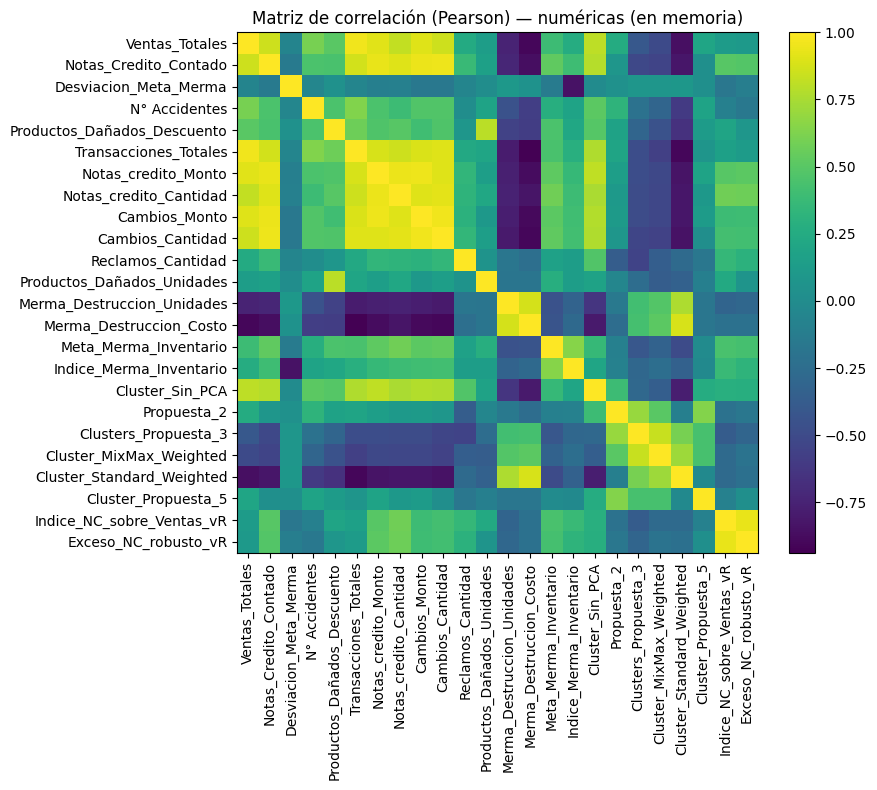


[clean_and_corr_vNC_inl] Listo.
 - Columna NC contado detectada: Notas_Credito_Contado
 - Columnas numéricas: 24
 - Correlación (subset Variables_Modelo) calculada.


In [ ]:
# ==================== Limpieza + Correlaciones en memoria (vNC_inl) ====================
# Supone que ya tienes: import pandas as pd, import numpy as np, import matplotlib.pyplot as plt

# --- 1) Helpers de nombre y limpieza ---
def _norm_vNC(s):
    s = str(s) if not isinstance(s, str) else s
    s2 = s.lower()
    try:
        s2 = s2.encode("ascii","ignore").decode()
    except Exception:
        pass
    return s2

def clean_numeric_series_vNC(series):
    s = series.astype(str).str.strip()
    s = s.str.replace(r'^\((.*)\)$', r'-\1', regex=True)            # (123) -> -123
    s = s.str.replace(r'[^0-9,\.\-]', '', regex=True)               # quitar símbolos
    has_comma = s.str.contains(',', regex=False)                    # coma decimal
    s2 = s.copy()
    s2.loc[has_comma] = s2.loc[has_comma].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    return pd.to_numeric(s2, errors='coerce')

def detect_nc_contado_col_vNC(df):
    aliases = [
        "notas_credito_contado_2024","nc_contado_2024","notas_contado_2024",
        "notas credito contado 2024","notas credito contado","nc_contado",
        "notas_credito_contado","notas de credito contado 2024","nc contado 2024"
    ]
    norm_map = {_norm_vNC(c): c for c in df.columns}
    for a in aliases:
        if a in norm_map:
            return norm_map[a]
    # fallback por palabras clave
    for c in df.columns:
        n = _norm_vNC(c)
        if (("nota" in n or "credito" in n or "nc" in n) and ("contado" in n or "cash" in n)):
            return c
    return None

def looks_numeric_business_vNC(name):
    n = _norm_vNC(name)
    keys = ["venta","nota","credito","reclamo","desviacion","merma","destru","accidente","danad","dañad","descuento","multa","indice"]
    return any(k in n for k in keys)

# --- 2) Función principal: limpia y calcula correlaciones ---
def clean_and_corr_vNC_inl(df_in, prefer_order=None, show_heatmap=True):
    df = df_in.copy()
    # detectar NC contado
    col_nc_contado = detect_nc_contado_col_vNC(df)

    # columnas candidatas a numéricas (por nombre)
    cand_num = [c for c in df.columns if looks_numeric_business_vNC(c)]
    # limpiar solo si no son numéricas
    for c in cand_num:
        if not np.issubdtype(df[c].dtype, np.number):
            df[c] = clean_numeric_series_vNC(df[c])

    # asegurar NC contado numérica si existe
    if col_nc_contado and not np.issubdtype(df[col_nc_contado].dtype, np.number):
        df[col_nc_contado] = clean_numeric_series_vNC(df[col_nc_contado])

    # matrices de correlación sobre numéricas
    num_df = df.select_dtypes(include=[np.number])
    corr_pearson = num_df.corr(method="pearson")
    corr_spearman = num_df.corr(method="spearman")

    # reordenar matriz si hay orden preferido
    if prefer_order:
        order_cols = [c for c in prefer_order if c in corr_pearson.columns]
        rest = [c for c in corr_pearson.columns if c not in order_cols]
        corr_disp = corr_pearson.loc[order_cols+rest, order_cols+rest] if order_cols else corr_pearson
    else:
        corr_disp = corr_pearson

    # correlación solo del set del modelo si existe Variables_Modelo
    corr_modelo = None
    if 'Variables_Modelo' in globals():
        vm = [c for c in Variables_Modelo if c in num_df.columns]
        if len(vm) >= 2:
            corr_modelo = num_df[vm].corr(method="pearson")

    # heatmap (matplotlib puro)
    if show_heatmap:
        fig = plt.figure(figsize=(10, 8))
        im = plt.imshow(corr_disp.values, interpolation='nearest')
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.xticks(ticks=np.arange(corr_disp.shape[1]), labels=corr_disp.columns, rotation=90)
        plt.yticks(ticks=np.arange(corr_disp.shape[0]), labels=corr_disp.index)
        plt.title("Matriz de correlación (Pearson) — numéricas (en memoria)")
        plt.tight_layout()
        plt.show()

    # mini-resumen por consola
    print("\n[clean_and_corr_vNC_inl] Listo.")
    print(" - Columna NC contado detectada:", col_nc_contado)
    print(" - Columnas numéricas:", num_df.shape[1])
    if corr_modelo is not None:
        print(" - Correlación (subset Variables_Modelo) calculada.")

    return {
        "df_clean": df,                      # DataFrame limpio (no guarda a disco)
        "corr_pearson": corr_pearson,        # completa numéricas
        "corr_spearman": corr_spearman,      # completa numéricas
        "corr_display": corr_disp,           # reordenada para display
        "corr_modelo": corr_modelo,          # solo Variables_Modelo (si aplica)
        "col_nc_contado_detectada": col_nc_contado
    }

# --- 3) Orden sugerido para ver primeras (ajústalo a tus nombres exactos) ---
prefer_order_vNC = [
    "Ventas_Totales","Total_Ventas",
    "Notas_Credito_Contado_2024","NC_Contado_2024","Notas_Credito_Contado","NC_Contado",
    "Notas_Credito_Monto","Total_Notas_Credito",
    "Total_Reclamos","Desviacion_Meta_Merma","Costo_Merma_Destruccion","N° Accidentes","N Accidentes",
    "Productos_Dañados_Descuento","N° Multas","N Multas","Desviacion_Meta_Indice"
]

# --- 4) Ejecutar sobre tu Df_Kmeans (o pasa tu DF) ---
res_vNC_inl = clean_and_corr_vNC_inl(df_Kmeans, prefer_order=prefer_order_vNC, show_heatmap=True)

# Accesos rápidos:
df_clean_vNC_inl      = res_vNC_inl["df_clean"]
corr_pearson_vNC_inl  = res_vNC_inl["corr_pearson"]
corr_spearman_vNC_inl = res_vNC_inl["corr_spearman"]
corr_modelo_vNC_inl   = res_vNC_inl["corr_modelo"]
col_nc_contado_vNC_inl= res_vNC_inl["col_nc_contado_detectada"]

# Ejemplos de uso:
# display(corr_pearson_vNC_inl.round(3))       # si estás en notebook
# print(corr_modelo_vNC_inl.round(3))          # si Variables_Modelo existe


In [ ]:
# Conversión robusta a numérico de 'Notas_Credito_Contado'
# - Maneja: "$", espacios, "%", (123) -> -123
# - Detecta formato mixto: 1) "103,022,453.00000" (US: miles=, dec=.)  -> quita comas
#                          2) "103.022.453,00000" (CL/EU: miles=. dec=,) -> quita puntos, coma->punto
# - Si hay solo un tipo de separador, aplica heurística para miles vs decimales.

col = 'Notas_Credito_Contado'  # cambia si tu columna tiene otro nombre

s = df_Kmeans[col].astype(str).str.strip()

# Negativos con paréntesis: (123) -> -123
s = s.str.replace(r'^\((.*)\)$', r'-\1', regex=True)

# Quitar símbolos no numéricos (deja solo dígitos, . , y -)
s = s.str.replace(r'[^0-9,.\-]', '', regex=True)

# Casos con coma Y punto: decide el decimal por el separador que aparece más a la derecha
mask_both = s.str.contains(',', na=False) & s.str.contains(r'\.', regex=True, na=False)
s.loc[mask_both & (s.str.rfind('.') > s.str.rfind(','))] = s.loc[mask_both & (s.str.rfind('.') > s.str.rfind(','))].str.replace(',', '', regex=False)           # dec=.
s.loc[mask_both & (s.str.rfind(',') > s.str.rfind('.'))] = (s.loc[mask_both & (s.str.rfind(',') > s.str.rfind('.'))]
                                                            .str.replace('.', '', regex=False)  # quita miles
                                                            .str.replace(',', '.', regex=False)) # dec=,

# Solo comas presentes (posible decimal=','): si hay una sola coma -> trátala como decimal
mask_only_comma = s.str.contains(',', na=False) & ~s.str.contains(r'\.', regex=True, na=False)
# si hay múltiples comas, asúmelas como miles -> quítalas; si hay una, úsala como decimal
s.loc[mask_only_comma & (s.str.count(',') > 1)] = s.loc[mask_only_comma & (s.str.count(',') > 1)].str.replace(',', '', regex=False)
s.loc[mask_only_comma & (s.str.count(',') == 1)] = s.loc[mask_only_comma & (s.str.count(',') == 1)].str.replace(',', '.', regex=False)

# Solo puntos presentes: elimina puntos de miles (puntos entre dígitos seguidos de grupos de 3) y deja el último como decimal si corresponde
mask_only_dot = s.str.contains(r'\.', regex=True, na=False) & ~s.str.contains(',', na=False)
s.loc[mask_only_dot] = s.loc[mask_only_dot].str.replace(r'(?<=\d)\.(?=\d{3}(?:\D|$))', '', regex=True)

# Convertir a numérico
df_Kmeans[col] = pd.to_numeric(s, errors='coerce')

# (Opcional) Rellenar NaN si quieres:
# Df_Kmeans[col] = Df_Kmeans[col].fillna(0)

print(df_Kmeans[col].head())
print(df_Kmeans[col].dtype)



0   103,022,453.00000
1   129,953,827.00000
2    26,990,589.00000
3    52,641,804.00000
4   111,198,590.00000
Name: Notas_Credito_Contado, dtype: float64
float64


In [ ]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                 antofagasta     26685302686                 611376   
1                arauco maipu     18262253560                 483185   
2                       arica      9655889254                 277512   
3                   castellon     14258476937                 399290   
4                     chillan     17548478930                 510509   
5                    coquimbo      9420251442                 292207   
6            costanera center     48091779474                1011685   
7         costanera pto montt     22502193354                 621773   
8                     crillon     13183000192                 391956   
9                   el trebol     38877448821                 931839   
10             florida center     21723377628                 597386   
11                    iquique     16316783574                 411142   
12                  la calera     11250025215                 314852   
13                  la serena     18373455631                 520530   
14                  los andes     14391622615                 329641   
15              los dominicos      7986650719                 246099   
16            mall concepcion     21705948095                 692094   
17                mall curico     15756063963                 413895   
18              marina arauco     48304720750                1022017   
19              parque arauco     34781890665                 617006   
20              plaza alameda     12828386308                 352526   
21               plaza calama     11818817394                 290263   
22              plaza copiapo     14000893323                 360843   
23                plaza egana     22762922863                 658353   
24          plaza los angeles     19824341357                 532744   
25                plaza norte     17043398221                 423736   
26                plaza oeste     30811601149                 703810   
27                  plaza sur     16875471132                 450201   
28             plaza tobalaba     17852248672                 516994   
29             plaza vespucio     30595140178                 799720   
30  portal temuco mall temuco     33472059392                 803446   
31                     puente     17784664755                 574435   
32               puerto montt      9733844233                 311605   
33               punta arenas     14732074775                 373852   
34                    quilpue      8410420645                 289959   
35               san fernando     10928710336                 340069   
36                      talca     28329446719                 670734   
37                     temuco     21484650822                 550079   
38                   valdivia     18554089141                 514829   
39                 valparaiso     11238928228                 367348   
40               vina del mar     13063970486                 417791   
41              vivo rancagua     27600143121                 702384   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             597361902                    7424      442532831   
1             960838296                   17986      439701548   
2             215637357                    3913      121973949   
3             275485230                    7592      240748388   
4             646643543                   13792      308563708   
5             209846633                    4410      154910741   
6            1424989889                   29355      679695629   
7             493876936                    8584      253715220   
8             627231699                   14860      258047668   
9            1381710663                   24823      728344226   
10            747604670                   16017      476762008   
11            492224312                    5408      237444306   
12            347672615                    6377      218850

In [87]:
Actividad_Criminal = pd.read_excel("Actividad Criminal.xlsx", sheet_name="query")

In [88]:
Actividad_Criminal['Fecha_Evento'] = pd.to_datetime(Actividad_Criminal['Fecha_Evento'], errors='coerce',dayfirst=True, infer_datetime_format=True)
Actividad_Criminal["Año"] = Actividad_Criminal["Fecha_Evento"].dt.year

Actividad_Criminal_2024 = Actividad_Criminal['Año'].notna() & (Actividad_Criminal['Año'] == 2024)
Actividad_Criminal_2024 = Actividad_Criminal.loc[Actividad_Criminal_2024].copy().reset_index(drop=True)

Actividad_Criminal_Sucursal_2024 = (
    Actividad_Criminal_2024
        .groupby('Título', dropna=False)
        .size()
        .reset_index(name='Incidentes_2024')
        .sort_values('Incidentes_2024', ascending=False)
)
Actividad_Criminal_Sucursal_2024["Incidentes_2024"] = Actividad_Criminal_Sucursal_2024["Incidentes_2024"].astype(int)
Actividad_Criminal_Sucursal_2024.rename(columns={"Título": "Nombre_Sucursal"}, inplace=True)

In [89]:
Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'] = (
    Actividad_Criminal_Sucursal_2024['Nombre_Sucursal']
        .astype(str)
        # Quita "Ripley" al comienzo (con posibles guiones/espacios/después de dos puntos)
        .str.replace(r'(?i)^\s*Tienda[\s\-–:]*', '', regex=True)
        # Quita "Tda" o "Tda." en cualquier parte (insensible a mayúsculas)
        .str.replace(r'(?i)\btda\.?\b', '', regex=True)
        .str.replace(r'(?i)^\s*ripley[\s\-–:]*', '', regex=True)
        .str.replace(r'(?i)^\s*Comercial /[\s\-–:]*', '', regex=True)
        .str.replace(r'^\s*\.+\s*', '', regex=True)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
)

# Chequeo rápido
print(Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'].head(10))


16        Plaza Vespucio
27      Costanera Center
20           Plaza Oeste
43           Plaza Egaña
10    Mall Plaza Alameda
46        Plaza Tobalaba
12       Mall del Centro
30        Florida Center
1           Arauco Maipu
25               Copiapó
Name: Nombre_Sucursal, dtype: object


In [90]:
Actividad_Criminal_Sucursal_2024 = Actividad_Criminal_Sucursal_2024.groupby('Nombre_Sucursal', as_index=False)['Incidentes_2024'].sum()


In [91]:
Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'].value_counts().loc[lambda s: s>1]


Series([], Name: Nombre_Sucursal, dtype: int64)

In [92]:
# Eliminar "Alto Las Condes" y "Mall Alto las Condes"
Actividad_Criminal_Sucursal_2024 = Actividad_Criminal_Sucursal_2024[
    ~Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'].str.strip().str.casefold().isin(
        {'alto las condes', 'mall alto las condes', "ofi ahumada 312"}
    )
].reset_index(drop=True)

len(Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'].unique())


47

In [93]:
Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'] = (
    Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'].str.strip().replace({
        'Mall Plaza Trebol': 'El Trébol',
        'Plaza Huechuraba': 'Plaza Norte',
        'Concepcion Castellon': 'Castellón',
        'Pto. Montt Costanera': 'Costanera Pto Montt',
        'Copiapó': 'Plaza Copiapó',
        'Curicó': 'Mall Curicó',
        'Pta Arenas': 'Punta Arenas',
        'San Bernardo': 'Plaza Sur',
        'Mall del Centro Rancagua': 'Vivo Rancagua',
        'Rancagua': 'Vivo Rancagua',
        'Mall Del Centro': 'Puente',
        'Viña Sucre': 'Viña del Mar',
        'Concepcion': 'Castellón',
        'Mall Castellón': 'Castellón',
        'Maipu': 'Arauco Maipu',
        'Los Angeles': 'Plaza Los Ángeles',
        'Mall Calama': 'Plaza Calama',
        'Nueva Valdivia': 'Valdivia',
        'Mall Costanera': 'Costanera Pto Montt',
        'Mall Plaza Alameda': 'Plaza Alameda',
        'Mall del Centro': 'Puente',
    })
)


In [94]:
Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'] = (
    Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'].str.strip().replace({
        'Mall Temuco': 'portal temuco mall temuco',
        }))

In [95]:
Actividad_Criminal_Sucursal_2024 = Actividad_Criminal_Sucursal_2024.groupby('Nombre_Sucursal', as_index=False)['Incidentes_2024'].sum()


In [96]:
import unicodedata

Actividad_Criminal_Sucursal_2024['Nombre_Sucursal'] = (
    Actividad_Criminal_Sucursal_2024['Nombre_Sucursal']
      .astype(str)
      .str.strip()
      .str.lower()
      .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('ascii'))
      .str.replace(r'\s+', ' ', regex=True)  # colapsa espacios múltiples
      .str.strip()
)


In [97]:
### Unión con df_Kmeans
df_Kmeans = df_Kmeans.merge(Actividad_Criminal_Sucursal_2024[['Nombre_Sucursal', 'Incidentes_2024']],
                            left_on='Nombre_Sucursal', right_on='Nombre_Sucursal', how='left')

In [98]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                     chillan     17548478930                 510509   
1                     crillon     13183000192                 391956   
2             mall concepcion     21705948095                 692094   
3   portal temuco mall temuco     33472059392                 803446   
4                     quilpue      8410420645                 289959   
5                  valparaiso     11238928228                 367348   
6                 antofagasta     26685302686                 611376   
7                arauco maipu     18262253560                 483185   
8                       arica      9655889254                 277512   
9                   castellon     14258476937                 399290   
10                   coquimbo      9420251442                 292207   
11           costanera center     48091779474                1011685   
12        costanera pto montt     22502193354                 621773   
13                  el trebol     38877448821                 931839   
14             florida center     21723377628                 597386   
15                    iquique     16316783574                 411142   
16                  la calera     11250025215                 314852   
17                  la serena     18373455631                 520530   
18                  los andes     14391622615                 329641   
19              los dominicos      7986650719                 246099   
20                mall curico     15756063963                 413895   
21              marina arauco     48304720750                1022017   
22              parque arauco     34781890665                 617006   
23              plaza alameda     12828386308                 352526   
24               plaza calama     11818817394                 290263   
25              plaza copiapo     14000893323                 360843   
26                plaza egana     22762922863                 658353   
27          plaza los angeles     19824341357                 532744   
28                plaza norte     17043398221                 423736   
29                plaza oeste     30811601149                 703810   
30                  plaza sur     16875471132                 450201   
31             plaza tobalaba     17852248672                 516994   
32             plaza vespucio     30595140178                 799720   
33                     puente     17784664755                 574435   
34               puerto montt      9733844233                 311605   
35               punta arenas     14732074775                 373852   
36               san fernando     10928710336                 340069   
37                      talca     28329446719                 670734   
38                     temuco     21484650822                 550079   
39                   valdivia     18554089141                 514829   
40              vivo rancagua     27600143121                 702384   
41               vina del mar     13063970486                 417791   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             646643543                   13792      308563708   
1             627231699                   14860      258047668   
2             641811956                   16564      374142871   
3             856797789                   16127      446830375   
4             401728015                    9492      200788281   
5             449454783                    9000      207117945   
6             597361902                    7424      442532831   
7             960838296                   17986      439701548   
8             215637357                    3913      121973949   
9             275485230                    7592      240748388   
10            209846633                    4410      154910741   
11           1424989889                   29355      679695629   
12            493876936                    8584      253715


INICIANDO ANÁLISIS DESCRIPTIVO DE Recuperaiones del 2024

--- Análisis Descriptivo de 'Incidentes_2024' ---
Count: 42
Mean: 351.93
Std: 378.33
Min: 32
25%: 129
50% (Median): 216
75%: 398
Max: 2,059

Top 5 Sucursales por Incidentes_2024:
     Nombre_Sucursal Incidentes_2024
29    plaza vespucio           2,059
6   costanera center           1,174
26       plaza oeste           1,150
23       plaza egana             765
20     plaza alameda             654

Bottom 5 Sucursales por Incidentes_2024:
   Nombre_Sucursal Incidentes_2024
34    san fernando              32
15   los dominicos              56
14       los andes              57
2            arica              74
12       la calera              75

--- Detección de Outliers (Incidentes_2024) ---
  Q1: 129.00
  Q3: 398.50
  IQR: 269.50
  Límite Inferior: -275.25
  Límite Superior: 802.75
  Outliers detectados (3):
     Nombre_Sucursal Incidentes_2024
6   costanera center           1,174
26       plaza oeste           1,150
29    pl

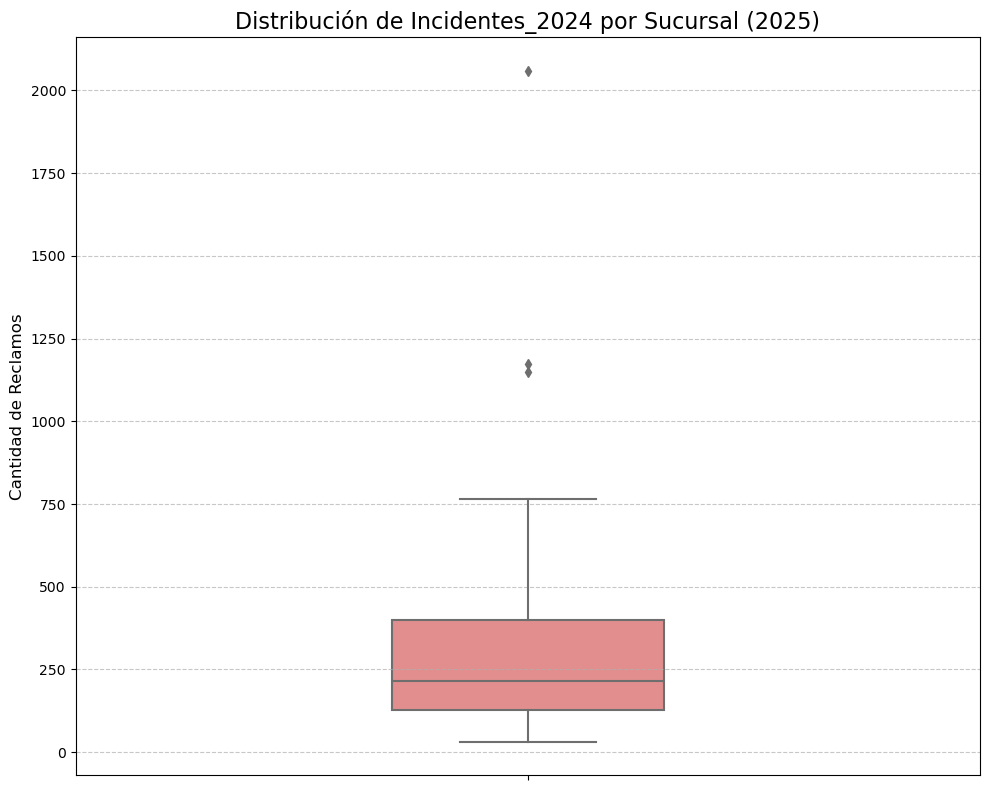

In [99]:
print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE Recuperaiones del 2024")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_recuperos = 'Incidentes_2024'
    columna_sucursal = 'Nombre_Sucursal'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_reclamos(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_recuperos in df_formatted.columns:
            df_formatted[variable_recuperos] = df_formatted[variable_recuperos].apply(lambda x: f"{x:,}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_recuperos}' ---")
    desc_actividad_Criminal = Actividad_Criminal_Sucursal_2024[variable_recuperos].describe()
    print(f"Count: {desc_actividad_Criminal['count']:.0f}")
    print(f"Mean: {desc_actividad_Criminal['mean']:,.2f}")
    print(f"Std: {desc_actividad_Criminal['std']:,.2f}")
    print(f"Min: {desc_actividad_Criminal['min']:,.0f}")
    print(f"25%: {desc_actividad_Criminal['25%']:,.0f}")
    print(f"50% (Median): {desc_actividad_Criminal['50%']:,.0f}")
    print(f"75%: {desc_actividad_Criminal['75%']:,.0f}")
    print(f"Max: {desc_actividad_Criminal['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_recuperos}:")
    print(format_numeric_columns_for_display_reclamos(Actividad_Criminal_Sucursal_2024.nlargest(5, variable_recuperos)))

    print(f"\nBottom 5 Sucursales por {variable_recuperos}:")
    print(format_numeric_columns_for_display_reclamos(Actividad_Criminal_Sucursal_2024.nsmallest(5, variable_recuperos)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_recuperos}) ---")
    Q1_recuperos = desc_actividad_Criminal['25%']
    Q3_recuperos = desc_actividad_Criminal['75%']
    IQR_recuperos = Q3_recuperos - Q1_recuperos
    lower_bound_recuperos = Q1_recuperos - 1.5 * IQR_recuperos
    upper_bound_recuperos = Q3_recuperos + 1.5 * IQR_recuperos
    outliers_recuperos = Actividad_Criminal_Sucursal_2024[
        (Actividad_Criminal_Sucursal_2024[variable_recuperos] < lower_bound_recuperos) |
        (Actividad_Criminal_Sucursal_2024[variable_recuperos] > upper_bound_recuperos)
    ]

    print(f"  Q1: {Q1_recuperos:,.2f}")
    print(f"  Q3: {Q3_recuperos:,.2f}")
    print(f"  IQR: {IQR_recuperos:,.2f}")
    print(f"  Límite Inferior: {lower_bound_recuperos:,.2f}")
    print(f"  Límite Superior: {upper_bound_recuperos:,.2f}")

    if not outliers_recuperos.empty:
        print(f"  Outliers detectados ({len(outliers_recuperos)}):")
        print(format_numeric_columns_for_display_reclamos(outliers_recuperos))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Actividad_Criminal_Sucursal_2024[variable_recuperos], color='lightcoral', width=0.3, ax=ax)

    ax.set_title(f'Distribución de {variable_recuperos} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Cantidad de Reclamos', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Actividad_Criminal_Sucursal_2024' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")




INICIANDO ANÁLISIS DESCRIPTIVO DE Notas de Credito Contado del 2024

--- Análisis Descriptivo de 'Incidentes_2024' ---
Count: 42
Mean: 351.93
Std: 378.33
Min: 32
25%: 129
50% (Median): 216
75%: 398
Max: 2,059

Top 5 Sucursales por Incidentes_2024:
     Nombre_Sucursal Incidentes_2024
29    plaza vespucio           2,059
6   costanera center           1,174
26       plaza oeste           1,150
23       plaza egana             765
20     plaza alameda             654

Bottom 5 Sucursales por Incidentes_2024:
   Nombre_Sucursal Incidentes_2024
34    san fernando              32
15   los dominicos              56
14       los andes              57
2            arica              74
12       la calera              75

--- Detección de Outliers (Incidentes_2024) ---
  Q1: 129.00
  Q3: 398.50
  IQR: 269.50
  Límite Inferior: -275.25
  Límite Superior: 802.75
  Outliers detectados (3):
     Nombre_Sucursal Incidentes_2024
6   costanera center           1,174
26       plaza oeste           1,1

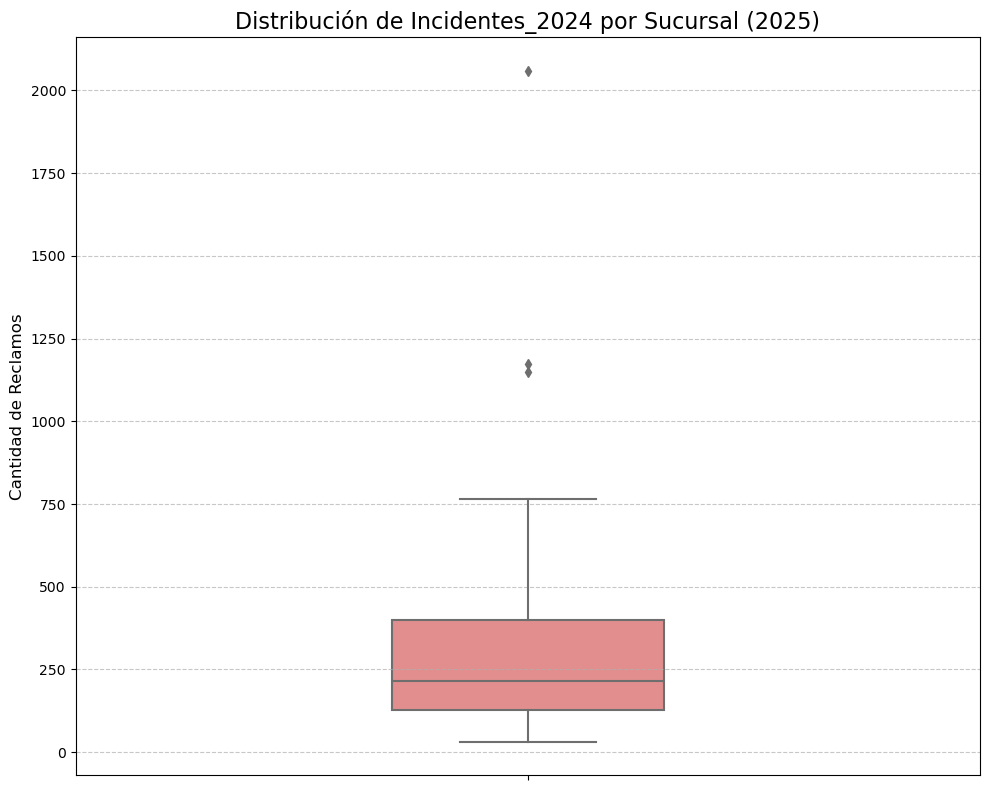

In [100]:
print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE Notas de Credito Contado del 2024")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_NC_Contado = 'Incidentes_2024'
    columna_sucursal = 'Nombre_Sucursal'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_reclamos(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_recuperos in df_formatted.columns:
            df_formatted[variable_recuperos] = df_formatted[variable_recuperos].apply(lambda x: f"{x:,}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_recuperos}' ---")
    desc_actividad_Criminal = Actividad_Criminal_Sucursal_2024[variable_recuperos].describe()
    print(f"Count: {desc_actividad_Criminal['count']:.0f}")
    print(f"Mean: {desc_actividad_Criminal['mean']:,.2f}")
    print(f"Std: {desc_actividad_Criminal['std']:,.2f}")
    print(f"Min: {desc_actividad_Criminal['min']:,.0f}")
    print(f"25%: {desc_actividad_Criminal['25%']:,.0f}")
    print(f"50% (Median): {desc_actividad_Criminal['50%']:,.0f}")
    print(f"75%: {desc_actividad_Criminal['75%']:,.0f}")
    print(f"Max: {desc_actividad_Criminal['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_recuperos}:")
    print(format_numeric_columns_for_display_reclamos(Actividad_Criminal_Sucursal_2024.nlargest(5, variable_recuperos)))

    print(f"\nBottom 5 Sucursales por {variable_recuperos}:")
    print(format_numeric_columns_for_display_reclamos(Actividad_Criminal_Sucursal_2024.nsmallest(5, variable_recuperos)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_recuperos}) ---")
    Q1_recuperos = desc_actividad_Criminal['25%']
    Q3_recuperos = desc_actividad_Criminal['75%']
    IQR_recuperos = Q3_recuperos - Q1_recuperos
    lower_bound_recuperos = Q1_recuperos - 1.5 * IQR_recuperos
    upper_bound_recuperos = Q3_recuperos + 1.5 * IQR_recuperos
    outliers_recuperos = Actividad_Criminal_Sucursal_2024[
        (Actividad_Criminal_Sucursal_2024[variable_recuperos] < lower_bound_recuperos) |
        (Actividad_Criminal_Sucursal_2024[variable_recuperos] > upper_bound_recuperos)
    ]

    print(f"  Q1: {Q1_recuperos:,.2f}")
    print(f"  Q3: {Q3_recuperos:,.2f}")
    print(f"  IQR: {IQR_recuperos:,.2f}")
    print(f"  Límite Inferior: {lower_bound_recuperos:,.2f}")
    print(f"  Límite Superior: {upper_bound_recuperos:,.2f}")

    if not outliers_recuperos.empty:
        print(f"  Outliers detectados ({len(outliers_recuperos)}):")
        print(format_numeric_columns_for_display_reclamos(outliers_recuperos))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Actividad_Criminal_Sucursal_2024[variable_recuperos], color='lightcoral', width=0.3, ax=ax)

    ax.set_title(f'Distribución de {variable_recuperos} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Cantidad de Reclamos', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Actividad_Criminal_Sucursal_2024' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")

In [ ]:
df_Kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nombre_Sucursal              42 non-null     object 
 1   Ventas_Totales               42 non-null     int64  
 2   Transacciones_Totales        42 non-null     int64  
 3   Notas_credito_Monto          42 non-null     int64  
 4   Notas_credito_Cantidad       42 non-null     int64  
 5   Cambios_Monto                42 non-null     int64  
 6   Cambios_Cantidad             42 non-null     int64  
 7   Reclamos_Cantidad            42 non-null     int64  
 8   Productos_Dañados_Unidades   42 non-null     int64  
 9   Productos_Dañados_Descuento  42 non-null     int64  
 10  Merma_Destruccion_Unidades   42 non-null     int64  
 11  Merma_Destruccion_Costo      42 non-null     float64
 12  Meta_Merma_Inventario        42 non-null     float64
 13  Indice_Merma_Inventari

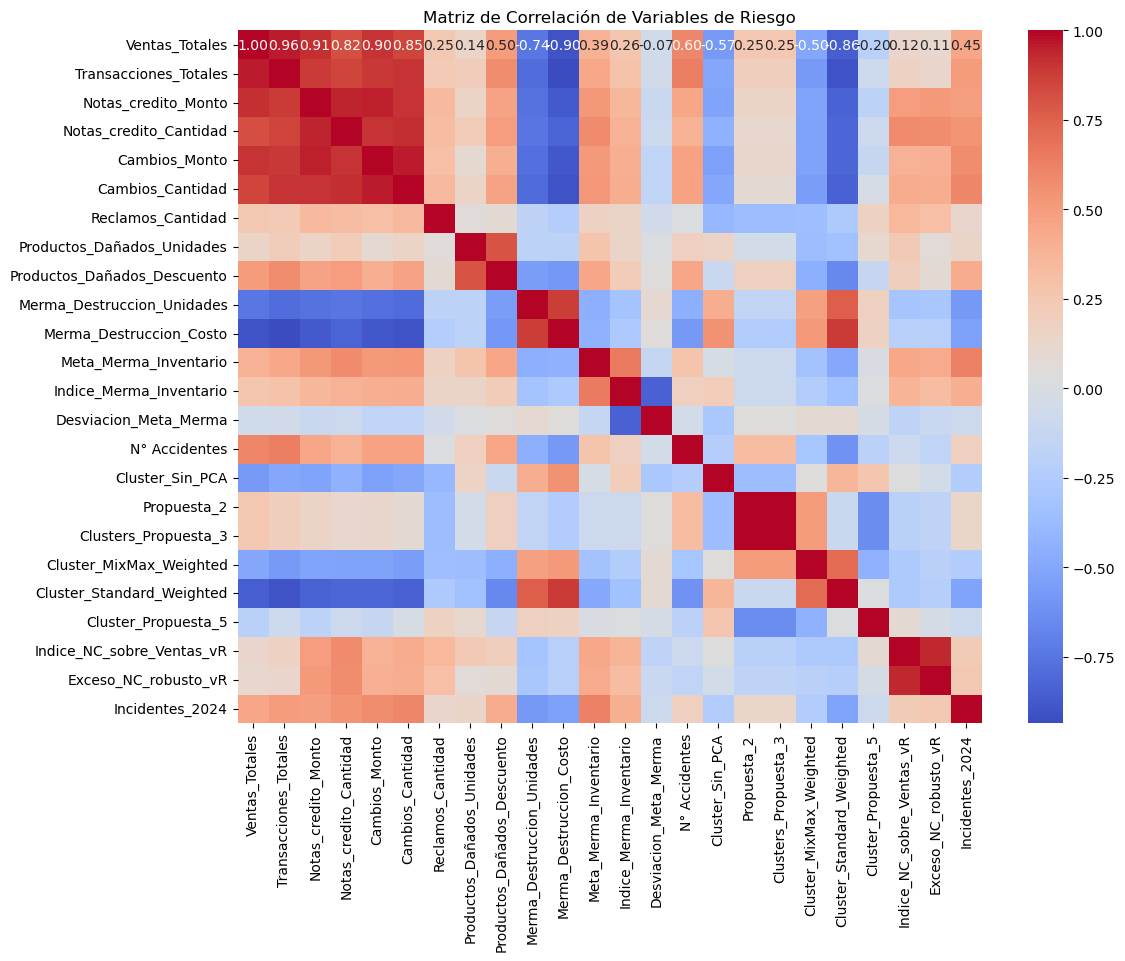

In [101]:

variables_numericas_2 = df_Kmeans.drop(columns=['Nombre_Sucursal', "Riesgo_Propuesta_1", "Riesgo_Propuesta_2","Riesgo_Propuesta_3", "Riesgo_Propuesta_4", "Riesgo_Propuesta_4_Standard", "Riesgo_Propuesta_5"]) # O como se llame la columna de nombres

plt.figure(figsize=(12, 9))
matriz_correlacion = variables_numericas_2.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables de Riesgo')
plt.show()

In [102]:
variables_2024_V10 = [
    "Ventas_Totales", "Notas_Credito_Contado",
    "Reclamos_Cantidad", "Desviacion_Meta_Merma",
    "Merma_Destruccion_Costo", "N° Accidentes",
    "Productos_Dañados_Descuento", "Incidentes_2024"
]

# Pesos finales (ajusta aquí si Auditoría confirma otra ponderación)
weights_final_v10 = {
    "Ventas_Totales": 0.15,
    "Notas_Credito_Contado": 0.15,
    "Desviacion_Meta_Merma": 0.15,
    "Productos_Dañados_Descuento": 0.15,
    "Merma_Destruccion_Costo": 0.15,
    "N° Accidentes": 0.07,
    "Reclamos_Cantidad": 0.10,
    "Incidentes_2024": 0.08
}

# Búsqueda de k en el mismo espacio (MinMax + pesos)
k_grid_v10 = [3, 4, 5, 6]
rs_v10 = 42  # unificar semilla

# Columna de sucursal (detección flexible)
cand_cols_v10 = [c for c in df_Kmeans.columns if c.lower() in
                ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
col_sucursal_v10 = cand_cols_v10[0] if cand_cols_v10 else None

# -------- 1) Subset y MinMax --------
X_base_v10 = df_Kmeans[variables_2024_V10].astype(float).copy()

mmx_v10 = MinMaxScaler()
X_scaled_v10 = pd.DataFrame(
    mmx_v10.fit_transform(X_base_v10),
    index=df_Kmeans.index,
    columns=variables_2024_V10
)

# -------- 2) Ponderación geométrica (para K-Means) con sqrt(peso) --------
weights_vec_v10 = np.array([weights_final_v10[v] for v in variables_2024_V10], dtype=float)
weights_sqrt_v10 = np.sqrt(weights_vec_v10)  # asegura contribución ~ peso en distancia euclídea

X_weighted_v10 = X_scaled_v10.values * weights_sqrt_v10

# -------- 3) Selección de k (Silhouette en espacio ponderado) --------
sil_por_k_v10 = {}
for k in k_grid_v10:
    km_tmp_v10 = KMeans(n_clusters=k, n_init=50, random_state=100)
    labels_tmp_v10 = km_tmp_v10.fit_predict(X_weighted_v10)
    sil_tmp_v10 = silhouette_score(X_weighted_v10, labels_tmp_v10)
    sil_por_k_v10[k] = float(sil_tmp_v10)

# Mejor k por Silhouette (si empata, el menor k)
k_optimo_v10 = sorted(sil_por_k_v10.items(), key=lambda x: (-x[1], x[0]))[0][0]

# -------- 4) K-Means final --------
km_p3_v10 = KMeans(n_clusters=3, n_init=50, random_state=100)
labels_p3_v10 = km_p3_v8.fit_predict(X_weighted_v10)

# -------- 5) Risk score (ponderación lineal con pesos) --------
# Nota: aquí usamos PESO (no sqrt) para el score operativo
risk_matrix_v10 = X_scaled_v10.copy()
for col, w in weights_final_v10.items():
    risk_matrix_v10[col] = risk_matrix_v10[col] * w
risk_score_v10 = risk_matrix_v10.sum(axis=1)

# -------- 6) Etiquetado automático por riesgo --------
df_tmp_v10 = pd.DataFrame({"cluster_id": labels_p3_v10, "risk": risk_score_v10})
means_v10 = df_tmp_v10.groupby("cluster_id")["risk"].mean().sort_values()  # ascendente
rank_map_v10 = {cid: rank for rank, cid in enumerate(means_v10.index)}      # 0= bajo ... 2= alto (si k=3)
label_map_v10 = {0:"Riesgo Bajo", 1:"Riesgo Medio", 2:"Riesgo Alto", 3:"Riesgo Muy Alto"}

cluster_rank_v10 = df_tmp_v10["cluster_id"].map(rank_map_v10)
cluster_label_v10 = cluster_rank_v10.map(label_map_v10)

# -------- 7) Reporte final --------
reporte_cols_base_v10 = [col_sucursal_v10] if col_sucursal_v10 else []
reporte_p3_v10 = pd.concat([
    df_Kmeans[reporte_cols_base_v10],
    pd.DataFrame({
        "Cluster_P6_MinMax_Pesos": labels_p3_v10,
        "Riesgo_P6_MinMax_Pesos": cluster_label_v10.values,
        "RiskScore_P6": risk_score_v10.values
    }, index=df_Kmeans.index),
    X_base_v10
], axis=1)

# -------- 8) Perfil de clústeres --------
perfil_p3_v10 = (reporte_p3_v10
                .groupby("Riesgo_P6_MinMax_Pesos")[variables_2024_V10]
                .mean())

# Ajuste de redondeo (coherente con tu notebook)
perfil_p3_v10 = perfil_p3_v10.copy()
for c in perfil_p3_v10.columns:
    perfil_p3_v10[c] = perfil_p3_v10[c].round(5 if c == "Desviacion_Meta_Merma" else 2)

# -------- 9) Top sucursales a auditar (dentro del riesgo más alto) --------
if cluster_label_v10.isin(["Riesgo Alto","Riesgo Muy Alto"]).any():
    nivel_top_v10 = "Riesgo Muy Alto" if "Riesgo Muy Alto" in cluster_label_v10.values else "Riesgo Alto"
    mask_top_v10 = (cluster_label_v10.values == nivel_top_v10)
    top_rank_v10 = (reporte_p3_v10.loc[mask_top_v10]
                   .sort_values("RiskScore_P6", ascending=False)
                   .head(10))
else:
    # Si no hay etiqueta "Alto/Muy Alto" por k pequeño -> tomar el top global
    top_rank_v10 = (reporte_p3_v10
                   .sort_values("RiskScore_P6", ascending=False)
                   .head(10))

# Prints de control (conservadores, no muy verbosos)
print("\n=== Propuesta 6 — MinMax + Pesos (v10) ===")
print(f"Silhouette por k: {sil_por_k_v10}")
print(f"k óptimo: {k_optimo_v10}")
print("\n-- Perfil por nivel de riesgo --")
print(perfil_p3_v10)
if col_sucursal_v10:
    print("\n-- Top 10 sucursales para auditoría (según RiskScore_P6) --")
    print(top_rank_v10[[col_sucursal_v10, "Riesgo_P6_MinMax_Pesos", "RiskScore_P6"]].to_string(index=False))
else:
    print("\n(Nota) No se detectó columna de sucursal; se listan índices.")
    print(top_rank_v10[["Riesgo_P6_MinMax_Pesos", "RiskScore_P6"]].to_string(index=False))

KeyError: "['Notas_Credito_Contado'] not in index"

In [103]:

from typing import Dict, List, Optional
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---------------------------
# 1) CONFIG / VARIABLES CLAVE
# ---------------------------

# Variables/features usadas para el clustering (v10)
FEATURES_V10: List[str] = [
    "Ventas_Totales",
    "Notas_Credito_Contado",
    "Reclamos_Cantidad",
    "Desviacion_Meta_Merma",
    "Merma_Destruccion_Costo",
    "N° Accidentes",
    "Productos_Dañados_Descuento",
    "Incidentes_2024",
]

# Pesos finales para el cálculo del risk score (ponderación lineal)
WEIGHTS_V10: Dict[str, float] = {
    "Ventas_Totales": 0.13,
    "Notas_Credito_Contado": 0.14,
    "Desviacion_Meta_Merma": 0.15,
    "Productos_Dañados_Descuento": 0.15,
    "Merma_Destruccion_Costo": 0.15,
    "N° Accidentes": 0.07,
    "Reclamos_Cantidad": 0.09,
    "Incidentes_2024": 0.12,
}

# Grid de k a evaluar (en el espacio ponderado)
K_CANDIDATES: List[int] = [3, 4, 5, 6]

# Semilla (reproducibilidad)
RANDOM_STATE_V10: int = 42

# ---------------------------
# 2) DETECCIÓN COLUMNA SUCURSAL
# ---------------------------
# Buscamos una columna candidata para mostrar nombres de sucursal en el reporte final
candidate_cols: List[str] = [
    c for c in df_Kmeans.columns
    if c.lower() in [
        "nombre_sucursal", "sucursal", "tienda",
        "cod_sucursal", "código_sucursal", "codigo_sucursal"
    ]
]
COL_SUCURSAL_V10: Optional[str] = candidate_cols[0] if candidate_cols else None

# ---------------------------
# 3) SUBSET DE FEATURES Y MINMAX
# ---------------------------
# Nos aseguramos que las columnas existan y convertir a float
missing_features = [f for f in FEATURES_V10 if f not in df_Kmeans.columns]
if missing_features:
    raise KeyError(f"Faltan columnas requeridas en df_Kmeans: {missing_features}")

X_base_v10 = df_Kmeans[FEATURES_V10].astype(float).copy()

scaler_mmx = MinMaxScaler()
X_scaled_array = scaler_mmx.fit_transform(X_base_v10)  # numpy array
X_scaled_v10 = pd.DataFrame(X_scaled_array, index=df_Kmeans.index, columns=FEATURES_V10)

# ---------------------------
# 4) PONDERACIÓN PARA DISTANCIA (sqrt de peso)
#    => se usa para KMeans (espacio ponderado)
# ---------------------------
# Vector de pesos en el mismo orden que FEATURES_V10
weights_vector = np.array([WEIGHTS_V10[feat] for feat in FEATURES_V10], dtype=float)
weights_sqrt = np.sqrt(weights_vector)  # raíz para que la distancia euclidiana refleje pesos

# Aplicamos la ponderación multiplicando cada columna por sqrt(peso)
X_weighted_v10 = X_scaled_v10.values * weights_sqrt  # matriz numpy para KMeans

# ---------------------------
# 5) BÚSQUEDA DE k ÓPTIMO (Silhouette en espacio ponderado)
# ---------------------------
silhouette_by_k: Dict[int, float] = {}
for k in K_CANDIDATES:
    km_tmp = KMeans(n_clusters=k, n_init=50, random_state=RANDOM_STATE_V10)
    labels_tmp = km_tmp.fit_predict(X_weighted_v10)
    sil_score_tmp = silhouette_score(X_weighted_v10, labels_tmp)
    silhouette_by_k[k] = float(sil_score_tmp)

# Elegir k con mayor silhouette; en empate preferimos el menor k
k_optimo_candidates = sorted(
    silhouette_by_k.items(),
    key=lambda item: (-item[1], item[0])  # ordenar por score desc, luego k asc
)
k_optimo_v10 = k_optimo_candidates[0][0]

# ---------------------------
# 6) K-MEANS FINAL (usar k_optimo_v10)
# ---------------------------
k_final = k_optimo_v10
kmeans_final = KMeans(n_clusters=3, n_init=50, random_state=100)
labels_final = kmeans_final.fit_predict(X_weighted_v10)  # etiquetas finales (array numpy)

# ---------------------------
# 7) RISK SCORE (suma ponderada en espacio MinMax con PESOS lineales)
#    => Este risk_score se usa para ordenar y etiquetar clusters por riesgo
# ---------------------------
risk_matrix = X_scaled_v10.copy()
for col_name, w in WEIGHTS_V10.items():
    risk_matrix[col_name] = risk_matrix[col_name] * w

risk_score_v10 = risk_matrix.sum(axis=1)  # Serie con índice igual a df_Kmeans.index

# ---------------------------
# 8) ETIQUETADO AUTOMÁTICO POR RIESGO
#    - Calculamos mean risk por cluster y ordenamos ascendente (0 = menor riesgo)
#    - Luego mapeamos esos rangos a etiquetas legibles.
# ---------------------------
df_tmp = pd.DataFrame({"cluster_id": labels_final, "risk": risk_score_v10}, index=df_Kmeans.index)
cluster_risk_means = df_tmp.groupby("cluster_id")["risk"].mean().sort_values()  # ascendente

# rank_map: cluster_id -> rank (0 = más bajo)
rank_map = {cluster_id: rank for rank, cluster_id in enumerate(cluster_risk_means.index)}

# Etiquetas legibles, extendibles según k
label_candidates = [
    "Riesgo Bajo",
    "Riesgo Medio",
    "Riesgo Alto",
    "Riesgo Muy Alto",
    "Riesgo Crítico",
]
# Si k_final > len(label_candidates) se generan etiquetas genéricas adicionales
if k_final > len(label_candidates):
    extra = [f"Riesgo Nivel {i}" for i in range(len(label_candidates)+1, k_final+1)]
    label_candidates.extend(extra)

# Mapear rank -> etiqueta (0 = Bajo, ... , k-1 = más alto)
rank_to_label = {rank: label_candidates[rank] for rank in range(k_final)}

# Aplicar mapeos: de cluster_id -> rank -> etiqueta
cluster_rank_series = pd.Series(labels_final, index=df_Kmeans.index).map(rank_map)
cluster_label_series = cluster_rank_series.map(rank_to_label)

# ---------------------------
# 9) REPORT: consolidar resultados visibles para auditoría
# ---------------------------
report_columns_base = [COL_SUCURSAL_V10] if COL_SUCURSAL_V10 else []
report_df_v10 = pd.concat([
    df_Kmeans[report_columns_base],  # puede ser vacío si no se detectó columna de sucursal
    pd.DataFrame({
        "Cluster_MinMax_Pesos_v10": labels_final,
        "Riesgo_MinMax_Pesos_v10": cluster_label_series.values,
        "RiskScore_P6_v10": risk_score_v10.values
    }, index=df_Kmeans.index),
    X_base_v10  # valores originales sin escalar
], axis=1)

# ---------------------------
# 10) PERFIL DE CLUSTERS: medias por nivel de riesgo
# ---------------------------
perfil_by_risk = (
    report_df_v10
    .groupby("Riesgo_MinMax_Pesos_v10")[FEATURES_V10]
    .mean()
)

# Ajuste de formato: redondeo coherente
perfil_by_risk = perfil_by_risk.copy()
for col in perfil_by_risk.columns:
    if col == "Desviacion_Meta_Merma":
        perfil_by_risk[col] = perfil_by_risk[col].round(5)
    else:
        perfil_by_risk[col] = perfil_by_risk[col].round(2)

# ---------------------------
# 11) TOP SUCURSALES A AUDITAR (dentro del/los nivel(es) de mayor riesgo)
# ---------------------------
# Determinar si hay etiquetas "muy alto" o "alto" presentes para priorizar
high_labels = [lab for lab in rank_to_label.values() if "Alto" in lab]
if any(lab in cluster_label_series.values for lab in high_labels):
    # preferir "Riesgo Muy Alto" si existe
    if "Riesgo Muy Alto" in cluster_label_series.values:
        target_label = "Riesgo Muy Alto"
    elif "Riesgo Alto" in cluster_label_series.values:
        target_label = "Riesgo Alto"
    else:
        # fallback: la etiqueta con mayor rank (más alto)
        target_label = max(rank_to_label.values(), key=lambda x: list(rank_to_label.values()).index(x))
    mask_top = cluster_label_series.values == target_label
    top_candidates = (
        report_df_v10.loc[mask_top]
        .sort_values("RiskScore_P6_v10", ascending=False)
        .head(10)
    )
else:
    # Si no hay etiquetas con "Alto", tomar top global por RiskScore
    top_candidates = (
        report_df_v10
        .sort_values("RiskScore_P6_v10", ascending=False)
        .head(10)
    )

# ---------------------------
# 12) PRINTS DE CONTROL (resumen compacto)
# ---------------------------
print("\n=== Propuesta 6 — MinMax + Pesos (v10) — Resumen ===")
print(f"Silhouette por k evaluados: {silhouette_by_k}")
print(f"k óptimo seleccionado (por silhouette): {k_optimo_v10}")
print("\n-- Perfil promedio por nivel de riesgo --")
print(perfil_by_risk)
print("\n-- Top 10 sucursales para auditoría (según RiskScore_P6_v10) --")
if COL_SUCURSAL_V10:
    print(top_candidates[[COL_SUCURSAL_V10, "Riesgo_MinMax_Pesos_v10", "RiskScore_P6_v10"]].to_string(index=False))
else:
    print("(Nota) No se detectó columna de sucursal; se listan índices y métricas:")
    print(top_candidates[["Riesgo_MinMax_Pesos_v10", "RiskScore_P6_v10"]].to_string(index=False))

KeyError: "Faltan columnas requeridas en df_Kmeans: ['Notas_Credito_Contado']"

In [ ]:
report_df_v10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nombre_Sucursal              42 non-null     object 
 1   Cluster_MinMax_Pesos_v10     42 non-null     int32  
 2   Riesgo_MinMax_Pesos_v10      42 non-null     object 
 3   RiskScore_P6_v10             42 non-null     float64
 4   Ventas_Totales               42 non-null     float64
 5   Notas_Credito_Contado        42 non-null     float64
 6   Reclamos_Cantidad            42 non-null     float64
 7   Desviacion_Meta_Merma        42 non-null     float64
 8   Merma_Destruccion_Costo      42 non-null     float64
 9   N° Accidentes                42 non-null     float64
 10  Productos_Dañados_Descuento  42 non-null     float64
 11  Incidentes_2024              42 non-null     float64
dtypes: float64(9), int32(1), object(2)
memory usage: 3.9+ KB


In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Helpers (solo si no existen)
if '_fit_ellipse_from_points' not in globals():
    import numpy as _np
    def _fit_ellipse_from_points(ax, x, y, n_std=1.9, linewidth=1.0, linestyle='-'):
        if len(x) < 3: return
        cov = _np.cov(x, y)
        vals, vecs = _np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        theta = _np.degrees(_np.arctan2(*vecs[:,0][::-1]))
        width, height = 2 * n_std * _np.sqrt(vals.clip(min=1e-12))
        ell = plt.matplotlib.patches.Ellipse((x.mean(), y.mean()),
                                             width, height, angle=theta,
                                             fill=False, linestyle=linestyle,
                                             linewidth=linewidth)
        ax.add_patch(ell)

if '_annotate_all_points' not in globals():
    def _annotate_all_points(ax, x, y, labels, fontsize=7):
        for xi, yi, txt in zip(x, y, labels):
            ax.annotate(f" {txt}", (xi, yi), xytext=(2,2),
                        textcoords="offset points", fontsize=fontsize)


# Asegurar labels/riesgo/centroides

Risk_Propuesta_6 = report_df_v10['RiskScore_P6_v10'].values
means_k3_v13 = pd.Series(Risk_Propuesta_6).groupby(labels_final).mean().sort_values()
rank2riskname_v13 = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                     for i, cid in enumerate(means_k3_v13.index)}
Riesgo_Propuesta_6 = pd.Series(labels_final).map(rank2riskname_v13).values

Centers_Weight_Propuesta_6 = kmeans_final.cluster_centers_
Centers_Scaled_Propuesta_6 = Centers_Weight_Propuesta_6 / weights_sqrt_v10  # volver a escala MinMax 0–1
Centroides_Propuesta_6 = pd.DataFrame(Centers_Scaled_Propuesta_6, columns=X_scaled_v10.columns)
Centroides_Propuesta_6['Riesgo_label'] = [rank2riskname_v13[cid] for cid in means_k3_v13.index]  # ordenados por riesgo
print("\nCentroides (escala 0–1 MinMax):")
print(Centroides_Propuesta_6.round(3).to_string(index=False))


# ==================== COLORES por nivel de riesgo ====================
color_map_v16 = {
    "Riesgo Bajo":   "#2ecc71",  # verde
    "Riesgo Medio":  "#f1c40f",  # amarillo
    "Riesgo Alto":   "#e74c3c",  # rojo
}

# ==================== GRÁFICO A (X en $ reales + formato 'mil millones') ====================
# X real (no 0–1)
xA_real_v16 = report_df_v10["Ventas_Totales"].astype(float).values
xA_min, xA_max = float(xA_real_v16.min()), float(xA_real_v16.max())

# Y = PC1(Descuento + Merma) normalizado 0–1 (de v15); si no existe, lo recomputamos
from sklearn.decomposition import PCA
Variables_PCA_Eje_Y = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo', "Desviacion_Meta_Merma"]
PCA_Eje_YY = PCA(n_components=1, random_state=100)
PCA_Eje_YYY = PCA_Eje_YY.fit_transform(X_scaled_v10[Variables_PCA_Eje_Y].values).ravel()

# orientar PC1 a correlación positiva con el riesgo
riskA_v15 = report_df_v10['RiskScore_P6_v10'].values
if _np.corrcoef(PCA_Eje_YYY, riskA_v15)[0,1] < 0:
    PCA_Eje_YYY = -PCA_Eje_YYY
    compsA_v15 = -PCA_Eje_YY.components_[0]
else:
    compsA_v15 = PCA_Eje_YY.components_[0]

# normalizar a 0–1 para el eje Y; X ya está en 0–1 (MinMax)
yA_min_v15, yA_max_v15 = float(PCA_Eje_YYY.min()), float(PCA_Eje_YYY.max())
yA01_v15 = (PCA_Eje_YYY - yA_min_v15) / (yA_max_v15 - yA_min_v15 + 1e-12)
xA01_v15 = X_scaled_v10['Ventas_Totales'].values

# centroides proyectados en este plano
centers_yA_pc1_v15 = (Centroides_Propuesta_6[Variables_PCA_Eje_Y].values @ compsA_v15.reshape(-1,1)).ravel()
centers_yA01_v15 = (centers_yA_pc1_v15 - yA_min_v15) / (yA_max_v15 - yA_min_v15 + 1e-12)
centers_xA01_v15 = Centroides_Propuesta_6['Ventas_Totales'].values
if 'yA01_v15' in globals():
    yA01_v16 = yA01_v15
    centers_yA01_v16 = centers_yA01_v15
else:
    from sklearn.decomposition import PCA
    vars_yA = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo, Desviacion_Meta_Merma']
    _pca = PCA(n_components=1, random_state=42)
    _pc1 = _pca.fit_transform(X_scaled_v10[vars_yA].values).ravel()
    # orientar al riesgo
    _risk = report_df_v10['RiskScore_P6_v10'].values
    if np.corrcoef(_pc1, _risk)[0,1] < 0: _pc1 = -_pc1
    min, max = float(_pc1.min()), float(_pc1.max())
    yA01_v16 = (pc1 - _min) / (max - min + 1e-12)
    compsA = pca.components[0]
    # centroides al plano
    _cent_y = (Centroides_Propuesta_6[vars_yA].values @ compsA.reshape(-1,1)).ravel()
    centers_yA01_v16 = (cent_y - _min) / (max - min + 1e-12)

# Centroides X en $ reales (desnormalizamos Ventas_Totales)
centers_xA01 = Centroides_Propuesta_6['Ventas_Totales'].values  # 0–1
centers_xA_real_v16 = xA_min + centers_xA01 * (xA_max - xA_min + 1e-12)

plt.figure(figsize=(21,16))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (Riesgo_Propuesta_6 == lvl)
    if m.any():
        plt.scatter(xA_real_v16[m], yA01_v16[m],
                    s=(report_df_v10.loc[m,'RiskScore_P6_v10']*600 + 20),
                    alpha=0.7, label=lvl, c=color_map_v16[lvl])

# Elipses por clúster en este plano (usa labels numéricos)
for cid in sorted(set(labels_final)):
    m = (labels_final == cid)
    _fit_ellipse_from_points(plt.gca(), xA_real_v16[m], yA01_v16[m], n_std=1.6)

# Centroides (X grande)
plt.scatter(centers_xA_real_v16, centers_yA01_v16,
            s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

# Etiquetas en TODOS los puntos
if col_suc_v16:
    _annotate_all_points(plt.gca(), xA_real_v16, yA01_v16,
                         report_df_v10[col_suc_v16].astype(str).values, fontsize=5.5)

# Formato del eje X como "mil millones"
from matplotlib.ticker import FuncFormatter, MaxNLocator
def _fmt_milmill(x, pos):
    return f"{int(round(x/1e9))} mil millones"
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))

plt.title("K-Means k=3 — Ventas ($) vs PC1(Y: Descuento + Merma)\nBurbujas ∝ RiskScore_P3; elipses = dispersión por clúster")
plt.xlabel("Ventas (pesos chilenos, mil millones)")
plt.ylabel("PC1(Y): Descuento+Merma (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v16.png", dpi=300, bbox_inches='tight')

# ==================== GRÁFICO B (mismos colores; X queda en 0–1 o en $ si prefieres) ====================
# Dejamos X en 0–1 como en v15; si prefieres también en $, descomenta el bloque indicado.
xB01_v16 = X_scaled_v10['Ventas_Totales'].values
xB_real_v16 = report_df_v10["Ventas_Totales"].astype(float).values
centers_xB_real_v16 = xA_min + Centroides_Propuesta_6['Ventas_Totales'].values * (xA_max - xA_min + 1e-12)

yB_real_v16 = report_df_v10['Desviacion_Meta_Merma'].astype(float).values
yB_min, yB_max = float(yB_real_v16.min()), float(yB_real_v16.max())
centers_yB01 = Centroides_Propuesta_6['Desviacion_Meta_Merma'].values
centers_yB_real_v16 = yB_min + centers_yB01 * (yB_max - yB_min + 1e-12)
centers_xB01_v16 = Centroides_Propuesta_6['Ventas_Totales'].values

plt.figure(figsize=(21,16))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (Riesgo_Propuesta_6 == lvl)
    if m.any():
        plt.scatter(xB01_v16[m], yB_real_v16[m],
                    s=(report_df_v10.loc[m,'RiskScore_P6_v10']*600 + 20),
                    alpha=0.78, label=lvl, c=color_map_v16[lvl])



plt.scatter(centers_xB01_v16, centers_yB_real_v16,
            s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

plt.axhline(0, linestyle='--', linewidth=1.2)
if (yB_real_v16 < 0).any():
    plt.fill_between([0,1], min(yB_real_v16.min(), centers_yB_real_v16.min()), 0, alpha=0.08)

if col_suc_v16:
    _annotate_all_points(plt.gca(), xB01_v16, yB_real_v16,
                         report_df_v10[col_suc_v16].astype(str).values, fontsize=7)

plt.title("K-Means k=3 — Ventas (X) vs Desviación Meta Merma (Y)\nColores: Bajo=Verde, Medio=Amarillo, Alto=Rojo")
plt.xlabel("Ventas (normalizado 0–1)")  # cambia a '($, mil millones)' si usas la versión en $ reales
plt.ylabel("Desviación Meta Merma (valor real)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.1, alpha=0.3)
plt.tight_layout()
plt.savefig("grafico_B_desv_meta_merma_v16.png", dpi=300, bbox_inches='tight')

print("\nListo:")


NameError: name 'report_df_v10' is not defined

##### Integramos las Variables de Matriz BHT para seguir trabajando

In [106]:
Matriz_BHT = pd.read_excel("Matriz BHT.xlsx")
Matriz_BHT.rename(columns= {"Tienda":"Nombre_Sucursal"}, inplace=True)
Matriz_BHT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nombre_Sucursal   49 non-null     object 
 1   Indice BHT        42 non-null     float64
 2   Indice Seguridad  42 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [107]:
# Eliminar filas con valores nulos en la columna 'Tienda'
Matriz_BHT = Matriz_BHT[Matriz_BHT['Indice Seguridad'].notnull()].copy()
Matriz_BHT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 48
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nombre_Sucursal   42 non-null     object 
 1   Indice BHT        42 non-null     float64
 2   Indice Seguridad  42 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [108]:
import unicodedata
import pandas as pd
import re

Matriz_BHT['Nombre_Sucursal'] = (
    Matriz_BHT['Nombre_Sucursal']
      .astype(str).str.strip()
      .apply(lambda s: unicodedata.normalize('NFKD', s).encode('ascii','ignore').decode('ascii'))  # sin tildes
      .str.replace(r'[()]', ' ', regex=True)   # quita solo los paréntesis, mantiene el texto
      .str.lower()
      .str.replace(r'\s+', ' ', regex=True).str.strip()
)

# --- 2) Crear claves de MERGE con el mismo formato en ambos dataframes
df_Kmeans['__key_merge']  = df_Kmeans['Nombre_Sucursal']

Matriz_BHT['__key_merge'] = Matriz_BHT['Nombre_Sucursal']  # ya normalizada arriba

# --- 3) (Opcional) si ya existen estas columnas en df_Kmeans, elimínalas para evitar colisiones
for c in ['Indice BHT', 'Indice Seguridad']:
    if c in df_Kmeans.columns:
        df_Kmeans.drop(columns=c, inplace=True)

# --- 4) MERGE simple por la clave
df_Kmeans = df_Kmeans.merge(
    Matriz_BHT[['__key_merge', 'Indice BHT', 'Indice Seguridad']],
    on='__key_merge', how='left'
)

# --- 5) Limpiar la clave auxiliar
df_Kmeans.drop(columns='__key_merge', inplace=True)

# (Chequeo rápido)
print(df_Kmeans[['Nombre_Sucursal','Indice BHT','Indice Seguridad']].head())


             Nombre_Sucursal  Indice BHT  Indice Seguridad
0                    chillan     0.57000           0.13000
1                    crillon     0.63000           0.00000
2            mall concepcion     0.46000           0.18000
3  portal temuco mall temuco     0.58000           0.12000
4                    quilpue     0.66000           0.73000


In [109]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                     chillan     17548478930                 510509   
1                     crillon     13183000192                 391956   
2             mall concepcion     21705948095                 692094   
3   portal temuco mall temuco     33472059392                 803446   
4                     quilpue      8410420645                 289959   
5                  valparaiso     11238928228                 367348   
6                 antofagasta     26685302686                 611376   
7                arauco maipu     18262253560                 483185   
8                       arica      9655889254                 277512   
9                   castellon     14258476937                 399290   
10                   coquimbo      9420251442                 292207   
11           costanera center     48091779474                1011685   
12        costanera pto montt     22502193354                 621773   
13                  el trebol     38877448821                 931839   
14             florida center     21723377628                 597386   
15                    iquique     16316783574                 411142   
16                  la calera     11250025215                 314852   
17                  la serena     18373455631                 520530   
18                  los andes     14391622615                 329641   
19              los dominicos      7986650719                 246099   
20                mall curico     15756063963                 413895   
21              marina arauco     48304720750                1022017   
22              parque arauco     34781890665                 617006   
23              plaza alameda     12828386308                 352526   
24               plaza calama     11818817394                 290263   
25              plaza copiapo     14000893323                 360843   
26                plaza egana     22762922863                 658353   
27          plaza los angeles     19824341357                 532744   
28                plaza norte     17043398221                 423736   
29                plaza oeste     30811601149                 703810   
30                  plaza sur     16875471132                 450201   
31             plaza tobalaba     17852248672                 516994   
32             plaza vespucio     30595140178                 799720   
33                     puente     17784664755                 574435   
34               puerto montt      9733844233                 311605   
35               punta arenas     14732074775                 373852   
36               san fernando     10928710336                 340069   
37                      talca     28329446719                 670734   
38                     temuco     21484650822                 550079   
39                   valdivia     18554089141                 514829   
40              vivo rancagua     27600143121                 702384   
41               vina del mar     13063970486                 417791   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             646643543                   13792      308563708   
1             627231699                   14860      258047668   
2             641811956                   16564      374142871   
3             856797789                   16127      446830375   
4             401728015                    9492      200788281   
5             449454783                    9000      207117945   
6             597361902                    7424      442532831   
7             960838296                   17986      439701548   
8             215637357                    3913      121973949   
9             275485230                    7592      240748388   
10            209846633                    4410      154910741   
11           1424989889                   29355      679695629   
12            493876936                    8584      253715

In [ ]:
Matriz_BHT

Nombre_Sucursal  Indice BHT  Indice Seguridad  \
0                 antofagasta     0.69000           0.49000   
1                arauco maipu     0.65000           0.81000   
2                       arica     0.54000           0.30000   
3                   castellon     0.48000           0.24000   
4                     chillan     0.57000           0.13000   
5                    coquimbo     0.50000           0.35000   
6            costanera center     0.85000           0.69000   
7         costanera pto montt     0.56000           0.38000   
8                     crillon     0.63000           0.00000   
9                   el trebol     0.30000           0.75000   
10             florida center     0.69000           0.69000   
11                    iquique     0.48000           0.37000   
12                  la calera     0.32000           0.83000   
13                  la serena     0.60000           0.26000   
14                  los andes     0.51000           0.71000   
15              los dominicos     0.80000           0.91000   
16            mall concepcion     0.46000           0.18000   
17                mall curico     0.45000           0.13000   
18              marina arauco     0.30000           0.57000   
26              parque arauco     0.86000           0.89000   
27              plaza alameda     0.60000           0.47000   
28               plaza calama     0.51000           0.44000   
29              plaza copiapo     0.48000           0.51000   
30                plaza egana     0.78000           0.83000   
31          plaza los angeles     0.06000           0.15000   
32                plaza norte     0.64000           0.84000   
33                plaza oeste     0.70000           0.93000   
34                  plaza sur     0.63000           0.93000   
35             plaza tobalaba     0.63000           0.81000   
36             plaza vespucio     0.69000           0.68000   
37  portal temuco mall temuco     0.58000           0.12000   
38                     puente     0.64000           0.02000   
39               puerto montt     0.44000           0.18000   
40               punta arenas     0.52000           0.62000   
41                    quilpue     0.66000           0.73000   
42               san fernando     0.59000           0.66000   
43                      talca     0.61000           0.26000   
44                     temuco     0.65000           0.22000   
45                   valdivia     0.62000           0.25000   
46                 valparaiso     0.32000           0.83000   
47               vina del mar     0.58000           0.41000   
48              vivo rancagua     0.25000           0.14000   

                  __key_merge  
0                 antofagasta  
1                arauco maipu  
2                       arica  
3                   castellon  
4                     chillan  
5                    coquimbo  
6            costanera center  
7         costanera pto montt  
8                     crillon  
9                   el trebol  
10             florida center  
11                    iquique  
12                  la calera  
13                  la serena  
14                  los andes  
15              los dominicos  
16            mall concepcion  
17                mall curico  
18              marina arauco  
26              parque arauco  
27              plaza alameda  
28               plaza calama  
29              plaza copiapo  
30                plaza egana  
31          plaza los angeles  
32                plaza norte  
33                plaza oeste  
34                  plaza sur  
35             plaza tobalaba  
36             plaza vespucio  
37  portal temuco mall temuco  
38                     puente  
39               puerto montt  
40               punta arenas  
41                    quilpue  
42               san fernando  
43                      talca  
44                     temuco  
45                   valdivia  
46                 valpa

In [ ]:
# Eliminar columnas indicadas si existen en df_Kmeans
cols_to_remove = ['Indice BHT_x', 'Indice Seguridad_x', 'Indice BHT_y', 'Indice Seguridad_y']
existing = [c for c in cols_to_remove if c in df_Kmeans.columns]

if existing:
    df_Kmeans = df_Kmeans.drop(columns=existing)
    print(f"Columnas eliminadas: {existing}")
else:
    print("No se encontraron las columnas a eliminar.")

No se encontraron las columnas a eliminar.


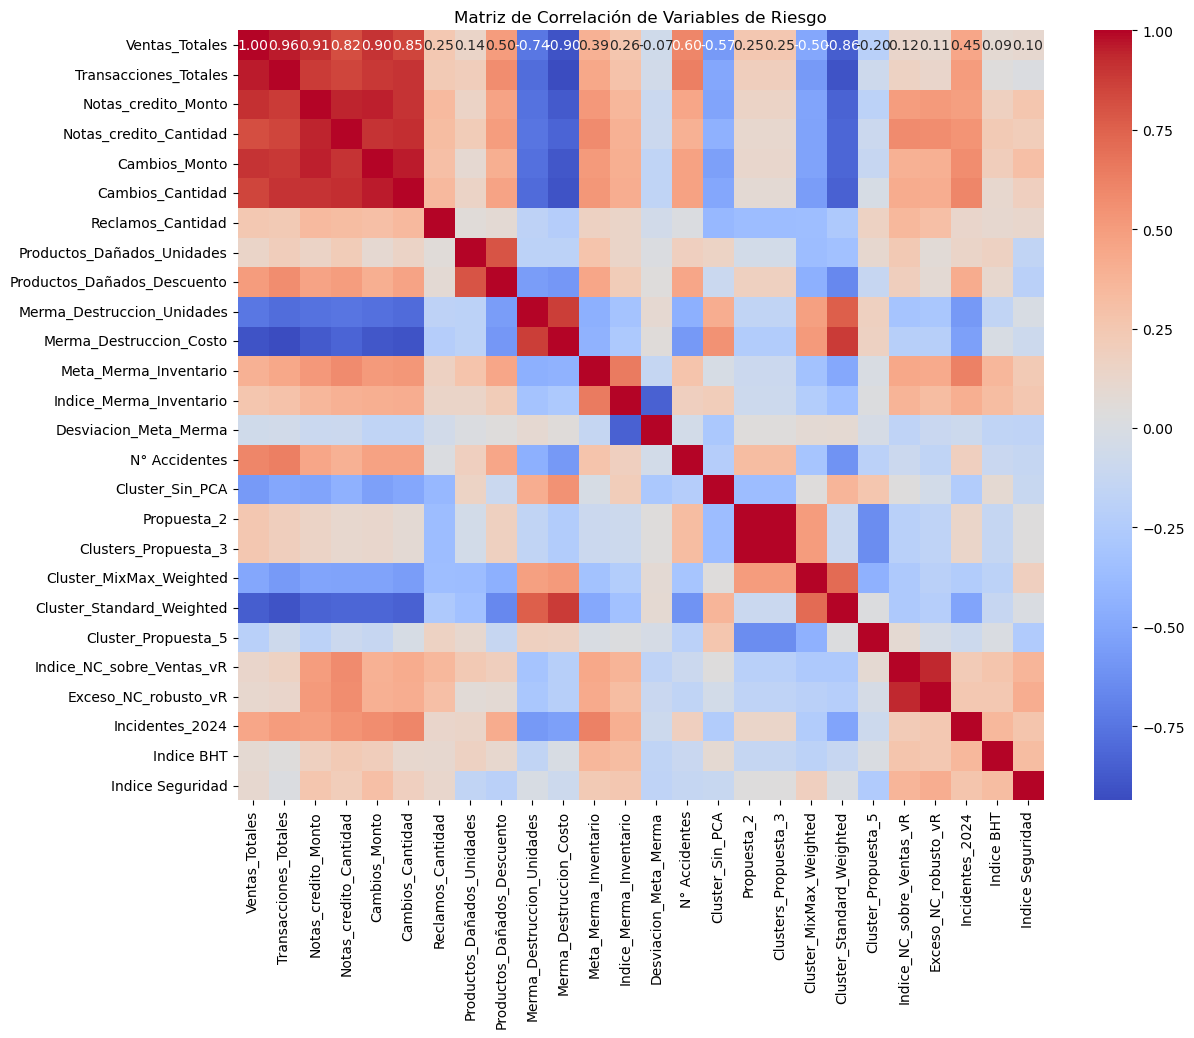

In [110]:

variables_numericas_3 = df_Kmeans.drop(columns=['Nombre_Sucursal', "Riesgo_Propuesta_1", "Riesgo_Propuesta_2","Riesgo_Propuesta_3", "Riesgo_Propuesta_4", "Riesgo_Propuesta_4_Standard", "Riesgo_Propuesta_5"]) # O como se llame la columna de nombres

plt.figure(figsize=(13, 10))
matriz_correlacion = variables_numericas_3.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables de Riesgo')
plt.show()

In [111]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                     chillan     17548478930                 510509   
1                     crillon     13183000192                 391956   
2             mall concepcion     21705948095                 692094   
3   portal temuco mall temuco     33472059392                 803446   
4                     quilpue      8410420645                 289959   
5                  valparaiso     11238928228                 367348   
6                 antofagasta     26685302686                 611376   
7                arauco maipu     18262253560                 483185   
8                       arica      9655889254                 277512   
9                   castellon     14258476937                 399290   
10                   coquimbo      9420251442                 292207   
11           costanera center     48091779474                1011685   
12        costanera pto montt     22502193354                 621773   
13                  el trebol     38877448821                 931839   
14             florida center     21723377628                 597386   
15                    iquique     16316783574                 411142   
16                  la calera     11250025215                 314852   
17                  la serena     18373455631                 520530   
18                  los andes     14391622615                 329641   
19              los dominicos      7986650719                 246099   
20                mall curico     15756063963                 413895   
21              marina arauco     48304720750                1022017   
22              parque arauco     34781890665                 617006   
23              plaza alameda     12828386308                 352526   
24               plaza calama     11818817394                 290263   
25              plaza copiapo     14000893323                 360843   
26                plaza egana     22762922863                 658353   
27          plaza los angeles     19824341357                 532744   
28                plaza norte     17043398221                 423736   
29                plaza oeste     30811601149                 703810   
30                  plaza sur     16875471132                 450201   
31             plaza tobalaba     17852248672                 516994   
32             plaza vespucio     30595140178                 799720   
33                     puente     17784664755                 574435   
34               puerto montt      9733844233                 311605   
35               punta arenas     14732074775                 373852   
36               san fernando     10928710336                 340069   
37                      talca     28329446719                 670734   
38                     temuco     21484650822                 550079   
39                   valdivia     18554089141                 514829   
40              vivo rancagua     27600143121                 702384   
41               vina del mar     13063970486                 417791   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             646643543                   13792      308563708   
1             627231699                   14860      258047668   
2             641811956                   16564      374142871   
3             856797789                   16127      446830375   
4             401728015                    9492      200788281   
5             449454783                    9000      207117945   
6             597361902                    7424      442532831   
7             960838296                   17986      439701548   
8             215637357                    3913      121973949   
9             275485230                    7592      240748388   
10            209846633                    4410      154910741   
11           1424989889                   29355      679695629   
12            493876936                    8584      253715

In [112]:
# 1) Asegurar numérico y escalar a 0–1 si venía en 0–100
seg = pd.to_numeric(df_Kmeans['Indice Seguridad'], errors='coerce')
seg01 = seg / 100.0 if seg.max() > 1.5 else seg
df_Kmeans['Indice_Inseguridad'] = (1.0 - seg01).clip(0, 1)


In [124]:

# ---------------------------
# 1) CONFIG / VARIABLES CLAVE
# ---------------------------

# Variables/features usadas para el clustering (v10)
FEATURES_V11: List[str] = [
    "Ventas_Totales",
    "Notas_credito_Monto",
    "Reclamos_Cantidad",
    "Desviacion_Meta_Merma",
    "Merma_Destruccion_Costo",
    "N° Accidentes",
    "Productos_Dañados_Descuento",
    "Incidentes_2024",
    "Indice Seguridad",
]

# Pesos finales para el cálculo del risk score (ponderación lineal)
WEIGHTS_V11: Dict[str, float] = {
    "Ventas_Totales": 0.14,
    "Notas_credito_Monto": 0.14,
    "Desviacion_Meta_Merma": 0.150,
    "Productos_Dañados_Descuento": 0.15,
    "Merma_Destruccion_Costo": 0.14,
    "N° Accidentes": 0.08,
    "Reclamos_Cantidad": 0.08,
    "Incidentes_2024": 0.08,
    "Indice Seguridad": 0.04,  
}

# Grid de k a evaluar (en el espacio ponderado)
K_CANDIDATES: List[int] = [3, 4, 5, 6]

# Semilla (reproducibilidad)
RANDOM_STATE_V10: int = 42

# ---------------------------
# 2) DETECCIÓN COLUMNA SUCURSAL
# ---------------------------
# Buscamos una columna candidata para mostrar nombres de sucursal en el reporte final
candidate_cols: List[str] = [
    c for c in df_Kmeans.columns
    if c.lower() in [
        "nombre_sucursal", "sucursal", "tienda",
        "cod_sucursal", "código_sucursal", "codigo_sucursal"
    ]
]
COL_SUCURSAL_V10: Optional[str] = candidate_cols[0] if candidate_cols else None

# ---------------------------
# 3) SUBSET DE FEATURES Y MINMAX
# ---------------------------
# Nos aseguramos que las columnas existan y convertir a float
missing_features = [f for f in FEATURES_V11 if f not in df_Kmeans.columns]
if missing_features:
    raise KeyError(f"Faltan columnas requeridas en df_Kmeans: {missing_features}")

X_base_v11 = df_Kmeans[FEATURES_V11].astype(float).copy()

scaler_mmx = MinMaxScaler()
X_scaled_array_V11 = scaler_mmx.fit_transform(X_base_v11)  # numpy array
X_scaled_v11 = pd.DataFrame(X_scaled_array_V11, index=df_Kmeans.index, columns=FEATURES_V11)

# ---------------------------
# 4) PONDERACIÓN PARA DISTANCIA (sqrt de peso)
#    => se usa para KMeans (espacio ponderado)
# ---------------------------
# Vector de pesos en el mismo orden que FEATURES_V10
weights_vector_V11 = np.array([WEIGHTS_V11[feat] for feat in FEATURES_V11], dtype=float)
weights_sqrt_V11 = np.sqrt(weights_vector_V11)  # raíz para que la distancia euclidiana refleje pesos

# Aplicamos la ponderación multiplicando cada columna por sqrt(peso)
X_weighted_v11 = X_scaled_v11.values * weights_sqrt_V11  # matriz numpy para KMeans


# ---------------------------
# 6) K-MEANS FINAL (usar k_optimo_v10)
k_V12 = k_optimo_v10
kmeans_V12 = KMeans(n_clusters=3, n_init=50, random_state=100)
labels_V12 = kmeans_V12.fit_predict(X_weighted_v11)  # etiquetas finales (array numpy)

# ---------------------------
# 7) RISK SCORE (suma ponderada en espacio MinMax con PESOS lineales)
#    => Este risk_score se usa para ordenar y etiquetar clusters por riesgo
# ---------------------------
risk_matrix_V11 = X_scaled_v11.copy()
for col_name, w in WEIGHTS_V11.items():
    risk_matrix_V11[col_name] = risk_matrix_V11[col_name] * w

risk_score_v11 = risk_matrix_V11.sum(axis=1)  # Serie con índice igual a df_Kmeans.index

# ---------------------------
# 8) ETIQUETADO AUTOMÁTICO POR RIESGO
#    - Calculamos mean risk por cluster y ordenamos ascendente (0 = menor riesgo)
#    - Luego mapeamos esos rangos a etiquetas legibles.
# ---------------------------
df_tm_V11 = pd.DataFrame({"cluster_id": labels_V12, "risk": risk_score_v11}, index=df_Kmeans.index)
cluster_risk_means_V11 = df_tm_V11.groupby("cluster_id")["risk"].mean().sort_values()  # ascendente

# rank_map: cluster_id -> rank (0 = más bajo)
rank_map_V11 = {cluster_id: rank for rank, cluster_id in enumerate(cluster_risk_means_V11.index)}

# Etiquetas legibles, extendibles según k
label_candidates = [
    "Riesgo Bajo",
    "Riesgo Medio",
    "Riesgo Alto",
    "Riesgo Muy Alto",
    "Riesgo Crítico",
]
# Si k_final > len(label_candidates) se generan etiquetas genéricas adicionales
if k_final > len(label_candidates):
    extra = [f"Riesgo Nivel {i}" for i in range(len(label_candidates)+1, k_final+1)]
    label_candidates.extend(extra)

# Mapear rank -> etiqueta (0 = Bajo, ... , k-1 = más alto)
rank_to_label = {rank: label_candidates[rank] for rank in range(k_final)}

# Aplicar mapeos: de cluster_id -> rank -> etiqueta
cluster_rank_series_V11 = pd.Series(labels_V12, index=df_Kmeans.index).map(rank_map_V11)
cluster_label_series_V11 = cluster_rank_series_V11.map(rank_to_label)

# ---------------------------
# 9) REPORT: consolidar resultados visibles para auditoría
# ---------------------------
report_columns_base = [COL_SUCURSAL_V10] if COL_SUCURSAL_V10 else []
report_df_v11 = pd.concat([
    df_Kmeans[report_columns_base],  # puede ser vacío si no se detectó columna de sucursal
    pd.DataFrame({
        "Cluster_MinMax_Pesos_v11": labels_V12,
        "Riesgo_MinMax_Pesos_v11": cluster_label_series_V11.values,
        "RiskScore_P6_v11": risk_score_v11.values
    }, index=df_Kmeans.index),
    X_base_v11  # valores originales sin escalar
], axis=1)

# ---------------------------
# 10) PERFIL DE CLUSTERS: medias por nivel de riesgo
# ---------------------------

perfil_by_risk_V11 = (
    report_df_v11
    .groupby("Riesgo_MinMax_Pesos_v11")[FEATURES_V11]
    .mean()
)

for col in perfil_by_risk_V11.columns:
    if col == "Desviacion_Meta_Merma":
        perfil_by_risk_V11[col] = perfil_by_risk_V11[col].round(5)
    elif col == "Indice Seguridad":
        perfil_by_risk_V11[col] = perfil_by_risk_V11[col].round(3)
    else:
        perfil_by_risk_V11[col] = perfil_by_risk_V11[col].round(2)

# ---------------------------
# 11) TOP SUCURSALES A AUDITAR (dentro del/los nivel(es) de mayor riesgo)
# ---------------------------
# Determinar si hay etiquetas "muy alto" o "alto" presentes para priorizar
high_labels = [lab for lab in rank_to_label.values() if "Alto" in lab]
if any(lab in cluster_label_series_V11.values for lab in high_labels):
    # preferir "Riesgo Muy Alto" si existe
    if "Riesgo Muy Alto" in cluster_label_series_V11.values:
        target_label = "Riesgo Muy Alto"
    elif "Riesgo Alto" in cluster_label_series_V11.values:
        target_label = "Riesgo Alto"
    else:
        # fallback: la etiqueta con mayor rank (más alto)
        target_label = max(rank_to_label.values(), key=lambda x: list(rank_to_label.values()).index(x))
    mask_top_V11 = cluster_label_series_V11.values == target_label
    top_candidates = (
        report_df_v11.loc[mask_top_V11]
        .sort_values("RiskScore_P6_v11", ascending=False)
        .head(10)
    )
else:
    # Si no hay etiquetas con "Alto", tomar top global por RiskScore
    top_candidates = (
        report_df_v11
        .sort_values("RiskScore_P6_v11", ascending=False)
        .head(10)
    )

# ---------------------------
# 12) PRINTS DE CONTROL (resumen compacto)
# ---------------------------
print("\n=== Propuesta 6 — MinMax + Pesos (con variables Indice de Seguridad) — Resumen ===")
print(f"Silhouette por k evaluados: {silhouette_by_k}")
print(f"k óptimo seleccionado (por silhouette): {k_optimo_v10}")
print("\n-- Perfil promedio por nivel de riesgo --")
print(perfil_by_risk_V11)
print("\n-- Top 10 sucursales para auditoría (según RiskScore_P6_v11) --")
if COL_SUCURSAL_V10:
    print(top_candidates[[COL_SUCURSAL_V10, "Riesgo_MinMax_Pesos_v11", "RiskScore_P6_v11"]].to_string(index=False))
else:
    print("(Nota) No se detectó columna de sucursal; se listan índices y métricas:")
    print(top_candidates[["Riesgo_MinMax_Pesos_v11", "RiskScore_P6_v11"]].to_string(index=False))

NameError: name 'k_optimo_v10' is not defined

In [117]:
#### Somos Sensibles a Sucursales con Productos Dañados muy altos dentro del Riesgo Bajo
pctl = report_df_v11['Productos_Dañados_Descuento'].quantile(0.75)  # p85 (ajustable)
mask_up = (report_df_v11['Riesgo_MinMax_Pesos_v11']=='Riesgo Bajo') & \
          (report_df_v11['Productos_Dañados_Descuento']>=pctl)

report_df_v11['Riesgo_final'] = report_df_v11['Riesgo_MinMax_Pesos_v11']
report_df_v11.loc[mask_up, 'Riesgo_final'] = 'Riesgo Medio'

NameError: name 'report_df_v11' is not defined

In [ ]:
report_df_v11.to_excel("Resultados Kmeans 2024.xlsx", index=False)

PermissionError: [Errno 13] Permission denied: 'Resultados Kmeans 2024.xlsx'

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Helpers (solo si no existen)
if '_fit_ellipse_from_points' not in globals():
    import numpy as _np
    def _fit_ellipse_from_points(ax, x, y, n_std=1.9, linewidth=1.0, linestyle='-'):
        if len(x) < 3: return
        cov = _np.cov(x, y)
        vals, vecs = _np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        theta = _np.degrees(_np.arctan2(*vecs[:,0][::-1]))
        width, height = 2 * n_std * _np.sqrt(vals.clip(min=1e-12))
        ell = plt.matplotlib.patches.Ellipse((x.mean(), y.mean()),
                                             width, height, angle=theta,
                                             fill=False, linestyle=linestyle,
                                             linewidth=linewidth)
        ax.add_patch(ell)

if '_annotate_all_points' not in globals():
    def _annotate_all_points(ax, x, y, labels, fontsize=7):
        for xi, yi, txt in zip(x, y, labels):
            ax.annotate(f" {txt}", (xi, yi), xytext=(2,2),
                        textcoords="offset points", fontsize=fontsize)


# Asegurar labels/riesgo/centroides

Risk_Propuesta_7 = report_df_v11['RiskScore_P6_v11'].values
means_k3_v14 = pd.Series(Risk_Propuesta_7).groupby(labels_V12).mean().sort_values()
rank2riskname_v14 = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                     for i, cid in enumerate(means_k3_v14.index)}
Riesgo_Propuesta_7 = pd.Series(labels_V12).map(rank2riskname_v14).values

Centers_Weight_Propuesta_7 = kmeans_V12.cluster_centers_
Centers_Scaled_Propuesta_7 = Centers_Weight_Propuesta_7 / weights_sqrt_V11  # volver a escala MinMax 0–1
Centroides_Propuesta_7 = pd.DataFrame(Centers_Scaled_Propuesta_7, columns=X_scaled_v11.columns)
Centroides_Propuesta_7['Riesgo_label'] = [rank2riskname_v14[cid] for cid in means_k3_v14.index]  # ordenados por riesgo
print("\nCentroides (escala 0–1 MinMax):")
print(Centroides_Propuesta_7.round(3).to_string(index=False))


# ==================== COLORES por nivel de riesgo ====================
color_map_v16 = {
    "Riesgo Bajo":   "#2ecc71",  # verde
    "Riesgo Medio":  "#f1c40f",  # amarillo
    "Riesgo Alto":   "#e74c3c",  # rojo
}

# ==================== GRÁFICO A (X en $ reales + formato 'mil millones') ====================
# X real (no 0–1)
xA_real_v17 = report_df_v11["Ventas_Totales"].astype(float).values
xA_min_2, xA_max_2 = float(xA_real_v17.min()), float(xA_real_v17.max())

# Y = PC1(Descuento + Merma) normalizado 0–1 (de v15); si no existe, lo recomputamos
from sklearn.decomposition import PCA
Variables_PCA_Eje_Y = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo', "Desviacion_Meta_Merma" ,"Reclamos_Cantidad", "N° Accidentes", "Incidentes_2024", "Notas_Credito_Contado"]
PCA_Eje_YY = PCA(n_components=1, random_state=100)
PCA_Eje_YYYY = PCA_Eje_YY.fit_transform(X_scaled_v11[Variables_PCA_Eje_Y].values).ravel()

# orientar PC1 a correlación positiva con el riesgo
riskA_v16 = report_df_v11['RiskScore_P6_v11'].values
if _np.corrcoef(PCA_Eje_YYYY, riskA_v16)[0,1] < 0:
    PCA_Eje_YYYY = -PCA_Eje_YYYY
    compsA_v16 = -PCA_Eje_YY.components_[0]
else:
    compsA_v16 = PCA_Eje_YY.components_[0]

# normalizar a 0–1 para el eje Y; X ya está en 0–1 (MinMax)
yA_min_v16, yA_max_v16 = float(PCA_Eje_YYYY.min()), float(PCA_Eje_YYYY.max())
yA01_v16 = (PCA_Eje_YYYY - yA_min_v16) / (yA_max_v16 - yA_min_v16 + 1e-12)
xA01_v16 = X_scaled_v11['Ventas_Totales'].values

# centroides proyectados en este plano
centers_yA_pc1_v16 = (Centroides_Propuesta_7[Variables_PCA_Eje_Y].values @ compsA_v16.reshape(-1,1)).ravel()
centers_yA01_v16 = (centers_yA_pc1_v16 - yA_min_v16) / (yA_max_v16 - yA_min_v16 + 1e-12)
centers_xA01_v16 = Centroides_Propuesta_7['Ventas_Totales'].values
if 'yA01_v16' in globals():
    yA01_v17 = yA01_v16
    centers_yA01_v17 = centers_yA01_v16
else:
    from sklearn.decomposition import PCA
    vars_yA = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo, Desviacion_Meta_Merma', "Reclamos_Cantidad", "N° Accidentes", "Incidentes_2024", "Notas_Credito_Contado"]
    _pca = PCA(n_components=1, random_state=42)
    _pc2 = _pca.fit_transform(X_scaled_v11[vars_yA].values).ravel()
    # orientar al riesgo
    _risk_2 = report_df_v11['RiskScore_P6_v11'].values
    if np.corrcoef(_pc2, _risk_2)[0,1] < 0: _pc2 = -_pc2
    min_2, max_2 = float(_pc2.min()), float(_pc2.max())
    yA01_v17 = (pc1 - min_2) / (max_2 - min_2 + 1e-12)
    compsA = pca.components[0]
    # centroides al plano
    _cent_y_2 = (Centroides_Propuesta_7[vars_yA].values @ compsA.reshape(-1,1)).ravel()
    centers_yA01_v17 = (cent_y_2 - _min_2) / (max_2 - min_2 + 1e-12)

# Centroides X en $ reales (desnormalizamos Ventas_Totales)
centers_xA03 = Centroides_Propuesta_7['Ventas_Totales'].values  # 0–1
centers_xA_real_v18 = xA_min_2 + centers_xA03 * (xA_max_2 - xA_min_2 + 1e-12)

plt.figure(figsize=(23,18))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m_1 = (Riesgo_Propuesta_7 == lvl)
    if m_1.any():
        plt.scatter(xA_real_v17[m_1], yA01_v17[m_1],
                    s=(report_df_v11.loc[m_1,'RiskScore_P6_v11']*600 + 20),
                    alpha=0.7, label=lvl, c=color_map_v16[lvl])

# Elipses por clúster en este plano (usa labels numéricos)
for cid in sorted(set(labels_V12)):
    m = (labels_V12 == cid)
    _fit_ellipse_from_points(plt.gca(), xA_real_v17[m], yA01_v17[m], n_std=1.6)



# Etiquetas en TODOS los puntos
if col_suc_v16:
    _annotate_all_points(plt.gca(), xA_real_v16, yA01_v16,
                         report_df_v10[col_suc_v16].astype(str).values, fontsize=10)
    
# Centroides (X grande)
plt.scatter(centers_xA_real_v18, centers_yA01_v17,
            s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

# Formato del eje X como "mil millones"
from matplotlib.ticker import FuncFormatter, MaxNLocator
def _fmt_milmill(x, pos):
    return f"{int(round(x/1e9))} mil millones"
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))

plt.xlabel("Ventas (pesos , mil millones)")
plt.ylabel("PC1(Y): Descuento+Merma+Desviacion (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v16.png", dpi=300, bbox_inches='tight')

# ==================== GRÁFICO B (mismos colores; X queda en 0–1 o en $ si prefieres) ====================
# Dejamos X en 0–1 como en v15; si prefieres también en $, descomenta el bloque indicado.
xB01_v17 = X_scaled_v11['Ventas_Totales'].values
xB_real_v17 = report_df_v11["Ventas_Totales"].astype(float).values
centers_xB_real_v17 = xA_min_2 + Centroides_Propuesta_7['Ventas_Totales'].values * (xA_max_2 - xA_min_2 + 1e-12)

yB_real_v17 = report_df_v11['Desviacion_Meta_Merma'].astype(float).values
yB_min_2, yB_max_2 = float(yB_real_v17.min()), float(yB_real_v17.max())
centers_yB02 = Centroides_Propuesta_7['Desviacion_Meta_Merma'].values
centers_yB_real_v17 = yB_min_2 + centers_yB02 * (yB_max_2 - yB_min_2 + 1e-12)
centers_xB01_v17 = Centroides_Propuesta_7['Ventas_Totales'].values

plt.figure(figsize=(21,16))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (Riesgo_Propuesta_7 == lvl)
    if m.any():
        plt.scatter(xB01_v17[m], yB_real_v17[m],
                    s=(report_df_v11.loc[m,'RiskScore_P6_v11']*600 + 20),
                    alpha=0.78, label=lvl, c=color_map_v16[lvl])



plt.scatter(centers_xB01_v17, centers_yB_real_v17,
            s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

plt.axhline(0, linestyle='--', linewidth=1.2)
if (yB_real_v17 < 0).any():
    plt.fill_between([0,1], min(yB_real_v17.min(), centers_yB_real_v17.min()), 0, alpha=0.08)

if col_suc_v16:
    _annotate_all_points(plt.gca(), xB01_v17, yB_real_v17,
                         report_df_v11[col_suc_v16].astype(str).values, fontsize=5)

plt.xlabel("Ventas (normalizado 0–1)")  # cambia a '($, mil millones)' si usas la versión en $ reales
plt.ylabel("Desviación Meta Merma (valor real)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.1, alpha=0.3)
plt.tight_layout()
plt.savefig("grafico_B_desv_meta_merma_v16.png", dpi=300, bbox_inches='tight')

print("\nListo:")

NameError: name 'report_df_v11' is not defined

In [ ]:
report_df_v11

Nombre_Sucursal  Cluster_MinMax_Pesos_v11  \
0                 antofagasta                         0   
1                arauco maipu                         0   
2                       arica                         1   
3                   castellon                         1   
4                     chillan                         1   
5                    coquimbo                         1   
6            costanera center                         2   
7         costanera pto montt                         0   
8                     crillon                         0   
9                   el trebol                         2   
10             florida center                         0   
11                    iquique                         1   
12                  la calera                         1   
13                  la serena                         0   
14                  los andes                         1   
15              los dominicos                         1   
16            mall concepcion                         0   
17                mall curico                         1   
18              marina arauco                         2   
19              parque arauco                         0   
20              plaza alameda                         1   
21               plaza calama                         1   
22              plaza copiapo                         1   
23                plaza egana                         0   
24          plaza los angeles                         0   
25                plaza norte                         0   
26                plaza oeste                         0   
27                  plaza sur                         1   
28             plaza tobalaba                         0   
29             plaza vespucio                         2   
30  portal temuco mall temuco                         0   
31                     puente                         0   
32               puerto montt                         1   
33               punta arenas                         1   
34                    quilpue                         1   
35               san fernando                         1   
36                      talca                         0   
37                     temuco                         0   
38                   valdivia                         0   
39                 valparaiso                         1   
40               vina del mar                         1   
41              vivo rancagua                         0   

   Riesgo_MinMax_Pesos_v11  RiskScore_P6_v11       Ventas_Totales  \
0             Riesgo Medio           0.35555 26,685,302,686.00000   
1             Riesgo Medio           0.43984 18,262,253,560.00000   
2              Riesgo Bajo           0.29260  9,655,889,254.00000   
3              Riesgo Bajo           0.21190 14,258,476,937.00000   
4              Riesgo Bajo           0.36127 17,548,478,930.00000   
5              Riesgo Bajo           0.33039  9,420,251,442.00000   
6              Riesgo Alto           0.62080 48,091,779,474.00000   
7             Riesgo Medio           0.47510 22,502,193,354.00000   
8             Riesgo Medio           0.39017 13,183,000,192.00000   
9              Riesgo Alto           0.52274 38,877,448,821.00000   
10            Riesgo Medio           0.43722 21,723,377,628.00000   
11             Riesgo Bajo           0.31145 16,316,783,574.00000   
12             Riesgo Bajo           0.31429 11,250,025,215.00000   
13            Riesgo Medio           0.40293 18,373,455,631.00000   
14             Riesgo Bajo           0.31481 14,391,622,615.00000   
15             Riesgo Bajo           0.34589  7,986,650,719.00000   
16            Riesgo Medio           0.34508 21,705,948,095.00000   
17             Riesgo Bajo           0.36917 15,756,063,963.00000   
18             Riesgo Alto           0.56982 48,304,720,750.00000   
19            Riesgo Medio           0.51400 34,781,890,665.00000   
20             Riesgo Bajo 

In [ ]:
# === Overlay de negocio para el REPORTE (drop-in) ===
# Base: partimos del riesgo del clustering
report_df_v11['Riesgo_final'] = report_df_v11['Riesgo_MinMax_Pesos_v11'].values

# Columna de nombre (para comprobaciones/match)
_name_col = None
for c in ['Nombre_Sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']:
    if c in report_df_v11.columns:
        _name_col = c; break

# Ratio desde Df_Kmeans alineado por índice (misma cantidad/orden de filas)
ratio_rep = pd.to_numeric(df_Kmeans['Productos_Dañados_Descuento'], errors='coerce').reindex(report_df_v11.index)

# Umbral (p85) y máscaras
pctl = ratio_rep.quantile(0.85)
mask_bajo = report_df_v11['Riesgo_final'].eq('Riesgo Bajo')
mask_ratio = ratio_rep >= pctl

# Forzar por nombre (case-insensitive) SOLO si están en Bajo
if _name_col:
    names_norm = report_df_v11[_name_col].astype(str).str.lower().str.strip()
    mask_forzadas = names_norm.isin(['quilpue'])
else:
    mask_forzadas = False

# Aplicar overlay: si era Bajo y (ratio alto O forzada) => Medio
mask_up = mask_bajo & (mask_ratio | mask_forzadas)
report_df_v11.loc[mask_up, 'Riesgo_final'] = 'Riesgo Medio'

# Vector definitivo para colorear
Riesgo_plot = report_df_v11['Riesgo_final'].values
niveles_riesgo = ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]

# Debug rápido: verificar casos clave
if _name_col:
    m_qc = names_norm.isin(['quilpue'])
    print("\nChequeo etiquetas finales (Quilpué):")
    print(report_df_v11.loc[m_qc, [_name_col,'Riesgo_MinMax_Pesos_v11','Riesgo_final']].to_string(index=False))
    print("Subidas por regla:", int(mask_up.sum()))


Chequeo etiquetas finales (Quilpué):
Nombre_Sucursal Riesgo_MinMax_Pesos_v11 Riesgo_final
        quilpue             Riesgo Bajo Riesgo Medio
Subidas por regla: 1


Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.


<Figure size 640x480 with 0 Axes>

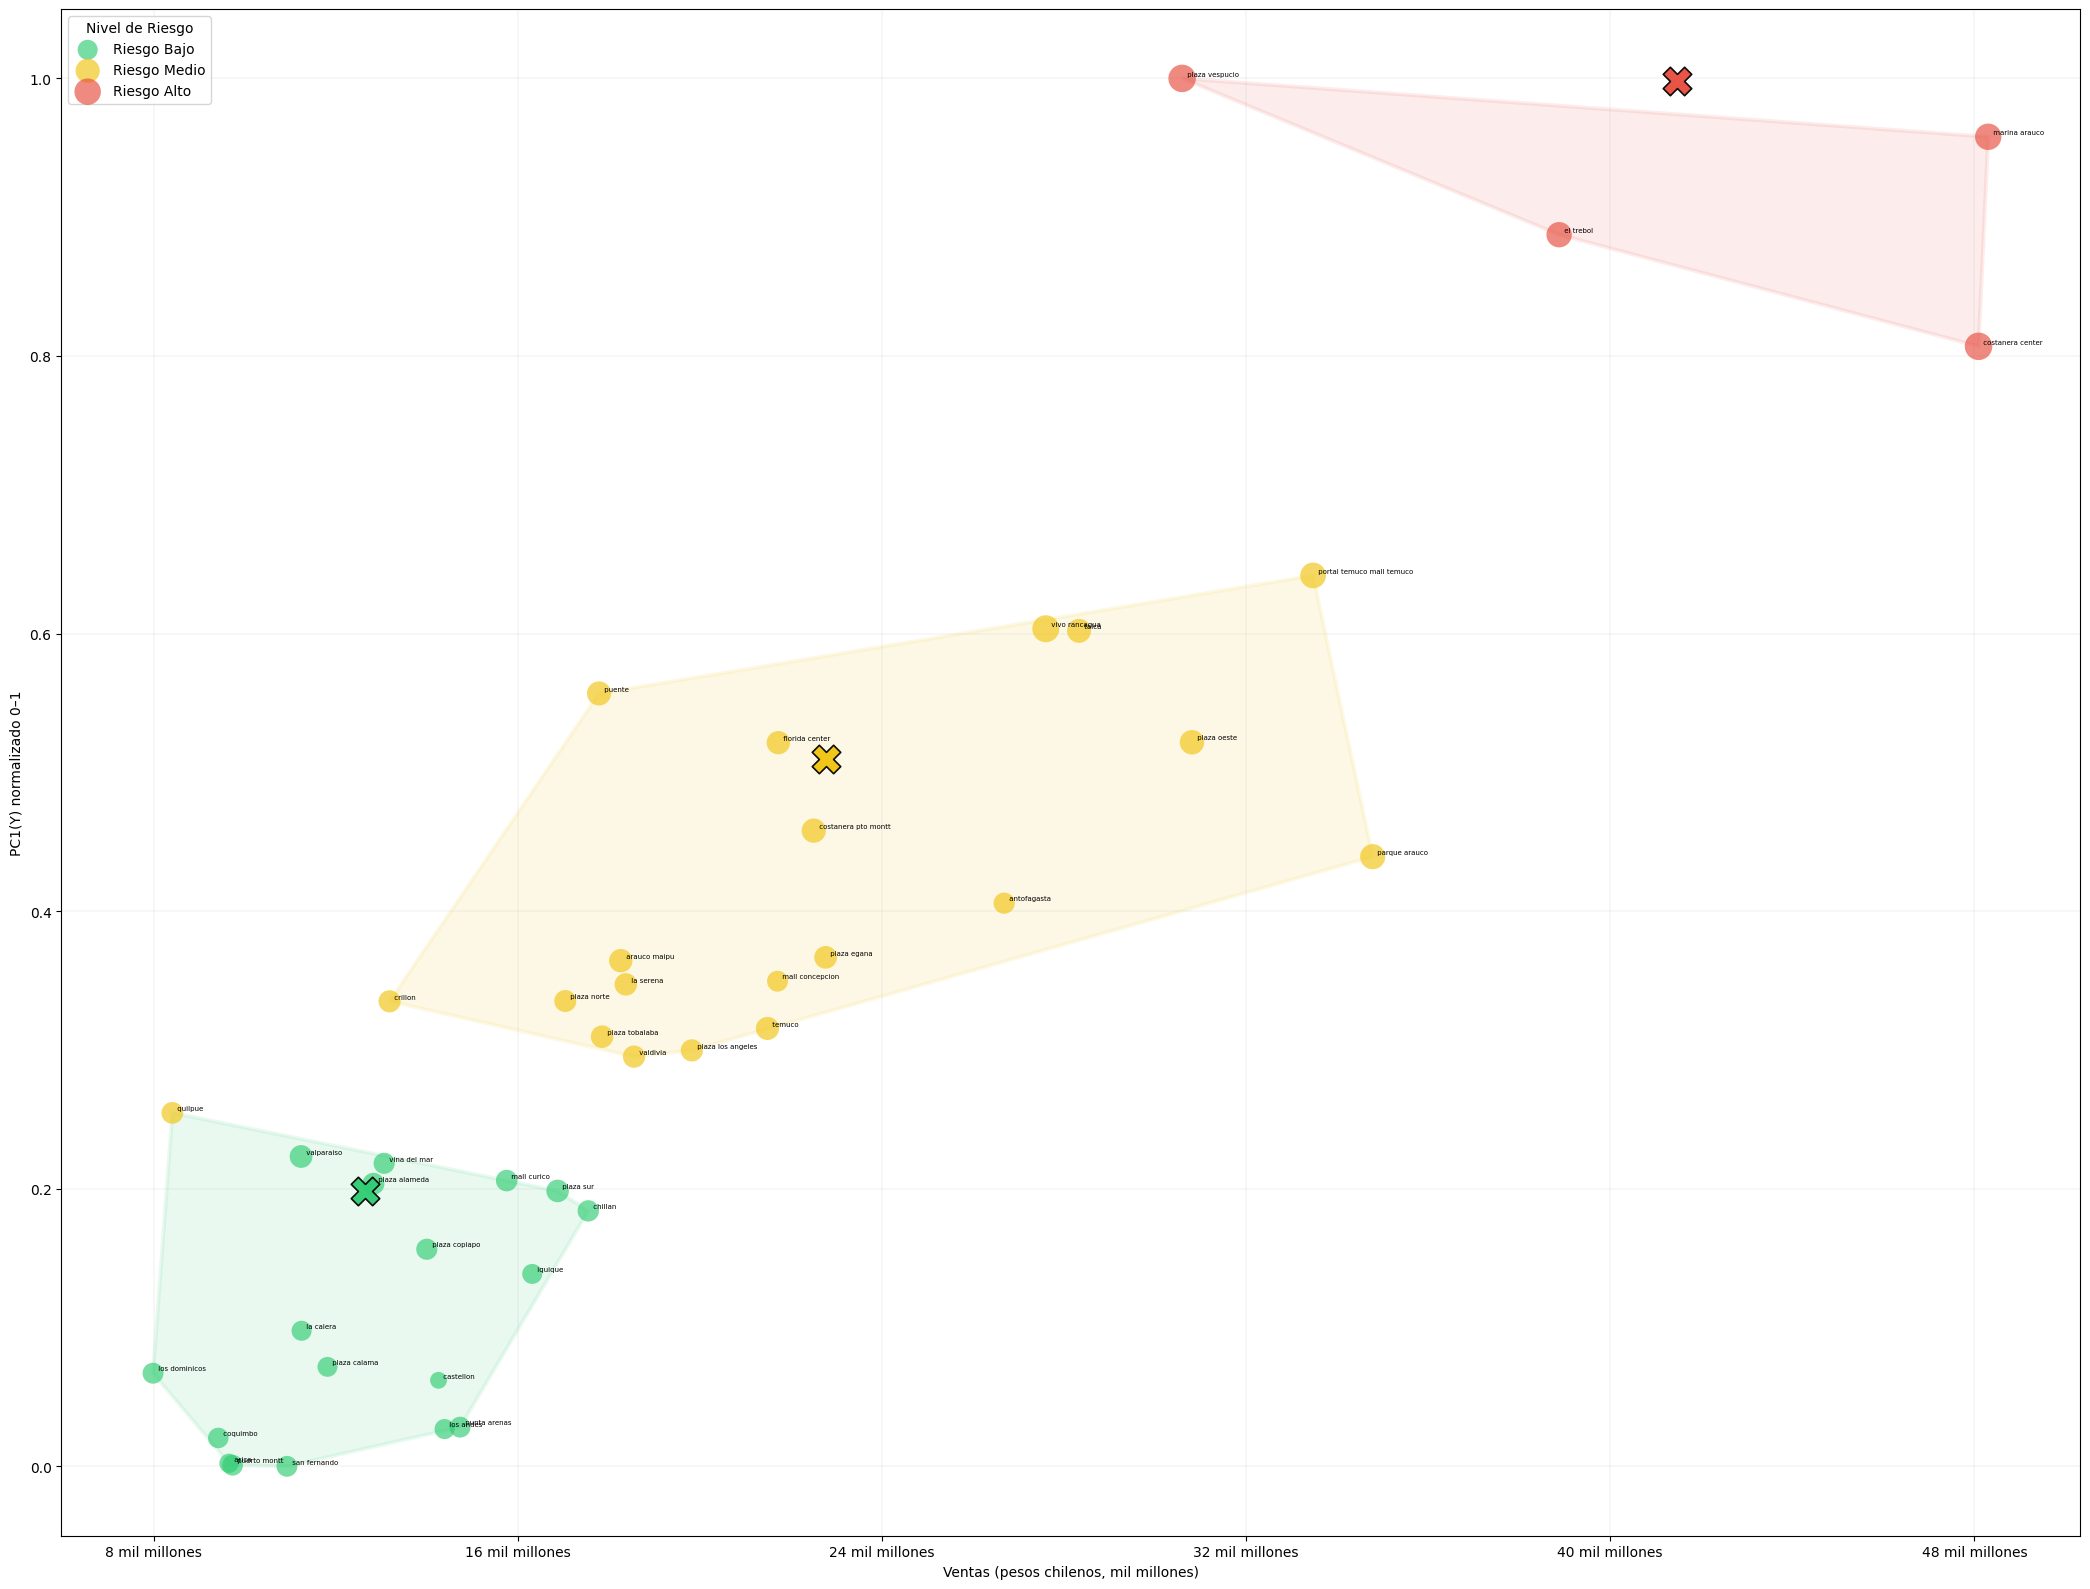

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.ticker import FuncFormatter, MaxNLocator
from sklearn.neighbors import KernelDensity

# ---------- helpers ----------
def _fmt_milmill(x, pos): 
    return f"{int(round(x/1e9))} mil millones"

def kde_contour_polygon(x, y, mass=0.75, bw_scale=1.0, grid=400):
    """
    Devuelve un polígono (la mayor isolínea) que encierra ~mass de la densidad KDE.
    - Estandariza (z-score) para que X ($) y Y (0-1) pesen similar en KDE.
    - bw_scale: multiplica la banda de Scott (1.0 = base; <1 más ajustado, >1 más suave).
    """
    xy = np.column_stack([x, y]).astype(float)
    mu = xy.mean(axis=0); sd = xy.std(axis=0) + 1e-12
    z = (xy - mu) / sd

    # ancho de banda de Scott/Silverman en 2D
    n, d = z.shape
    h_scott = n**(-1.0/(d+4))
    bw = h_scott * bw_scale

    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(z)
    # umbral como cuantil de densidades en las propias muestras (aprox. HDR)
    scores = kde.score_samples(z)  # log densidad
    thr = np.quantile(scores, 1.0 - mass)

    # malla en z estandarizada
    mins = z.min(axis=0) - 0.5
    maxs = z.max(axis=0) + 0.5
    gx = np.linspace(mins[0], maxs[0], grid)
    gy = np.linspace(mins[1], maxs[1], grid)
    GX, GY = np.meshgrid(gx, gy)
    grid_pts = np.column_stack([GX.ravel(), GY.ravel()])
    Z = kde.score_samples(grid_pts).reshape(GX.shape)

    # extraer la isolínea principal (nivel = thr)
    cs = plt.contour(GX, GY, Z, levels=[thr])
    # tomar el path más largo
    polys = []
    if hasattr(cs, "collections") and cs.collections:
        for coll in cs.collections:
            paths = getattr(coll, "get_paths", lambda: [])()
            for p in paths:
                v = p.vertices
                if len(v) > 30:
                    polys.append(v)
    plt.clf()  # limpiar el contour auxiliar
    if not polys:  # fallback a convex hull simple si algo falla
        from scipy.spatial import ConvexHull
        hull = ConvexHull(z)
        poly_z = z[hull.vertices]
    else:
        poly_z = max(polys, key=lambda v: v.shape[0])

    # volver a unidades originales del gráfico
    poly = poly_z * sd + mu
    return poly

def polygons_overlap(poly1, poly2, step=10):
    """True si alguna muestra de vértices de un polígono cae dentro del otro (aprox)."""
    from matplotlib.path import Path
    p1, p2 = Path(poly1), Path(poly2)
    return p1.contains_points(poly2[::step]).any() or p2.contains_points(poly1[::step]).any()

# ---------- parámetros visuales (ajústalos si quieres) ----------
# nivel inicial por cluster (fracción de masa cubierta) y suavidad relative
mass_init = {"Riesgo Bajo": 0.75, "Riesgo Medio": 0.78, "Riesgo Alto": 0.72}
bw_scale  = {"Riesgo Bajo": 0.9,  "Riesgo Medio": 1.0,  "Riesgo Alto": 1.1}
mass_min  = 0.55     # no bajar de aquí al resolver solapes
decay     = 0.93     # factor para bajar mass cuando se detecta solape (7% menos cada ronda)
edge_lw   = 2.8
fill_alpha= 0.10

# ---------- construir contornos por clúster, evitando solape ----------
cluster_ids = sorted(set(labels_V12))
contours = {}   # cid -> (poly, mass_used, color)

# color por mayoría de etiqueta de riesgo dentro del clúster
lvl_by_cid = {}
for cid in cluster_ids:
    lvl_by_cid[cid] = pd.Series(Riesgo_Propuesta_6[labels_V12==cid]).mode().iloc[0]

# contornos iniciales
for cid in cluster_ids:
    m = (labels_V12 == cid)
    lvl = lvl_by_cid[cid]
    poly = kde_contour_polygon(xA_real_v16[m], yA01_v16[m],
                               mass=mass_init[lvl], bw_scale=bw_scale[lvl])
    contours[cid] = (poly, mass_init[lvl], color_map_v16[lvl])

# resolver solapes
for _ in range(20):
    pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
    conflicts = []
    for i,j in pairs:
        if polygons_overlap(contours[i][0], contours[j][0]):
            conflicts.append((i,j))
    if not conflicts:
        break
    for i,j in conflicts:
        for cid in (i,j):
            poly, m_used, col = contours[cid]
            lvl = lvl_by_cid[cid]
            new_m = max(mass_min, m_used*decay)
            if new_m < m_used - 1e-6:
                mask = (labels_V12 == cid)
                new_poly = kde_contour_polygon(xA_real_v16[mask], yA01_v16[mask],
                                               mass=new_m, bw_scale=bw_scale[lvl])
                contours[cid] = (new_poly, new_m, col)

# ---------- plot ----------
fig, ax = plt.subplots(figsize=(21,16))

# puntos por nivel
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        ax.scatter(xA_real_v16[m], yA01_v16[m],
                   s=(report_df_v11.loc[m,'RiskScore_P6_v11']*600 + 20),
                   c=color_map_v16[lvl], alpha=0.65, edgecolors='none', label=lvl, zorder=2)

                  
# contornos KDE
for cid in cluster_ids:
    poly, m_used, col = contours[cid]
    ax.add_patch(Polygon(poly, closed=True, facecolor=col, edgecolor=col,
                         alpha=fill_alpha, lw=edge_lw, zorder=1))
    # etiqueta opcional del porcentaje usado (eliminada según solicitud)
    # cx, cy = poly[:,0].mean(), poly[:,1].mean()
    # ax.text(cx, cy, f"{int(round(m_used*100))}%", fontsize=9, color="#333333", ha='center', va='center', alpha=0.55)

### centroides (color por clúster: verde/amarillo/rojo según color_map_v16)
for idx, cid in enumerate(cluster_ids):
    cx = centers_xA_real_v18[idx]
    cy = centers_yA01_v17[idx]
    lvl = lvl_by_cid[cid]
    col = color_map_v16[lvl]
    ax.scatter(cx, cy, s=420, marker='X', edgecolors='black', linewidths=1.2,
               alpha=0.95, c=col, zorder=3)
### etiquetas en todos los puntos
if col_suc_v16:
    _annotate_all_points(ax, xA_real_v16, yA01_v16,
                         report_df_v11[col_suc_v16].astype(str).values, fontsize=5)


# ejes/estilo
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))
ax.set_xlabel("Ventas (pesos chilenos, mil millones)")
ax.set_ylabel("PC1(Y) normalizado 0–1")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v24.png", dpi=300, bbox_inches='tight')
# plt.show()

print("Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.")

Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.


<Figure size 640x480 with 0 Axes>

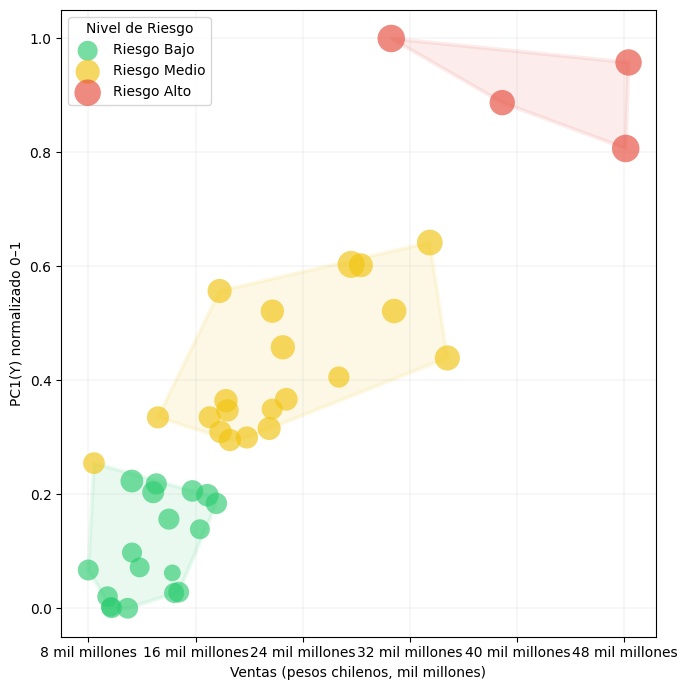

: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.ticker import FuncFormatter, MaxNLocator
from sklearn.neighbors import KernelDensity

# ---------- helpers ----------
def _fmt_milmill(x, pos): 
    return f"{int(round(x/1e9))} mil millones"

def kde_contour_polygon(x, y, mass=0.75, bw_scale=1.0, grid=400):
    """
    Devuelve un polígono (la mayor isolínea) que encierra ~mass de la densidad KDE.
    - Estandariza (z-score) para que X ($) y Y (0-1) pesen similar en KDE.
    - bw_scale: multiplica la banda de Scott (1.0 = base; <1 más ajustado, >1 más suave).
    """
    xy = np.column_stack([x, y]).astype(float)
    mu = xy.mean(axis=0); sd = xy.std(axis=0) + 1e-12
    z = (xy - mu) / sd

    # ancho de banda de Scott/Silverman en 2D
    n, d = z.shape
    h_scott = n**(-1.0/(d+4))
    bw = h_scott * bw_scale

    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(z)
    # umbral como cuantil de densidades en las propias muestras (aprox. HDR)
    scores = kde.score_samples(z)  # log densidad
    thr = np.quantile(scores, 1.0 - mass)

    # malla en z estandarizada
    mins = z.min(axis=0) - 0.5
    maxs = z.max(axis=0) + 0.5
    gx = np.linspace(mins[0], maxs[0], grid)
    gy = np.linspace(mins[1], maxs[1], grid)
    GX, GY = np.meshgrid(gx, gy)
    grid_pts = np.column_stack([GX.ravel(), GY.ravel()])
    Z = kde.score_samples(grid_pts).reshape(GX.shape)

    # extraer la isolínea principal (nivel = thr)
    cs = plt.contour(GX, GY, Z, levels=[thr])
    # tomar el path más largo
    polys = []
    if hasattr(cs, "collections") and cs.collections:
        for coll in cs.collections:
            paths = getattr(coll, "get_paths", lambda: [])()
            for p in paths:
                v = p.vertices
                if len(v) > 30:
                    polys.append(v)
    plt.clf()  # limpiar el contour auxiliar
    if not polys:  # fallback a convex hull simple si algo falla
        from scipy.spatial import ConvexHull
        hull = ConvexHull(z)
        poly_z = z[hull.vertices]
    else:
        poly_z = max(polys, key=lambda v: v.shape[0])

    # volver a unidades originales del gráfico
    poly = poly_z * sd + mu
    return poly

def polygons_overlap(poly1, poly2, step=10):
    """True si alguna muestra de vértices de un polígono cae dentro del otro (aprox)."""
    from matplotlib.path import Path
    p1, p2 = Path(poly1), Path(poly2)
    return p1.contains_points(poly2[::step]).any() or p2.contains_points(poly1[::step]).any()

# ---------- parámetros visuales (ajústalos si quieres) ----------
# nivel inicial por cluster (fracción de masa cubierta) y suavidad relative
mass_init = {"Riesgo Bajo": 0.75, "Riesgo Medio": 0.78, "Riesgo Alto": 0.72}
bw_scale  = {"Riesgo Bajo": 0.9,  "Riesgo Medio": 1.0,  "Riesgo Alto": 1.1}
mass_min  = 0.55     # no bajar de aquí al resolver solapes
decay     = 0.93     # factor para bajar mass cuando se detecta solape (7% menos cada ronda)
edge_lw   = 2.8
fill_alpha= 0.10

# ---------- construir contornos por clúster, evitando solape ----------
cluster_ids = sorted(set(labels_V12))
contours = {}   # cid -> (poly, mass_used, color)

# color por mayoría de etiqueta de riesgo dentro del clúster
lvl_by_cid = {}
for cid in cluster_ids:
    lvl_by_cid[cid] = pd.Series(Riesgo_Propuesta_6[labels_V12==cid]).mode().iloc[0]

# contornos iniciales
for cid in cluster_ids:
    m = (labels_V12 == cid)
    lvl = lvl_by_cid[cid]
    poly = kde_contour_polygon(xA_real_v16[m], yA01_v16[m],
                               mass=mass_init[lvl], bw_scale=bw_scale[lvl])
    contours[cid] = (poly, mass_init[lvl], color_map_v16[lvl])

# resolver solapes
for _ in range(20):
    pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
    conflicts = []
    for i,j in pairs:
        if polygons_overlap(contours[i][0], contours[j][0]):
            conflicts.append((i,j))
    if not conflicts:
        break
    for i,j in conflicts:
        for cid in (i,j):
            poly, m_used, col = contours[cid]
            lvl = lvl_by_cid[cid]
            new_m = max(mass_min, m_used*decay)
            if new_m < m_used - 1e-6:
                mask = (labels_V12 == cid)
                new_poly = kde_contour_polygon(xA_real_v16[mask], yA01_v16[mask],
                                               mass=new_m, bw_scale=bw_scale[lvl])
                contours[cid] = (new_poly, new_m, col)

# ---------- plot ----------
fig, ax = plt.subplots(figsize=(7,7))

# puntos por nivel
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        ax.scatter(xA_real_v16[m], yA01_v16[m],
                   s=(report_df_v11.loc[m,'RiskScore_P6_v11']*600 + 20),
                   c=color_map_v16[lvl], alpha=0.65, edgecolors='none', label=lvl, zorder=2)

                  
# contornos KDE
for cid in cluster_ids:
    poly, m_used, col = contours[cid]
    ax.add_patch(Polygon(poly, closed=True, facecolor=col, edgecolor=col,
                         alpha=fill_alpha, lw=edge_lw, zorder=1))
    # etiqueta opcional del porcentaje usado (eliminada según solicitud)
    # cx, cy = poly[:,0].mean(), poly[:,1].mean()
    # ax.text(cx, cy, f"{int(round(m_used*100))}%", fontsize=9, color="#333333", ha='center', va='center', alpha=0.55)

### centroides (color por clúster: verde/amarillo/rojo según color_map_v16)



# ejes/estilo
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))
ax.set_xlabel("Ventas (pesos chilenos, mil millones)")
ax.set_ylabel("PC1(Y) normalizado 0–1")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v24.png", dpi=300, bbox_inches='tight')
# plt.show()

print("Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.")

In [ ]:
labels_V12

array([0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0],
      dtype=int32)

In [ ]:
Riesgo_Propuesta_7

array(['Riesgo Medio', 'Riesgo Medio', 'Riesgo Bajo', 'Riesgo Bajo',
       'Riesgo Bajo', 'Riesgo Bajo', 'Riesgo Alto', 'Riesgo Medio',
       'Riesgo Medio', 'Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo',
       'Riesgo Bajo', 'Riesgo Medio', 'Riesgo Bajo', 'Riesgo Bajo',
       'Riesgo Medio', 'Riesgo Bajo', 'Riesgo Alto', 'Riesgo Medio',
       'Riesgo Bajo', 'Riesgo Bajo', 'Riesgo Bajo', 'Riesgo Medio',
       'Riesgo Medio', 'Riesgo Medio', 'Riesgo Medio', 'Riesgo Bajo',
       'Riesgo Medio', 'Riesgo Alto', 'Riesgo Medio', 'Riesgo Medio',
       'Riesgo Bajo', 'Riesgo Bajo', 'Riesgo Bajo', 'Riesgo Bajo',
       'Riesgo Medio', 'Riesgo Medio', 'Riesgo Medio', 'Riesgo Bajo',
       'Riesgo Bajo', 'Riesgo Medio'], dtype=object)

In [ ]:
report_df_v11

Nombre_Sucursal  Cluster_MinMax_Pesos_v11  \
0                 antofagasta                         1   
1                arauco maipu                         1   
2                       arica                         0   
3                   castellon                         0   
4                     chillan                         0   
5                    coquimbo                         0   
6            costanera center                         2   
7         costanera pto montt                         1   
8                     crillon                         1   
9                   el trebol                         2   
10             florida center                         1   
11                    iquique                         0   
12                  la calera                         0   
13                  la serena                         1   
14                  los andes                         0   
15              los dominicos                         0   
16            mall concepcion                         1   
17                mall curico                         0   
18              marina arauco                         2   
19              parque arauco                         1   
20              plaza alameda                         0   
21               plaza calama                         0   
22              plaza copiapo                         0   
23                plaza egana                         1   
24          plaza los angeles                         1   
25                plaza norte                         1   
26                plaza oeste                         1   
27                  plaza sur                         0   
28             plaza tobalaba                         1   
29             plaza vespucio                         2   
30  portal temuco mall temuco                         1   
31                     puente                         1   
32               puerto montt                         0   
33               punta arenas                         0   
34                    quilpue                         0   
35               san fernando                         0   
36                      talca                         1   
37                     temuco                         1   
38                   valdivia                         1   
39                 valparaiso                         0   
40               vina del mar                         0   
41              vivo rancagua                         1   

   Riesgo_MinMax_Pesos_v11  RiskScore_P6_v11       Ventas_Totales  \
0             Riesgo Medio           0.36071 26,685,302,686.00000   
1             Riesgo Medio           0.40445 18,262,253,560.00000   
2              Riesgo Bajo           0.31314  9,655,889,254.00000   
3              Riesgo Bajo           0.24470 14,258,476,937.00000   
4              Riesgo Bajo           0.39736 17,548,478,930.00000   
5              Riesgo Bajo           0.34440  9,420,251,442.00000   
6              Riesgo Alto           0.59320 48,091,779,474.00000   
7             Riesgo Medio           0.47894 22,502,193,354.00000   
8             Riesgo Medio           0.44019 13,183,000,192.00000   
9              Riesgo Alto           0.49443 38,877,448,821.00000   
10            Riesgo Medio           0.41235 21,723,377,628.00000   
11             Riesgo Bajo           0.32701 16,316,783,574.00000   
12             Riesgo Bajo           0.27889 11,250,025,215.00000   
13            Riesgo Medio           0.42293 18,373,455,631.00000   
14             Riesgo Bajo           0.29114 14,391,622,615.00000   
15             Riesgo Bajo           0.29920  7,986,650,719.00000   
16            Riesgo Medio           0.37857 21,705,948,095.00000   
17             Riesgo Bajo           0.40728 15,756,063,963.00000   
18             Riesgo Alto           0.55549 48,304,720,750.00000   
19            Riesgo Medio           0.46827 34,781,890,665.00000   
20             Riesgo Bajo 

In [ ]:
print(report_df_v11[['Indice Seguridad','Incidentes_2024','RiskScore_P6_v11']].corr().round(3))


                  Indice Seguridad  Incidentes_2024  RiskScore_P6_v11
Indice Seguridad           1.00000          0.27200           0.12200
Incidentes_2024            0.27200          1.00000           0.55900
RiskScore_P6_v11           0.12200          0.55900           1.00000


In [ ]:
# 1) Asegurar numérico y escalar a 0–1 si venía en 0–100
seg = pd.to_numeric(report_df_v11['Indice Seguridad'], errors='coerce')
seg01 = seg / 100.0 if seg.max() > 1.5 else seg
report_df_v11['Indice_Inseguridad'] = (1.0 - seg01).clip(0, 1)

# 2) Usar Inseguridad en el modelo (mismo peso, nombre coherente)
if 'Indice Seguridad' in Variables_Modelo:
    Variables_Modelo = ['Indice_Inseguridad' if v == 'Indice Seguridad' else v for v in Variables_Modelo]
    Weights['Indice_Inseguridad'] = Weights.pop('Indice Seguridad', 0.06)
else:
    if 'Indice_Inseguridad' not in Variables_Modelo:
        Variables_Modelo.append('Indice_Inseguridad')
        Weights.setdefault('Indice_Inseguridad', 0.06)

# 3) (Opcional) chequeo de correlación tras invertir (debería ser positiva con riesgo)
print(report_df_v11[['Indice_Inseguridad','Incidentes_2024','RiskScore_P6_v11']].corr().round(3))


                    Indice_Inseguridad  Incidentes_2024  RiskScore_P6_v11
Indice_Inseguridad             1.00000         -0.27200          -0.12200
Incidentes_2024               -0.27200          1.00000           0.55900
RiskScore_P6_v11              -0.12200          0.55900           1.00000


In [ ]:
df_Kmeans

Nombre_Sucursal  Ventas_Totales  Transacciones_Totales  \
0                 antofagasta     26685302686                 611376   
1                arauco maipu     18262253560                 483185   
2                       arica      9655889254                 277512   
3                   castellon     14258476937                 399290   
4                     chillan     17548478930                 510509   
5                    coquimbo      9420251442                 292207   
6            costanera center     48091779474                1011685   
7         costanera pto montt     22502193354                 621773   
8                     crillon     13183000192                 391956   
9                   el trebol     38877448821                 931839   
10             florida center     21723377628                 597386   
11                    iquique     16316783574                 411142   
12                  la calera     11250025215                 314852   
13                  la serena     18373455631                 520530   
14                  los andes     14391622615                 329641   
15              los dominicos      7986650719                 246099   
16            mall concepcion     21705948095                 692094   
17                mall curico     15756063963                 413895   
18              marina arauco     48304720750                1022017   
19              parque arauco     34781890665                 617006   
20              plaza alameda     12828386308                 352526   
21               plaza calama     11818817394                 290263   
22              plaza copiapo     14000893323                 360843   
23                plaza egana     22762922863                 658353   
24          plaza los angeles     19824341357                 532744   
25                plaza norte     17043398221                 423736   
26                plaza oeste     30811601149                 703810   
27                  plaza sur     16875471132                 450201   
28             plaza tobalaba     17852248672                 516994   
29             plaza vespucio     30595140178                 799720   
30  portal temuco mall temuco     33472059392                 803446   
31                     puente     17784664755                 574435   
32               puerto montt      9733844233                 311605   
33               punta arenas     14732074775                 373852   
34                    quilpue      8410420645                 289959   
35               san fernando     10928710336                 340069   
36                      talca     28329446719                 670734   
37                     temuco     21484650822                 550079   
38                   valdivia     18554089141                 514829   
39                 valparaiso     11238928228                 367348   
40               vina del mar     13063970486                 417791   
41              vivo rancagua     27600143121                 702384   

    Notas_credito_Monto  Notas_credito_Cantidad  Cambios_Monto  \
0             597361902                    7424      442532831   
1             960838296                   17986      439701548   
2             215637357                    3913      121973949   
3             275485230                    7592      240748388   
4             646643543                   13792      308563708   
5             209846633                    4410      154910741   
6            1424989889                   29355      679695629   
7             493876936                    8584      253715220   
8             627231699                   14860      258047668   
9            1381710663                   24823      728344226   
10            747604670                   16017      476762008   
11            492224312                    5408      237444306   
12            347672615                    6377      218850

In [ ]:
# A) Con 'Indice Seguridad' tal cual
_vars = list(FEATURES_V11)
_W    = dict(WEIGHTS_V11)

import numpy as np, pandas as pd

# matriz X base
X_A = df_Kmeans[_vars].astype(float).copy()
Xmm_A = pd.DataFrame(MinMax_Scaler.fit_transform(X_A), index=df_Kmeans.index, columns=X_A.columns)
Xw_A  = Xmm_A.values * np.sqrt([_W[v] for v in _vars])

km_A = KMeans(n_clusters=3, random_state=100, n_init=100, init="k-means++", algorithm='lloyd').fit(Xw_A)
lab_A = km_A.labels_

from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_A = silhouette_score(Xw_A, lab_A); db_A = davies_bouldin_score(Xw_A, lab_A)

# RiskScore A
M_A = Xmm_A.copy()
for c,w in _W.items():
    if c in M_A: M_A[c] *= w
risk_A = M_A.sum(axis=1)

# B) Misma variable pero invertida (1 - índice) usando la MISMA columna
X_B = df_Kmeans[_vars].astype(float).copy()
seg = pd.to_numeric(df_Kmeans['Indice Seguridad'], errors='coerce')
seg01 = seg/100.0 if seg.max() > 1.5 else seg
X_B['Indice Seguridad'] = 1.0 - seg01  # solo esta columna cambia

Xmm_B = pd.DataFrame(MinMax_Scaler.fit_transform(X_B), index=df_Kmeans.index, columns=_vars)
Xw_B  = Xmm_B.values * np.sqrt([_W[v] for v in _vars])

km_B = KMeans(n_clusters=3, random_state=100, n_init=100, init="k-means++", algorithm='lloyd').fit(Xw_B)
lab_B = km_B.labels_

sil_B = silhouette_score(Xw_B, lab_B); db_B = davies_bouldin_score(Xw_B, lab_B)

# RiskScore B
M_B = Xmm_B.copy()
for c,w in _W.items():
    if c in M_B: M_B[c] *= w
risk_B = M_B.sum(axis=1)

print("¿Clusters iguales?:", np.array_equal(lab_A, lab_B))
print(f"Sil/DB A: {sil_A:.4f}/{db_A:.3f}  |  Sil/DB B: {sil_B:.4f}/{db_B:.3f}")
print("Corr(Risk_A, Risk_B):", float(pd.Series(risk_A).corr(pd.Series(risk_B))))

¿Clusters iguales?: True
Sil/DB A: 0.2204/1.403  |  Sil/DB B: 0.2204/1.403
Corr(Risk_A, Risk_B): 0.9629015248586635


In [ ]:
report_df_v11.to_excel("Reporte_Kmeans_2024(con indice incluido).xlsx", index=False)

In [ ]:
report_df_v11

Nombre_Sucursal  Cluster_MinMax_Pesos_v11  \
0                 antofagasta                         0   
1                arauco maipu                         0   
2                       arica                         1   
3                   castellon                         1   
4                     chillan                         1   
5                    coquimbo                         1   
6            costanera center                         2   
7         costanera pto montt                         0   
8                     crillon                         0   
9                   el trebol                         2   
10             florida center                         0   
11                    iquique                         1   
12                  la calera                         1   
13                  la serena                         0   
14                  los andes                         1   
15              los dominicos                         1   
16            mall concepcion                         0   
17                mall curico                         1   
18              marina arauco                         2   
19              parque arauco                         0   
20              plaza alameda                         1   
21               plaza calama                         1   
22              plaza copiapo                         1   
23                plaza egana                         0   
24          plaza los angeles                         0   
25                plaza norte                         0   
26                plaza oeste                         0   
27                  plaza sur                         1   
28             plaza tobalaba                         0   
29             plaza vespucio                         2   
30  portal temuco mall temuco                         0   
31                     puente                         0   
32               puerto montt                         1   
33               punta arenas                         1   
34                    quilpue                         1   
35               san fernando                         1   
36                      talca                         0   
37                     temuco                         0   
38                   valdivia                         0   
39                 valparaiso                         1   
40               vina del mar                         1   
41              vivo rancagua                         0   

   Riesgo_MinMax_Pesos_v11  RiskScore_P6_v11       Ventas_Totales  \
0             Riesgo Medio           0.35555 26,685,302,686.00000   
1             Riesgo Medio           0.43984 18,262,253,560.00000   
2              Riesgo Bajo           0.29260  9,655,889,254.00000   
3              Riesgo Bajo           0.21190 14,258,476,937.00000   
4              Riesgo Bajo           0.36127 17,548,478,930.00000   
5              Riesgo Bajo           0.33039  9,420,251,442.00000   
6              Riesgo Alto           0.62080 48,091,779,474.00000   
7             Riesgo Medio           0.47510 22,502,193,354.00000   
8             Riesgo Medio           0.39017 13,183,000,192.00000   
9              Riesgo Alto           0.52274 38,877,448,821.00000   
10            Riesgo Medio           0.43722 21,723,377,628.00000   
11             Riesgo Bajo           0.31145 16,316,783,574.00000   
12             Riesgo Bajo           0.31429 11,250,025,215.00000   
13            Riesgo Medio           0.40293 18,373,455,631.00000   
14             Riesgo Bajo           0.31481 14,391,622,615.00000   
15             Riesgo Bajo           0.34589  7,986,650,719.00000   
16            Riesgo Medio           0.34508 21,705,948,095.00000   
17             Riesgo Bajo           0.36917 15,756,063,963.00000   
18             Riesgo Alto           0.56982 48,304,720,750.00000   
19            Riesgo Medio           0.51400 34,781,890,665.00000   
20             Riesgo Bajo 

: 

##### Integramos la variable de Metros Cuadrado

In [ ]:
Metros_Cuadrados =

In [ ]:
Actividad_Criminal_Sucursal_2024.to_excel("Actividad_Criminal_Sucursal_2024(42).xlsx", index=False)

PermissionError: [Errno 13] Permission denied: 'Actividad_Criminal_Sucursal_2024(42).xlsx'